# UK Road Safety

Target 1: Develop a prediction model to predict whether an accident is "FATAL". <br>
Target 2: Perform an exploratory data analysis.

## Data Analysis

The [dataset](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) is provided by UK government. Before look into dataset, it is important to understand the background and purpose of the contributed dataset.

### Introduction

These files provide detailed road safety data about the circumstances of personal injury road accidents in GB from 1979, the types of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form.

There has been an increasing demand for more up to date information on reported road accidents to be made available to the public, stakeholders and researchers. As a result, the Department for Transport made a dataset covering accidents for the first and second quarters of 2018 in Great Britain available for the first time on data.gov.uk. The data released was an un-validated subset and has been superseded by the full accident dataset for 2018, released after validation for the full year.

All the data variables are coded rather than containing textual strings. The lookup tables are available in the "Additional resources" section towards the bottom of the table.

Please note that the 2015 data were revised on the 29th September 2016. Accident, Vehicle and Casualty data for 2005 - 2009 are available in the time series files under 2014. Data for 1979 - 2004 are available as a single download under 2004 below.

Also includes: Results of breath-test screening data from recently introduced digital breath testing devices, as provided by Police Authorities in England and Wales Results of blood alcohol levels (milligrams / 100 millilitres of blood) provided by matching coroners’ data (provided by Coroners in England and Wales and by Procurators Fiscal in Scotland) with fatality data from the STATS19 police data of road accidents in Great Britain. For cases when the Blood Alcohol Levels for a fatality are "unknown" are a consequence of an unsuccessful match between the two data sets.

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Accidents

In [2]:
all_files = glob.glob('data/accident/*.csv')

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

accidents_df = pd.concat(li, axis=0, ignore_index=True)

/Users/hlu/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/hlu/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/hlu/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
accidents_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0        200501BS00001               525680.0                178240.0   
1        200501BS00002               524170.0                181650.0   
2        200501BS00003               524520.0                182240.0   
3        200501BS00004               526900.0                177530.0   
4        200501BS00005               528060.0                179040.0   
...                ...                    ...                     ...   
2287422  2019984106919               312635.0                573392.0   
2287423  2019984107019               337522.0                591682.0   
2287424  2019984107219               318544.0                567087.0   
2287425  2019984107419               336525.0                584226.0   
2287426  201998QC01004               291367.0                608364.0   

         Longitude   Latitude  Police_Force  Accident_Severity  \
0        -0.191170  51.489096             1                  2   
1        -0.211708  51.520075             1                  3   
2        -0.206458  51.525301             1                  3   
3        -0.173862  51.482442             1                  3   
4        -0.156618  51.495752             1                  3   
...            ...        ...           ...                ...   
2287422  -3.368899  55.047323            98                  3   
2287423  -2.983499  55.215407            98                  3   
2287424  -3.274645  54.991685            98                  3   
2287425  -2.997491  55.148292            98                  3   
2287426  -3.715064  55.357237            98                  2   

         Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                         1                     1  04/01/2005  ...   
1                         1                     1  05/01/2005  ...   
2                         2                     1  06/01/2005  ...   
3                         1                     1  07/01/2005  ...   
4                         1                     1  10/01/2005  ...   
...                     ...                   ...         ...  ...   
2287422                   1                     1  18/05/2019  ...   
2287423                   4                     1  30/05/2019  ...   
2287424                   2                     1  21/06/2019  ...   
2287425                   1                     1  29/06/2019  ...   
2287426                   1                     1  21/04/2019  ...   

         Pedestrian_Crossing-Human_Control  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
2287422                                  0   
2287423                                  0   
2287424                                  0   
2287425                                  0   
2287426                                  0   

        Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                             1                 1   
1                                             5                 4   
2                                             0                 4   
3                                             0                 1   
4                                             0                 7   
...                                         ...               ...   
2287422                                       0                 1   
2287423                                       0                 1   
2287424                                       0                 1   
2287425                                       0                 1   
2287426                                       0                 1   

        Weather_Conditions  Road_Surface_Conditions  \
0                        2                        2   
1    

In [38]:
accidents_df[accidents_df == -1].count()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           1
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     2
Road_Type                                           1
Speed_limit                                        80
Junction_Detail             

In [4]:
accidents_df.loc[accidents_df['Accident_Index'] == "201597UA71810"]

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
2046579  201597UA71810               220255.0                652425.0   

         Longitude   Latitude  Police_Force  Accident_Severity  \
2046579  -4.864141  55.731777            97                  2   

         Number_of_Vehicles  Number_of_Casualties        Date  ...  \
2046579                   3                    10  31/10/2015  ...   

         Pedestrian_Crossing-Human_Control  \
2046579                                  0   

        Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
2046579                                       0                 1   

        Weather_Conditions  Road_Surface_Conditions  \
2046579                  1                        2   

         Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
2046579                           0                    0                    2   

         Did_Police_Officer_Attend_Scene_of_Accident  \
2046579                                            1   

         LSOA_of_Accident_Location  
2046579                        NaN  

[1 rows x 32 columns]

In [5]:
print(accidents_df.iloc[0])

Accident_Index                                 200501BS00001
Location_Easting_OSGR                                 525680
Location_Northing_OSGR                                178240
Longitude                                           -0.19117
Latitude                                             51.4891
Police_Force                                               1
Accident_Severity                                          2
Number_of_Vehicles                                         1
Number_of_Casualties                                       1
Date                                              04/01/2005
Day_of_Week                                                3
Time                                                   17:42
Local_Authority_(District)                                12
Local_Authority_(Highway)                          E09000020
1st_Road_Class                                             3
1st_Road_Number                                         3218
Road_Type               

In [6]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287427 entries, 0 to 2287426
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [7]:
accidents_df.describe()

Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           2.287180e+06            2.287180e+06  2.287170e+06   
mean            4.425419e+05            2.951946e+05 -1.394115e+00   
std             9.550817e+04            1.597290e+05  1.403318e+00   
min             6.408400e+04            1.023500e+04 -7.525273e+00   
25%             3.794500e+05            1.774800e+05 -2.309056e+00   
50%             4.445805e+05            2.578820e+05 -1.339522e+00   
75%             5.250400e+05            3.947400e+05 -1.966275e-01   
max             6.555400e+05            1.209512e+06  1.762010e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  2.287170e+06  2.287427e+06       2.287427e+06        2.287427e+06   
mean   5.254451e+01  3.031398e+01       2.828488e+00        1.834588e+00   
std    1.438360e+00  2.541206e+01       4.099539e-01        7.150599e-01   
min    4.991236e+01  1.000000e+00       1.000000e+00        1.000000e+00   
25%    5.148330e+01  6.000000e+00       3.000000e+00        1.000000e+00   
50%    5.220403e+01  3.000000e+01       3.000000e+00        2.000000e+00   
75%    5.344734e+01  4.600000e+01       3.000000e+00        2.000000e+00   
max    6.076372e+01  9.800000e+01       3.000000e+00        6.700000e+01   

       Number_of_Casualties   Day_of_Week  Local_Authority_(District)  ...  \
count          2.287427e+06  2.287427e+06                2.287427e+06  ...   
mean           1.341700e+00  4.113649e+00                3.484859e+02  ...   
std            8.120667e-01  1.923738e+00                2.591453e+02  ...   
min            1.000000e+00  1.000000e+00                1.000000e+00  ...   
25%            1.000000e+00  2.000000e+00                1.100000e+02  ...   
50%            1.000000e+00  4.000000e+00                3.240000e+02  ...   
75%            1.000000e+00  6.000000e+00                5.300000e+02  ...   
max            9.300000e+01  7.000000e+00                9.410000e+02  ...   

       2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
count     2.287427e+06                       2.287427e+06   
mean      3.621803e+02                       7.512808e-03   
std       1.269117e+03                       1.584981e-01   
min      -1.000000e+00                      -1.000000e+00   
25%       0.000000e+00                       0.000000e+00   
50%       0.000000e+00                       0.000000e+00   
75%       0.000000e+00                       0.000000e+00   
max       9.999000e+03                       2.000000e+00   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
count                             2.287427e+06      2.287427e+06   
mean                              7.608448e-01      1.965213e+00   
std                               1.852954e+00      1.662024e+00   
min                              -1.000000e+00     -1.000000e+00   
25%                               0.000000e+00      1.000000e+00   
50%                               0.000000e+00      1.000000e+00   
75%                               0.000000e+00      4.000000e+00   
max                               8.000000e+00      7.000000e+00   

       Weather_Conditions  Road_Surface_Conditions  \
count        2.287427e+06             2.287427e+06   
mean         1.584300e+00             1.341878e+00   
std          1.674195e+00             6.214526e-01   
min         -1.000000e+00            -1.000000e+00   
25%          1.000000e+00             1.000000e+00   
50%          1.000000e+00             1.000000e+00   
75%          1.000000e+00             2.000000e+00   
max          9.000000e+00             5.000000e+00   

       Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
count                2.287427e+06         2.287427e+06         2.287427e+06   
mean                 1.020172e-01         6.694902e-02         1.351142e+00   
std                  7.155132e-01         6.038150e-01         4.775526e-01   
min                 -1

## Analysis of Features

In order to make prediction model of fatal accidents, we should dive into the data and analyze the contribution of each feature to **Accident_Severity**.

In [8]:
accidents_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

### Feature Selections

At first, drop unused features
- Location_Easting_OSGR
- Location_Northing_OSGR
- Longitude
- Latitude
- LSOA_of_Accident_Location
- 1st_Road_Class
- 1st_Road_Number
- 2nd_Road_Class
- 2nd_Road_Number

then analyze the rest of features. Prediction column is 'Accident_Severity' (1: Fatal, 2: Serious, 3: Slight)

In [9]:
accidents_df['Accident_Severity'].value_counts(normalize=True)

3    0.841471
2    0.145546
1    0.012983
Name: Accident_Severity, dtype: float64

In [30]:
accident_columns = ['Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Daytime',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
'Local_Authority_(District)', 
'Local_Authority_(Highway)'
]

In [31]:
len(accident_columns)

21

### Analyze Time

In [12]:
accidents_df['Hour'] = pd.to_numeric(accidents_df['Time'].str[0:2])
accidents_df = accidents_df.dropna(subset=['Hour'])
accidents_df['Hour'] = accidents_df['Hour'].astype('int')

<ipython-input-12-62151b8fa379>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df['Hour'] = accidents_df['Hour'].astype('int')


In [13]:
def convert_hour(hour):
    if hour >= 5 and hour < 10:
        return 1
    elif hour >= 10 and hour < 15:
        return 2
    elif hour >= 15 and hour < 19:
        return 3
    elif hour >= 19 and hour < 23:
        return 4
    else:
        return 5

In [14]:
accidents_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0        200501BS00001               525680.0                178240.0   
1        200501BS00002               524170.0                181650.0   
2        200501BS00003               524520.0                182240.0   
3        200501BS00004               526900.0                177530.0   
4        200501BS00005               528060.0                179040.0   
...                ...                    ...                     ...   
2287422  2019984106919               312635.0                573392.0   
2287423  2019984107019               337522.0                591682.0   
2287424  2019984107219               318544.0                567087.0   
2287425  2019984107419               336525.0                584226.0   
2287426  201998QC01004               291367.0                608364.0   

         Longitude   Latitude  Police_Force  Accident_Severity  \
0        -0.191170  51.489096             1                  2   
1        -0.211708  51.520075             1                  3   
2        -0.206458  51.525301             1                  3   
3        -0.173862  51.482442             1                  3   
4        -0.156618  51.495752             1                  3   
...            ...        ...           ...                ...   
2287422  -3.368899  55.047323            98                  3   
2287423  -2.983499  55.215407            98                  3   
2287424  -3.274645  54.991685            98                  3   
2287425  -2.997491  55.148292            98                  3   
2287426  -3.715064  55.357237            98                  2   

         Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                         1                     1  04/01/2005  ...   
1                         1                     1  05/01/2005  ...   
2                         2                     1  06/01/2005  ...   
3                         1                     1  07/01/2005  ...   
4                         1                     1  10/01/2005  ...   
...                     ...                   ...         ...  ...   
2287422                   1                     1  18/05/2019  ...   
2287423                   4                     1  30/05/2019  ...   
2287424                   2                     1  21/06/2019  ...   
2287425                   1                     1  29/06/2019  ...   
2287426                   1                     1  21/04/2019  ...   

         Pedestrian_Crossing-Physical_Facilities Light_Conditions  \
0                                              1                1   
1                                              5                4   
2                                              0                4   
3                                              0                1   
4                                              0                7   
...                                          ...              ...   
2287422                                        0                1   
2287423                                        0                1   
2287424                                        0                1   
2287425                                        0                1   
2287426                                        0                1   

         Weather_Conditions Road_Surface_Conditions  \
0                         2                       2   
1                         1                       1   
2                         1                       1   
3                         1                       1   
4                         1                       2   
...                     ...                     ...   
2287422                   1                       2   
2287423                   1                       2   
2287424                   1                       1   
2287425                   1                       1   
2287426                   1                       1   

       

In [15]:
accidents_df['Daytime'] = accidents_df['Hour'].apply(convert_hour)
accidents_df[['Daytime', 'Time', 'Hour']].head()

<ipython-input-15-6220a6b05814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df['Daytime'] = accidents_df['Hour'].apply(convert_hour)


Daytime   Time  Hour
0        3  17:42    17
1        3  17:36    17
2        5  00:15     0
3        2  10:35    10
4        4  21:13    21

In [12]:
def feature_count(df, columns):
    for column in columns:
        c = df[column].value_counts(normalize=True).reset_index()
        plt.figure(figsize=(30,25))
        plt.bar(c['index'], c[column], align='center', width=1,
                color=['lightsteelblue', 
                       'cornflowerblue', 
                       'royalblue', 
                       'midnightblue', 
                       'navy', 
                       'darkblue', 
                       'mediumblue'], linewidth=3)
        plt.title(column, fontsize=20)
        plt.xlabel('feature', fontsize=20)
        plt.ylabel('ratio', fontsize=20)
        plt.show()

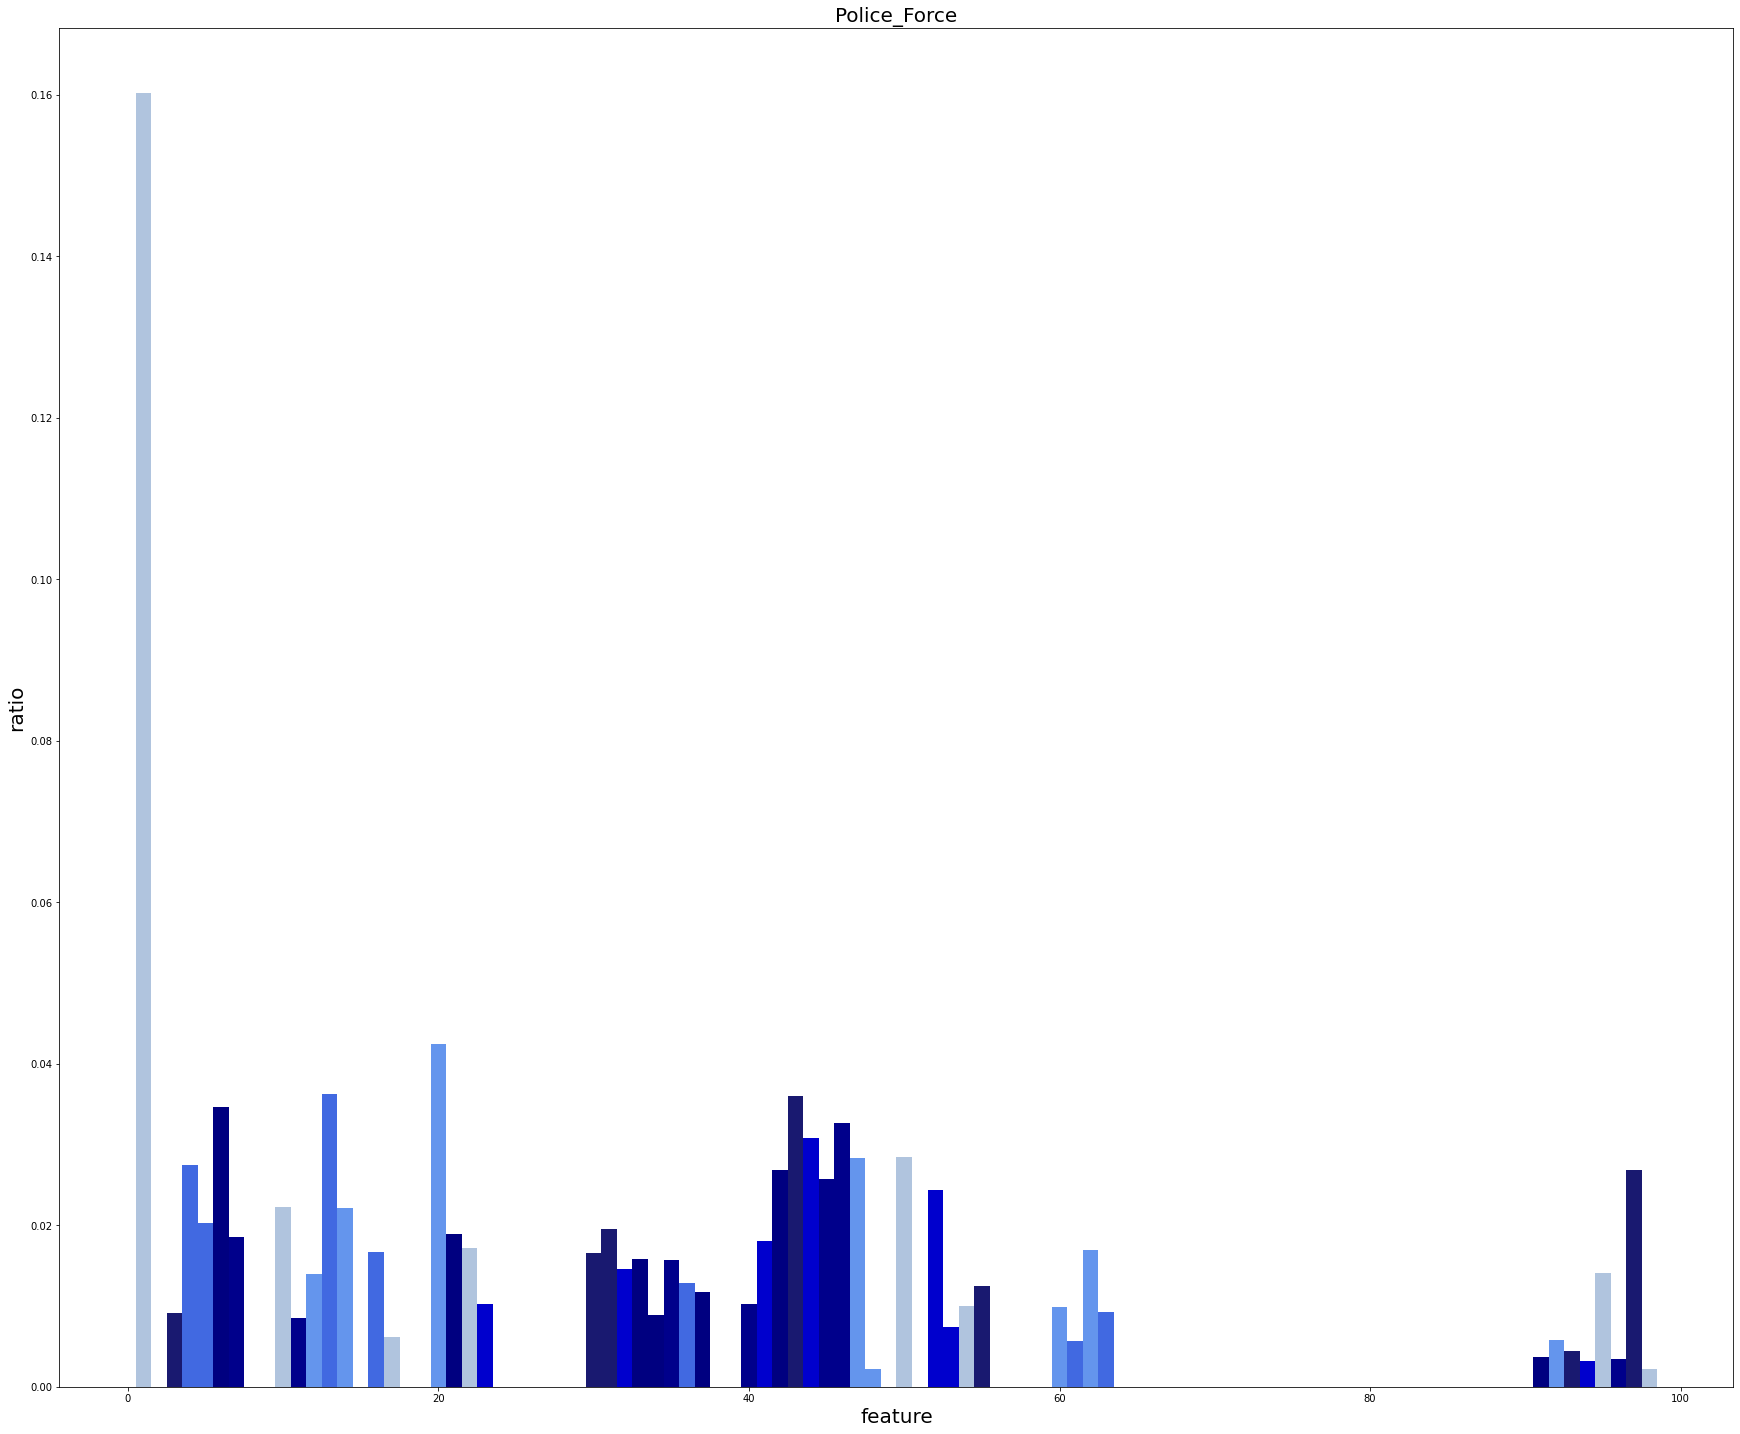

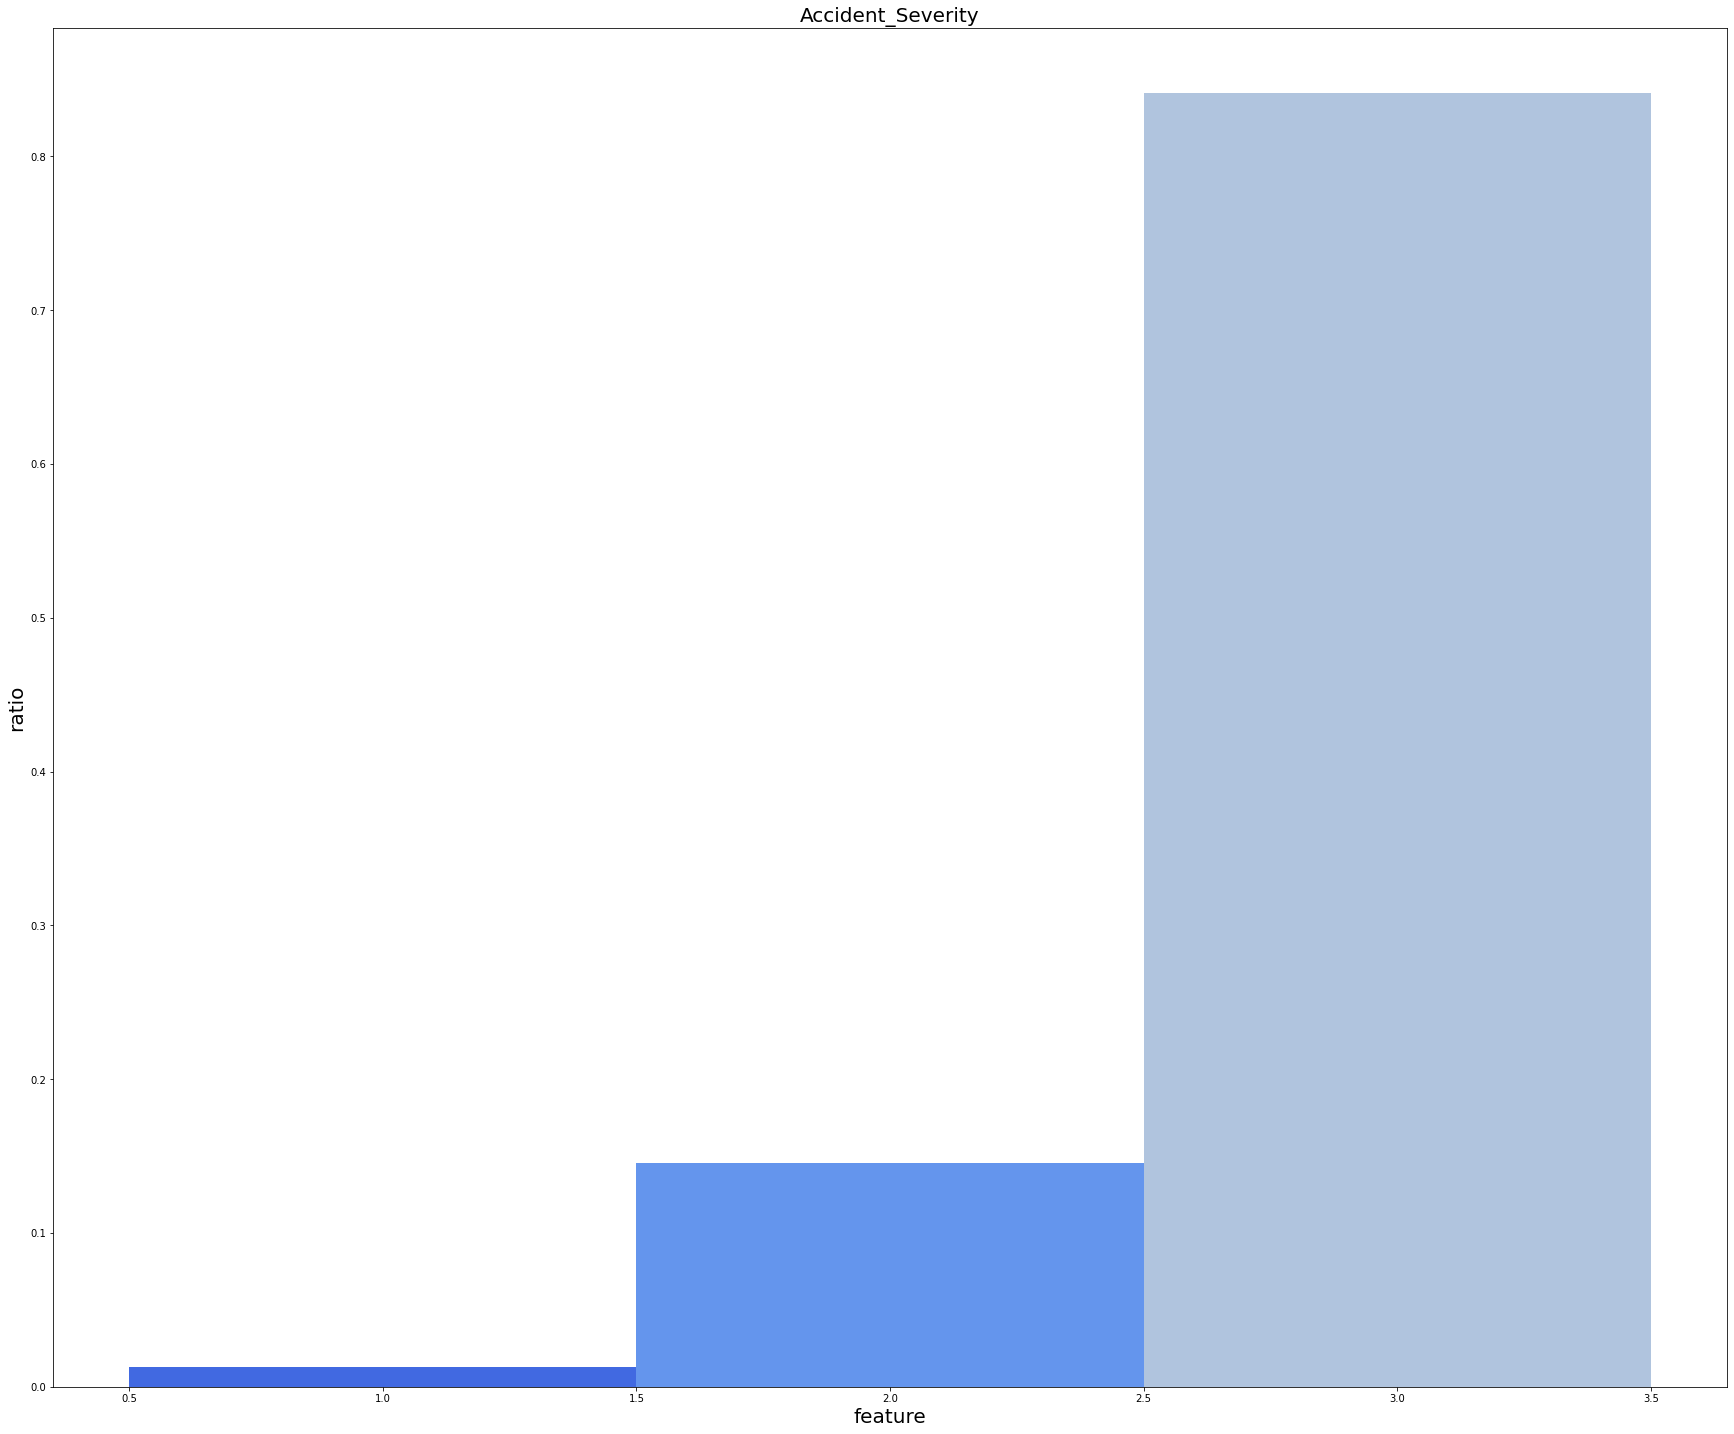

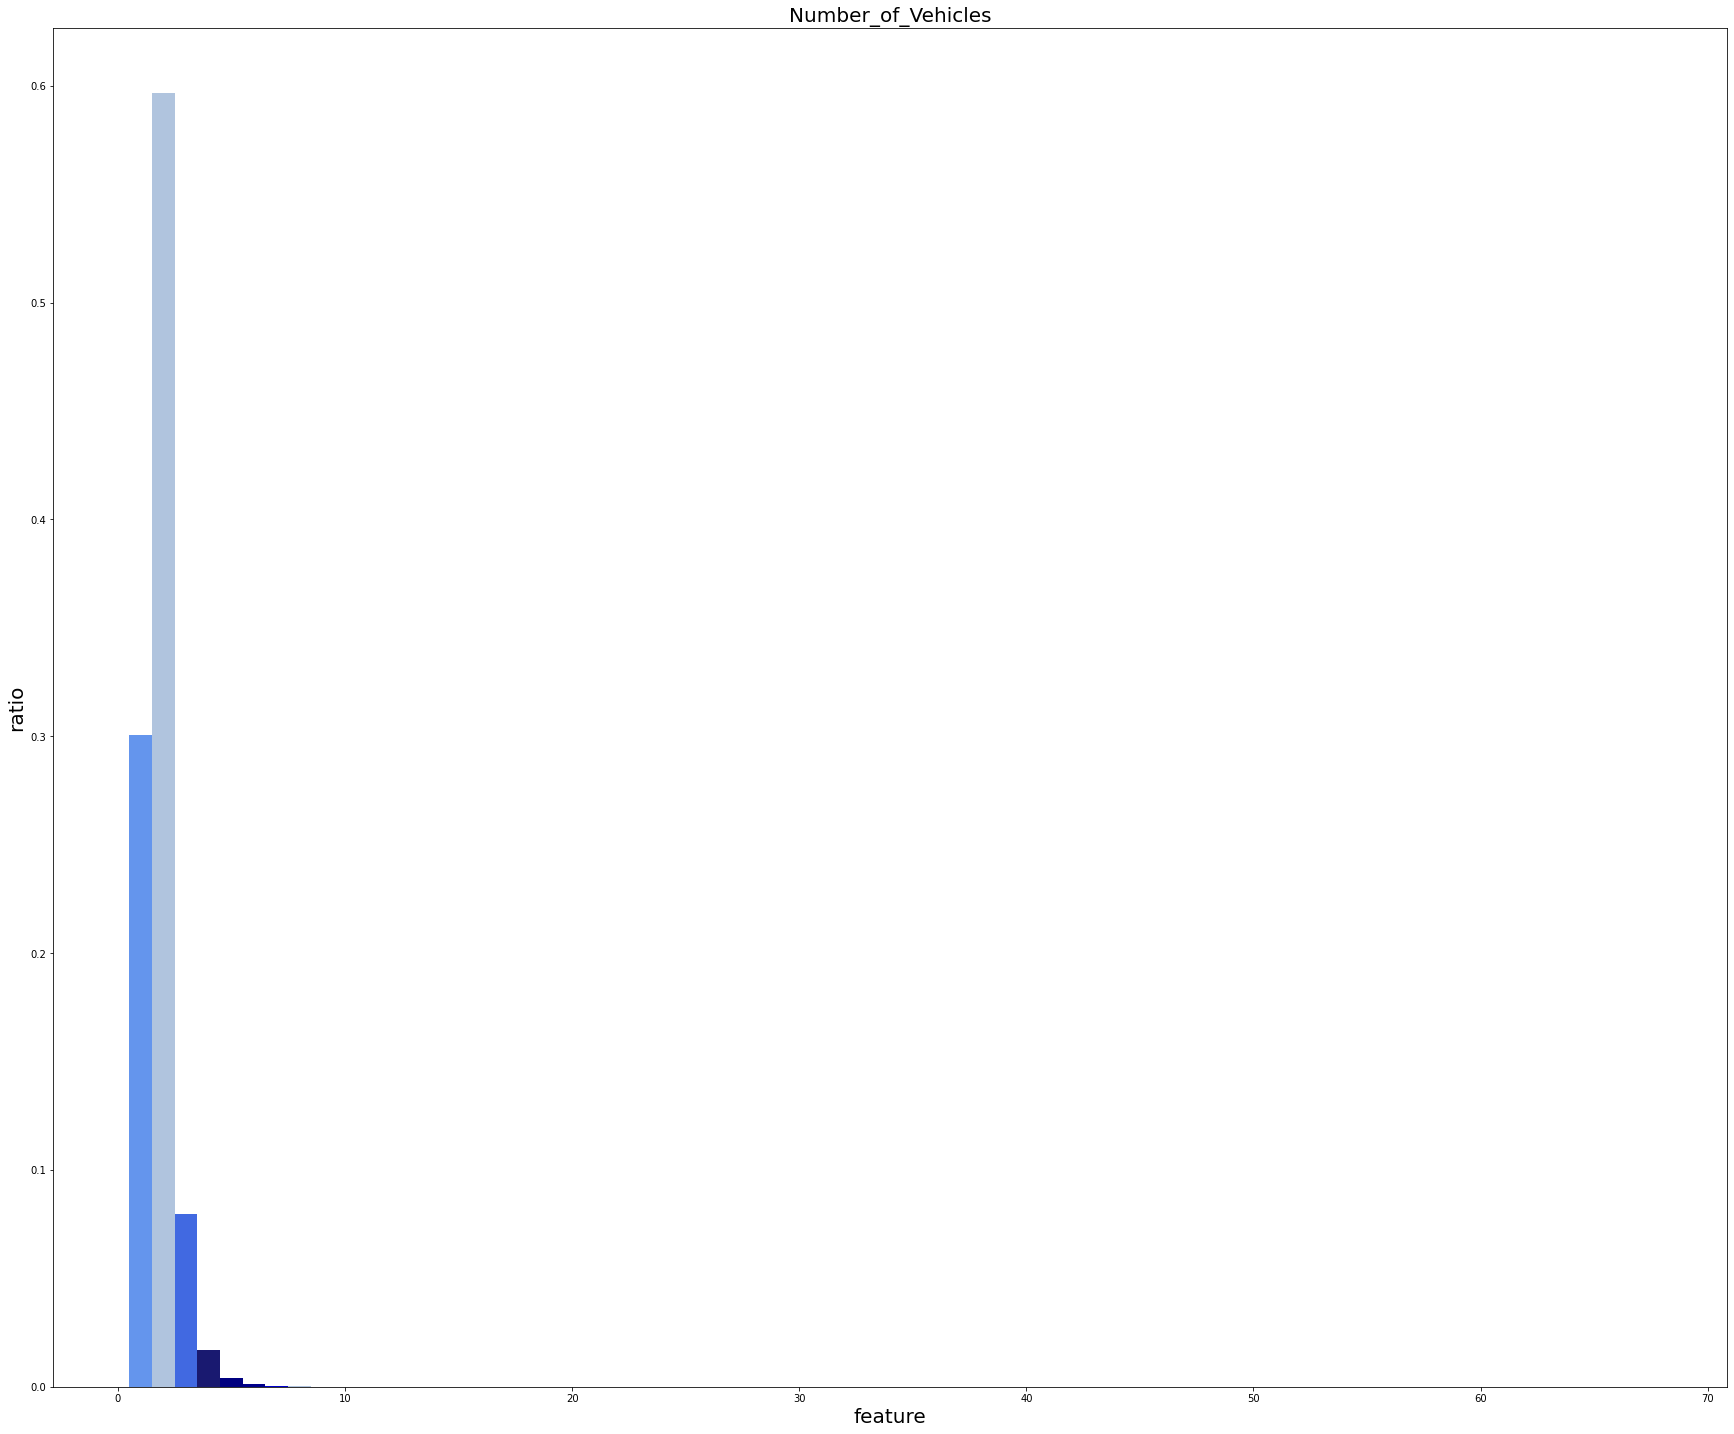

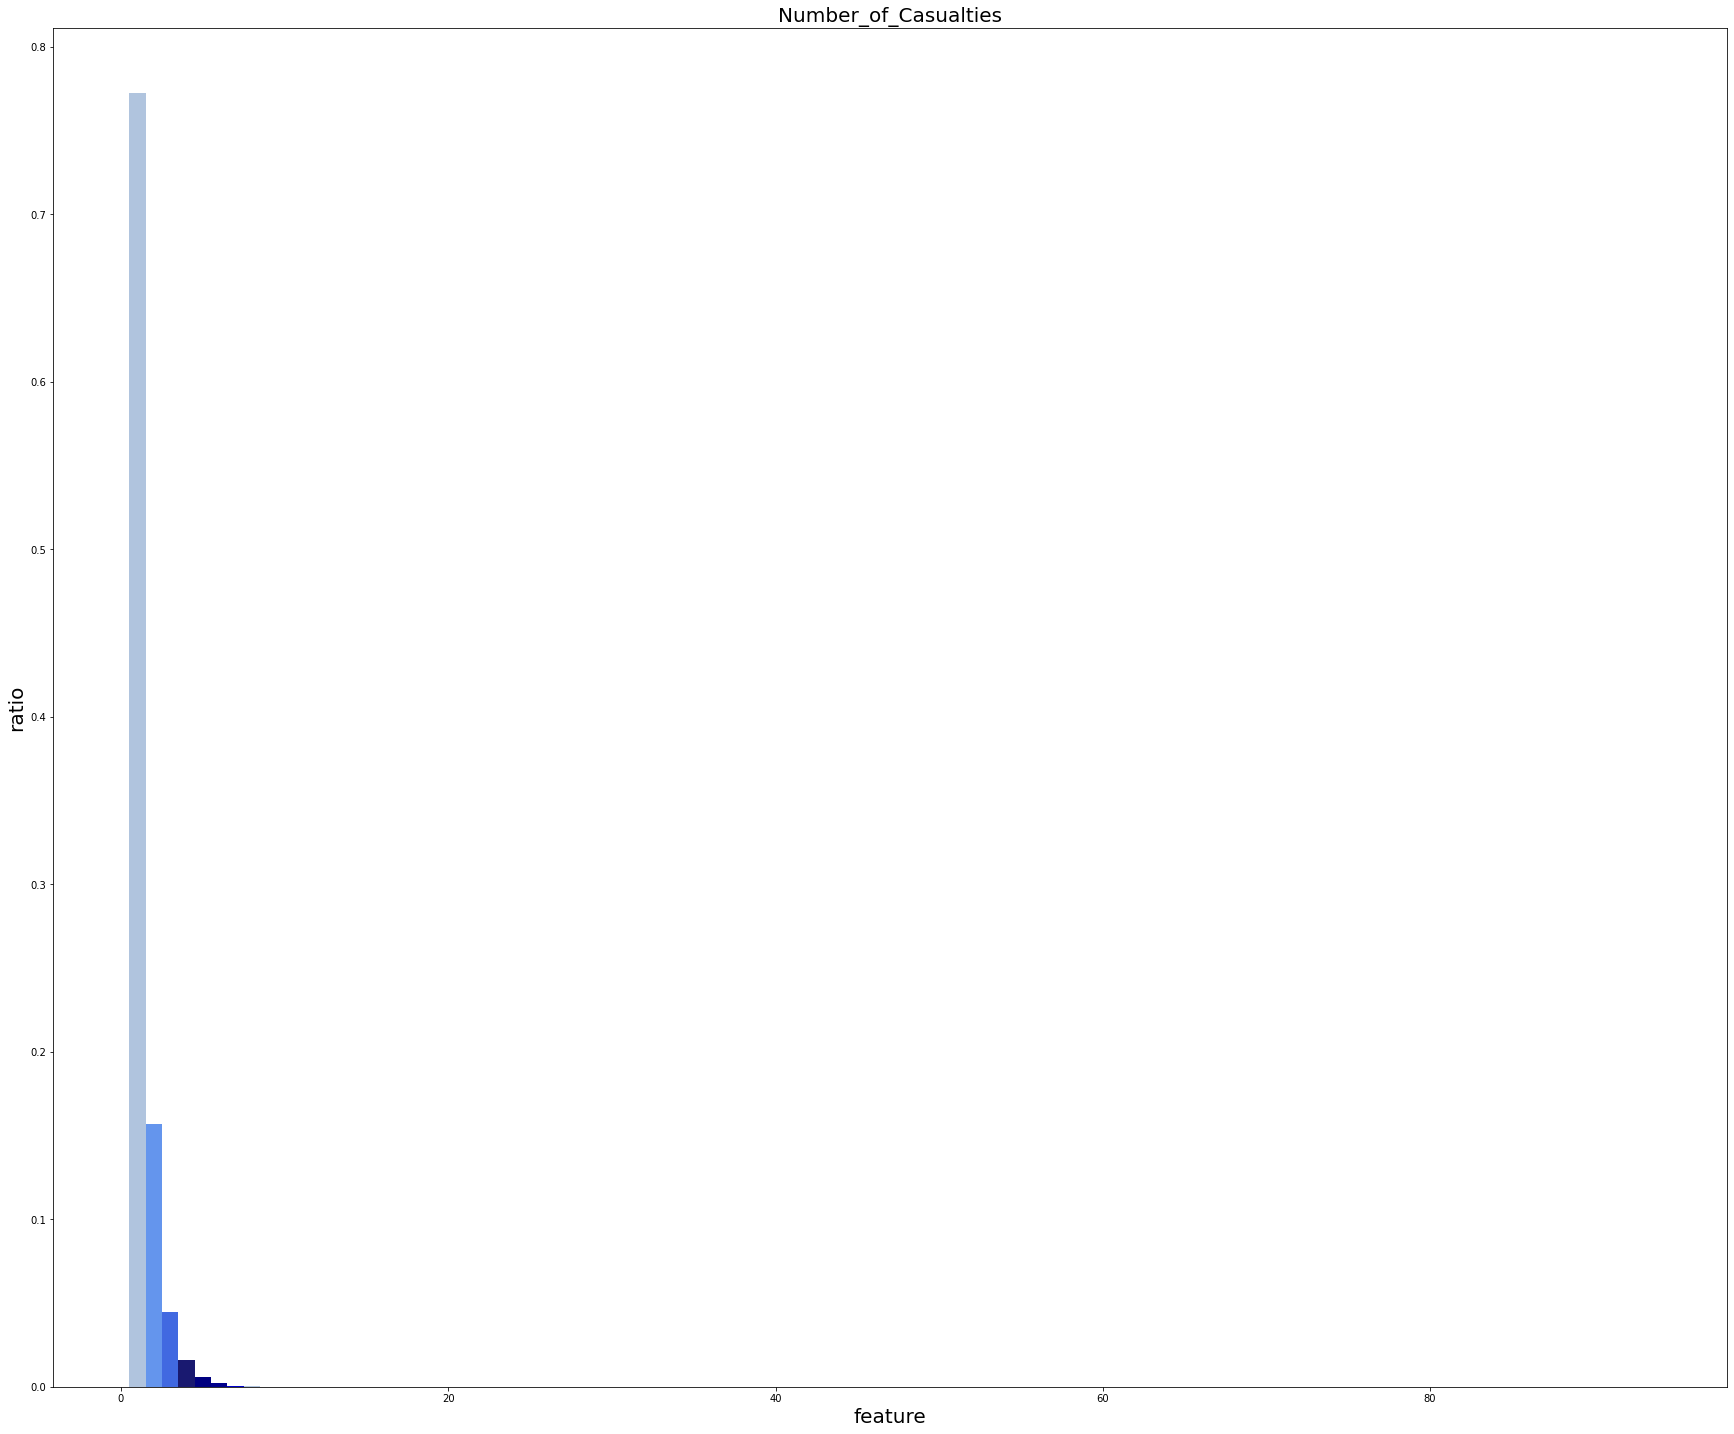

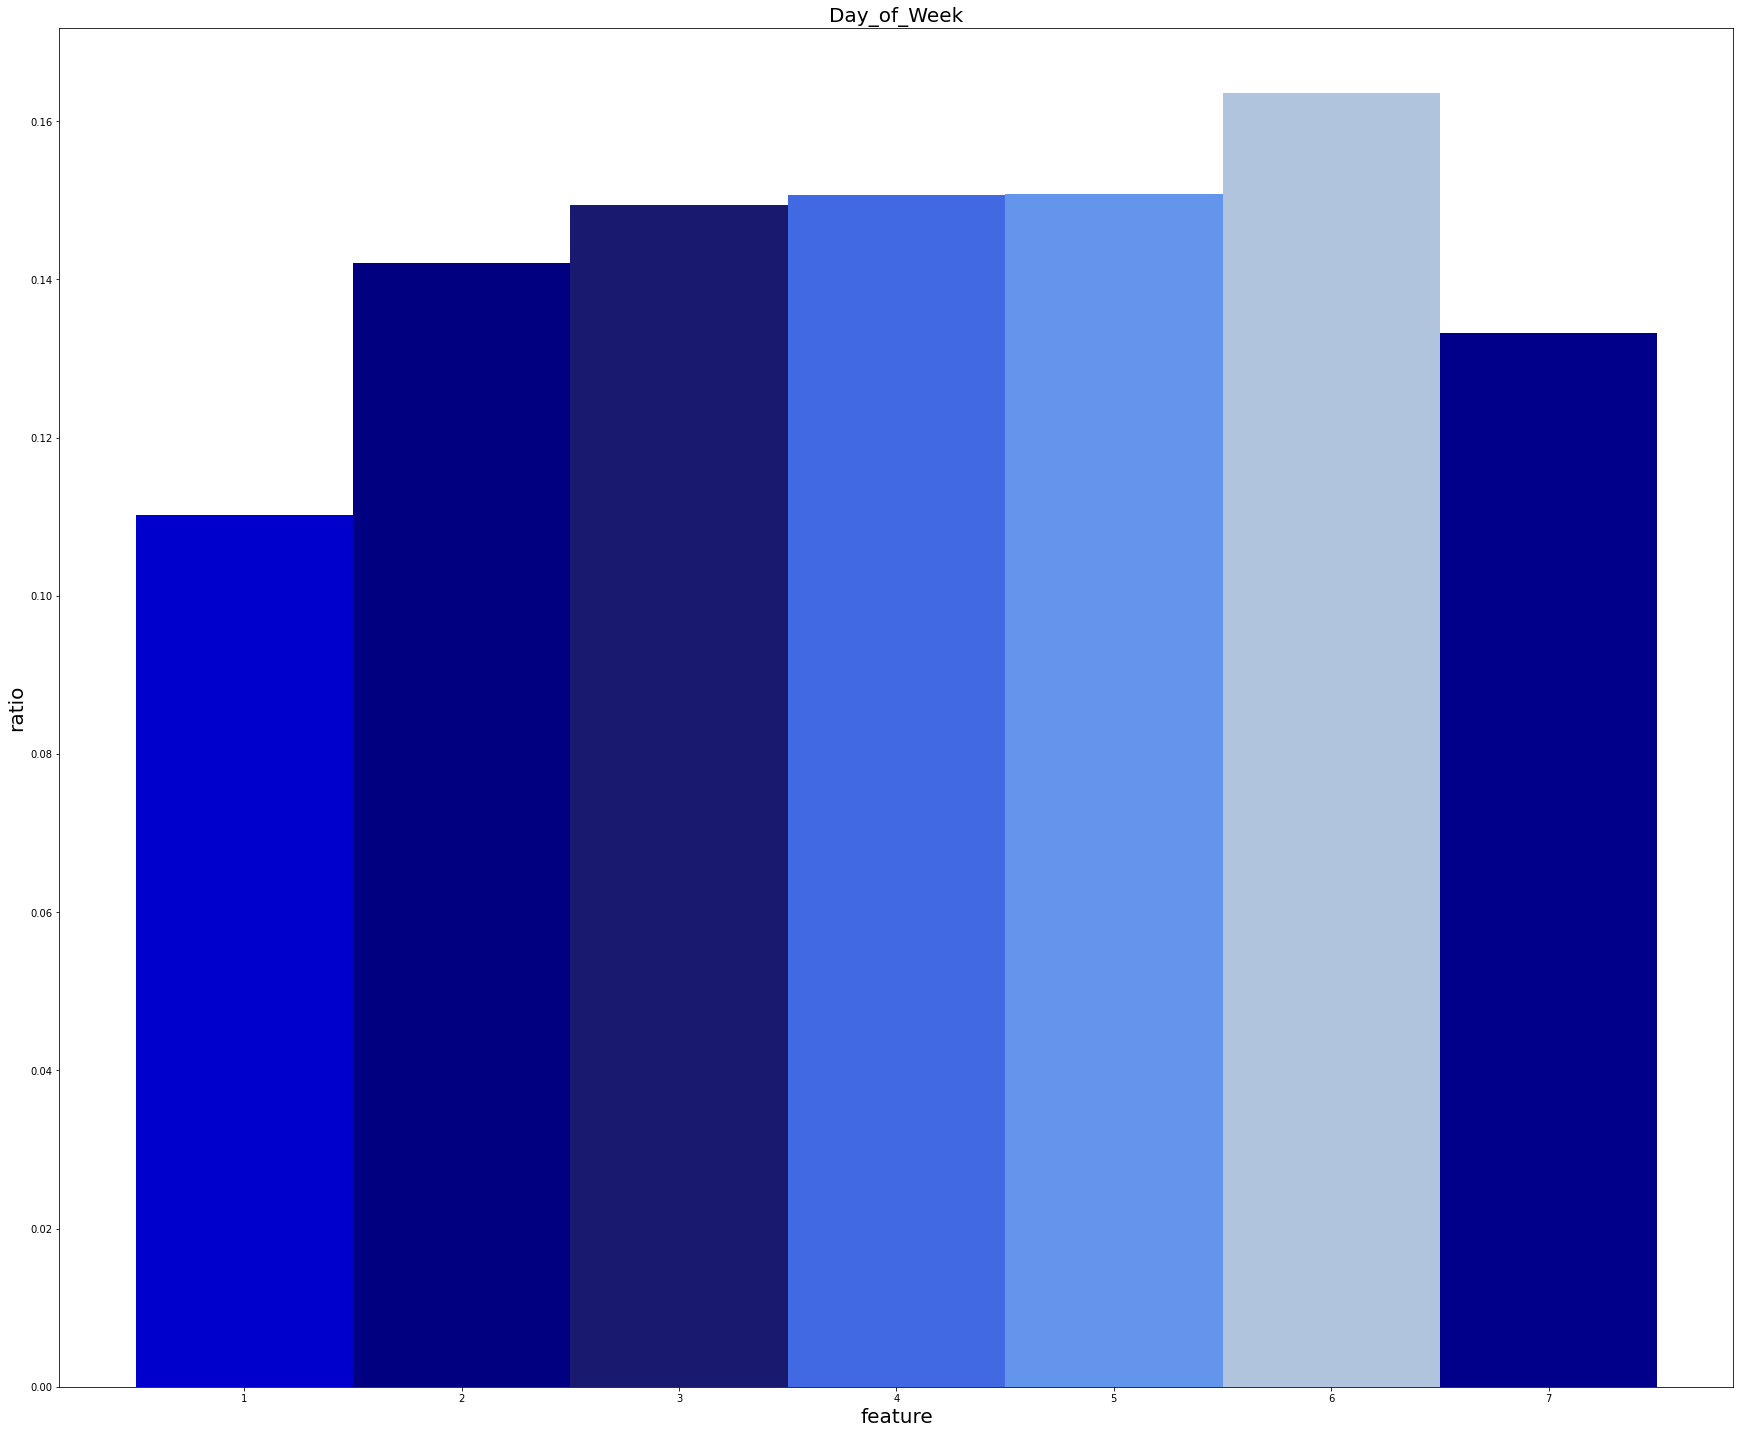

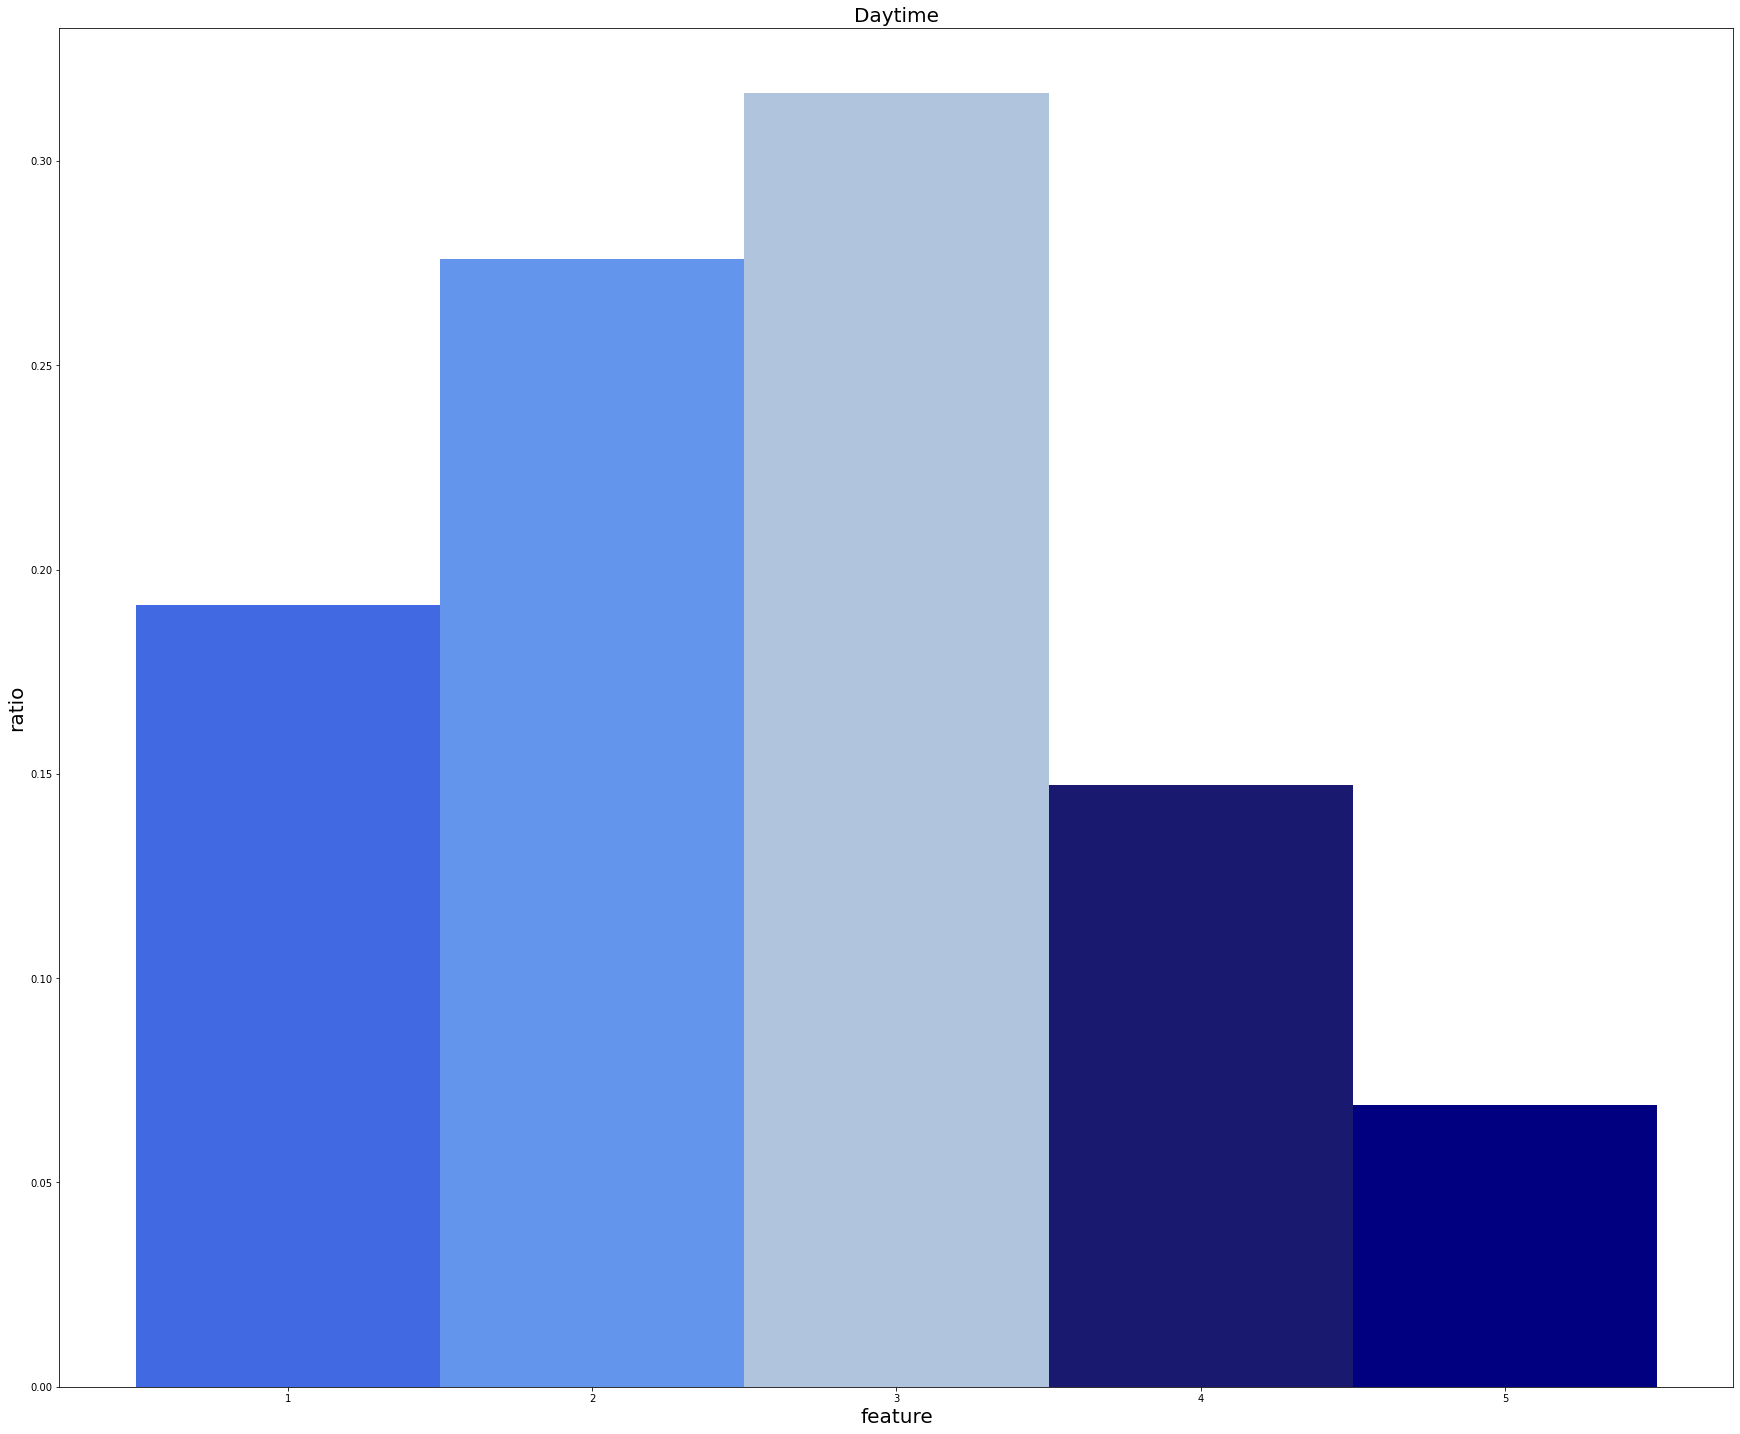

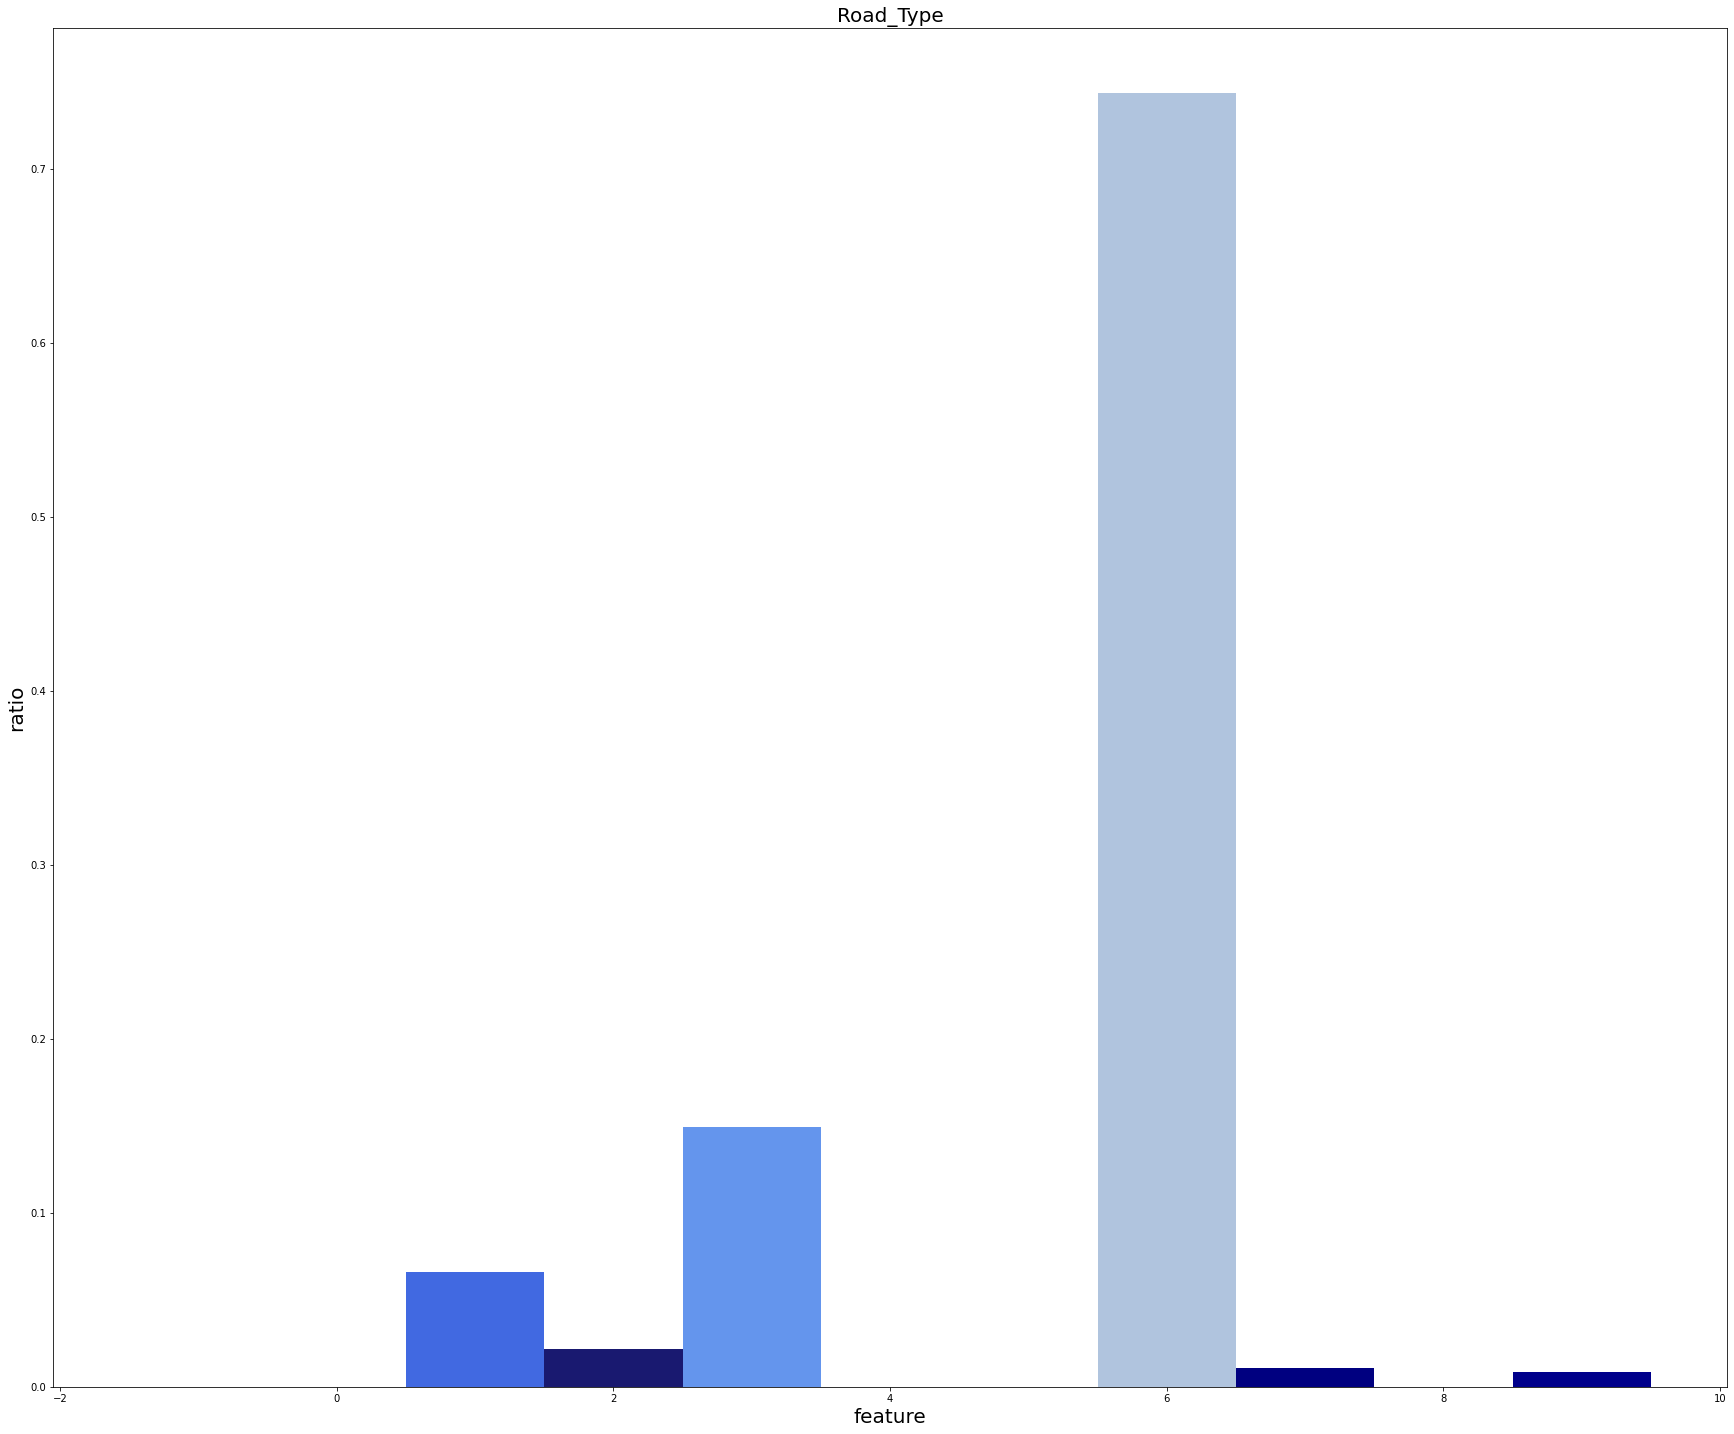

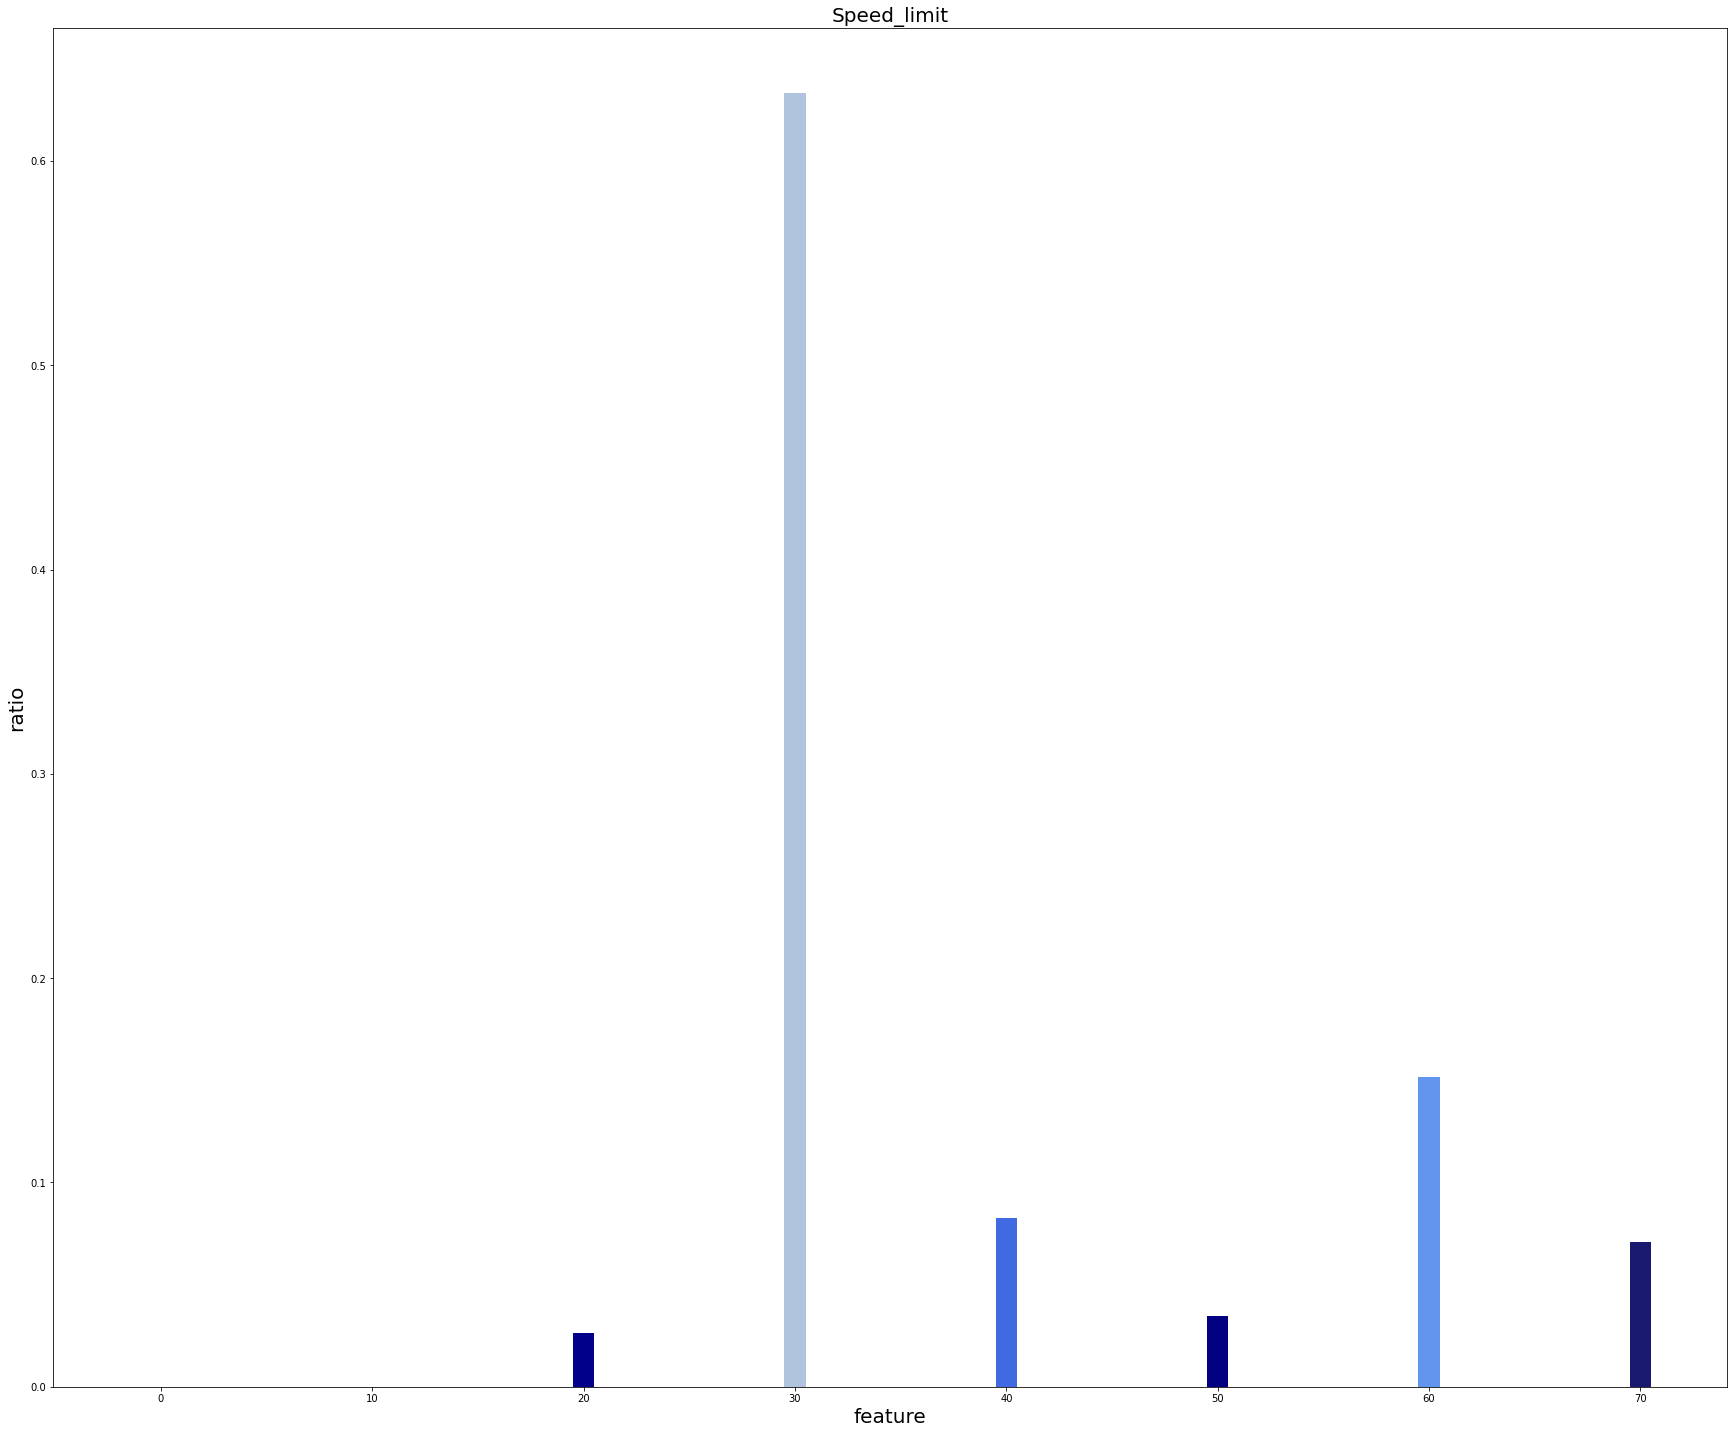

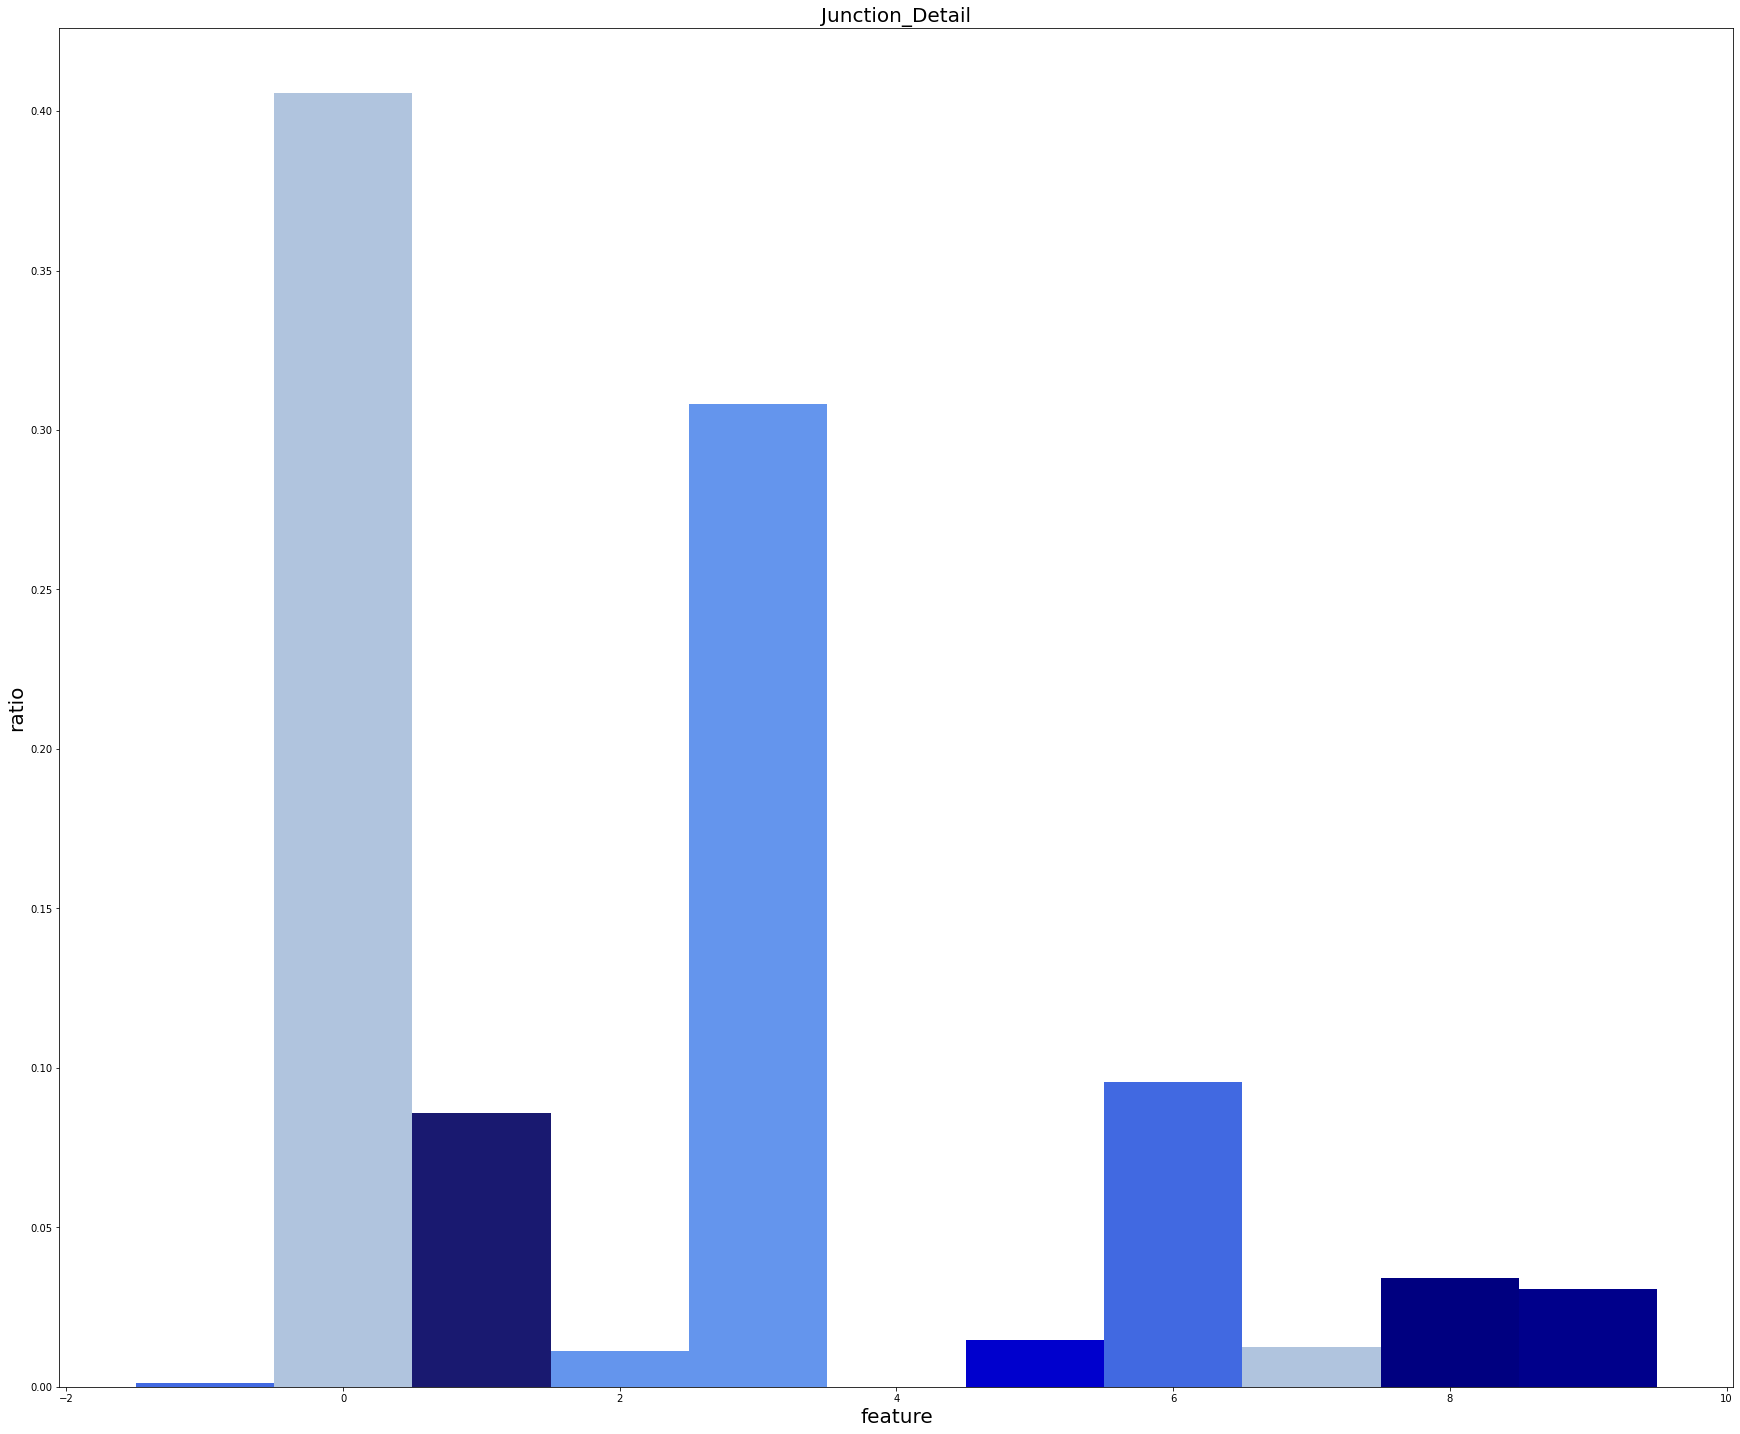

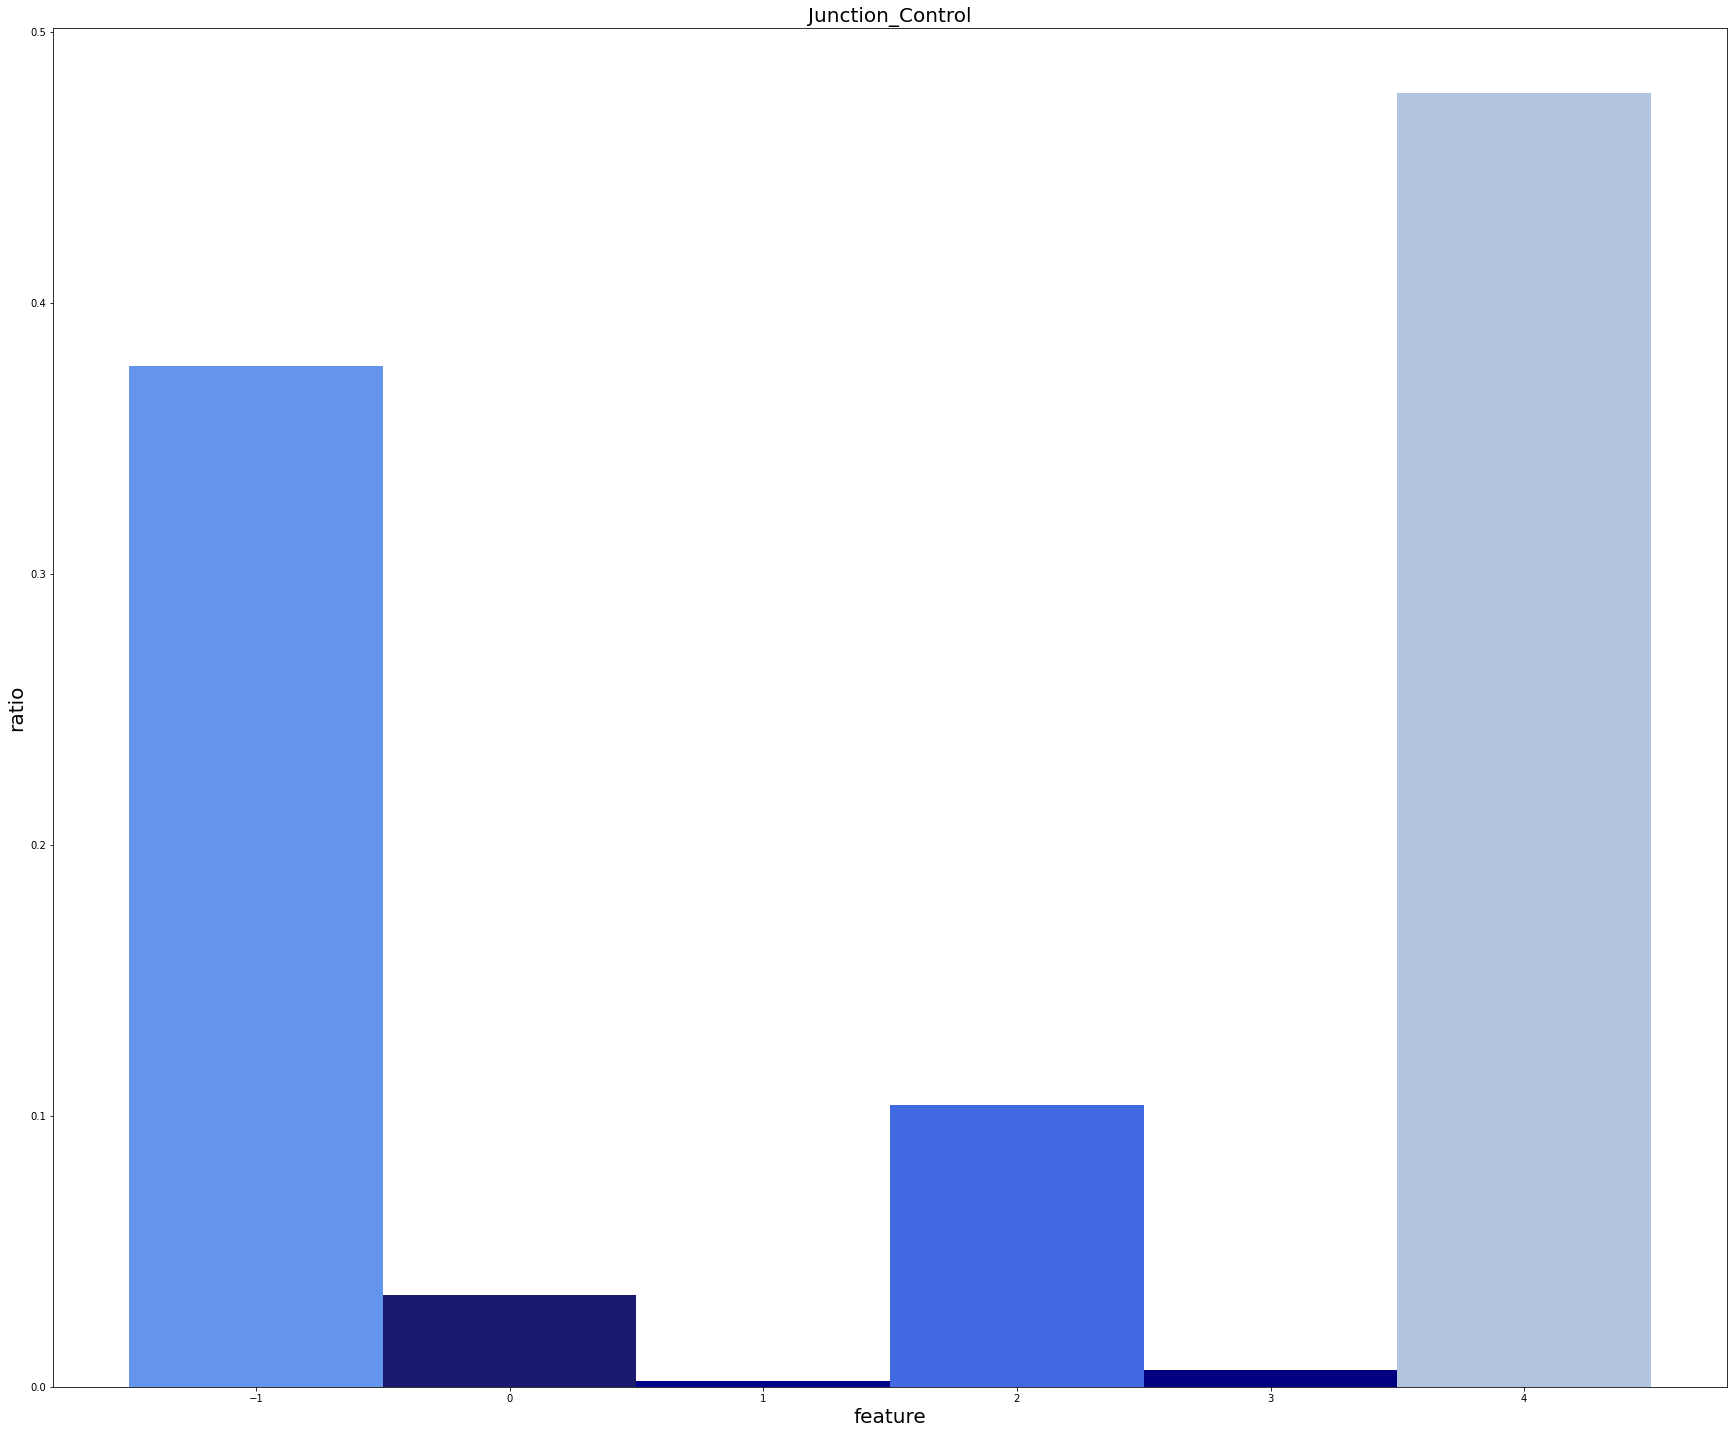

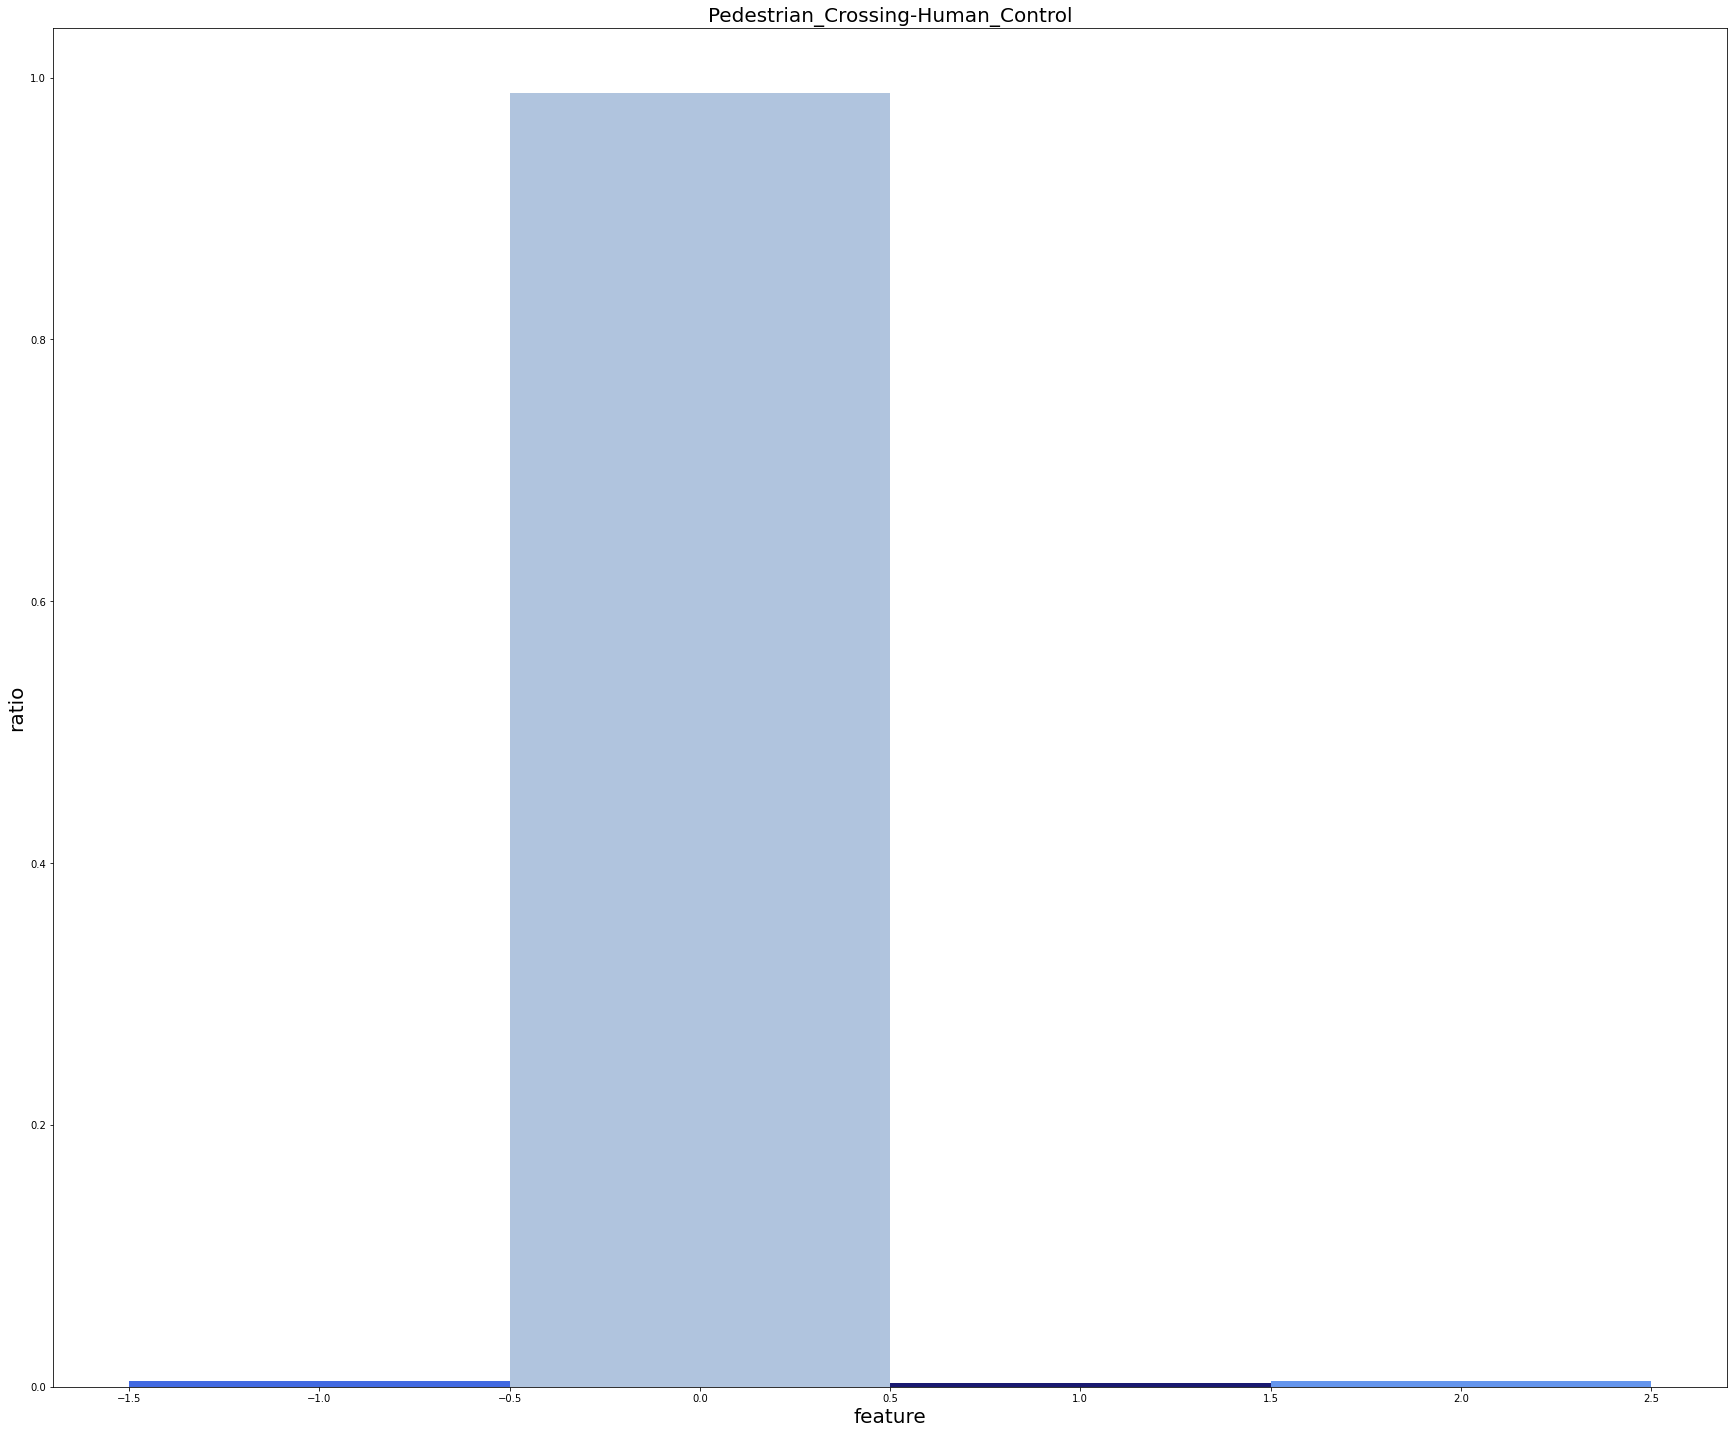

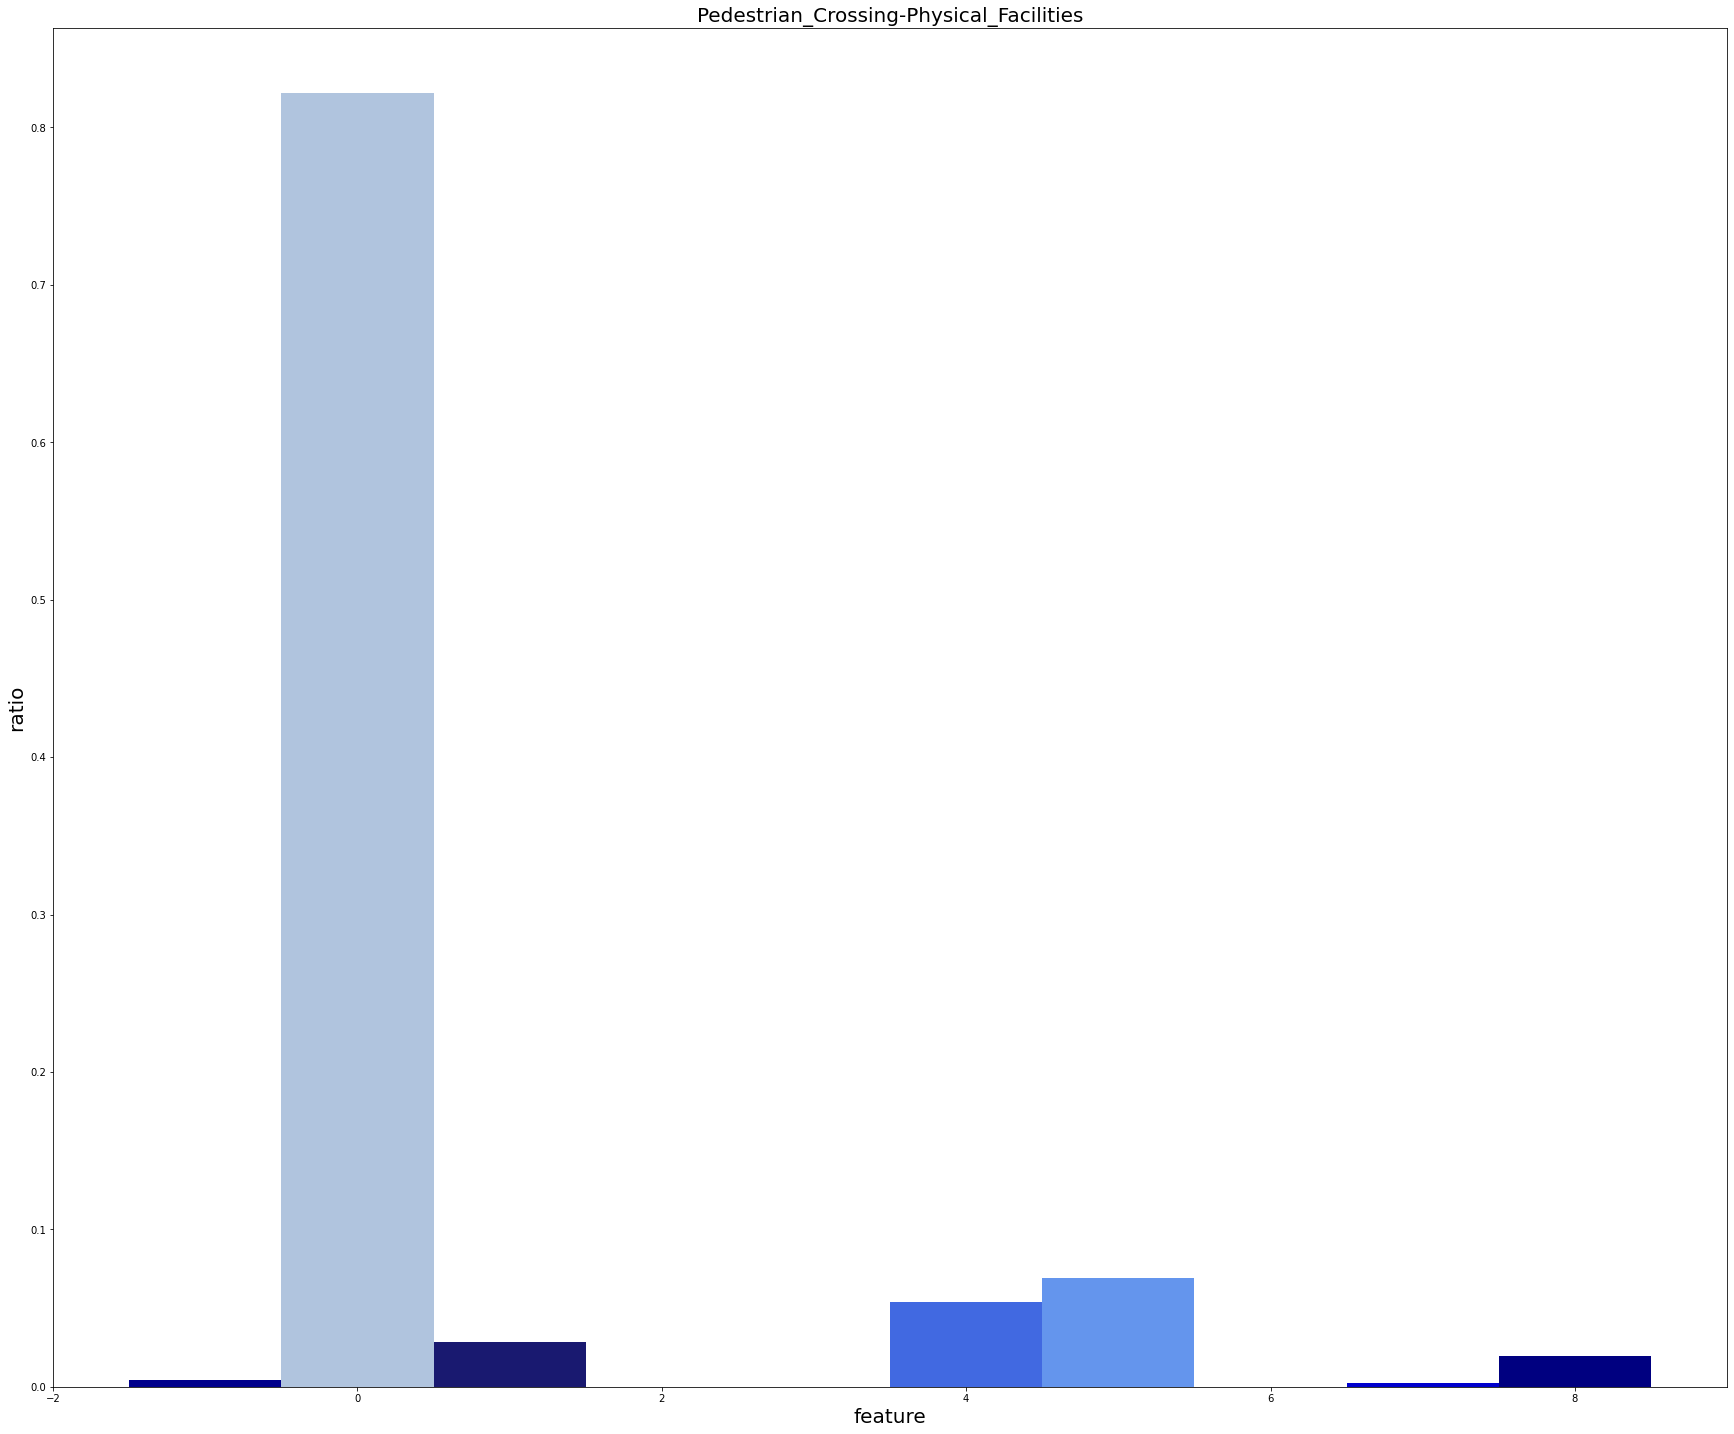

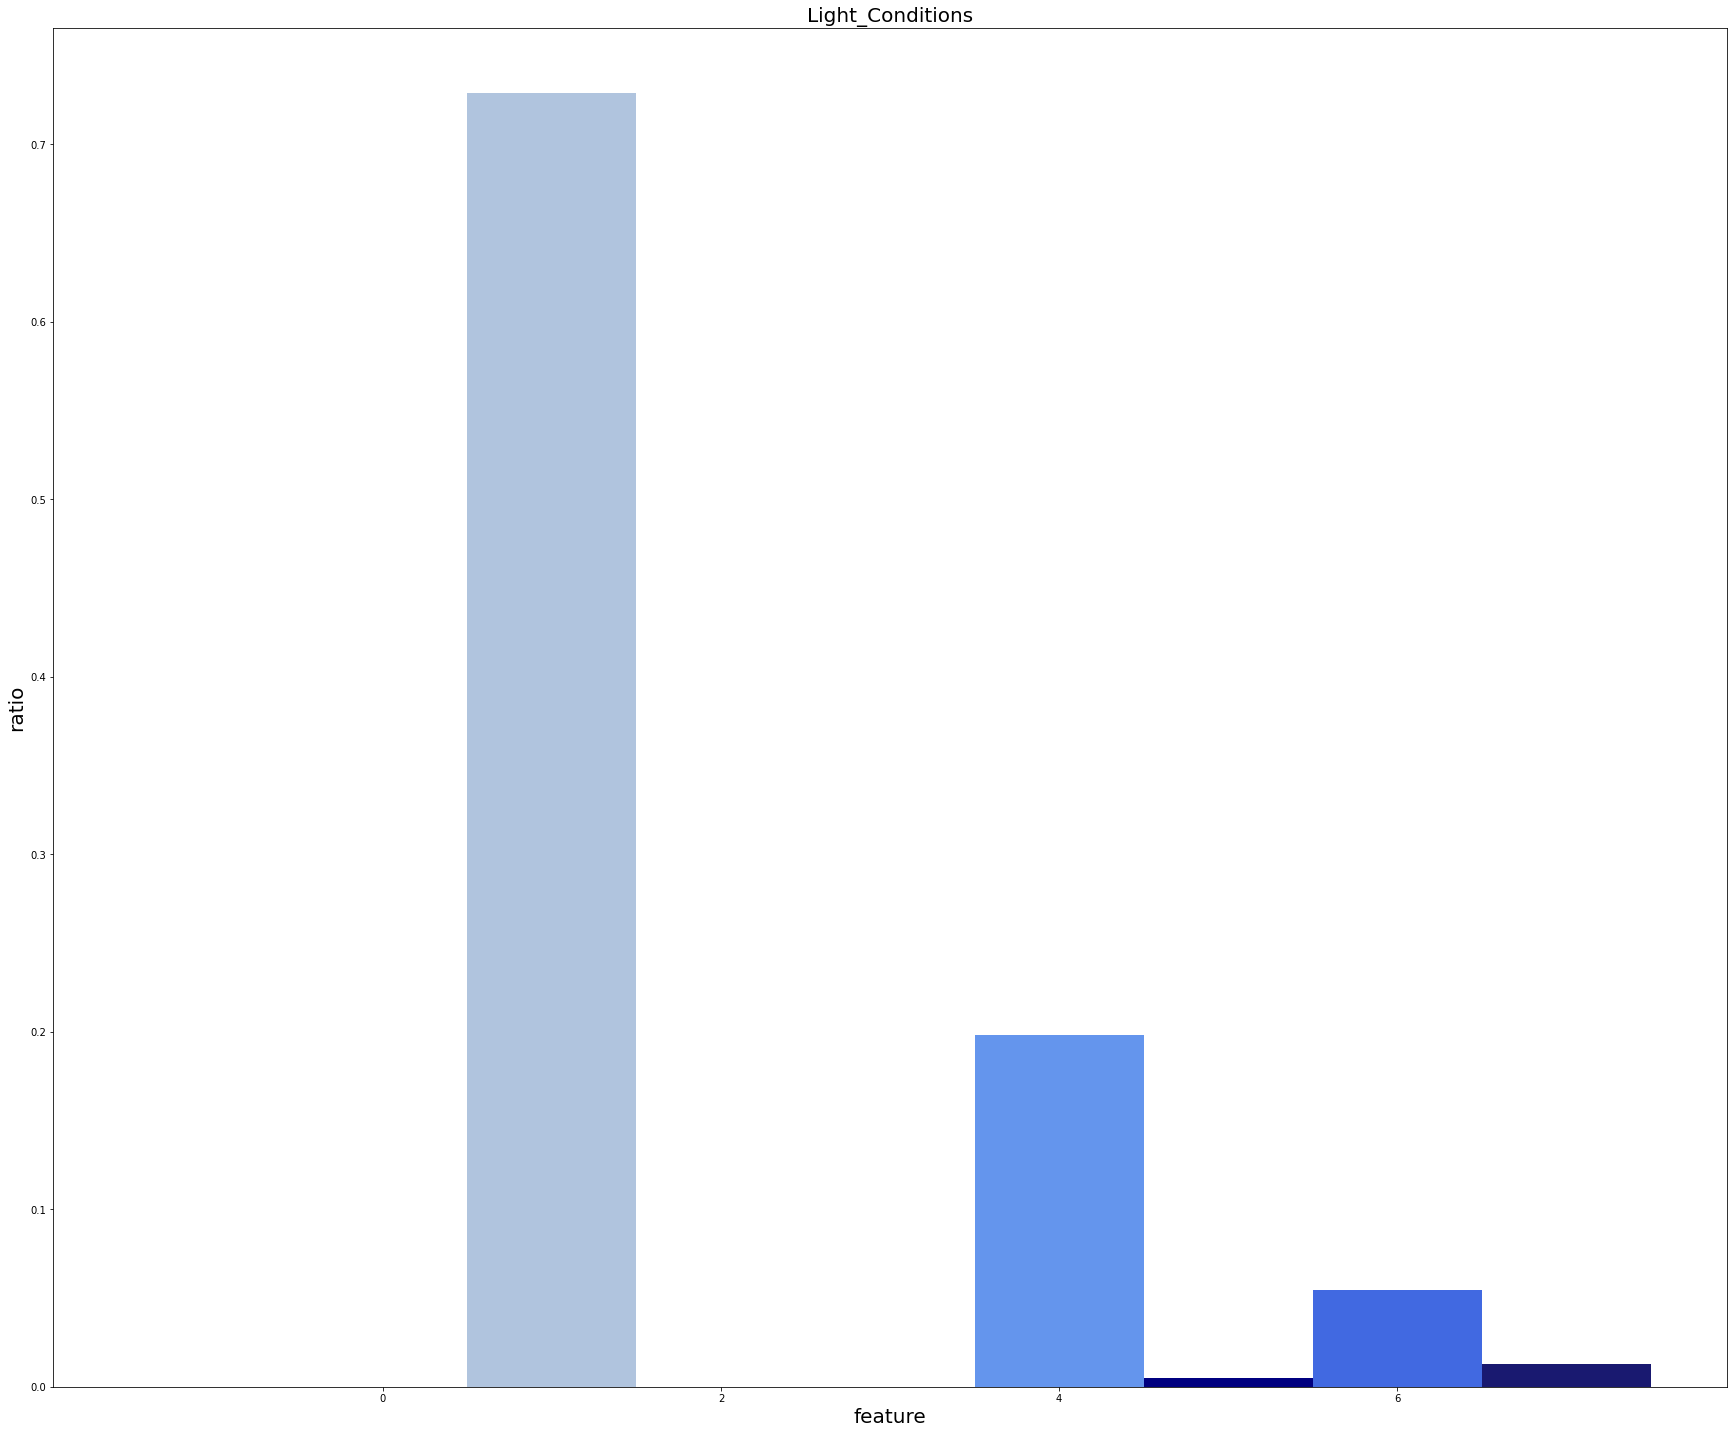

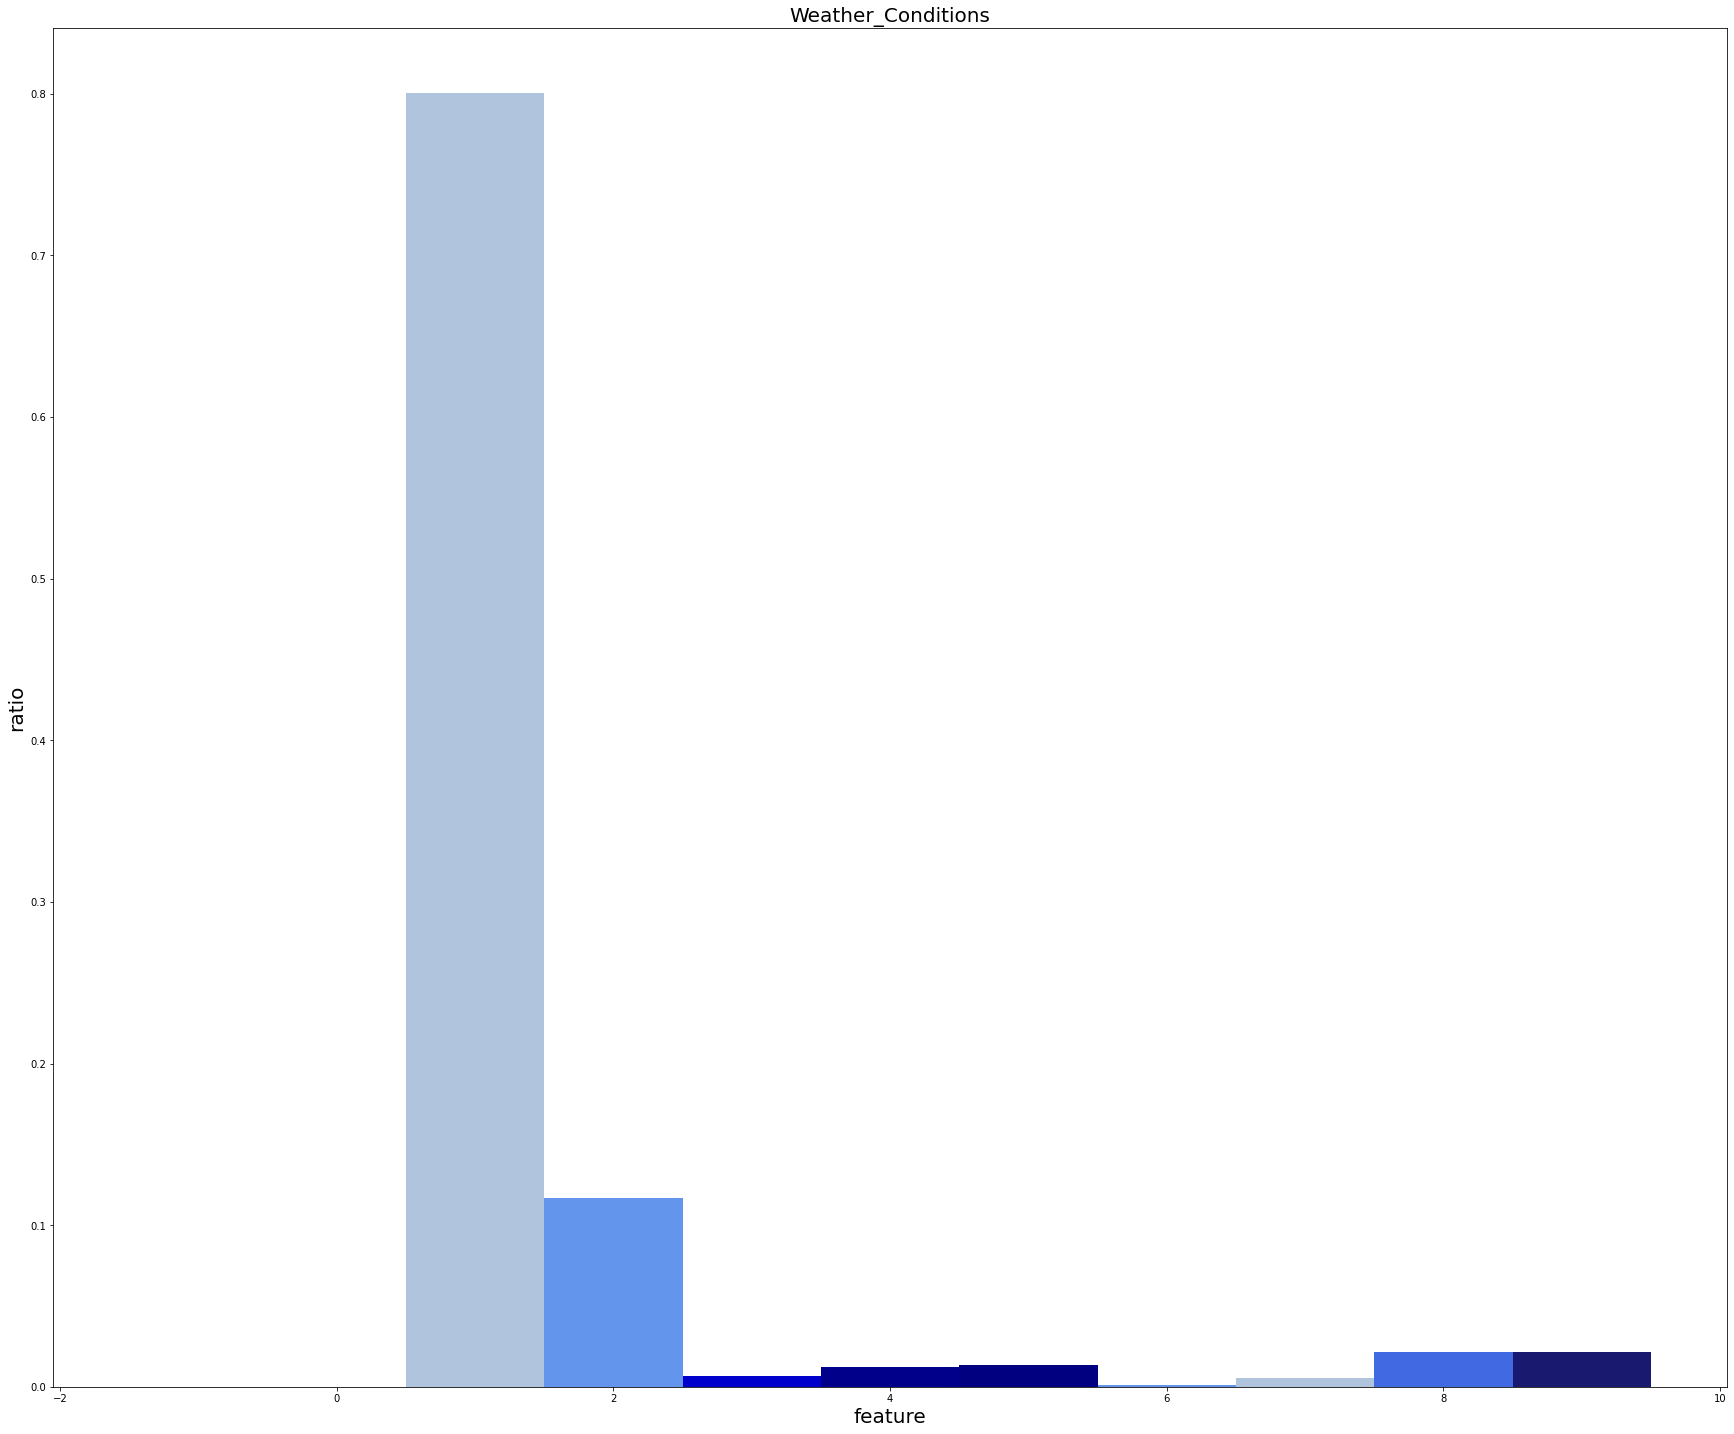

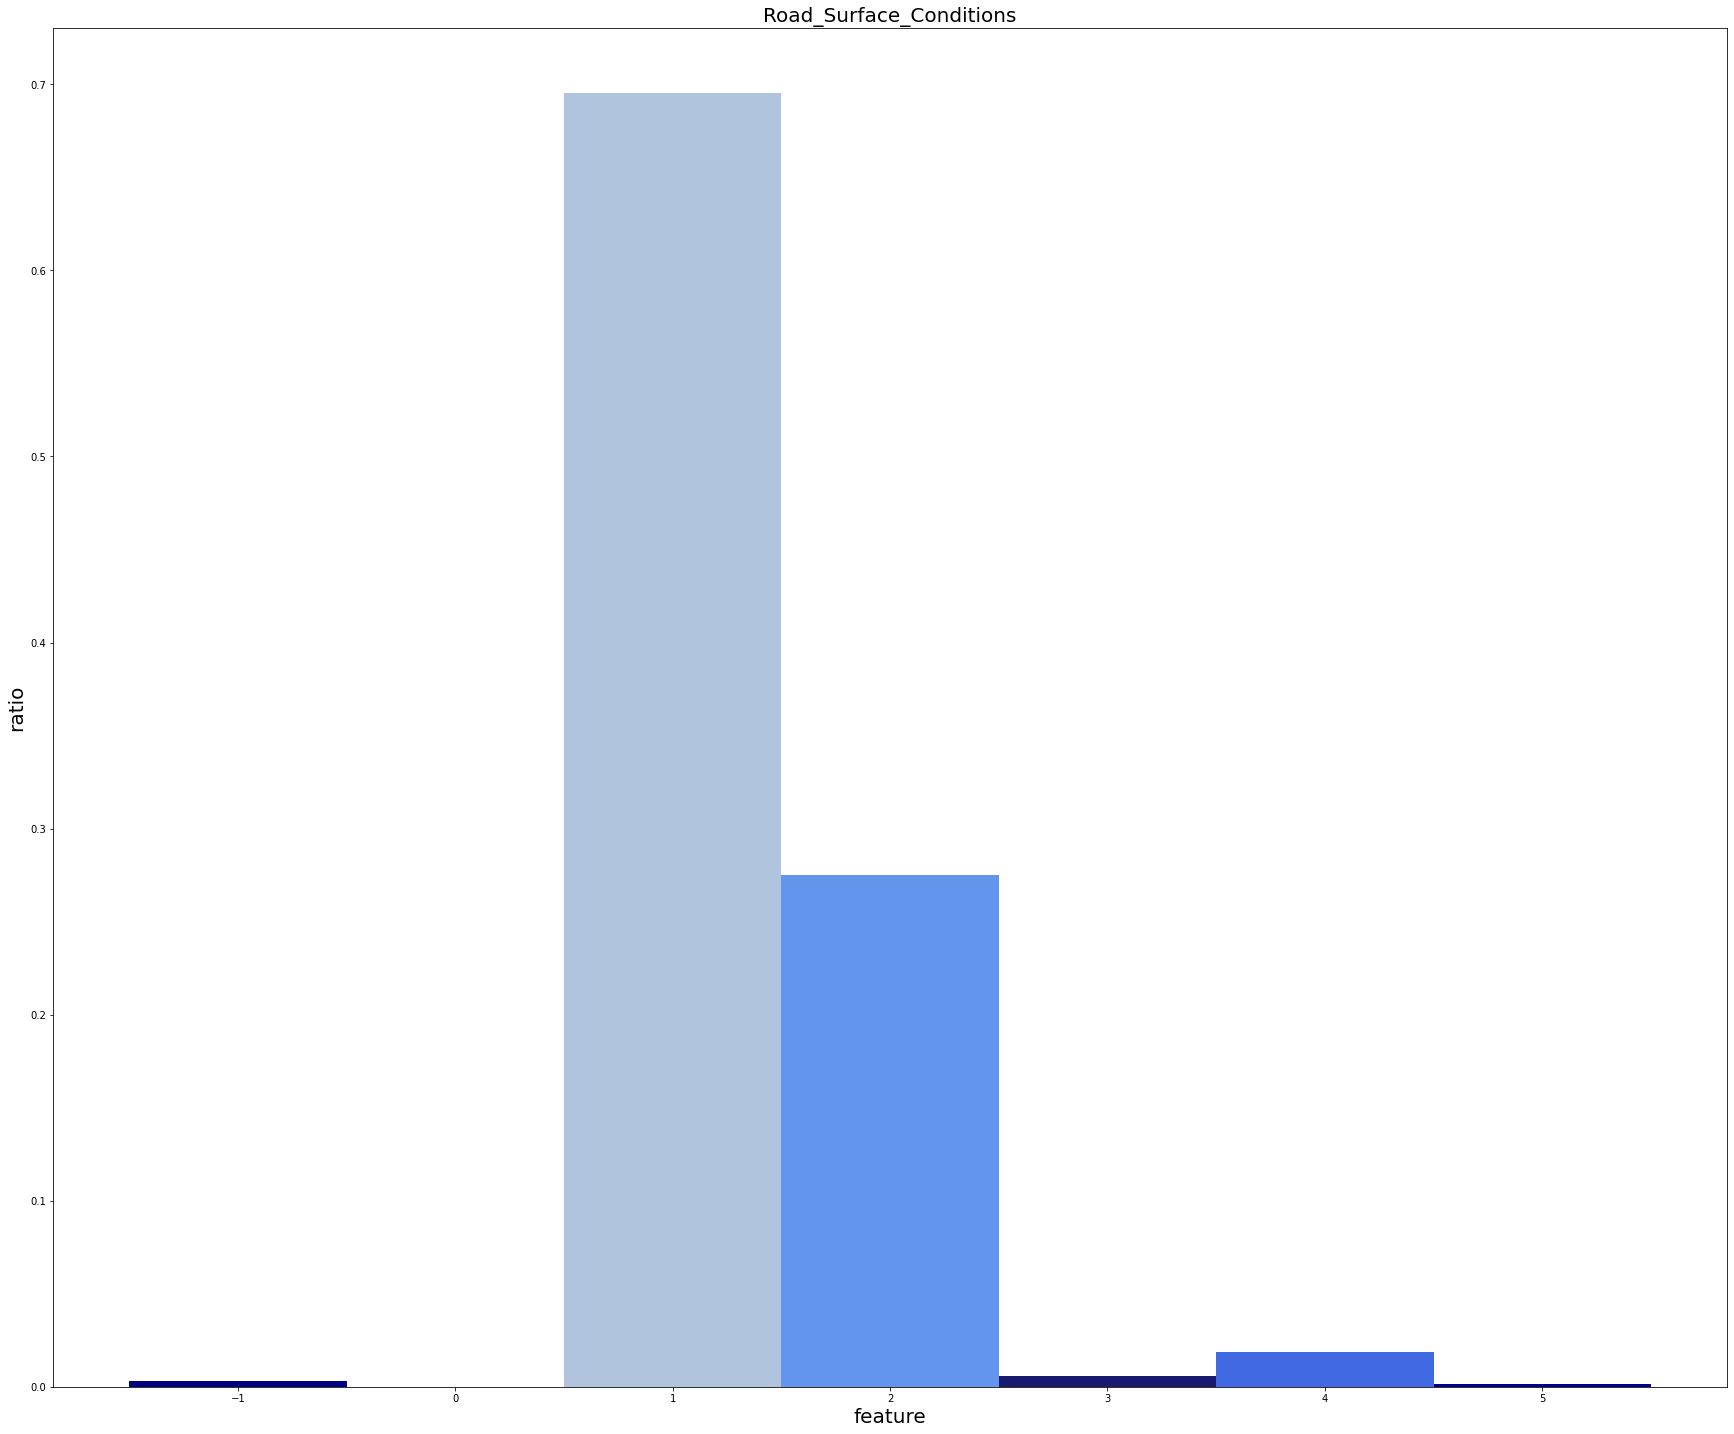

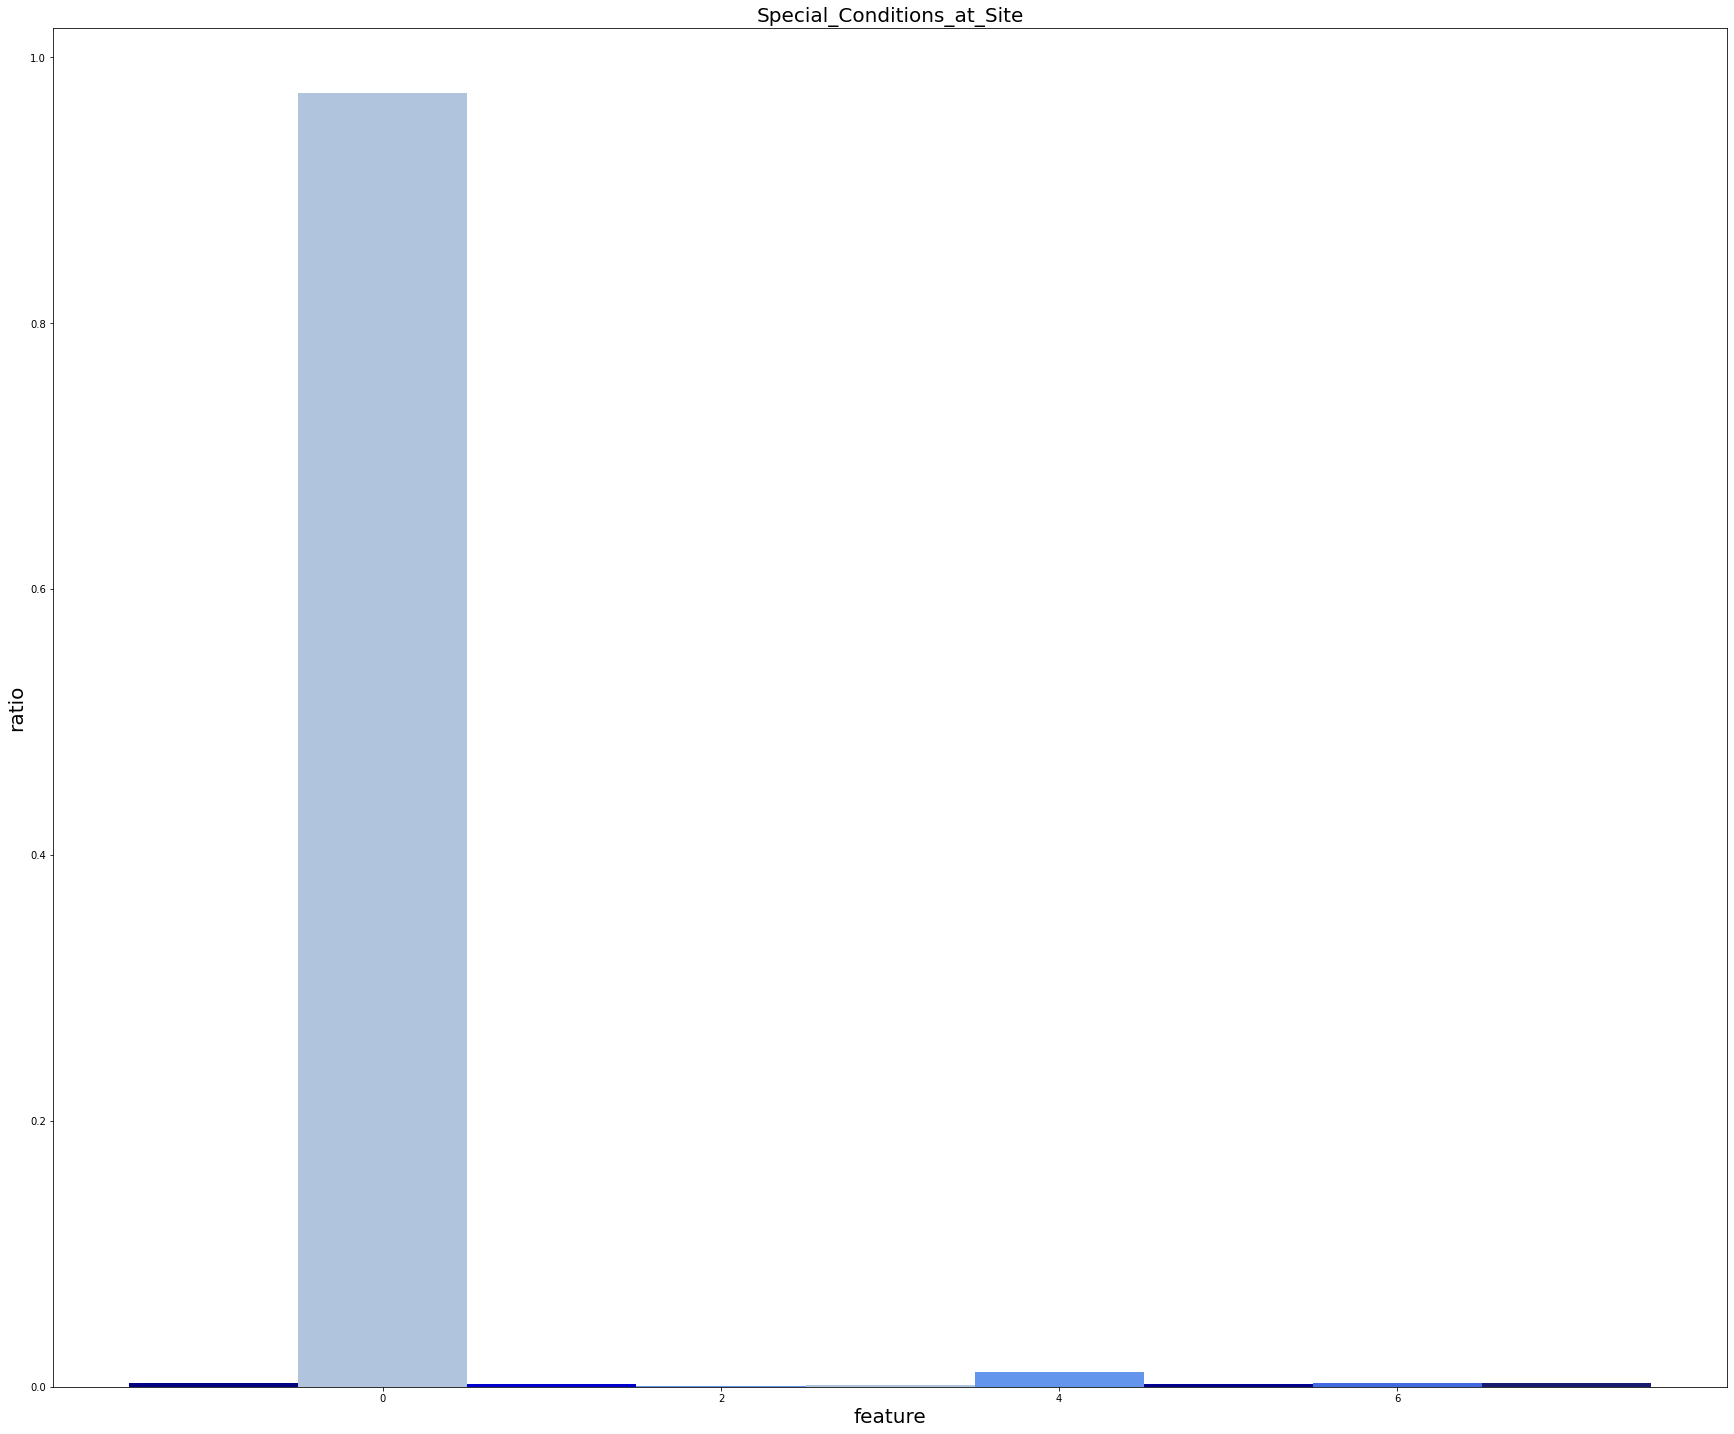

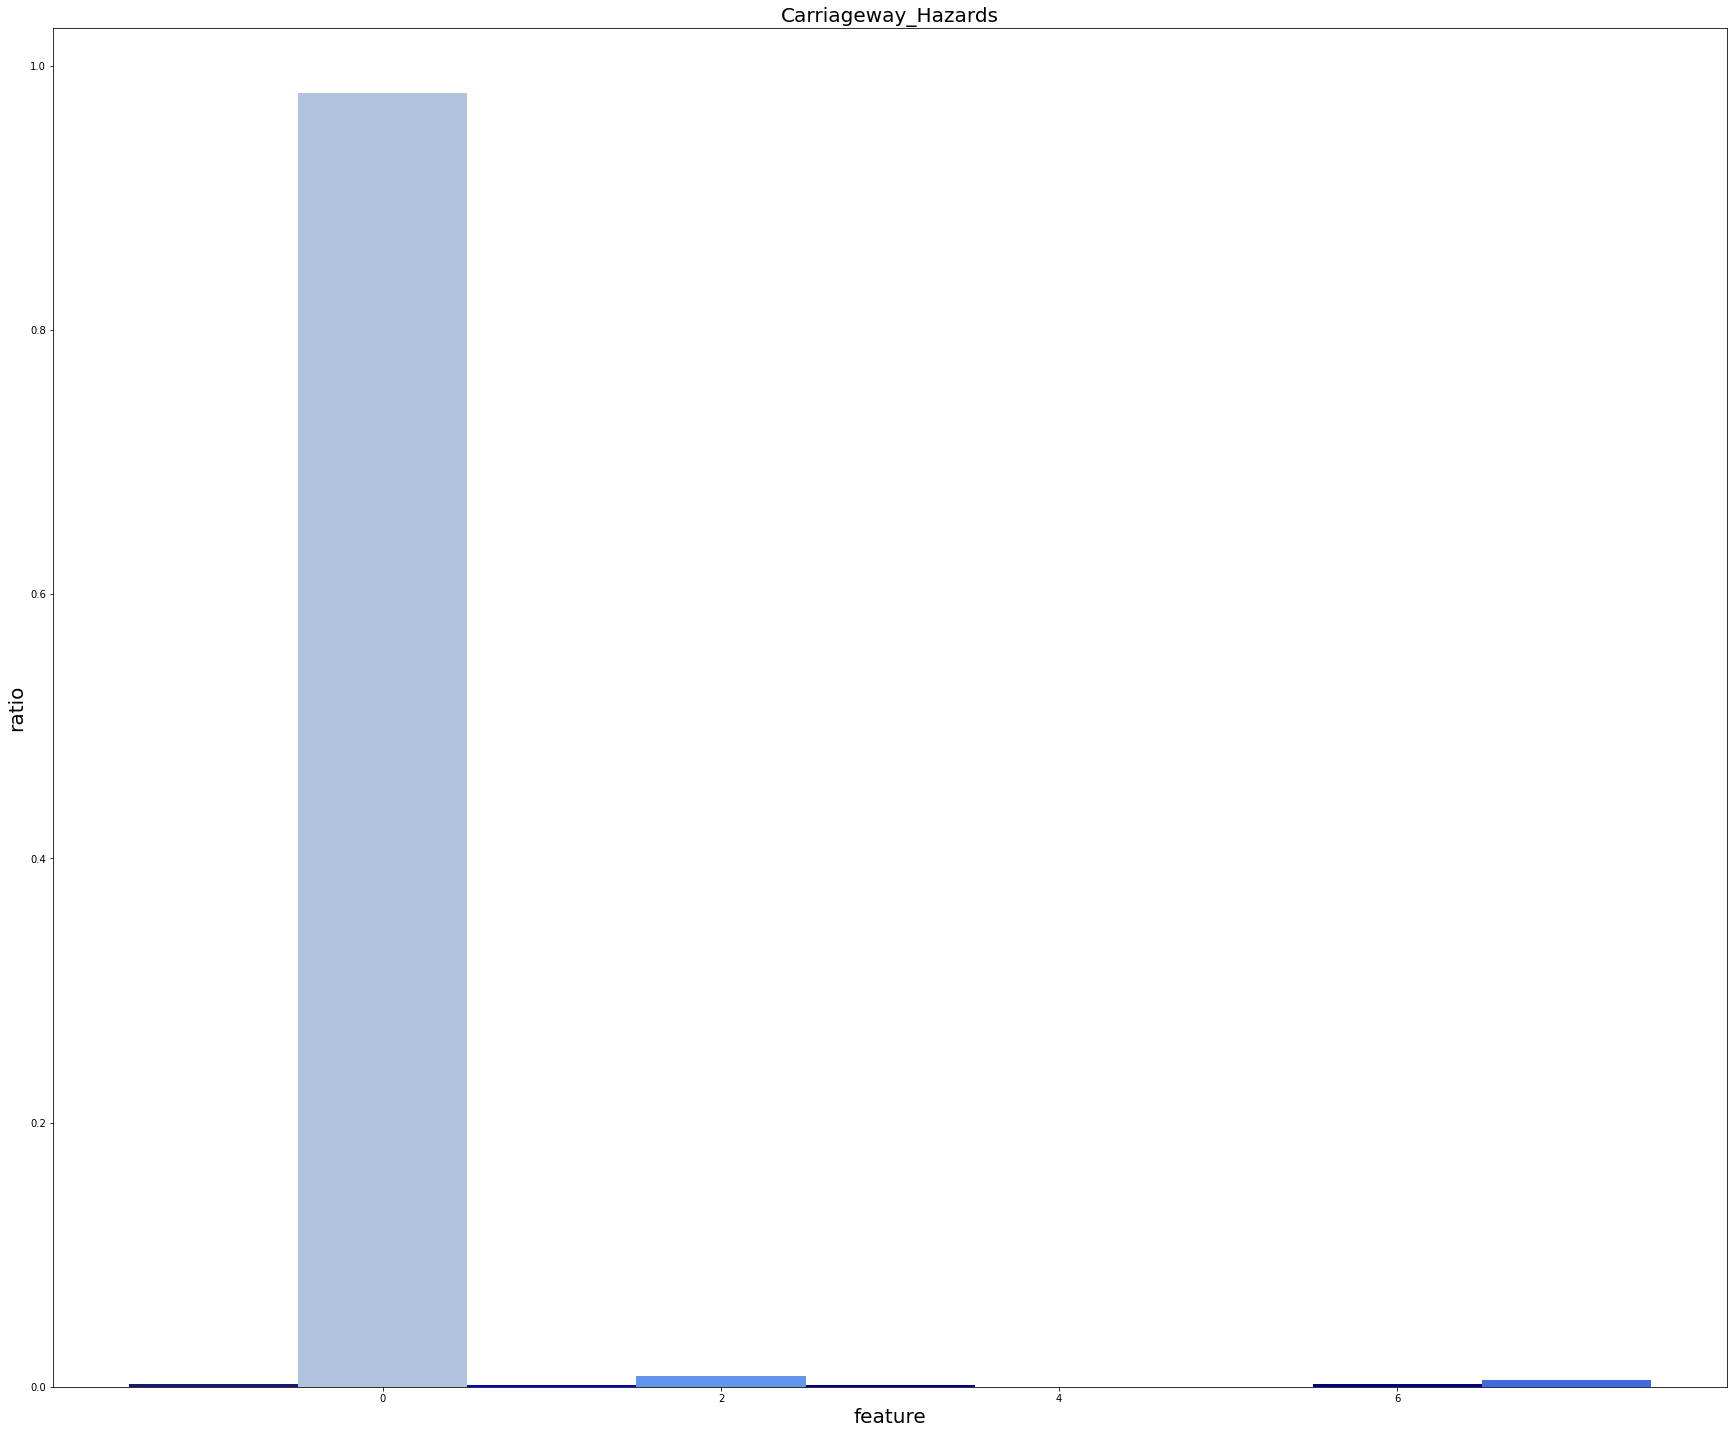

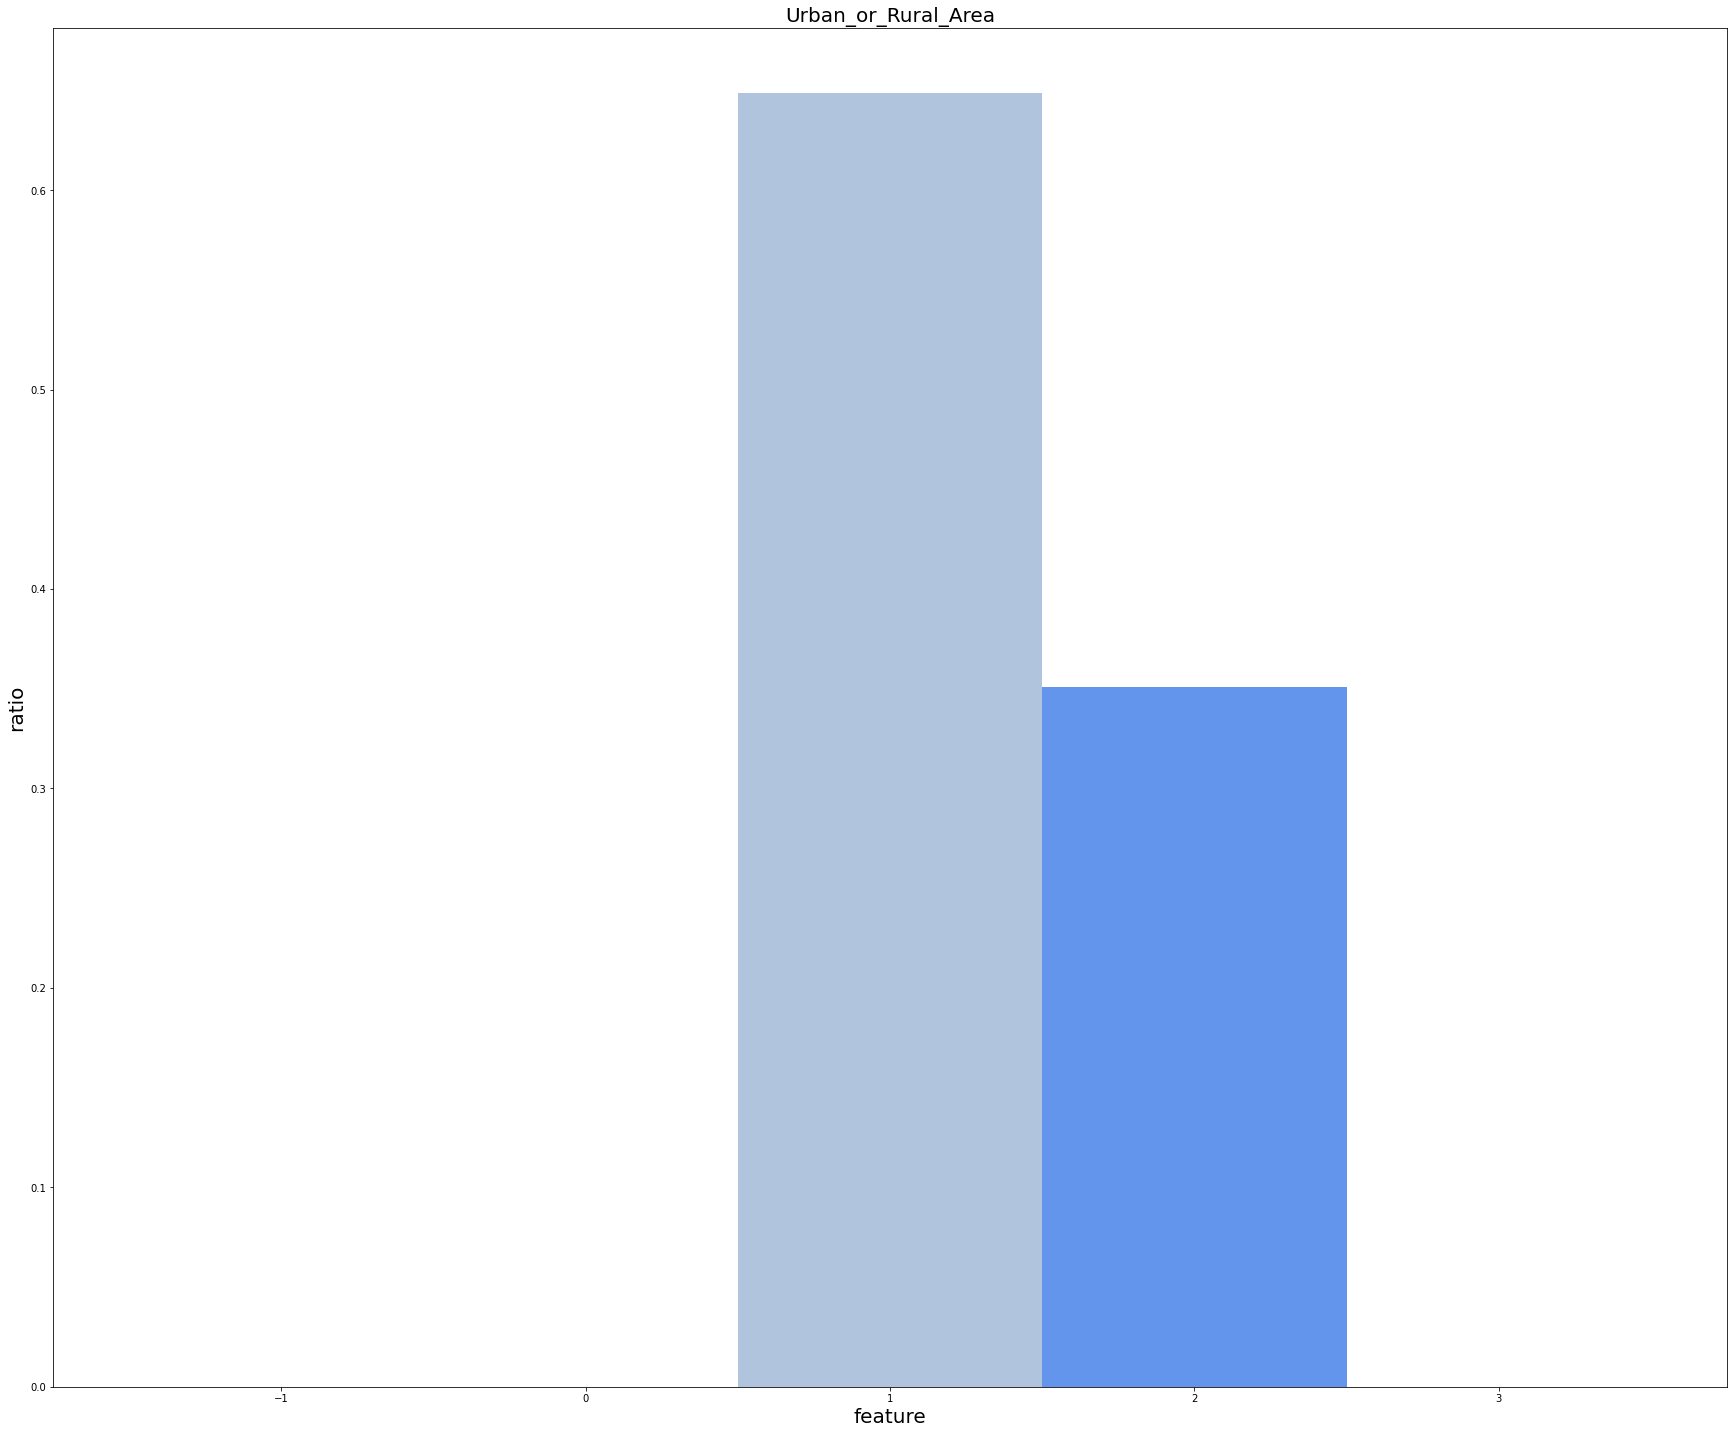

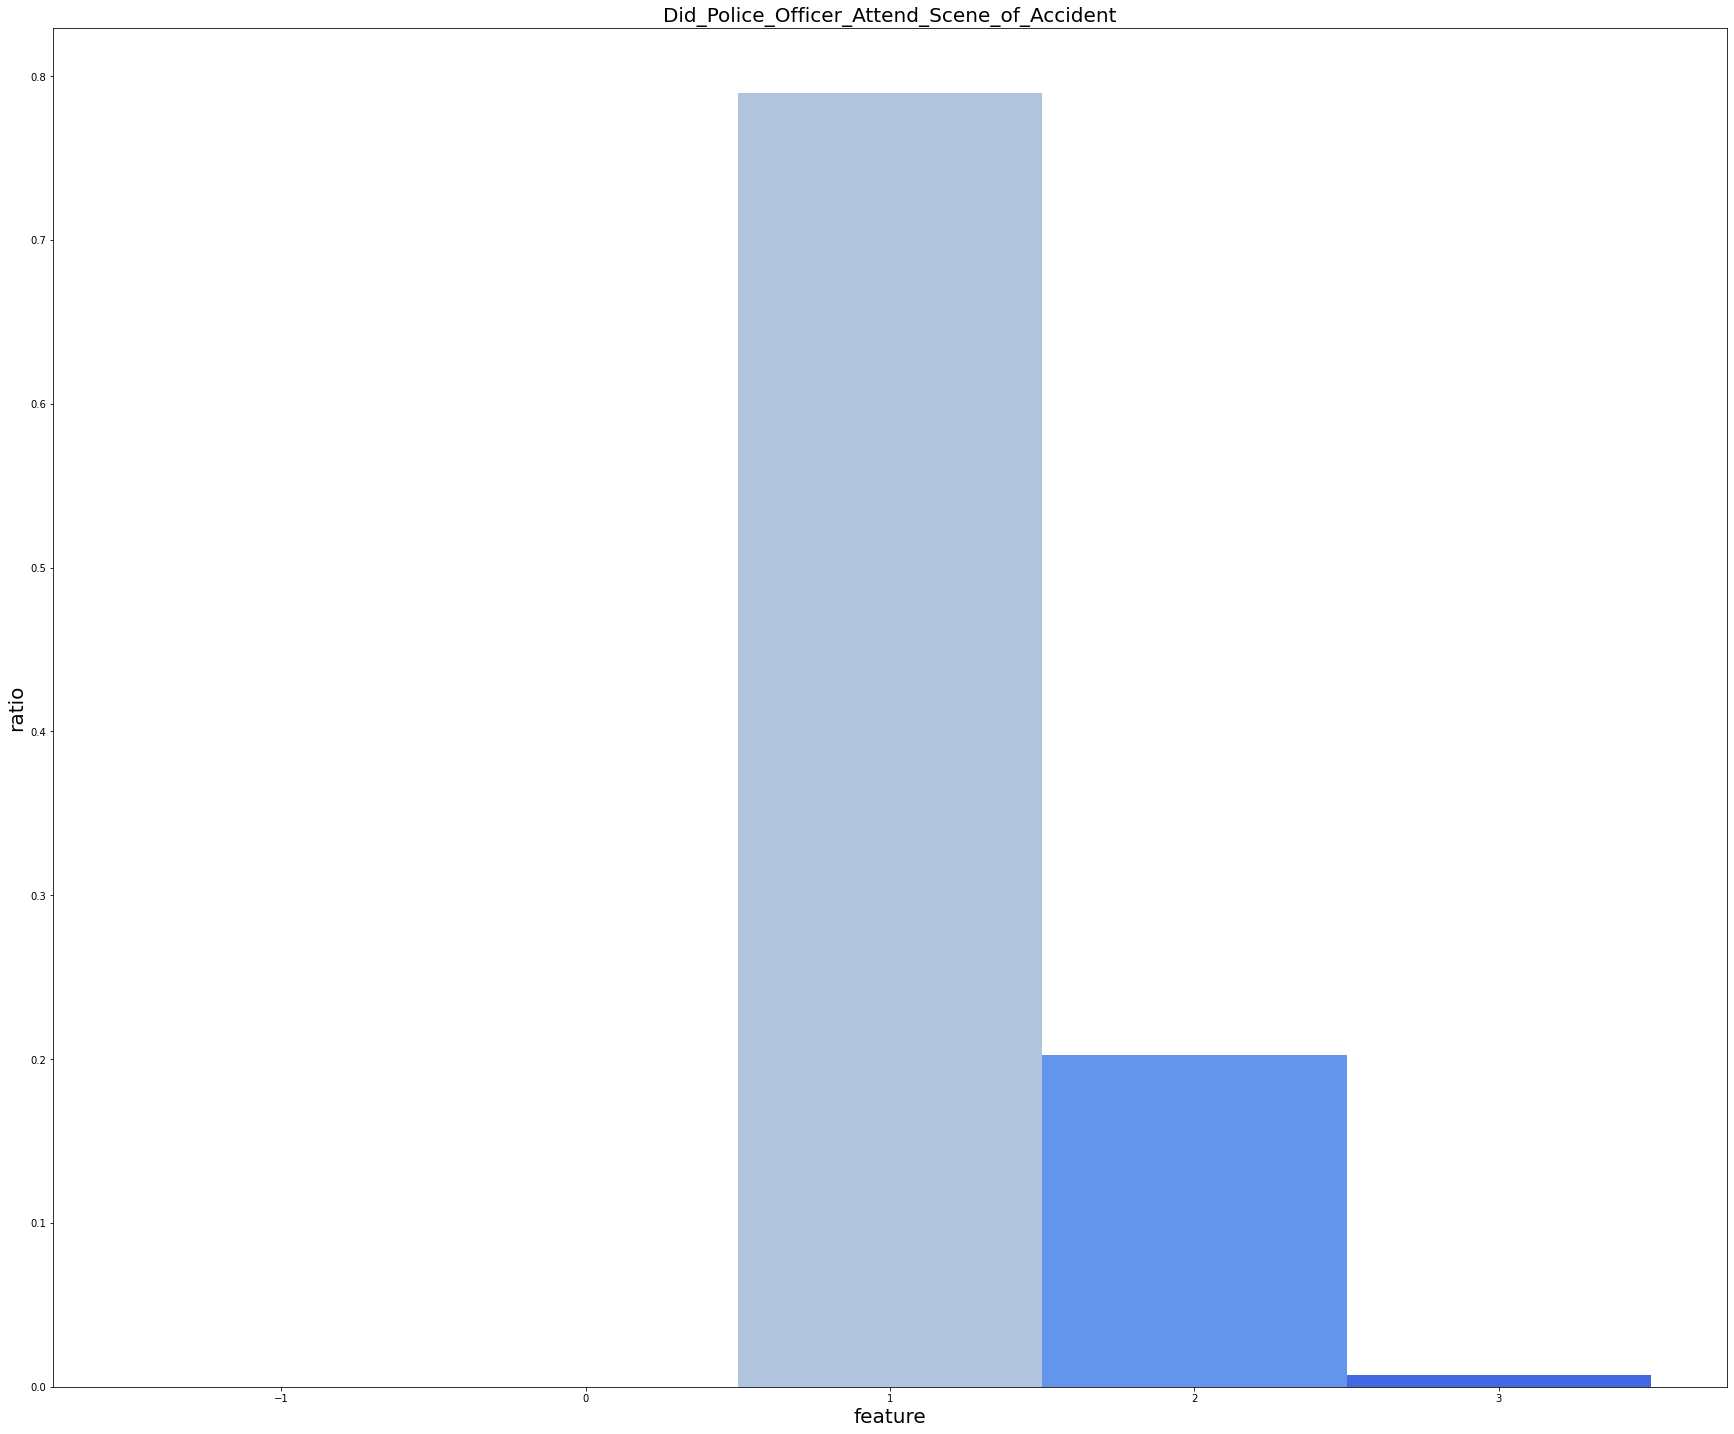

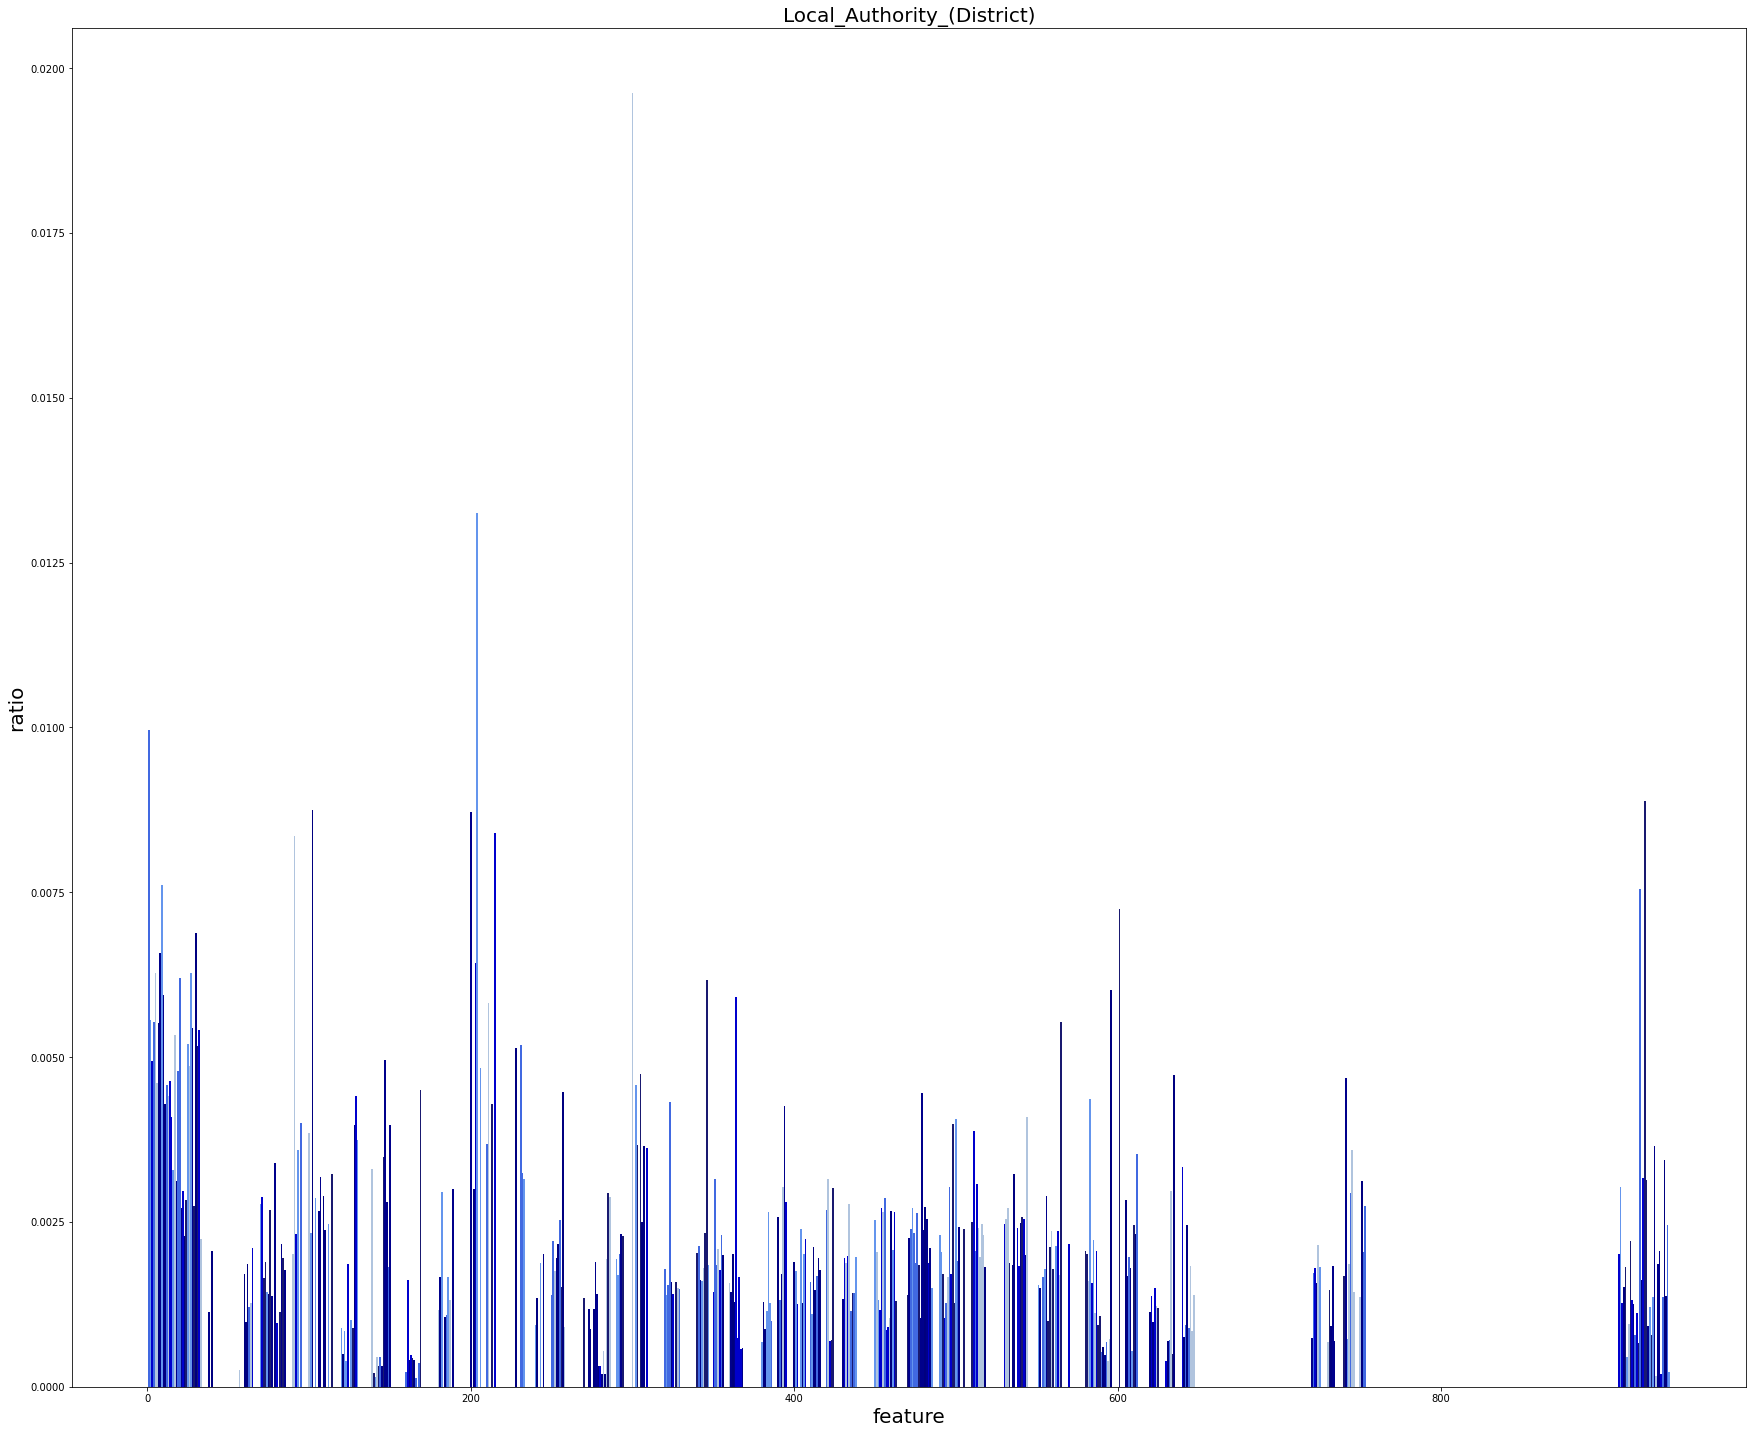

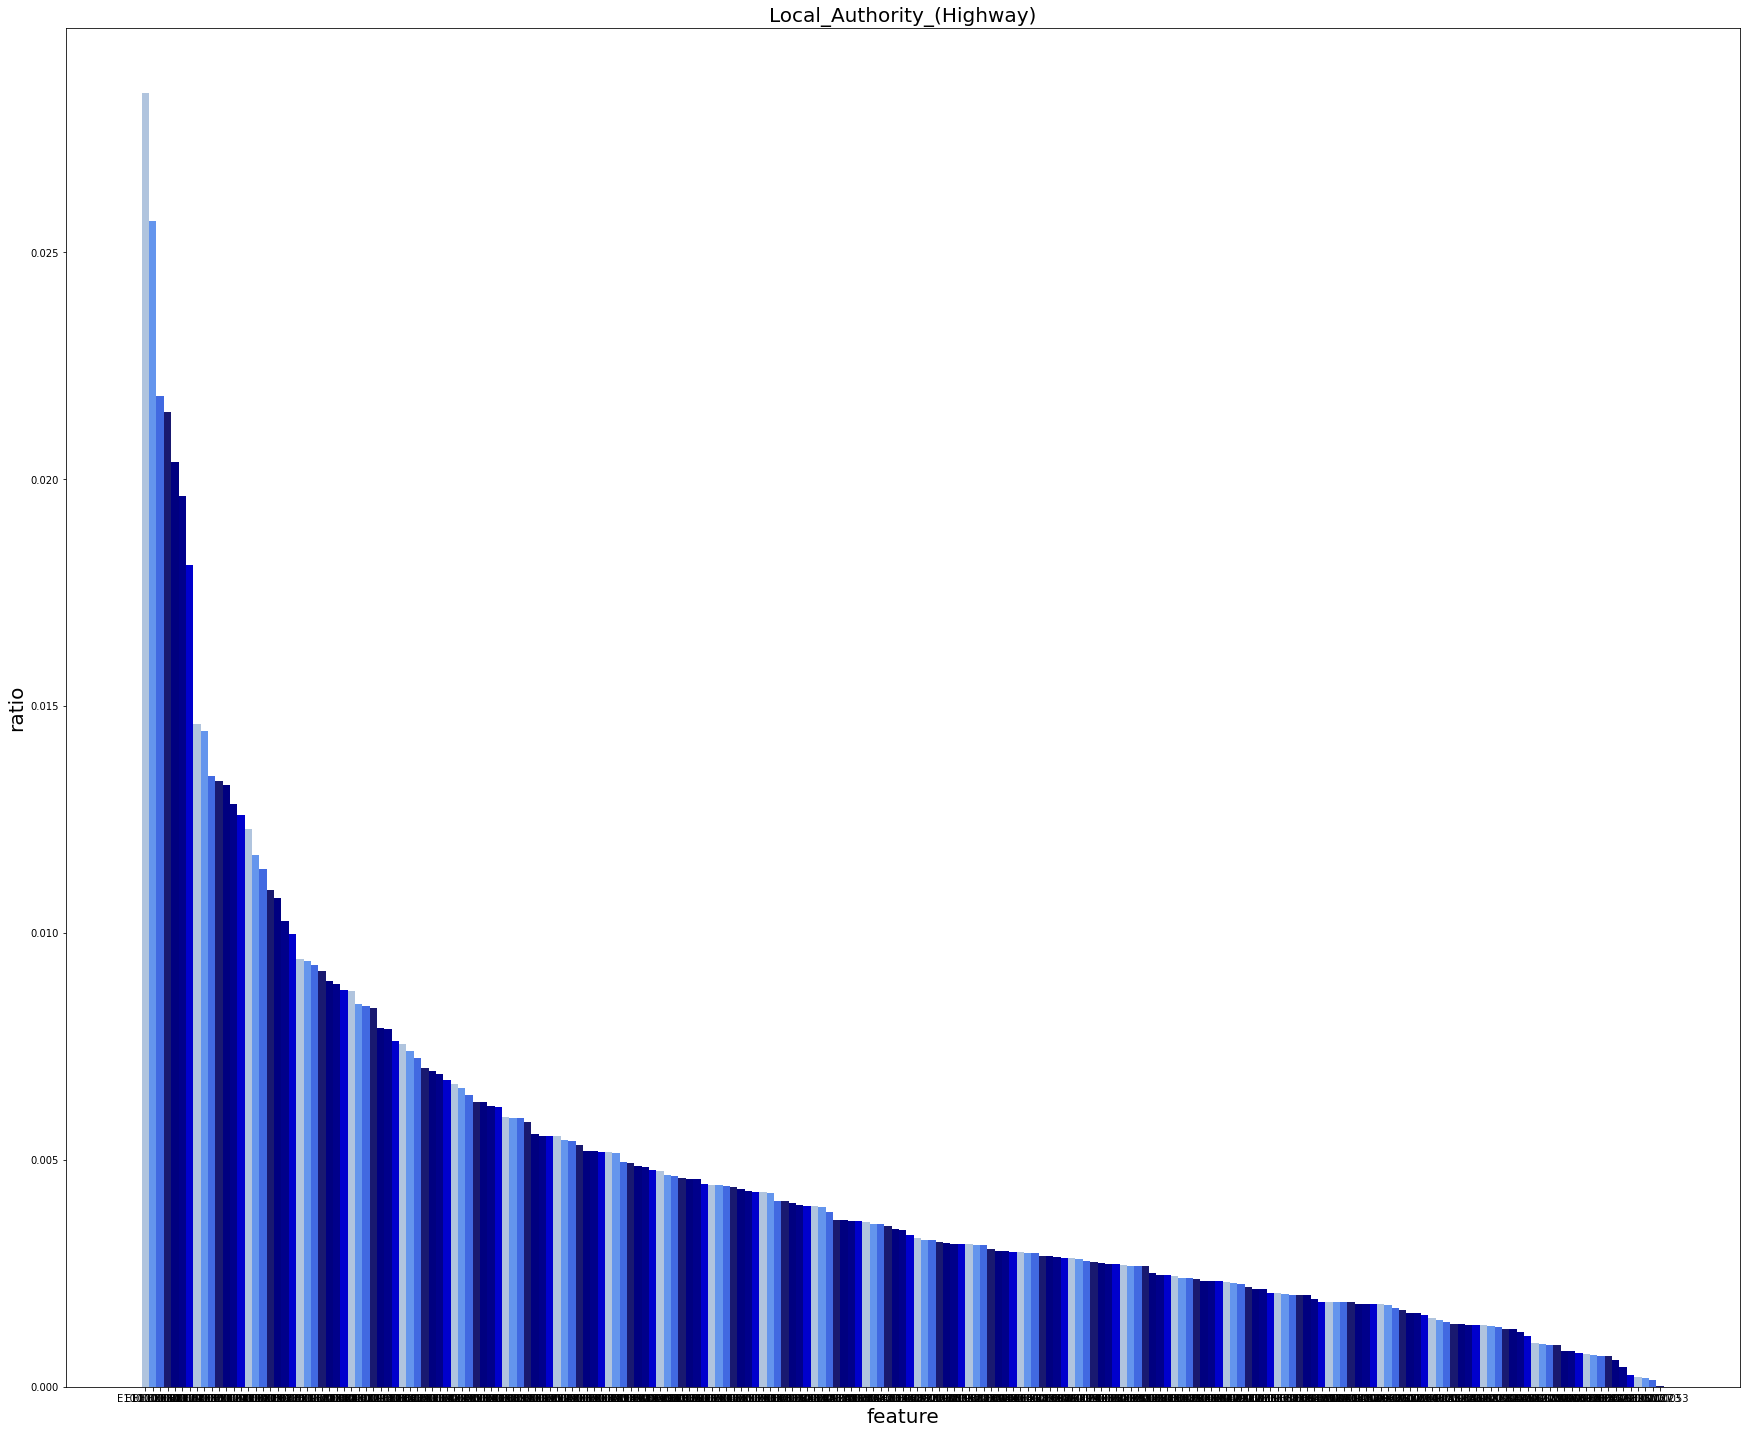

In [33]:
feature_count(accidents_df, accident_columns)

### Heatmaps

In [18]:
label_column = "Accident_Severity"

In [19]:
x, y = accidents_df['Urban_or_Rural_Area'], accidents_df[label_column]

In [20]:
x_labels = [v for v in sorted(x.unique())]
y_labels = [v for v in sorted(y.unique())]

In [21]:
x_labels

[-1, 1, 2, 3]

In [22]:
y_labels

[1, 2, 3]

In [23]:
len(accidents_df[(accidents_df['Urban_or_Rural_Area'] == 1) & (accidents_df[label_column] == 1)])

10640

In [12]:
def heatmap(df, columns, label_column):
    y = df[label_column]
    y_labels = [v for v in sorted(y.unique())]
    y_labels_map = ['Fatal', 'Serious', 'Slight']
    for column in columns:
        x = df[column]
        x_labels = [v for v in sorted(x.unique())]
        
        data = []
        for y_label in y_labels:
            y_corr = []
            n_samples = len(df[df[label_column] == y_label])
            for x_label in x_labels:
                y_corr += [len(df[(df[column] == x_label) & (df[label_column] == y_label)]) / n_samples]
            data += [y_corr]
        heatmap_df = pd.DataFrame(data, columns=x_labels, index=y_labels_map).T
        plt.figure(figsize=(30,25))
        sns.heatmap(heatmap_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)
        plt.title(column, fontsize=20)
        plt.ylabel('feature', fontsize=20)
        plt.show()

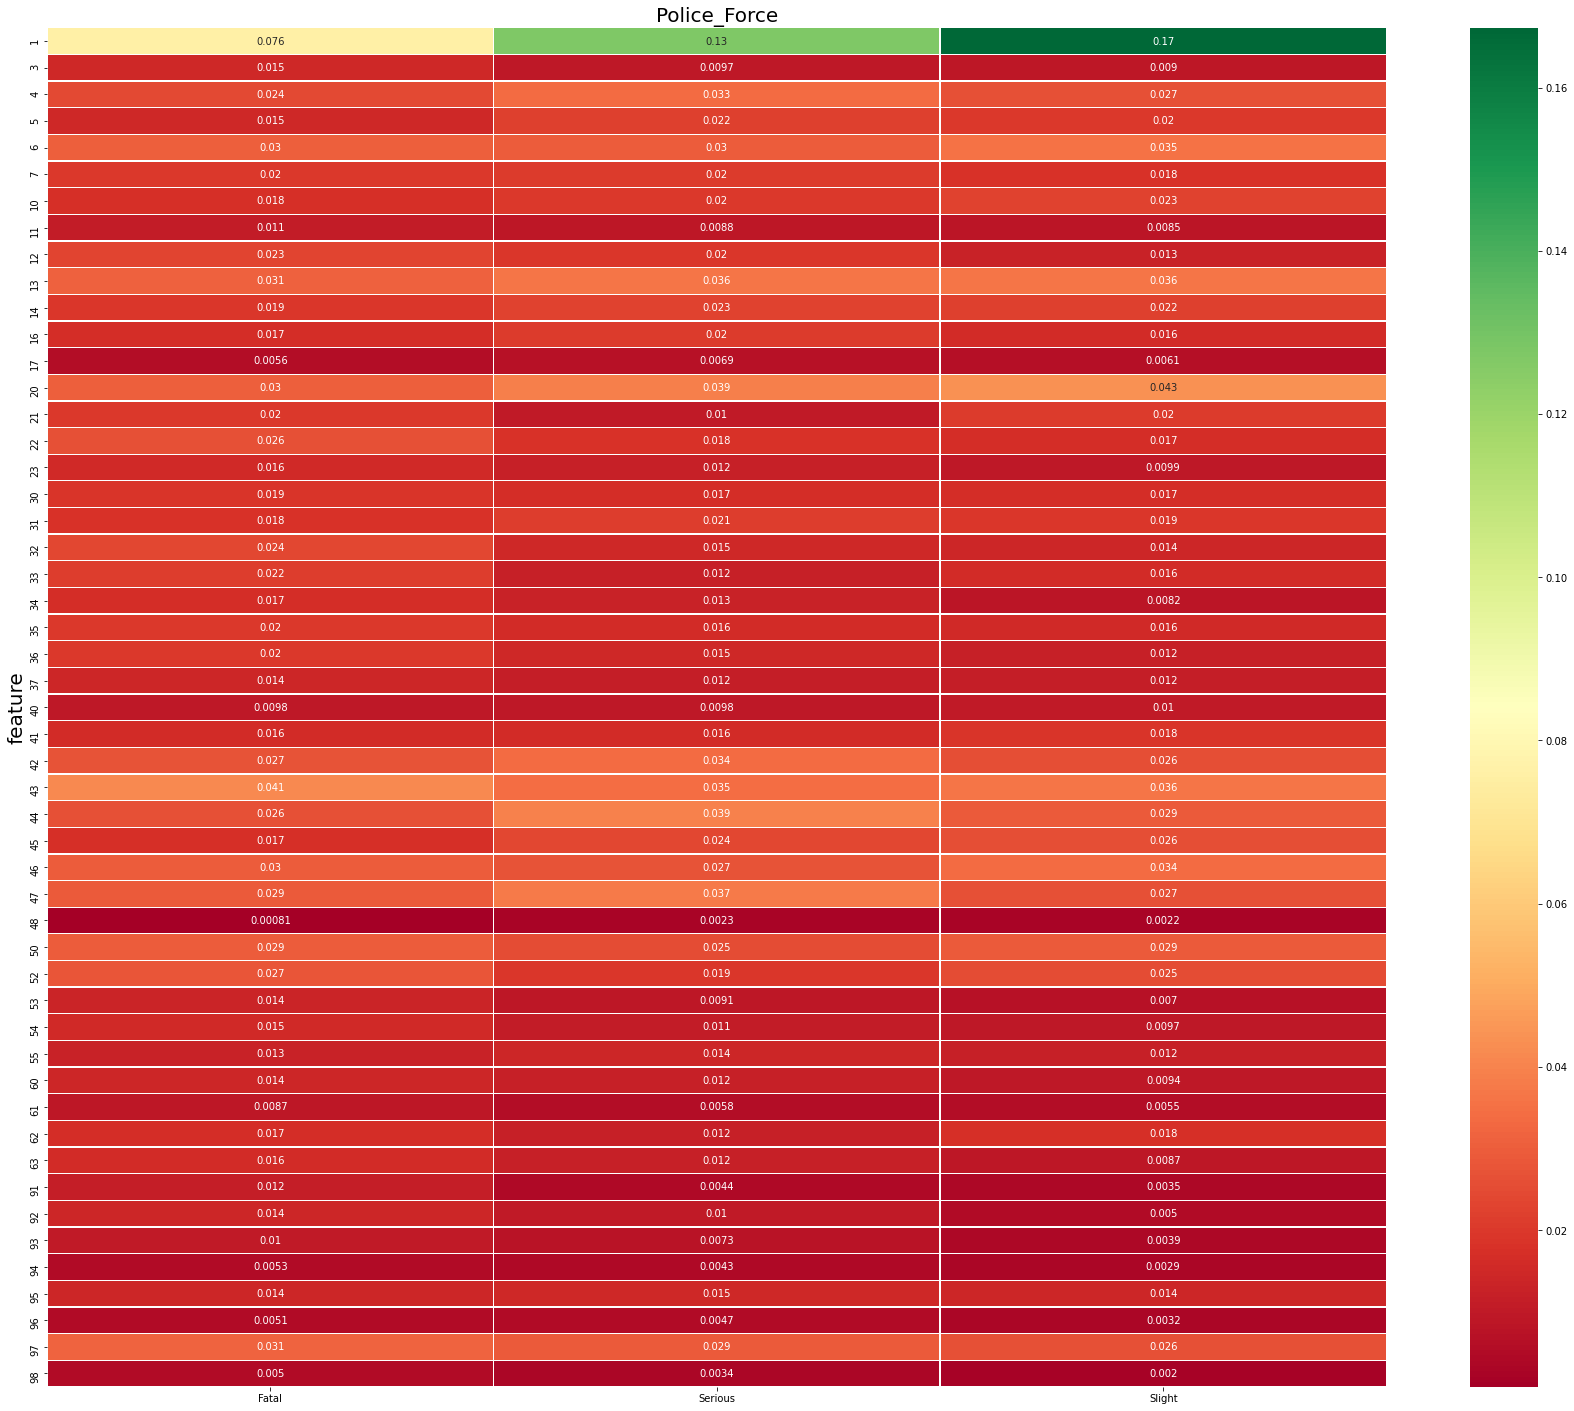

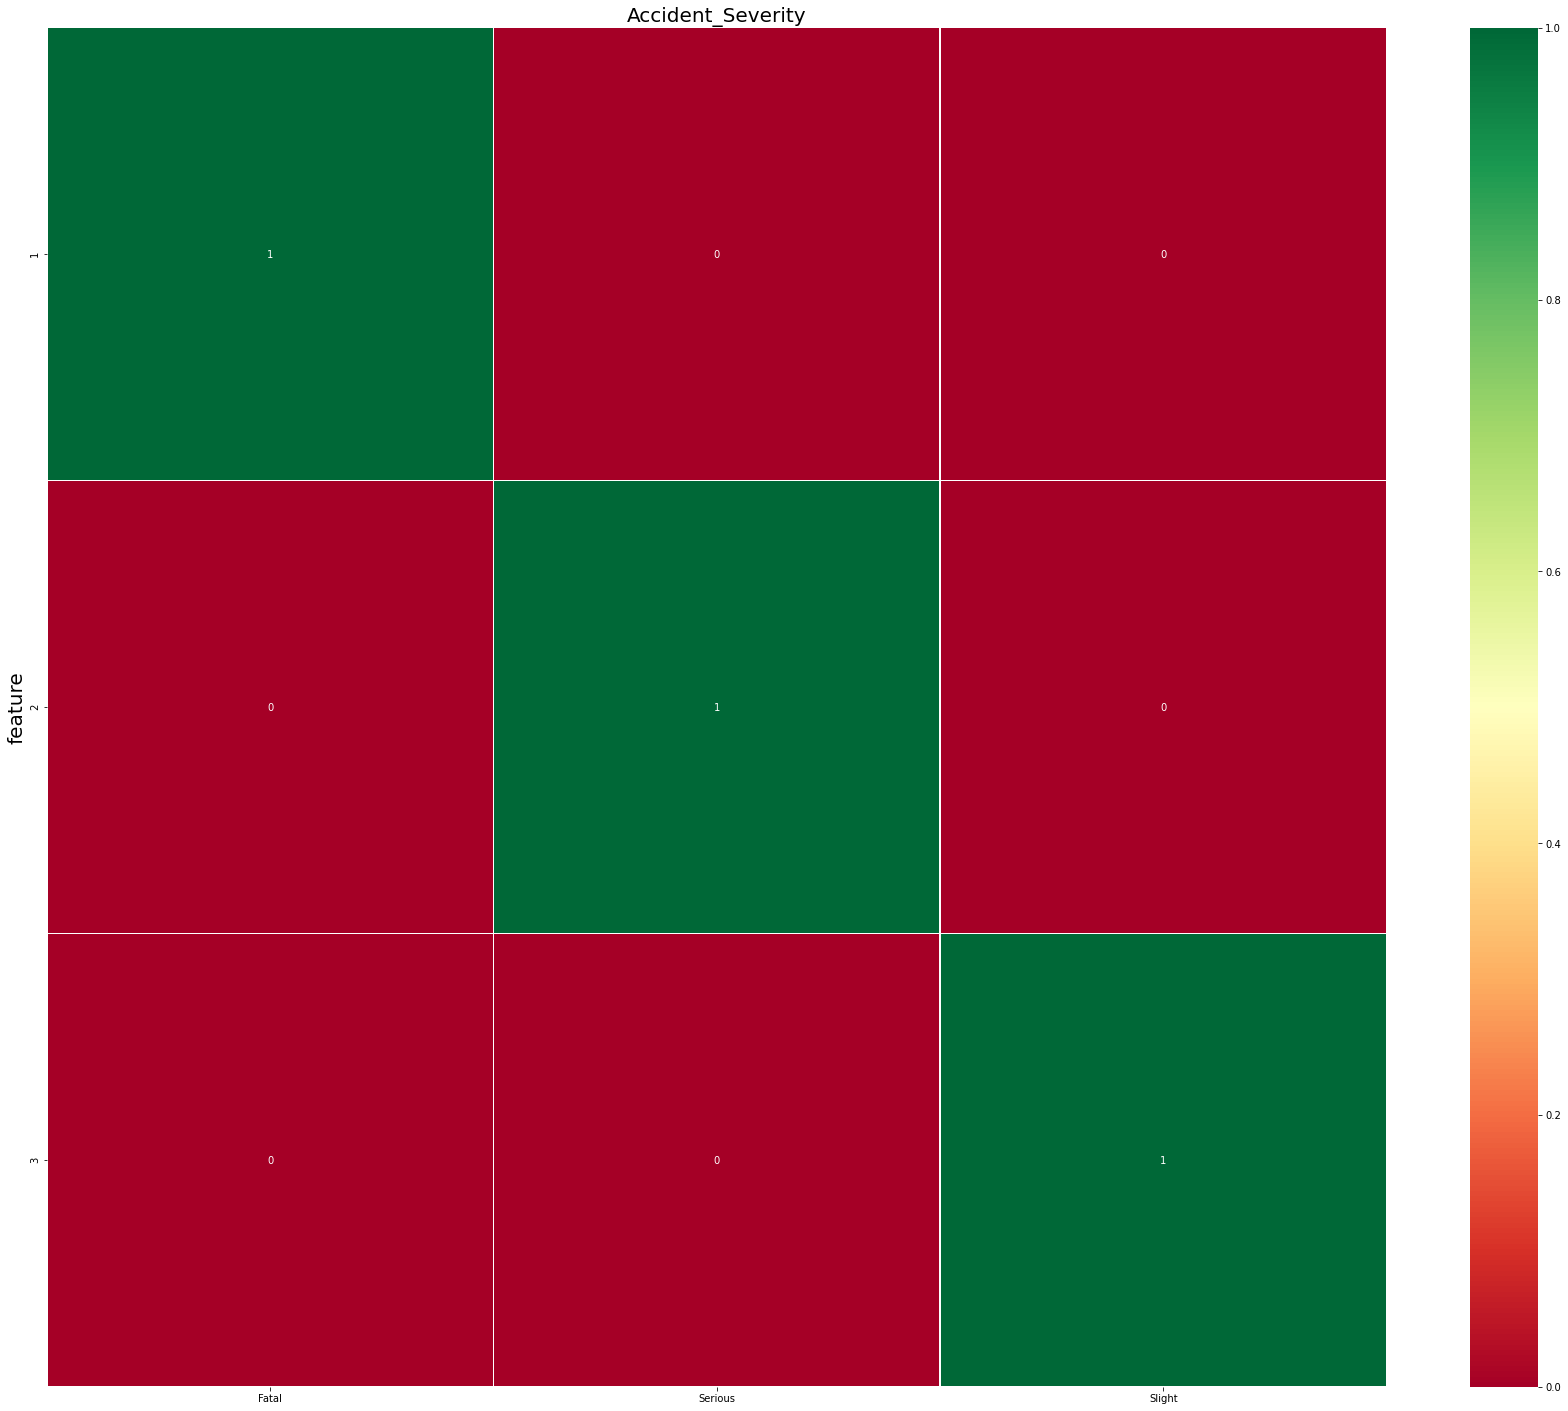

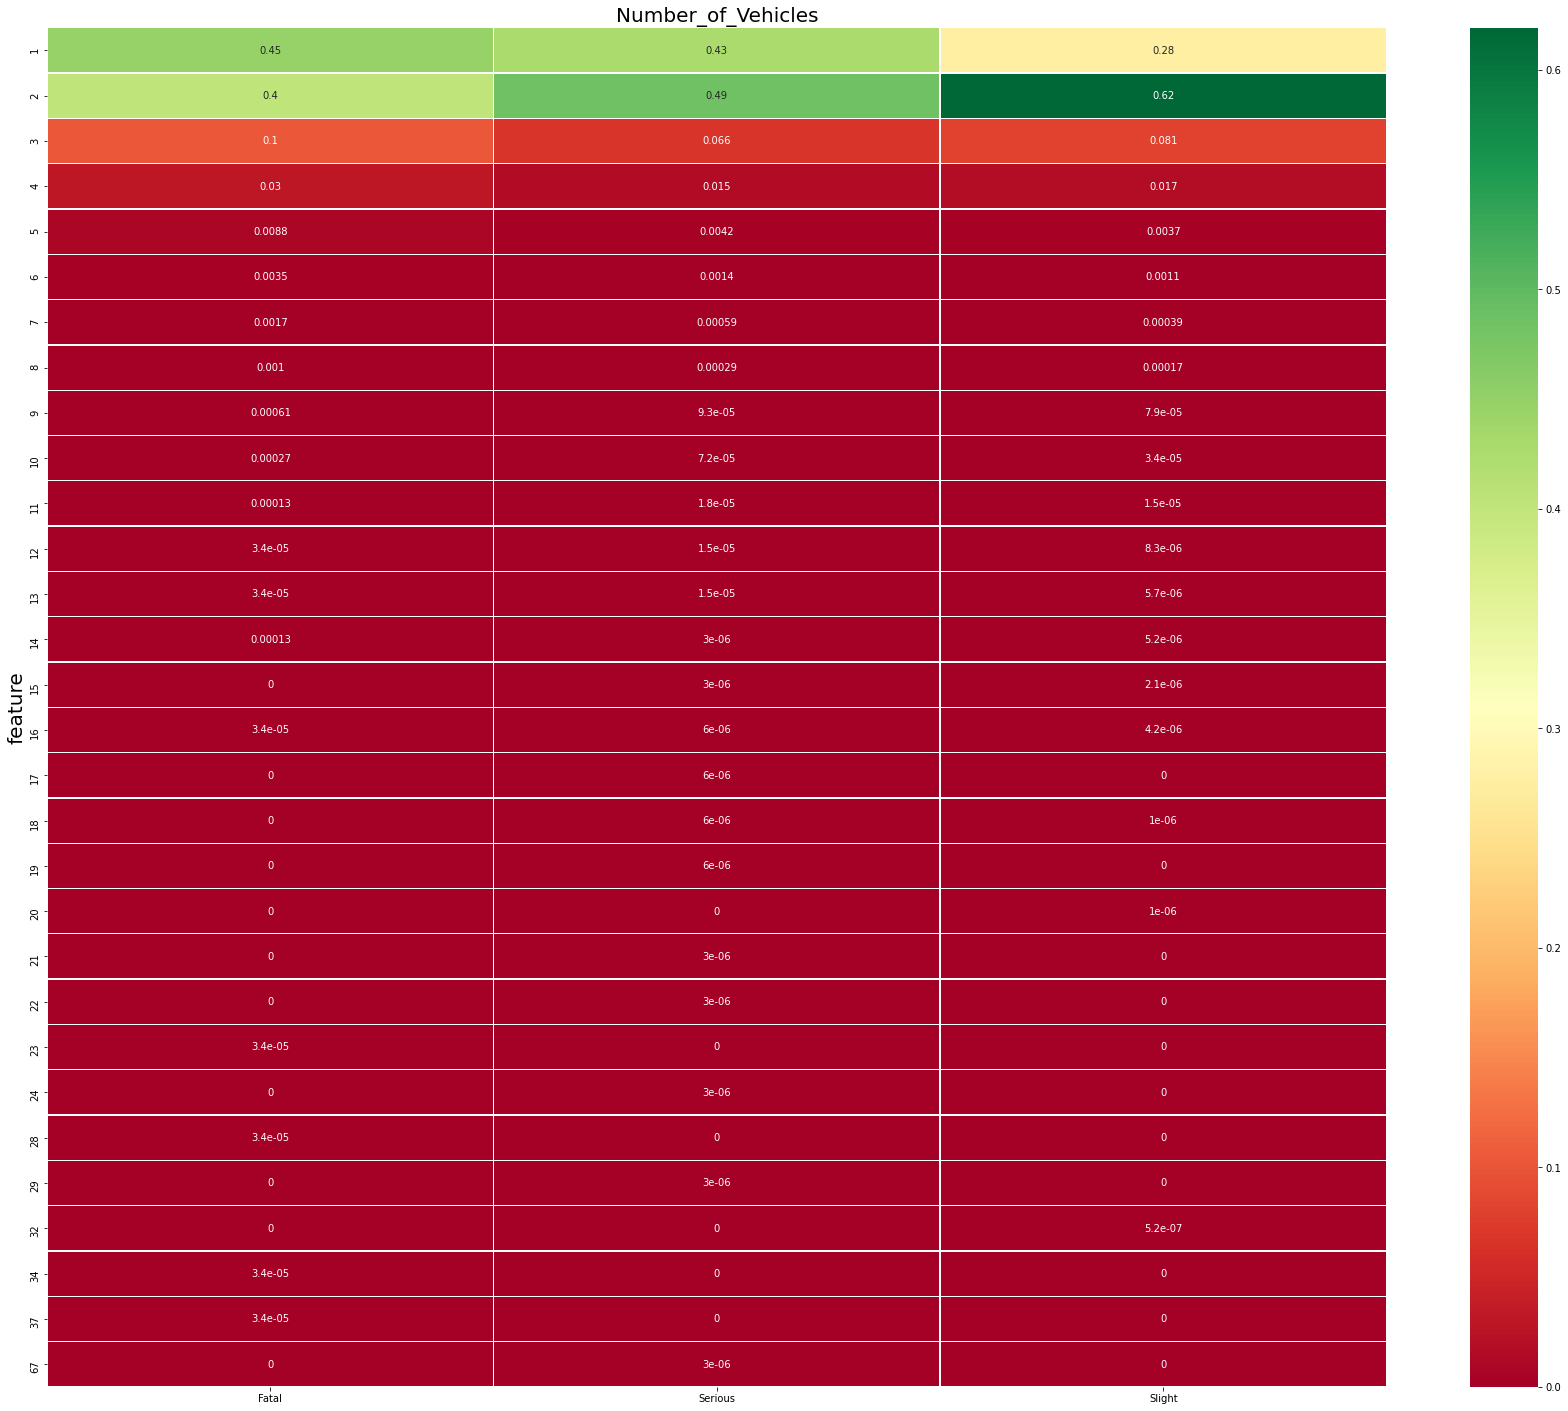

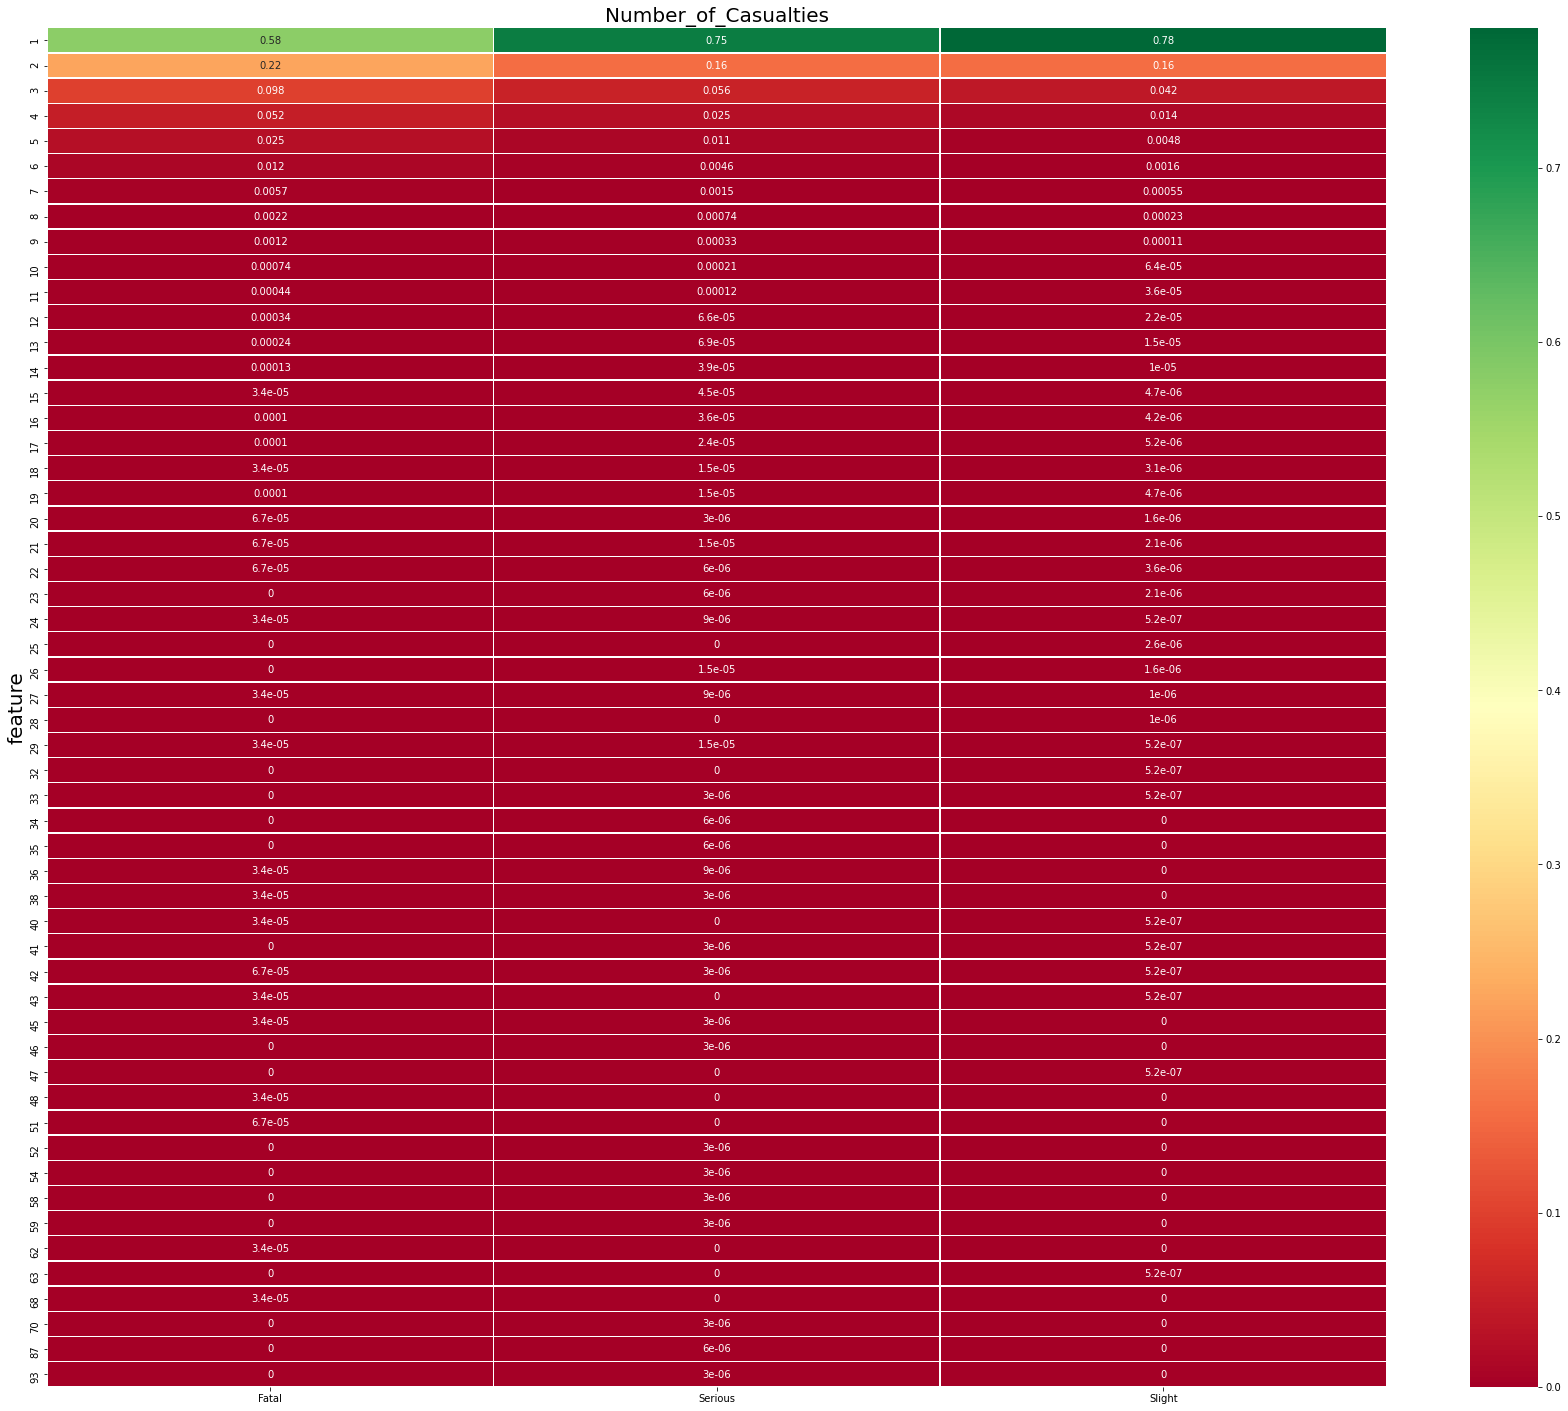

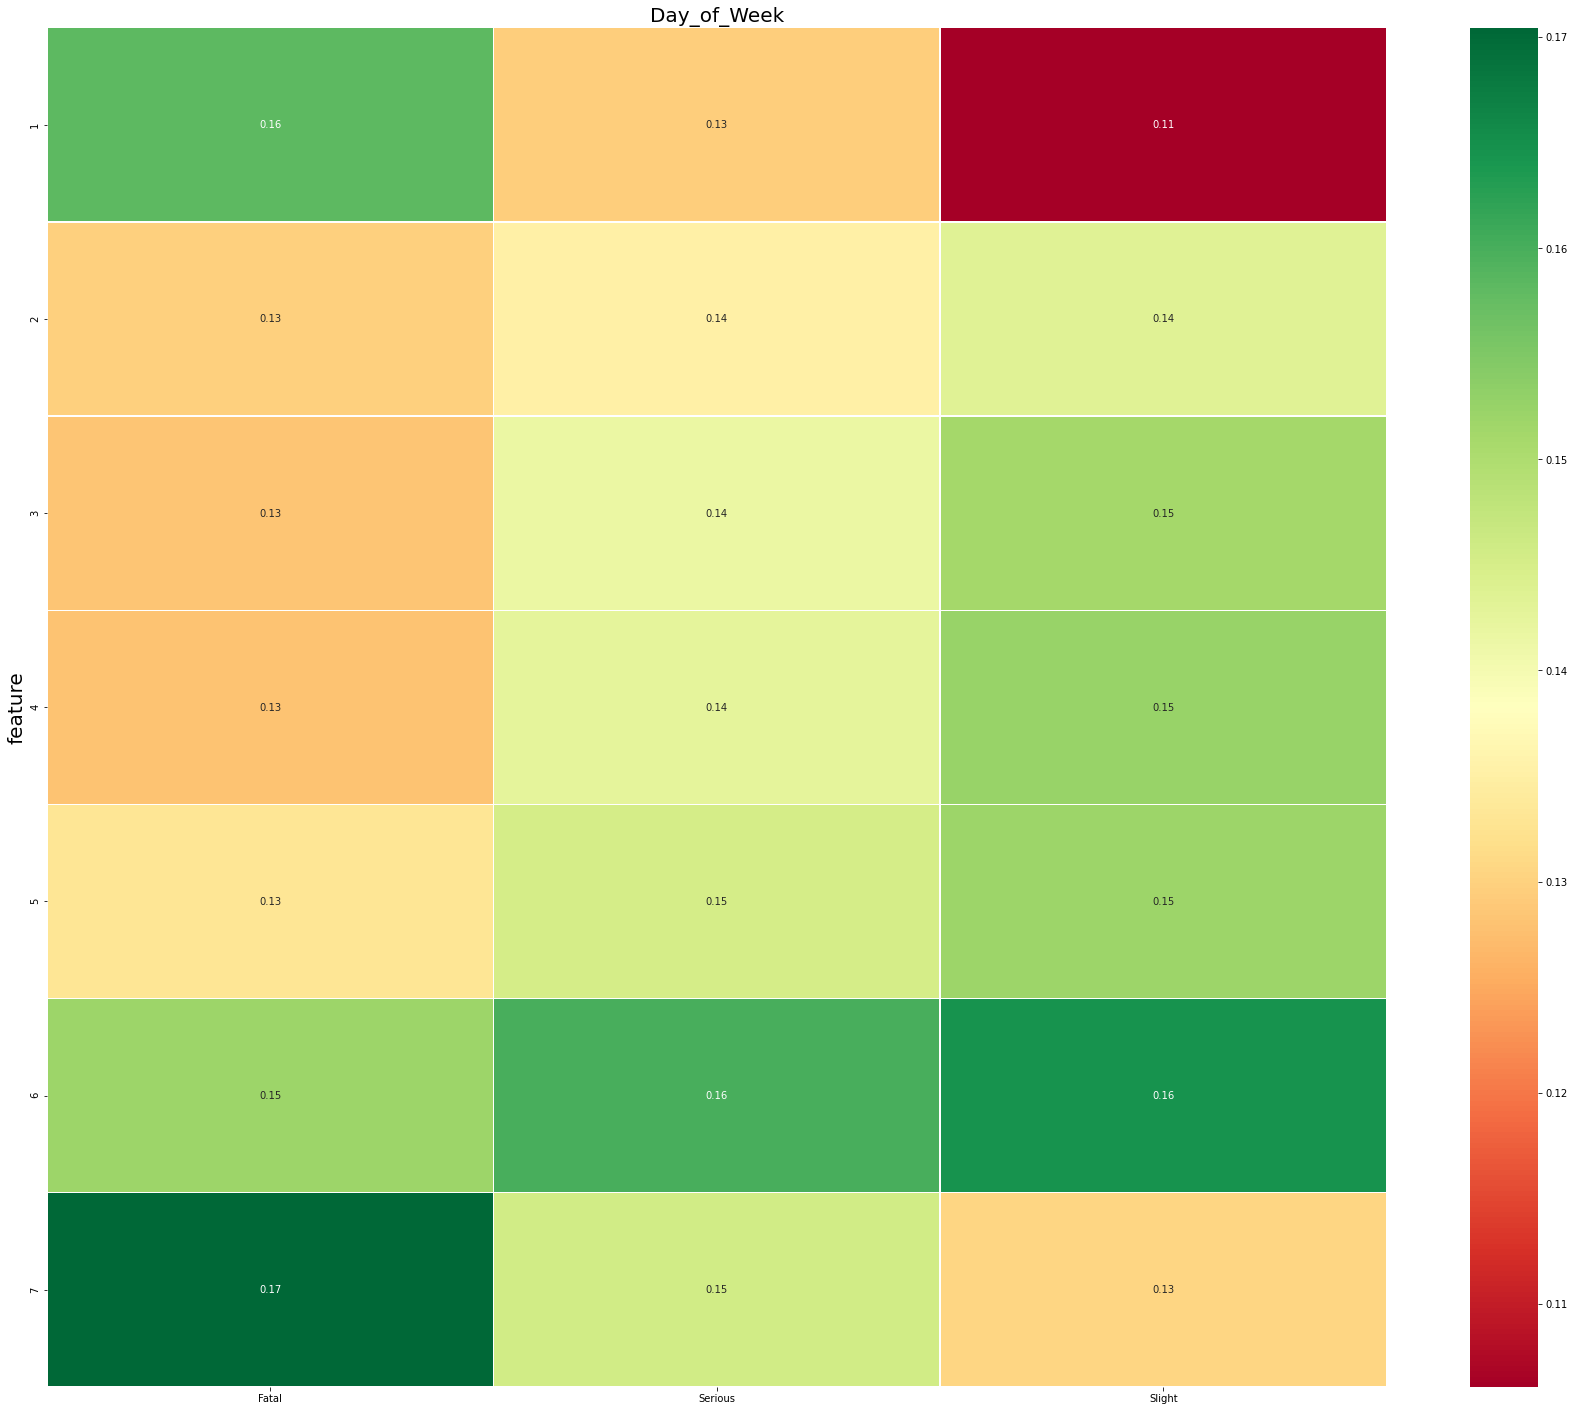

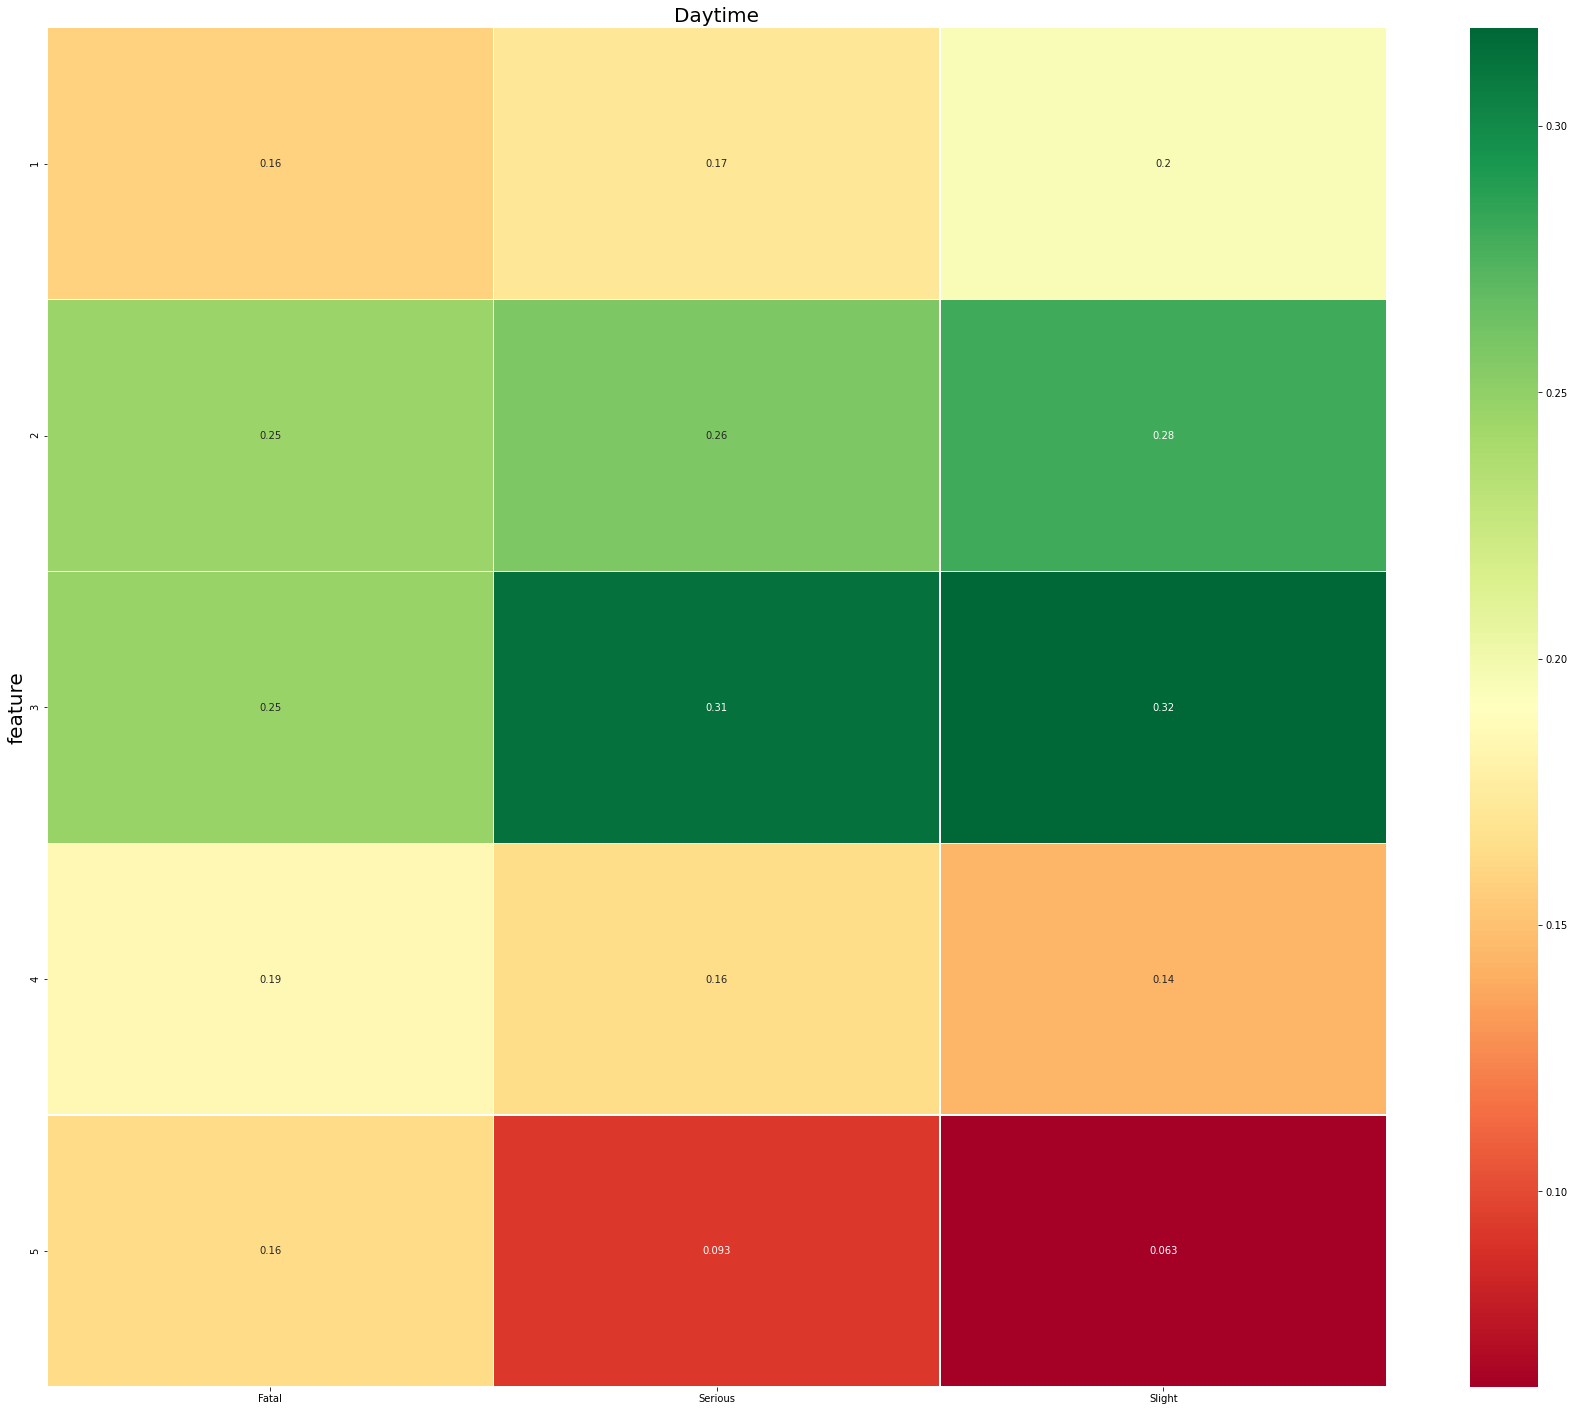

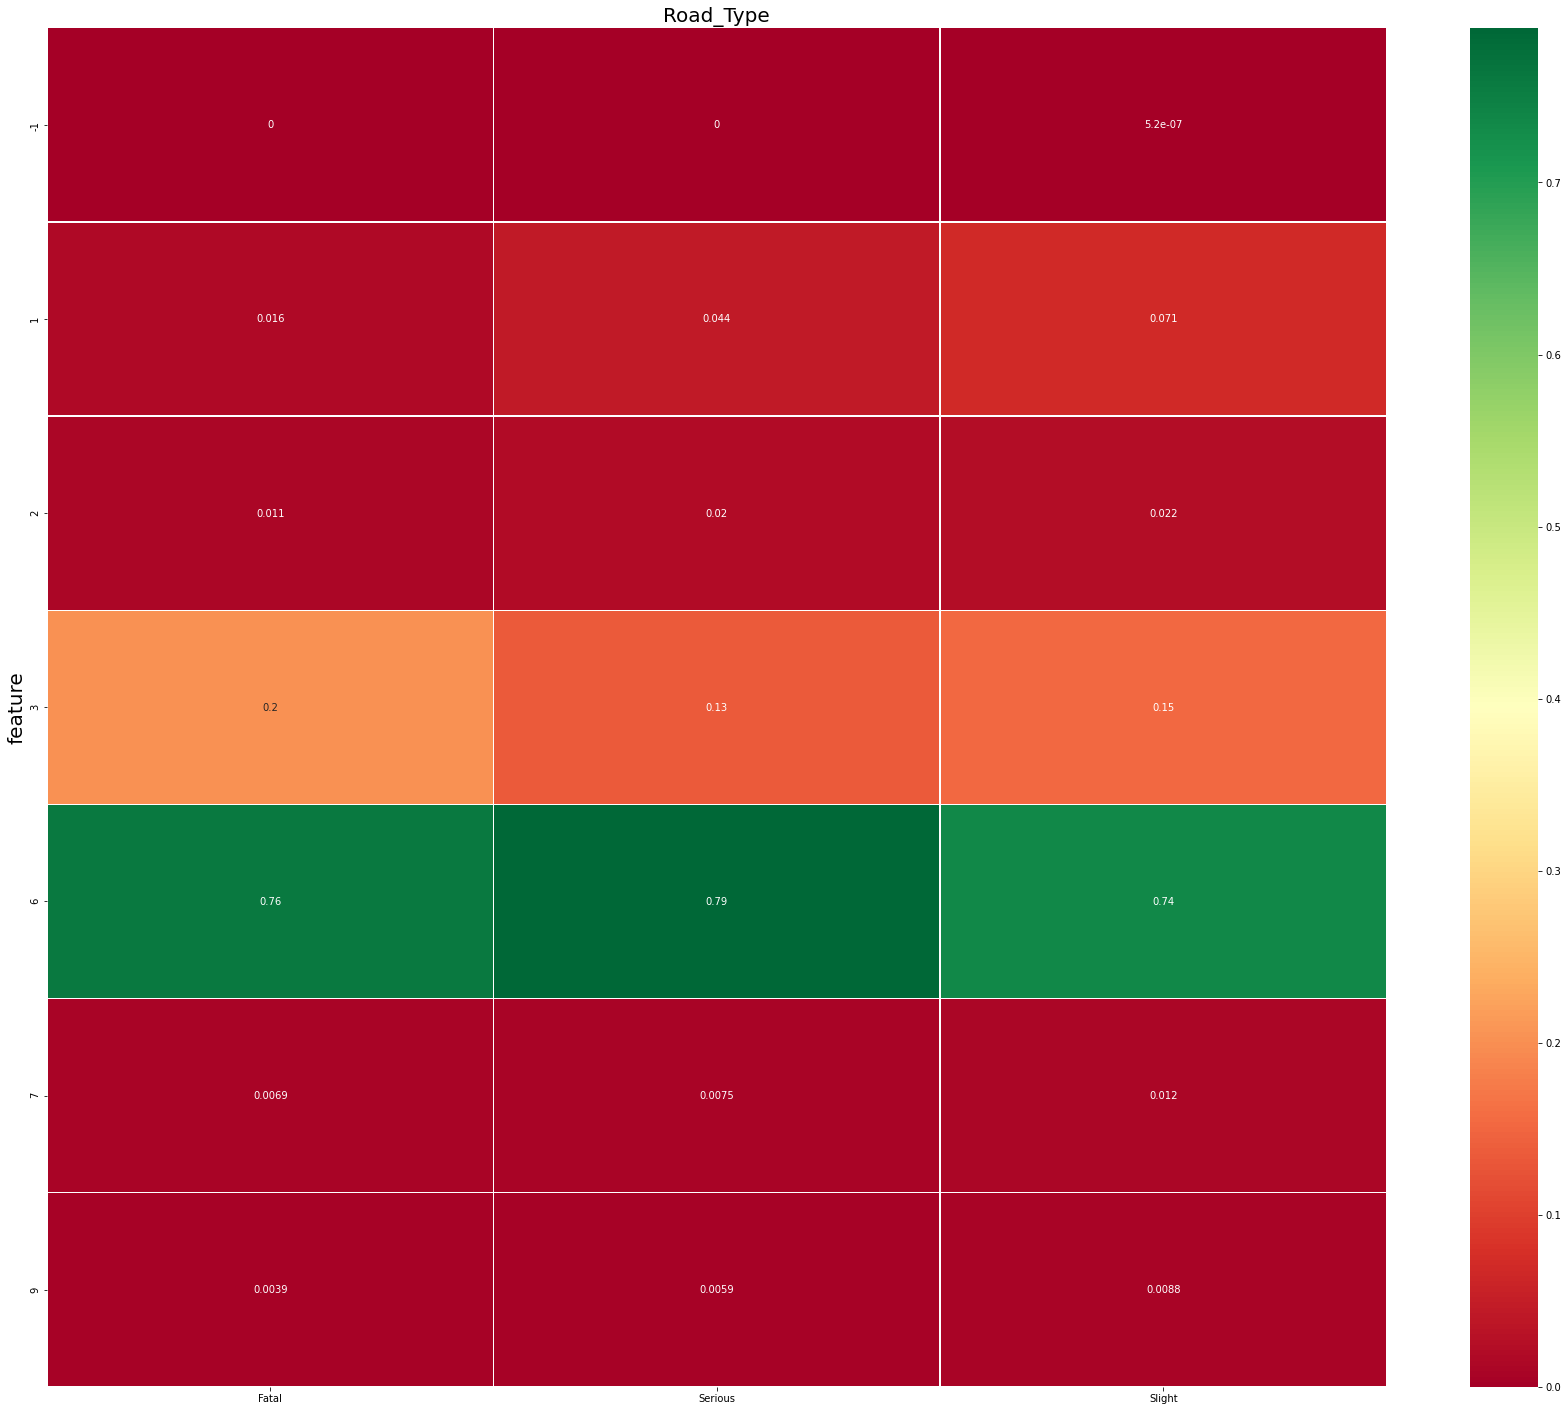

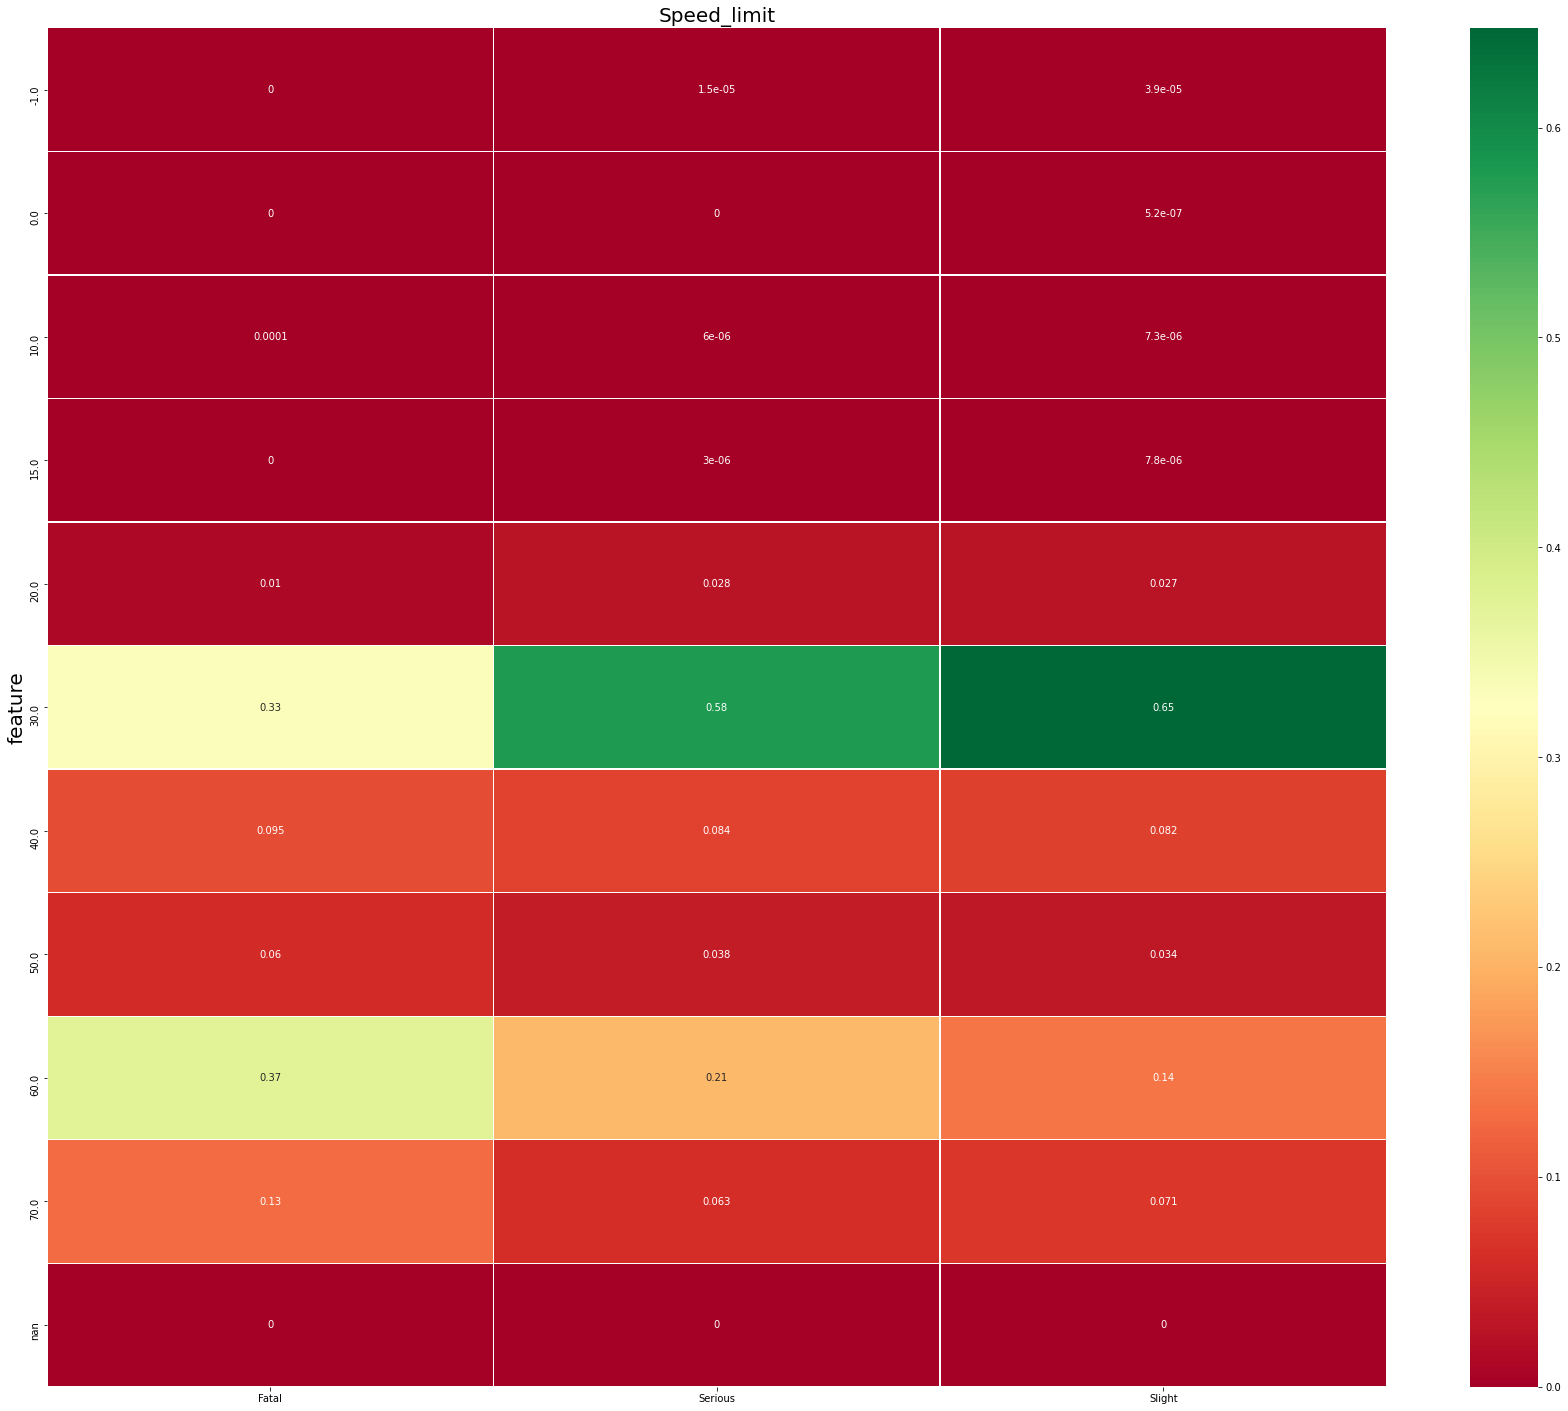

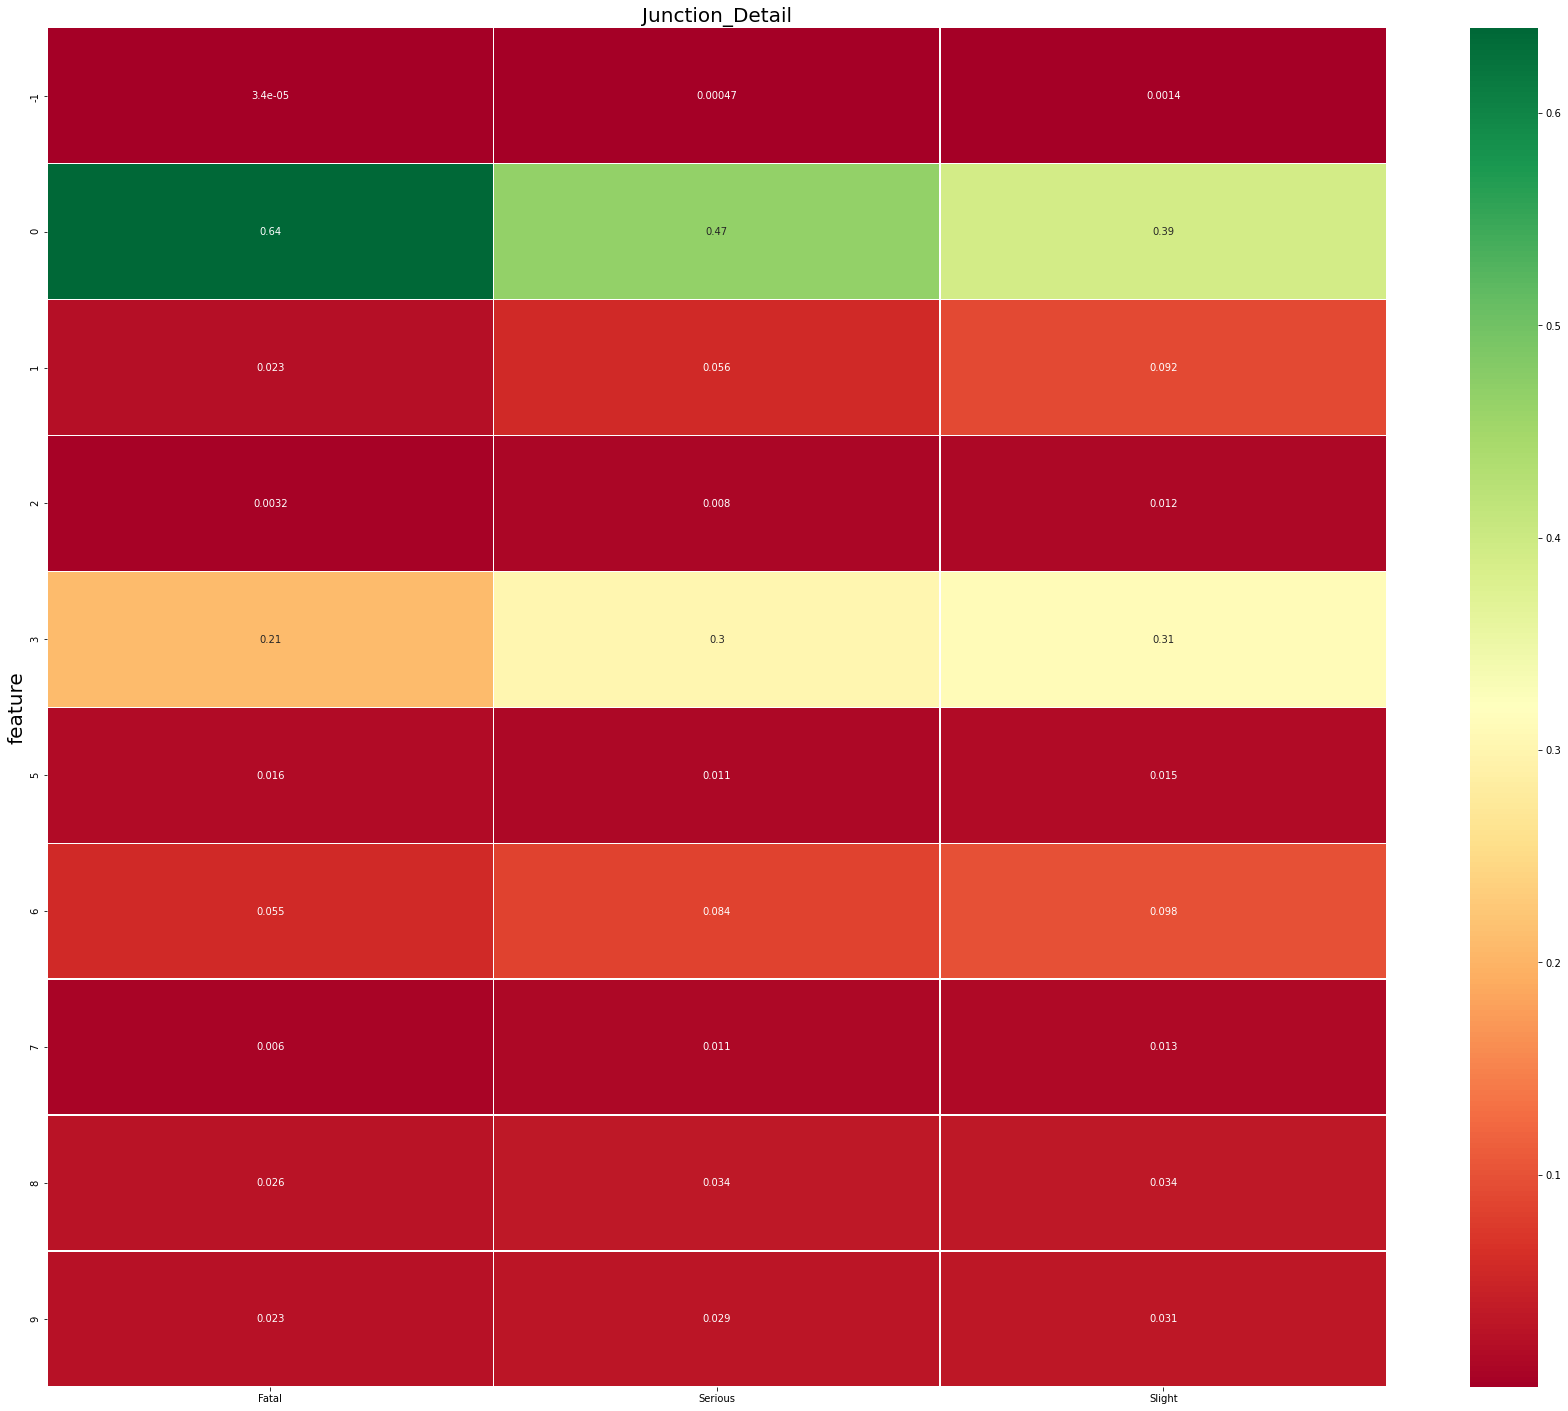

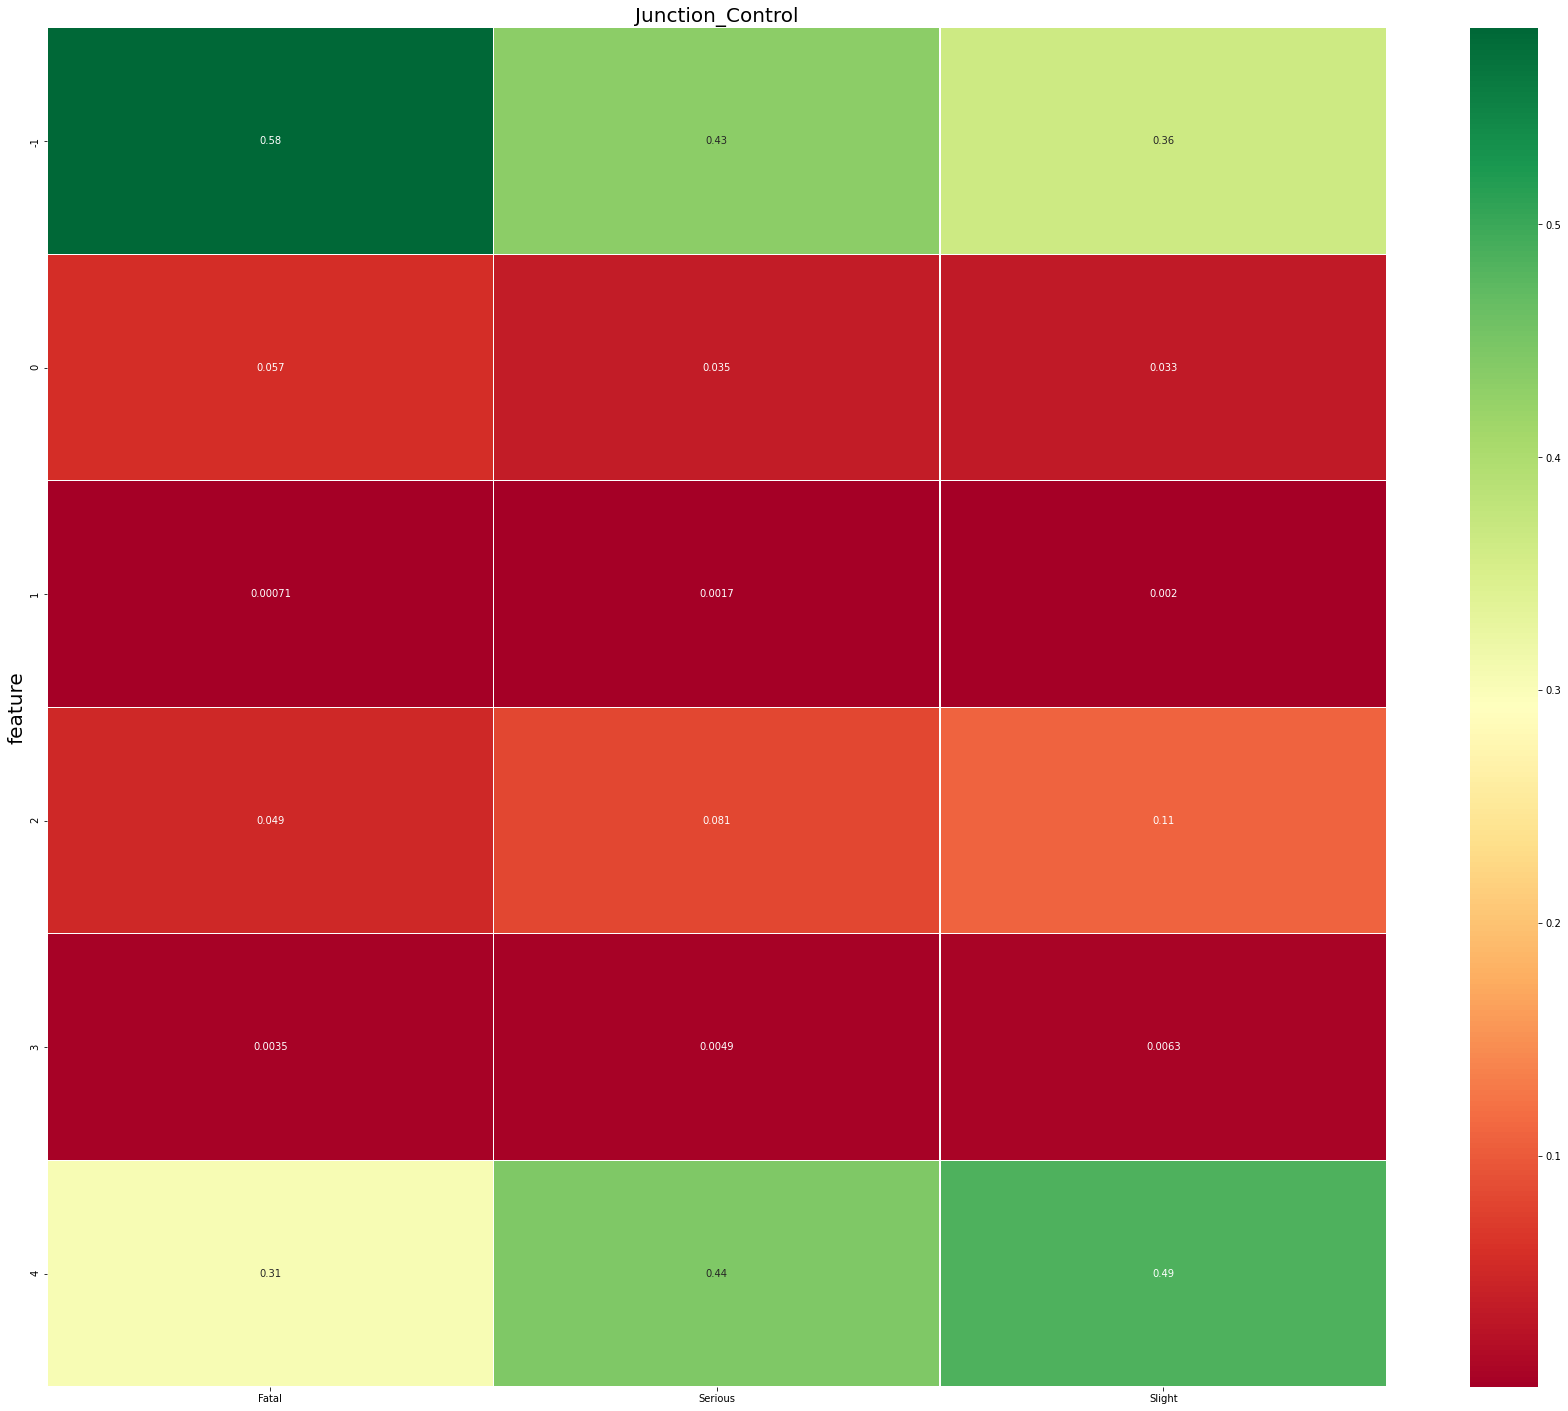

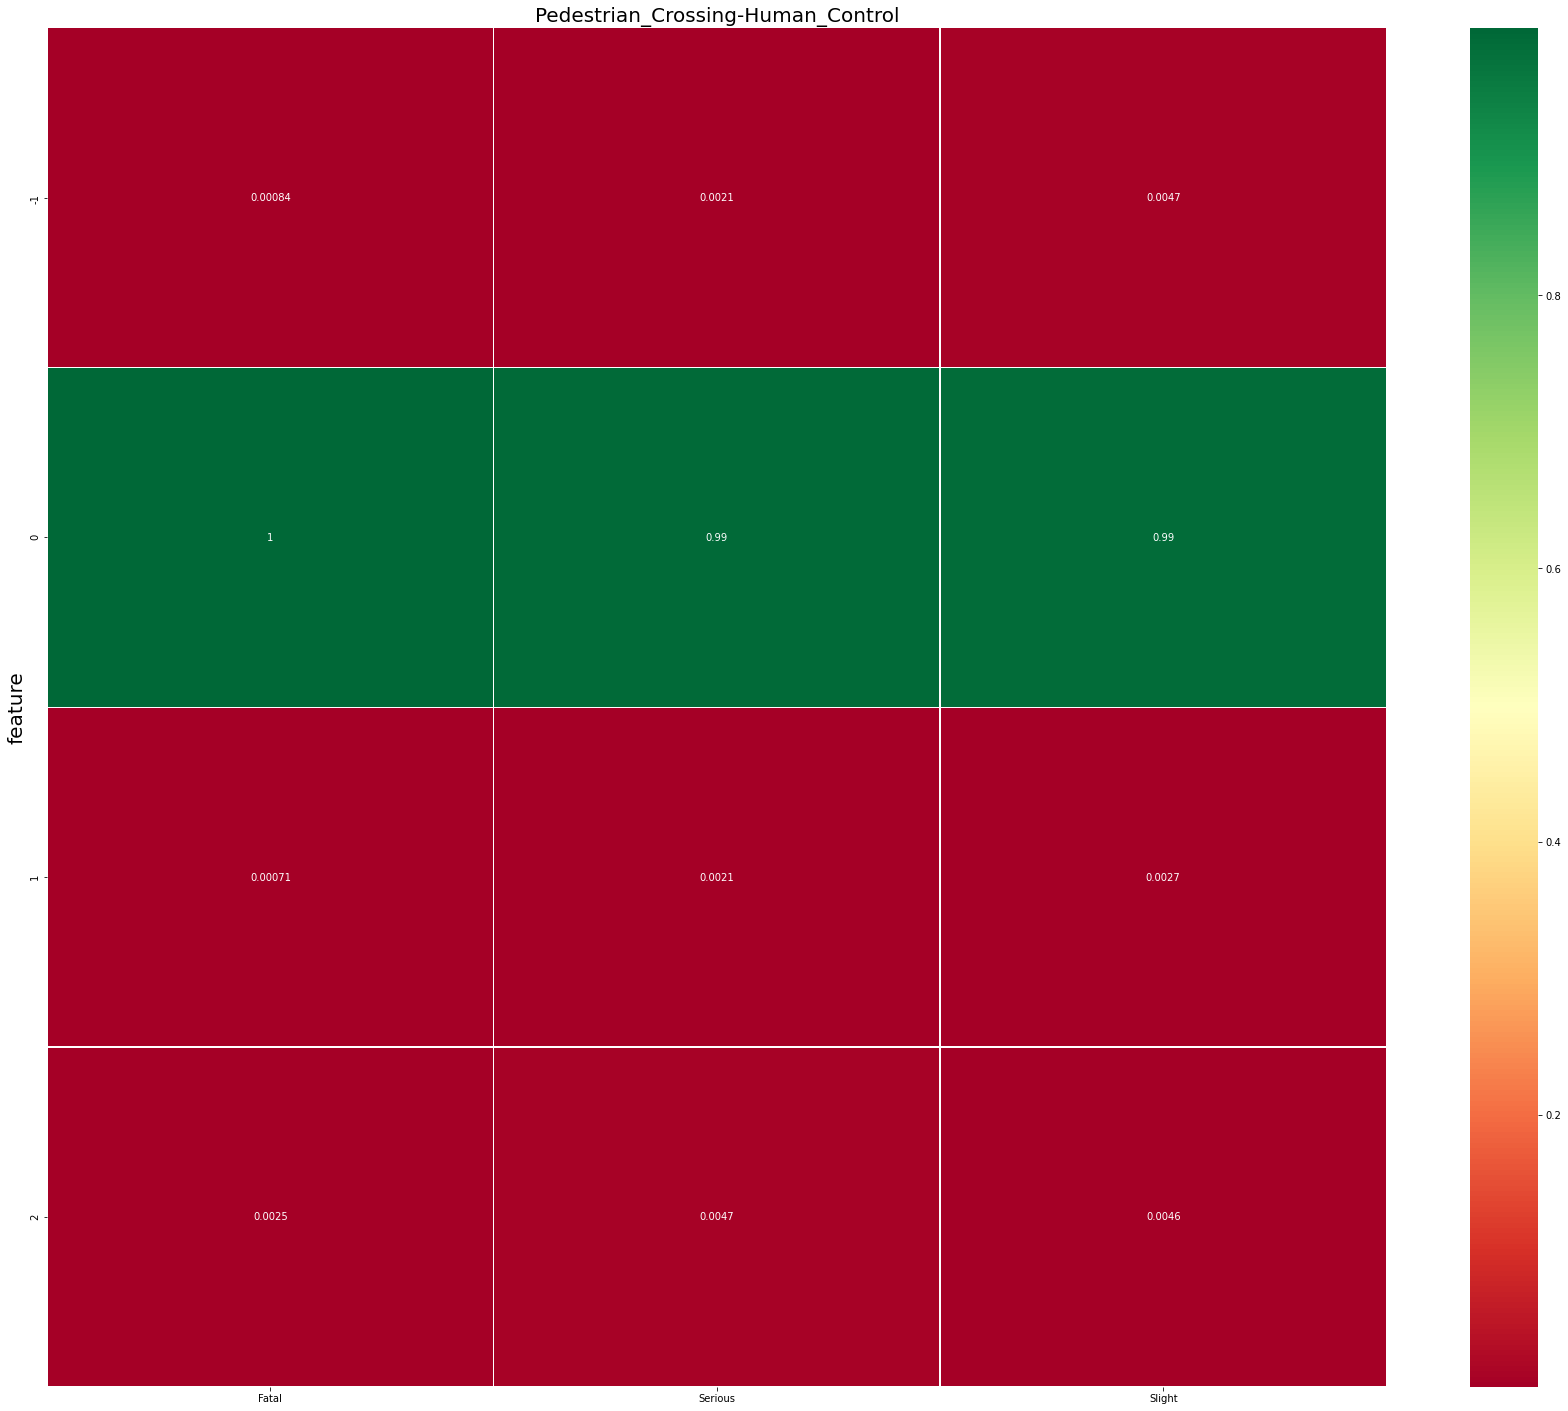

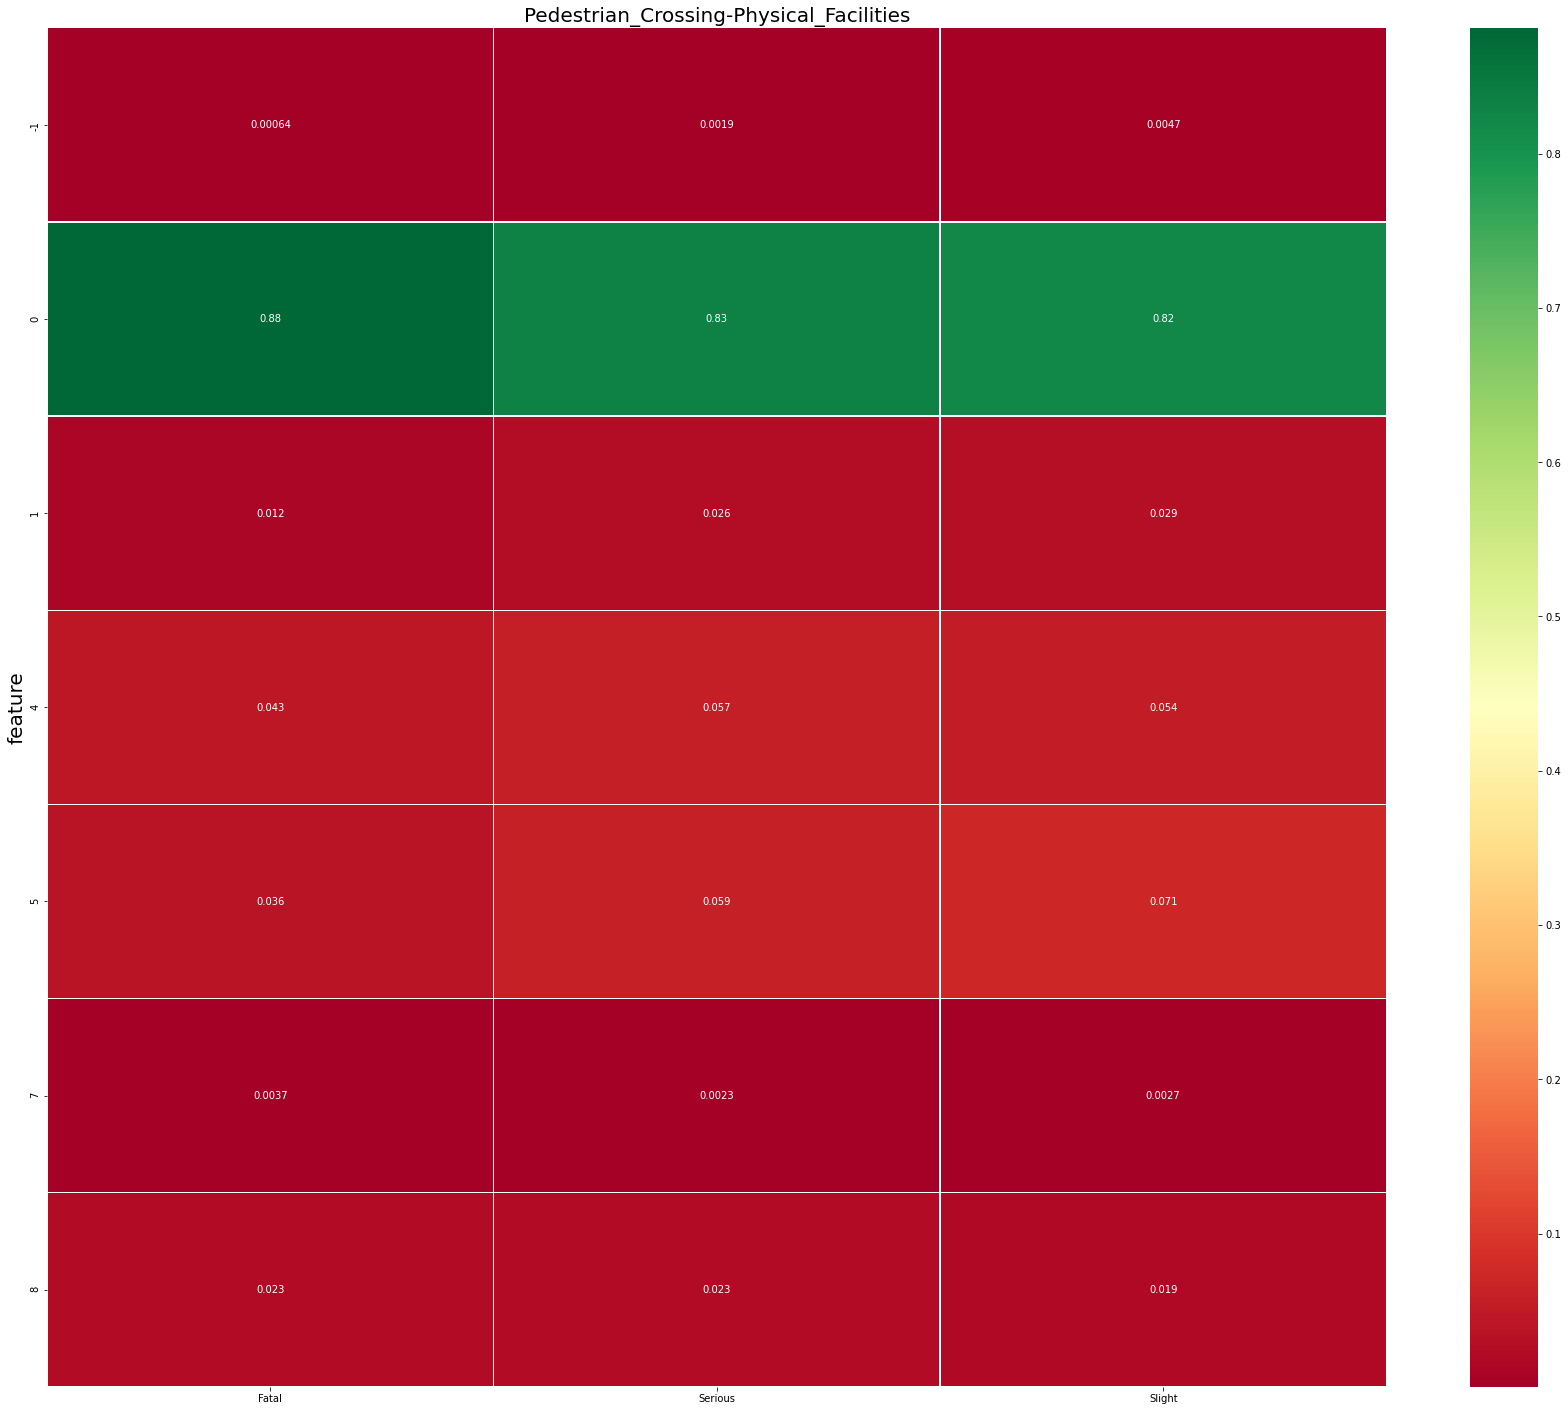

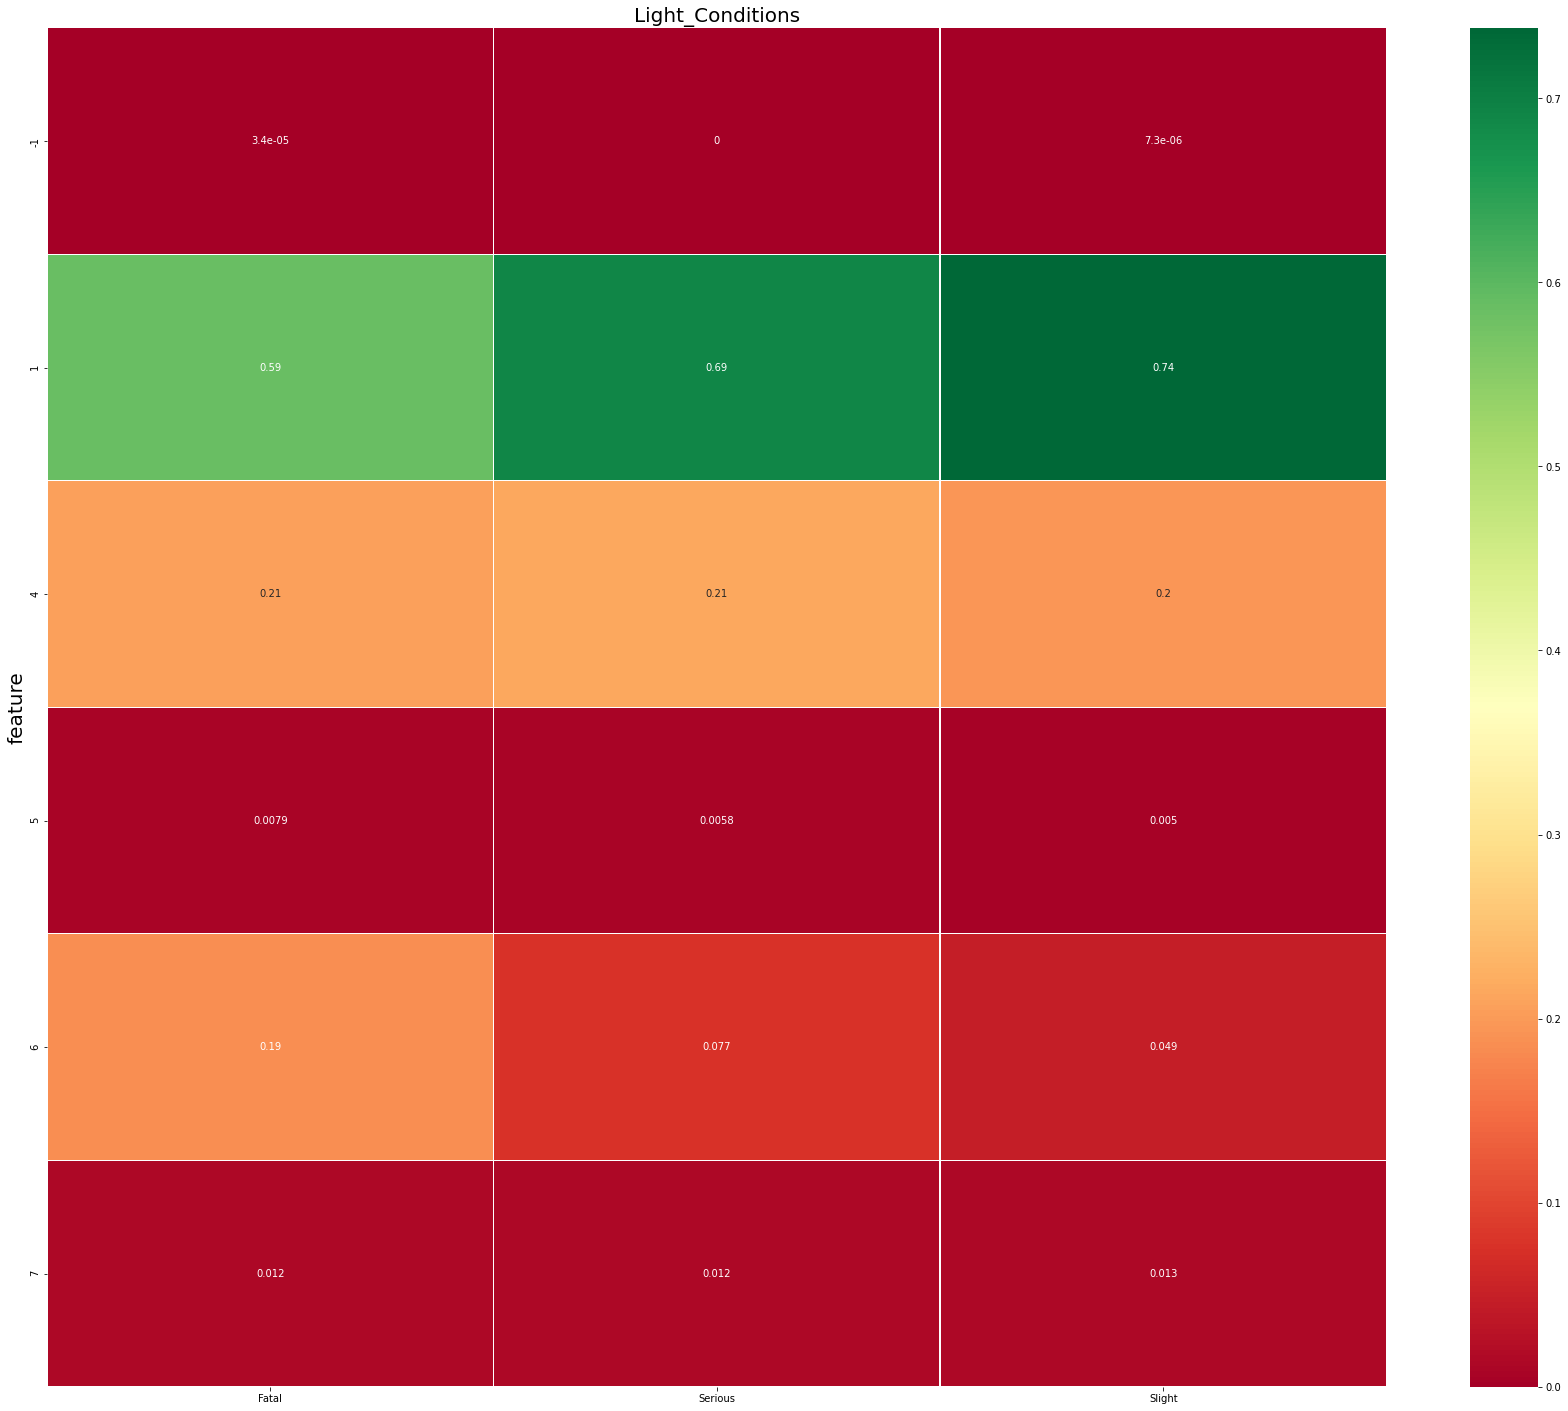

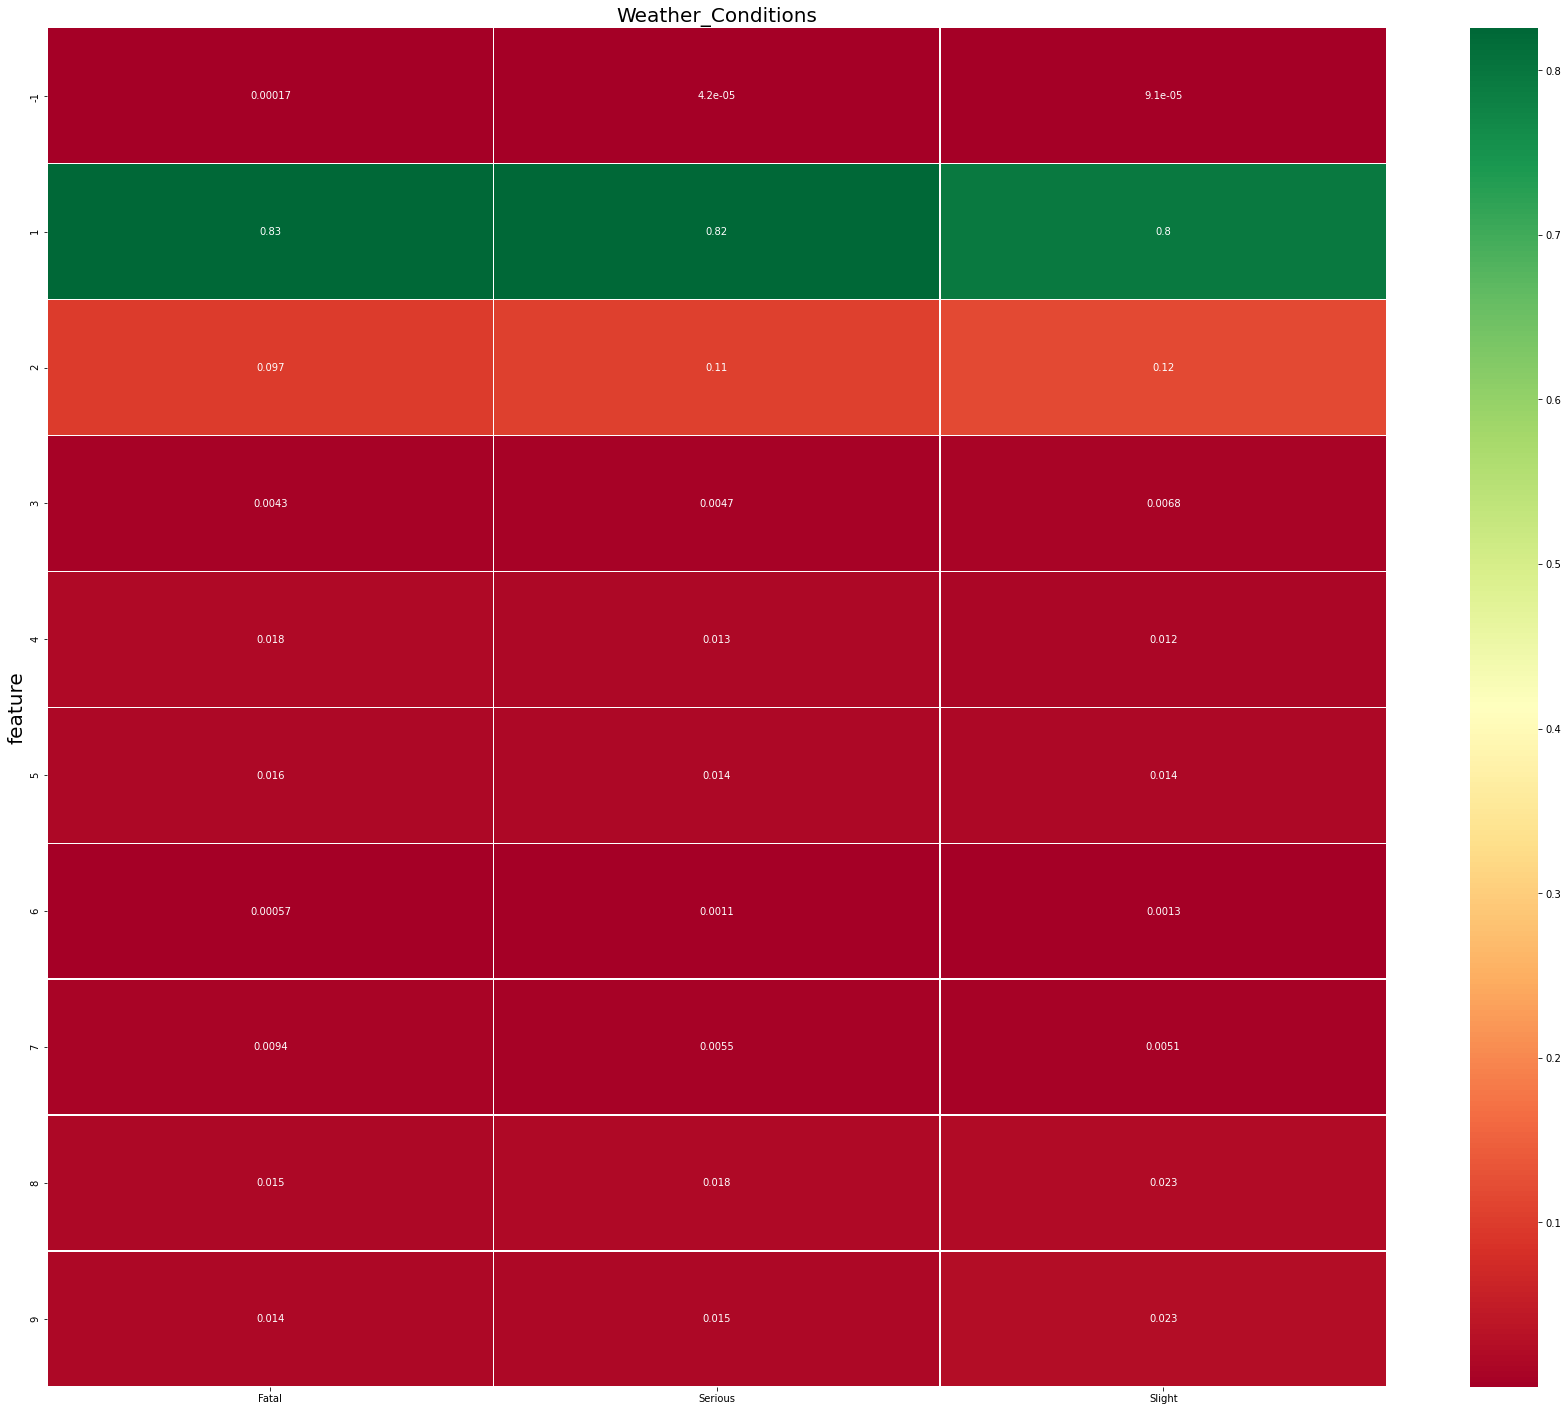

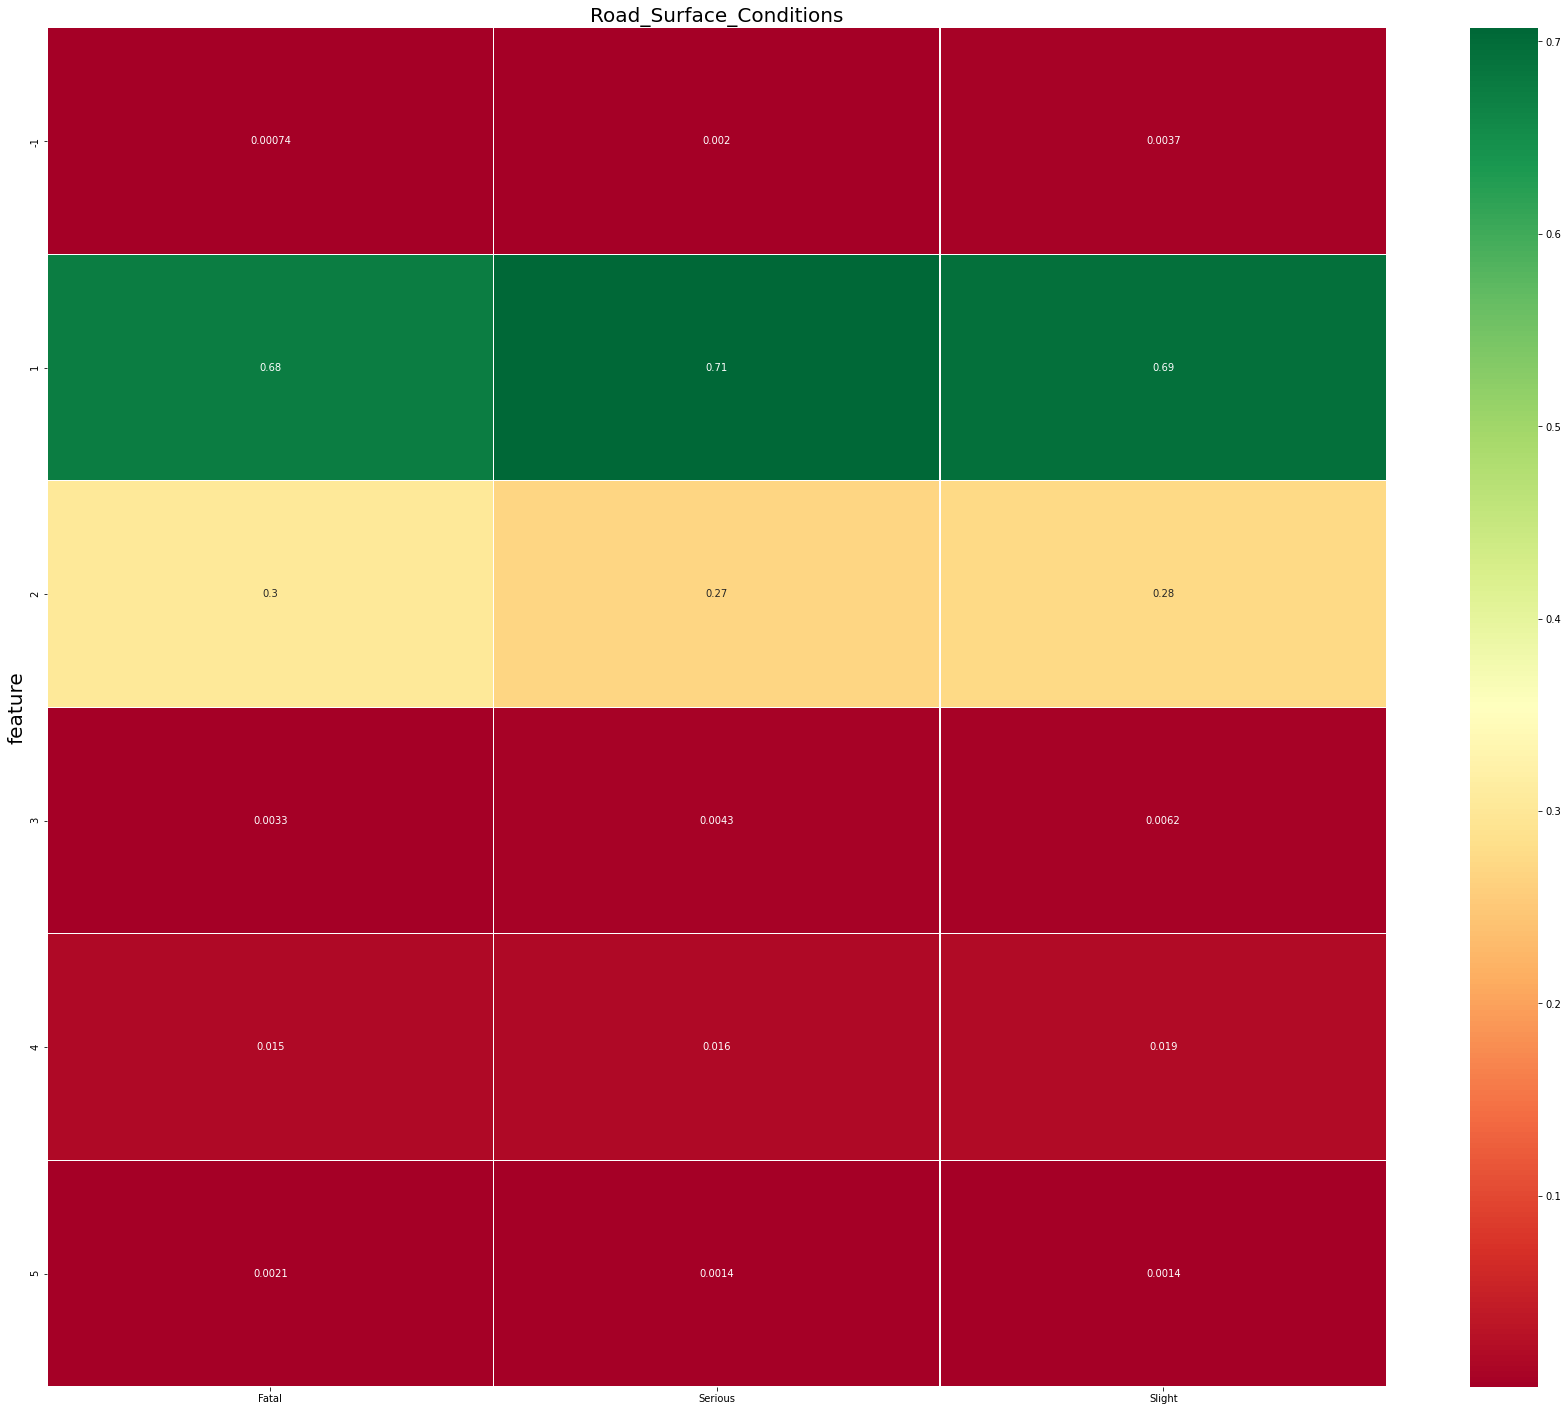

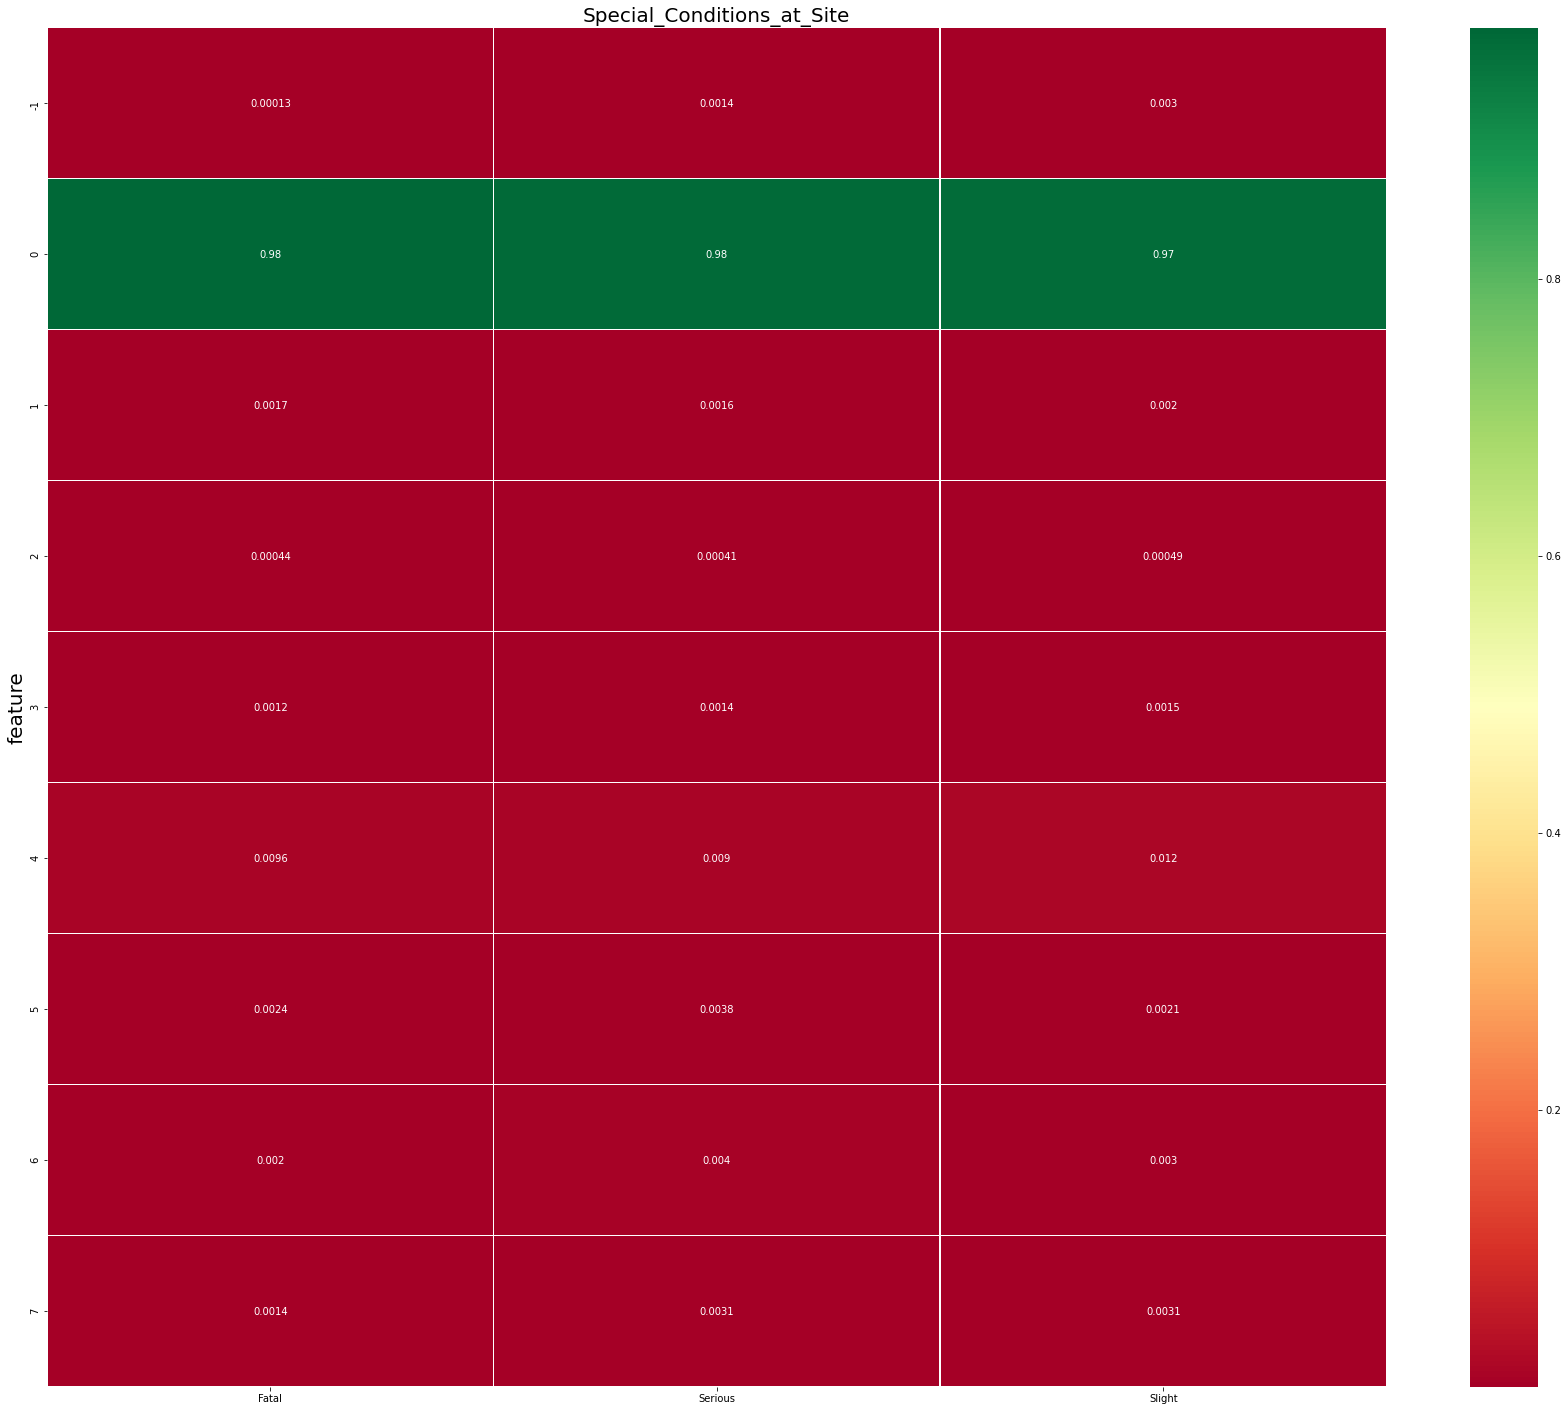

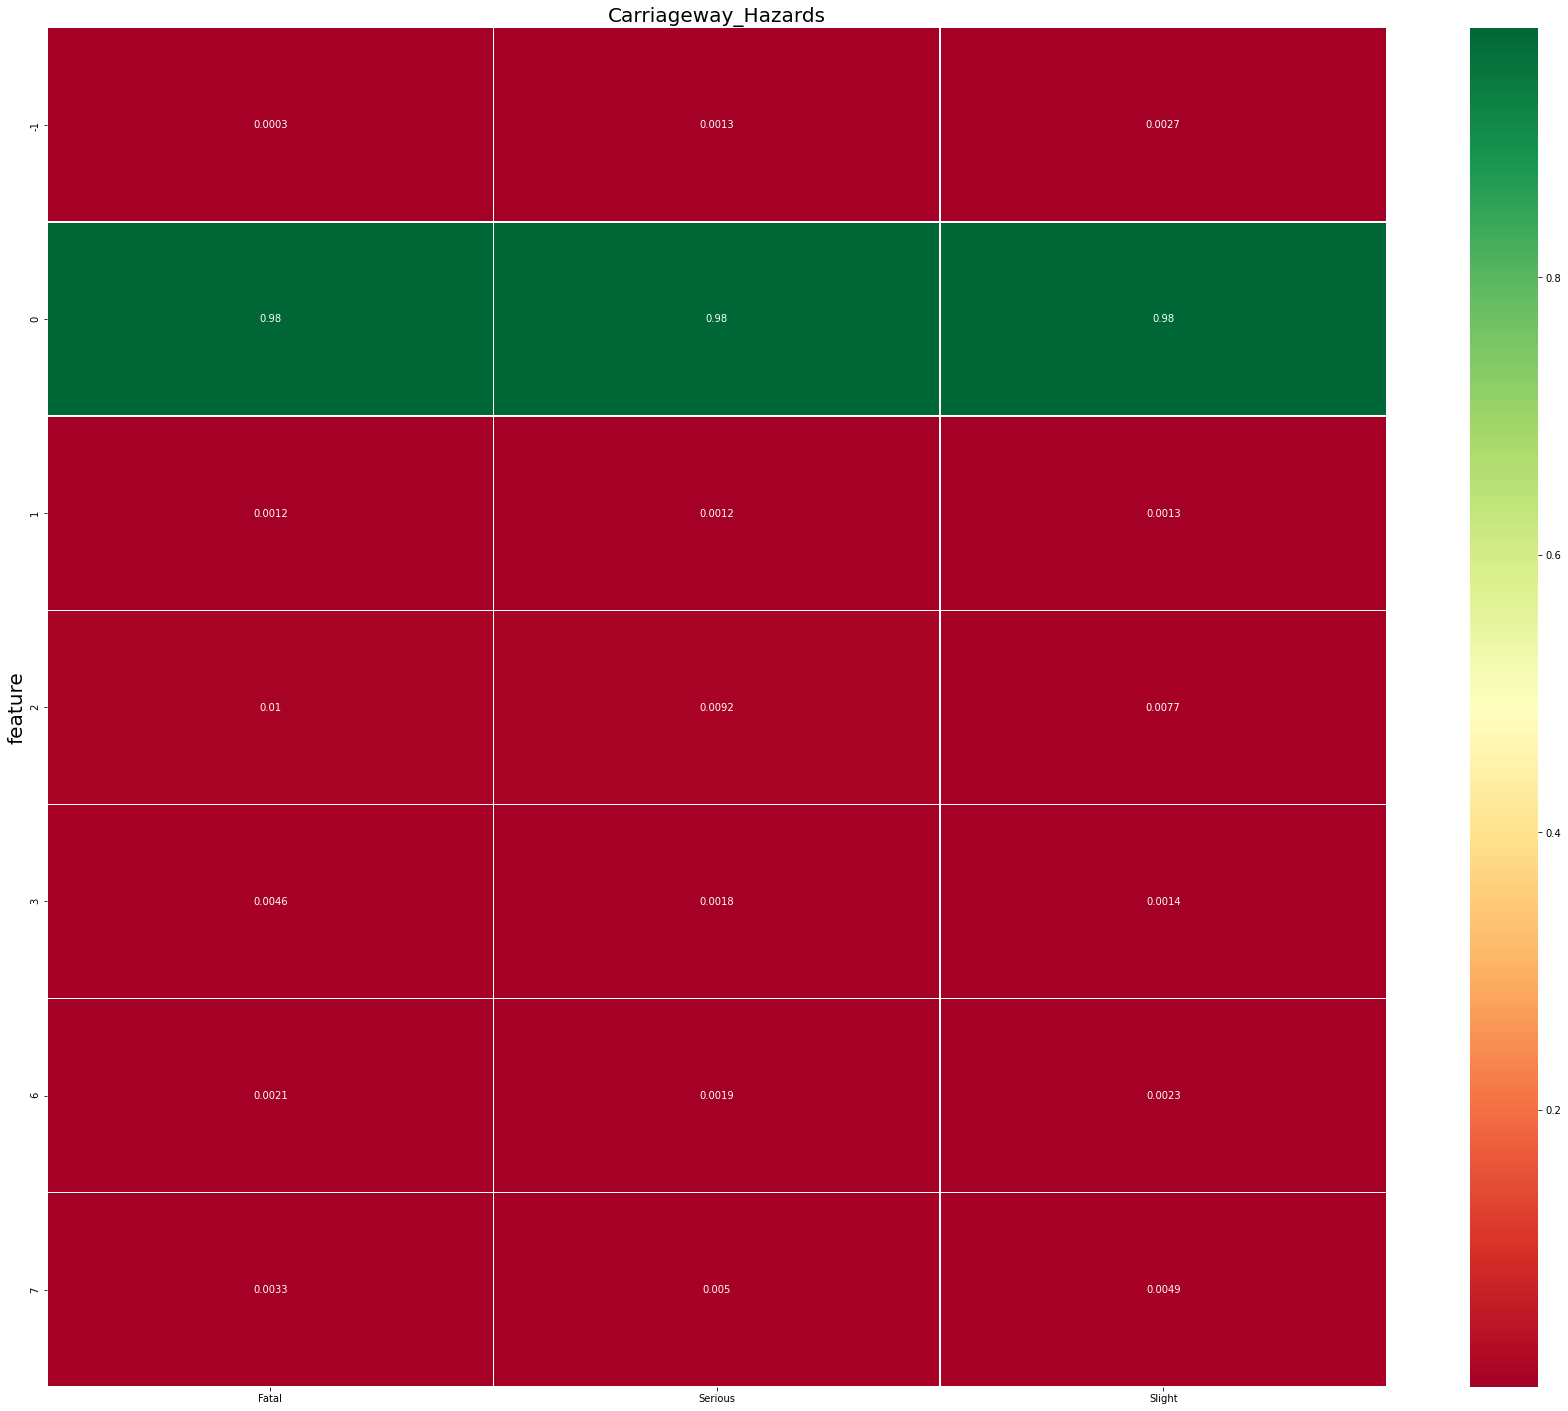

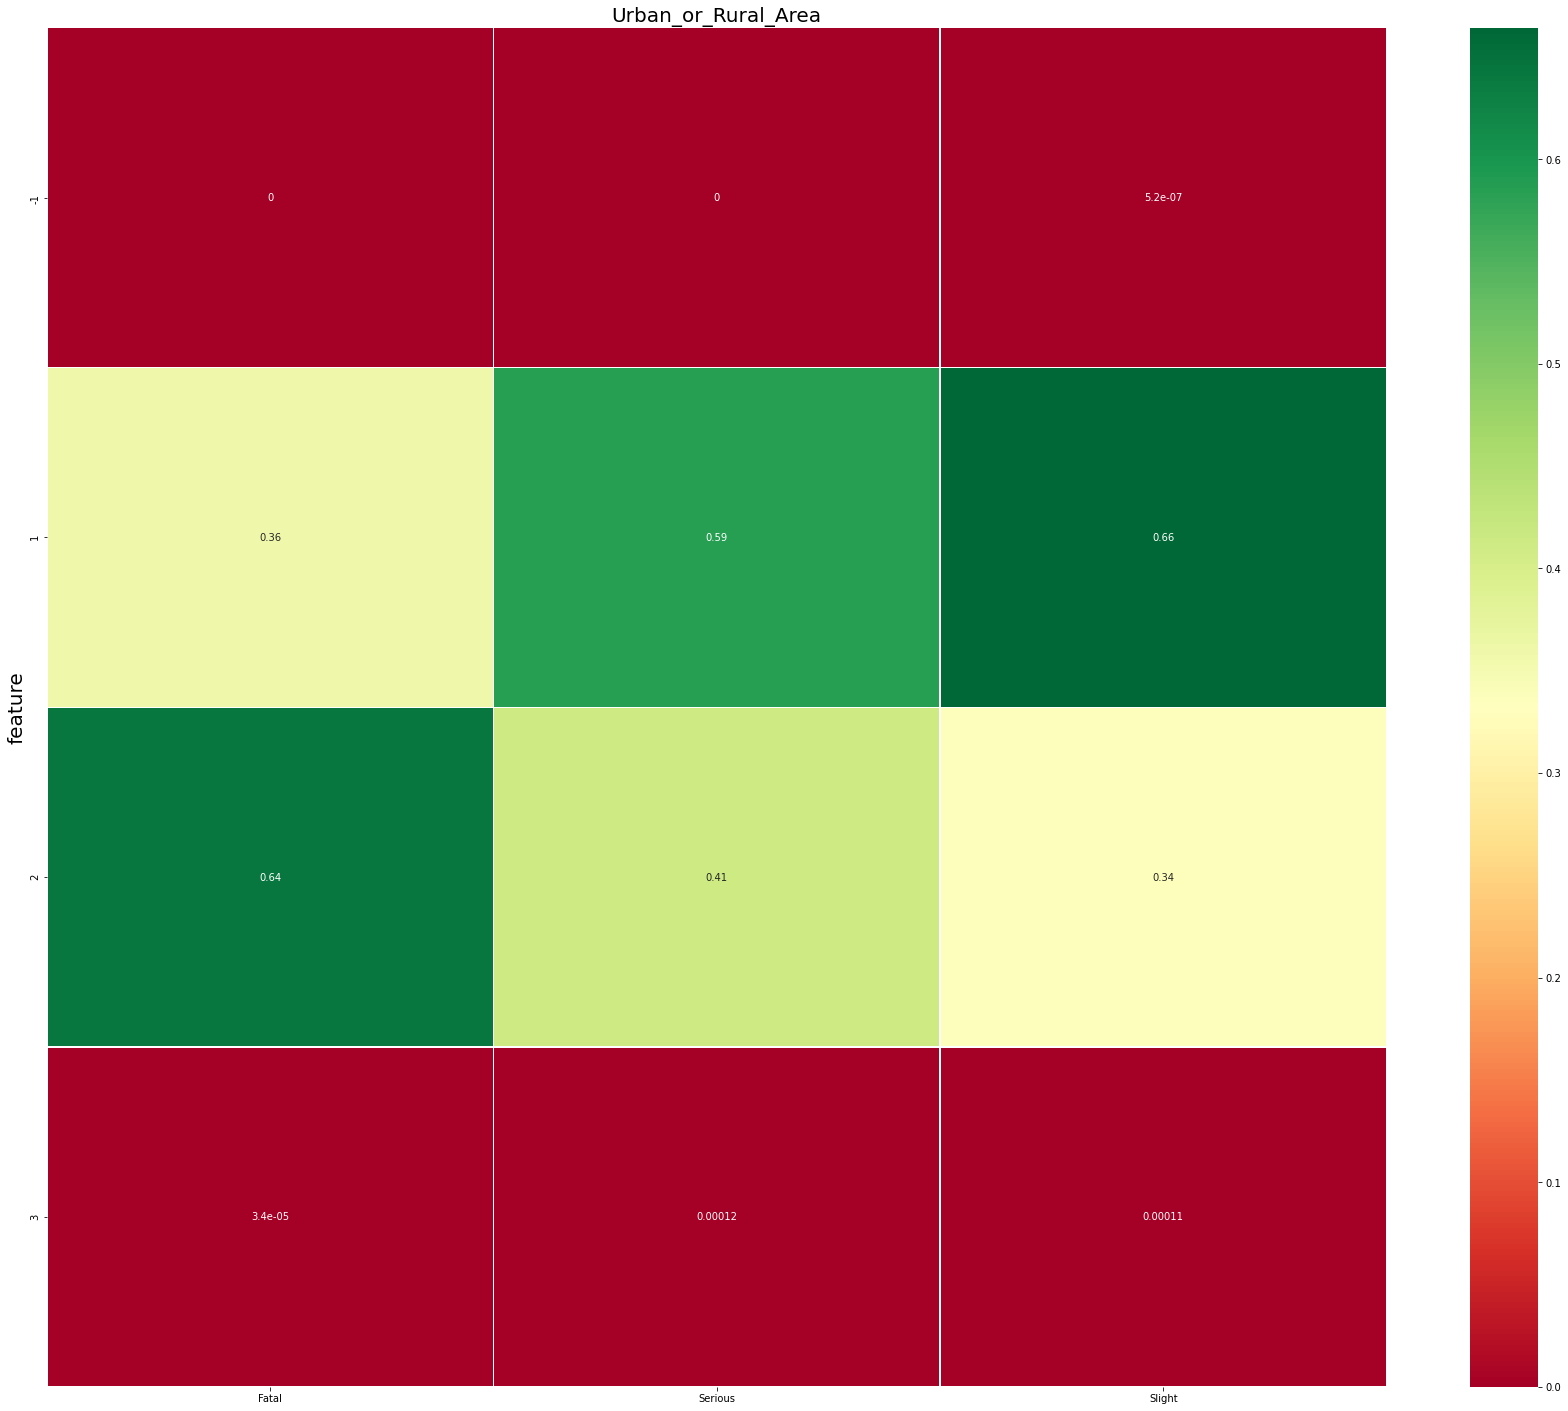

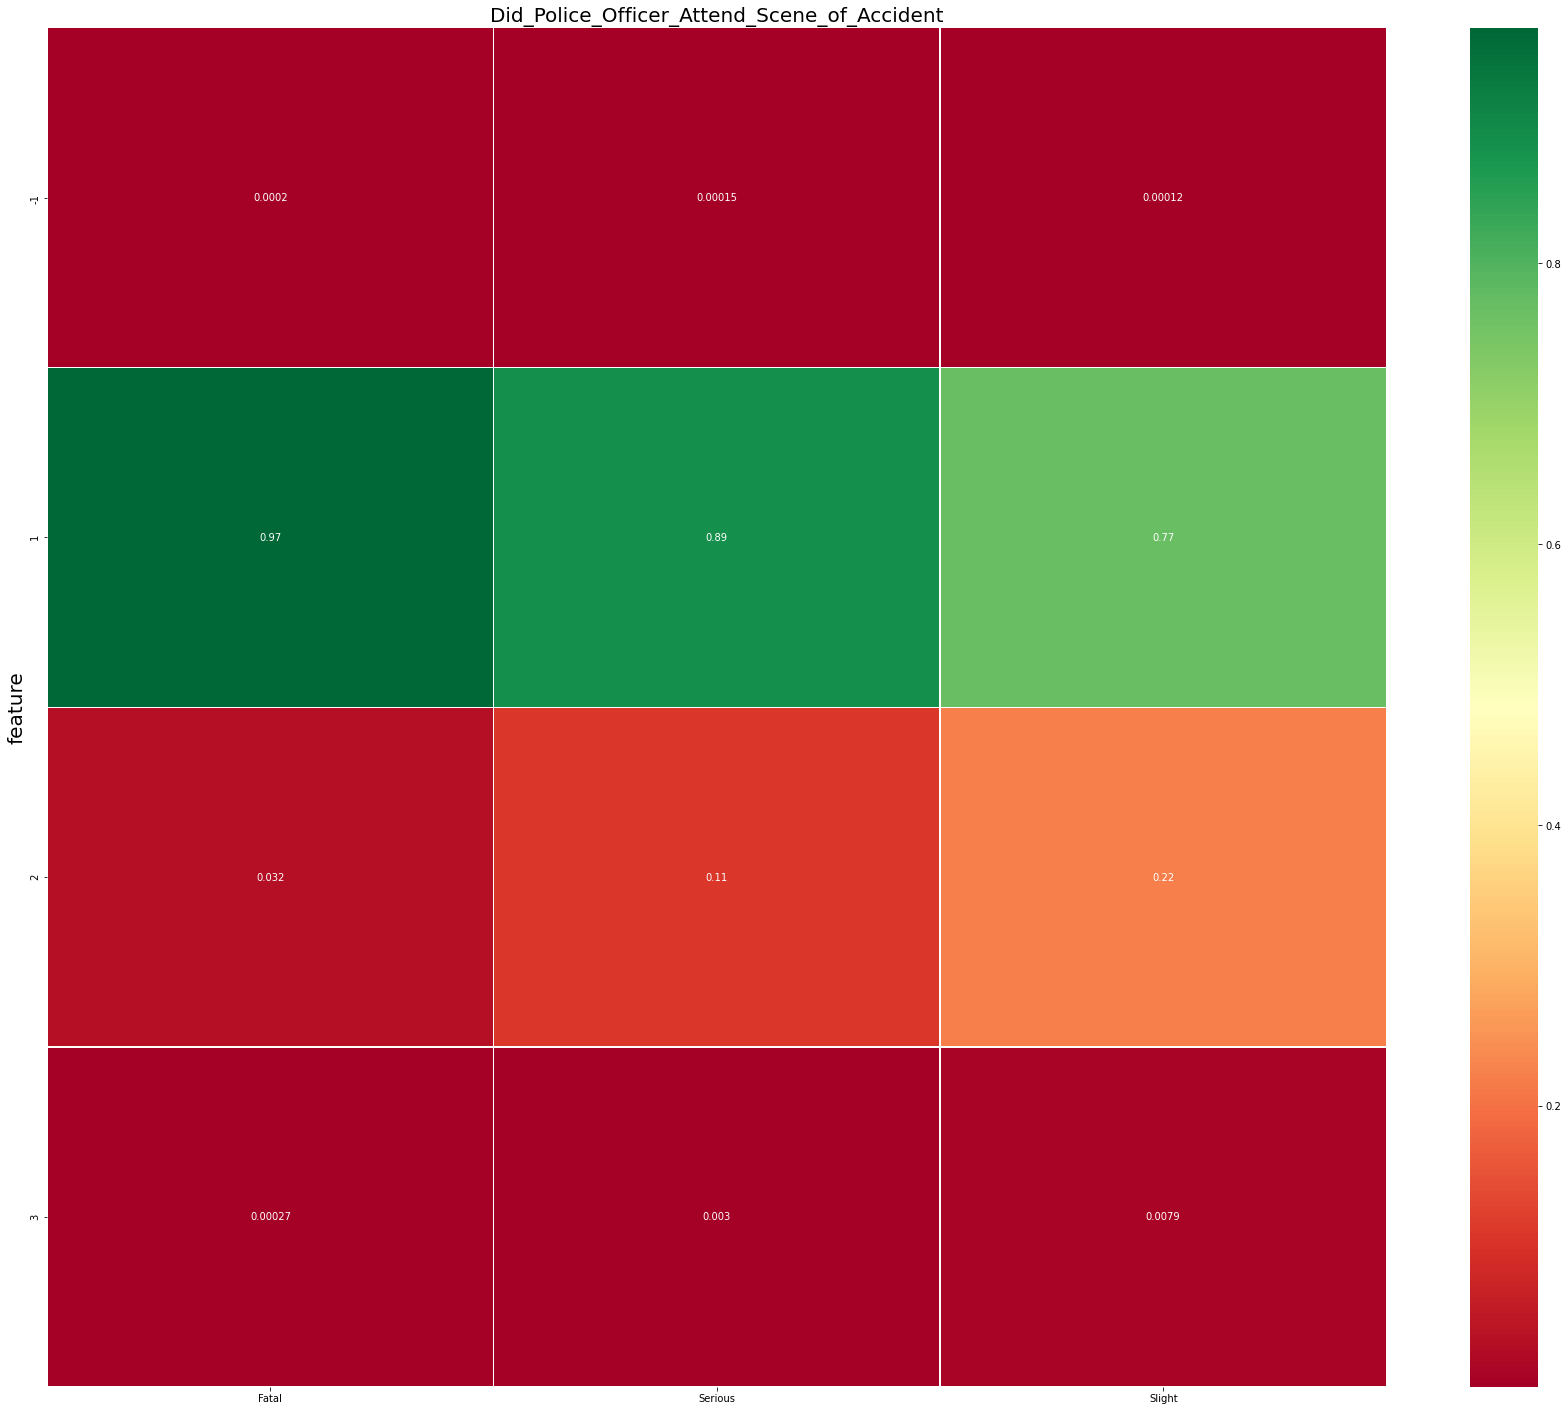

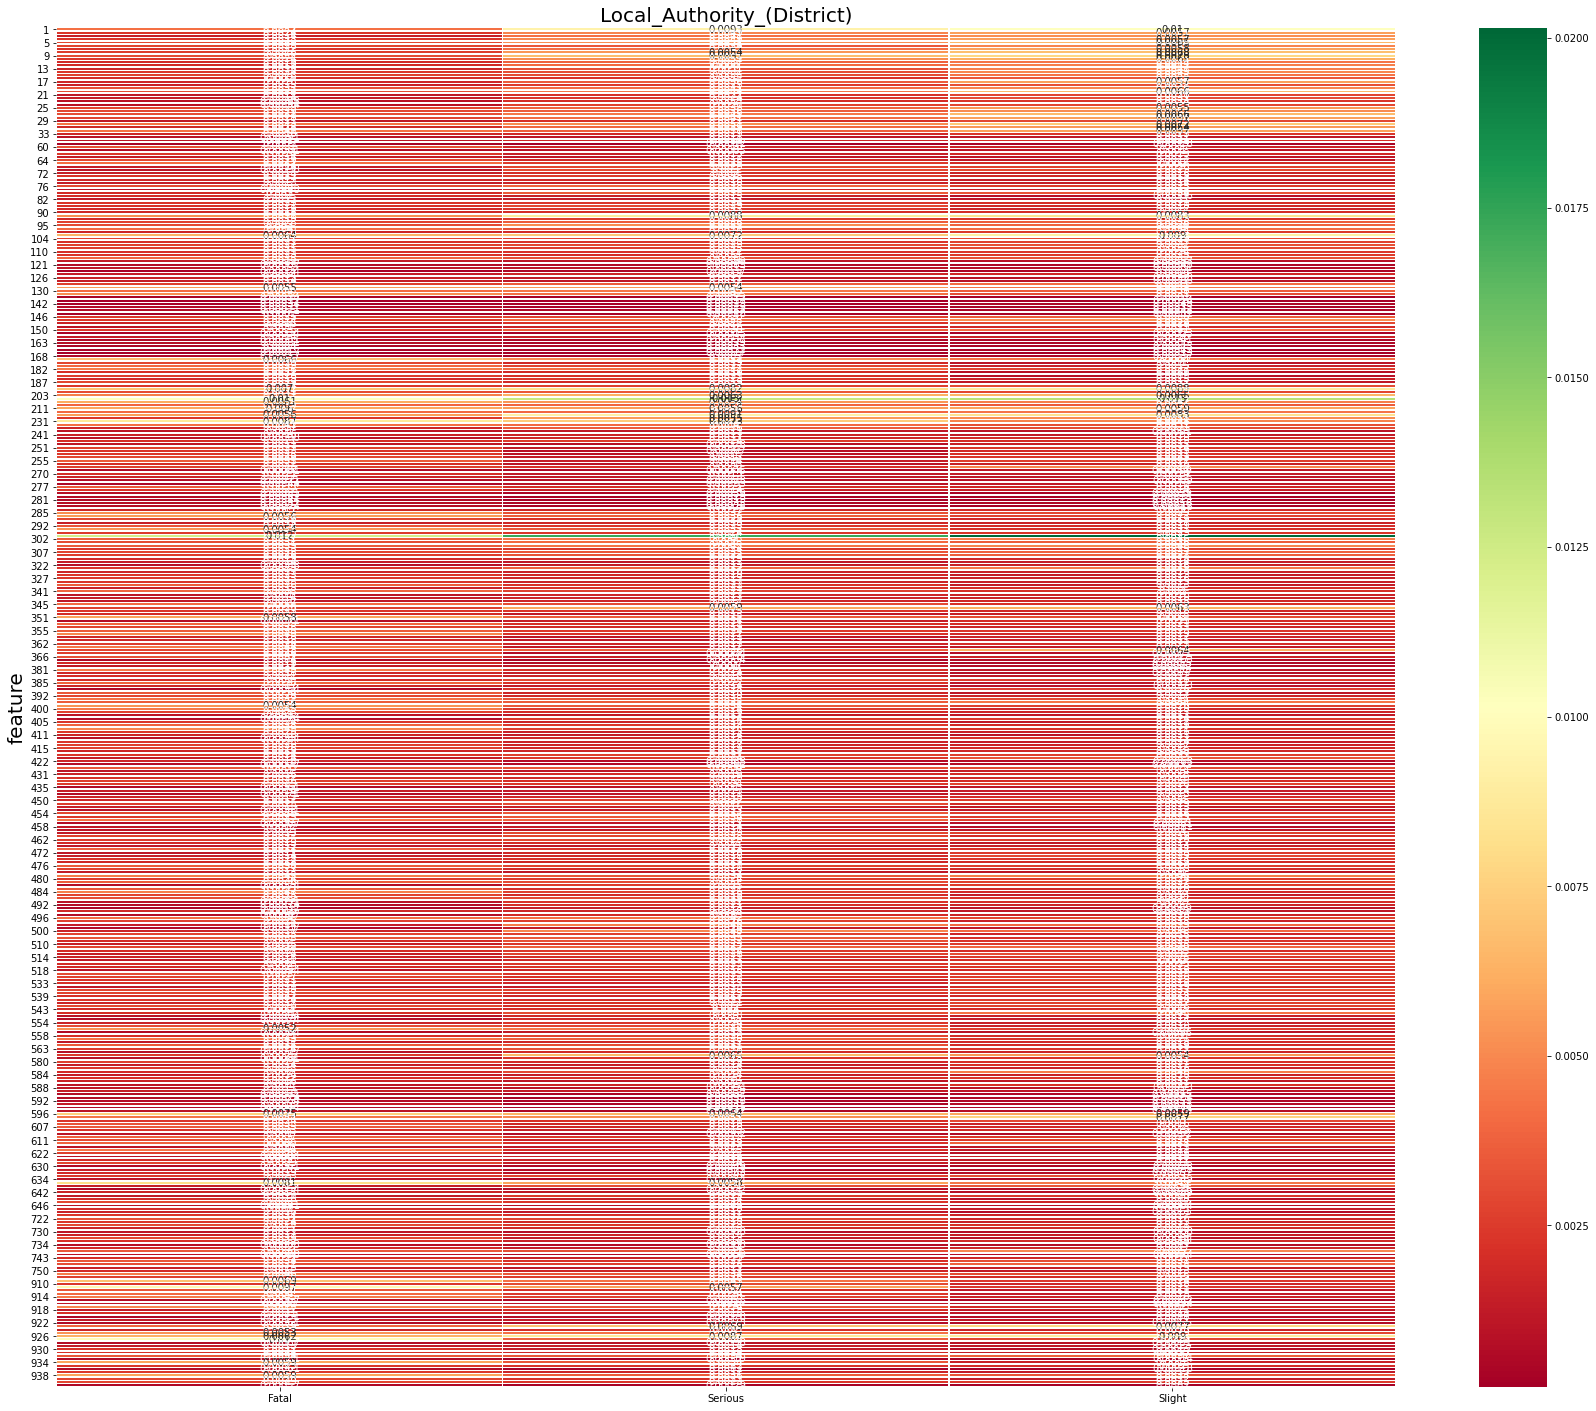

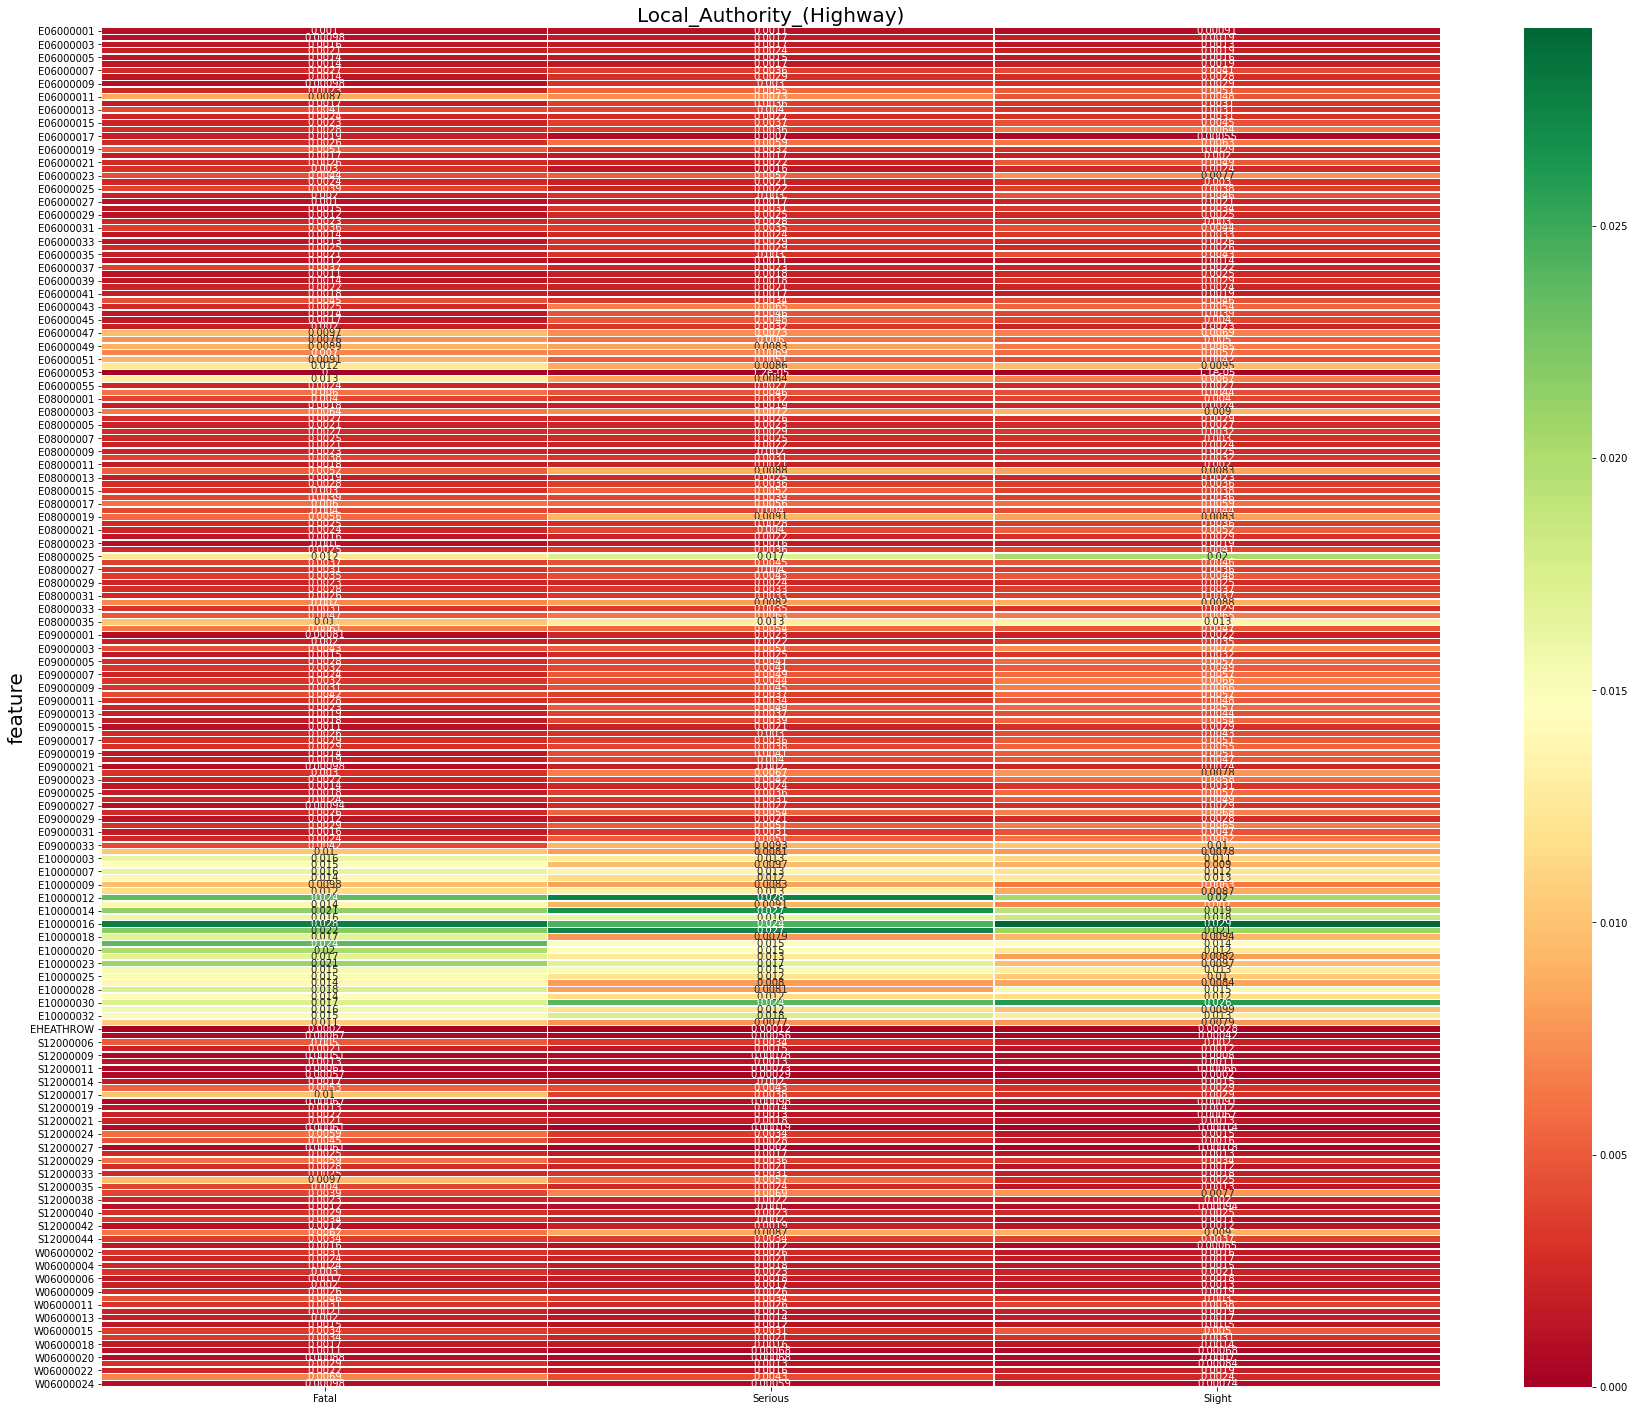

In [35]:
heatmap(accidents_df, accident_columns, label_column)

### Result

Analyze the features from the charts and heatmaps indicated. The irrelavant features to prediction of fatal accidents can be eliminated.
- Polic_Force
- Number_of_Vehicles
- Number_of_Casualties
- Junction_Control
- Pedestrian_Crossing-Human_Control
- Pedestrian_Crossing-Physical_Facilities
- Special_Conditions_at_Site
- Carriageway_Hazards
- Did_Polic_Officer_Attend_Scene_of_Accident

## Vehicle

In [3]:
all_files = glob.glob('data/vehicle/*.csv')

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

vehicles_df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
vehicles_df.describe()

Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
count       4.196486e+06  4.196486e+06             4.196486e+06   
mean        1.557138e+00  9.689745e+00             2.780064e-02   
std         9.047931e-01  8.824819e+00             3.142090e-01   
min         1.000000e+00 -1.000000e+00            -1.000000e+00   
25%         1.000000e+00  9.000000e+00             0.000000e+00   
50%         1.000000e+00  9.000000e+00             0.000000e+00   
75%         2.000000e+00  9.000000e+00             0.000000e+00   
max         9.990000e+02  9.800000e+01             5.000000e+00   

       Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
count       4.196486e+06                      4.196486e+06       4.196486e+06   
mean        1.259203e+01                      1.340865e-01       2.487519e+00   
std         6.256417e+00                      1.021503e+00       3.148580e+00   
min        -1.000000e+00                     -1.000000e+00      -1.000000e+00   
25%         7.000000e+00                      0.000000e+00       0.000000e+00   
50%         1.700000e+01                      0.000000e+00       1.000000e+00   
75%         1.800000e+01                      0.000000e+00       5.000000e+00   
max         1.800000e+01                      9.000000e+00       8.000000e+00   

       Skidding_and_Overturning  Hit_Object_in_Carriageway  \
count              4.196486e+06               4.196486e+06   
mean               2.033675e-01               3.009847e-01   
std                7.397678e-01               1.607711e+00   
min               -1.000000e+00              -1.000000e+00   
25%                0.000000e+00               0.000000e+00   
50%                0.000000e+00               0.000000e+00   
75%                0.000000e+00               0.000000e+00   
max                5.000000e+00               1.200000e+01   

       Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  ...  \
count                 4.196486e+06                4.196486e+06  ...   
mean                  3.528707e-01                5.293319e-01  ...   
std                   1.369138e+00                2.054098e+00  ...   
min                  -1.000000e+00               -1.000000e+00  ...   
25%                   0.000000e+00                0.000000e+00  ...   
50%                   0.000000e+00                0.000000e+00  ...   
75%                   0.000000e+00                0.000000e+00  ...   
max                   8.000000e+00                1.100000e+01  ...   

       Journey_Purpose_of_Driver  Sex_of_Driver  Age_of_Driver  \
count               4.196486e+06   4.196486e+06   4.196486e+06   
mean                7.575176e+00   1.411490e+00   3.463872e+01   
std                 5.488610e+00   6.105709e-01   1.974345e+01   
min                -1.000000e+00  -1.000000e+00  -1.000000e+00   
25%                 2.000000e+00   1.000000e+00   2.200000e+01   
50%                 6.000000e+00   1.000000e+00   3.400000e+01   
75%                 1.500000e+01   2.000000e+00   4.800000e+01   
max                 1.500000e+01   3.000000e+00   1.020000e+02   

       Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
count        4.196486e+06          4.196486e+06     4.196486e+06   
mean         5.875080e+00          1.412514e+03     8.063177e-01   
std          2.971248e+00          1.675001e+03     1.237553e+00   
min         -1.000000e+00         -1.000000e+00    -1.000000e+00   
25%          5.000000e+00         -1.000000e+00    -1.000000e+00   
50%          6.000000e+00          1.389000e+03     1.000000e+00   
75%          8.000000e+00          1.896000e+03     2.000000e+00   
max          1.100000e+01          9.999900e+04     1.200000e+01   

       Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
count    4.196486e+06       4.196486e+06           4.196486e+06   
mean     5.048865e+00       3.263353e+00           8.664735e-01   
std      5.549053e+00       3.756890e+00           1.114936e+00  

In [4]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196486 entries, 0 to 4196485
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Vehicle_Reference                 int64  
 2   Vehicle_Type                      int64  
 3   Towing_and_Articulation           int64  
 4   Vehicle_Manoeuvre                 int64  
 5   Vehicle_Location-Restricted_Lane  int64  
 6   Junction_Location                 int64  
 7   Skidding_and_Overturning          int64  
 8   Hit_Object_in_Carriageway         int64  
 9   Vehicle_Leaving_Carriageway       int64  
 10  Hit_Object_off_Carriageway        int64  
 11  1st_Point_of_Impact               int64  
 12  Was_Vehicle_Left_Hand_Drive?      int64  
 13  Journey_Purpose_of_Driver         int64  
 14  Sex_of_Driver                     int64  
 15  Age_of_Driver                     int64  
 16  Age_Band_of_Driver                in

In [5]:
vehicles_df[vehicles_df == -1].count()

Accident_Index                            0
Vehicle_Reference                         0
Vehicle_Type                           1750
Towing_and_Articulation               14470
Vehicle_Manoeuvre                     29693
Vehicle_Location-Restricted_Lane      28057
Junction_Location                     30873
Skidding_and_Overturning              30023
Hit_Object_in_Carriageway             29787
Vehicle_Leaving_Carriageway           28903
Hit_Object_off_Carriageway            26163
1st_Point_of_Impact                   17931
Was_Vehicle_Left_Hand_Drive?          51908
Journey_Purpose_of_Driver             45050
Sex_of_Driver                           100
Age_of_Driver                        476400
Age_Band_of_Driver                   476400
Engine_Capacity_(CC)                1079663
Propulsion_Code                     1058726
Age_of_Vehicle                      1207692
Driver_IMD_Decile                   1360448
Driver_Home_Area_Type                840031
Vehicle_IMD_Decile              

In [6]:
vehicles_df.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [9]:
vehicle_columns = [
    'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'
]

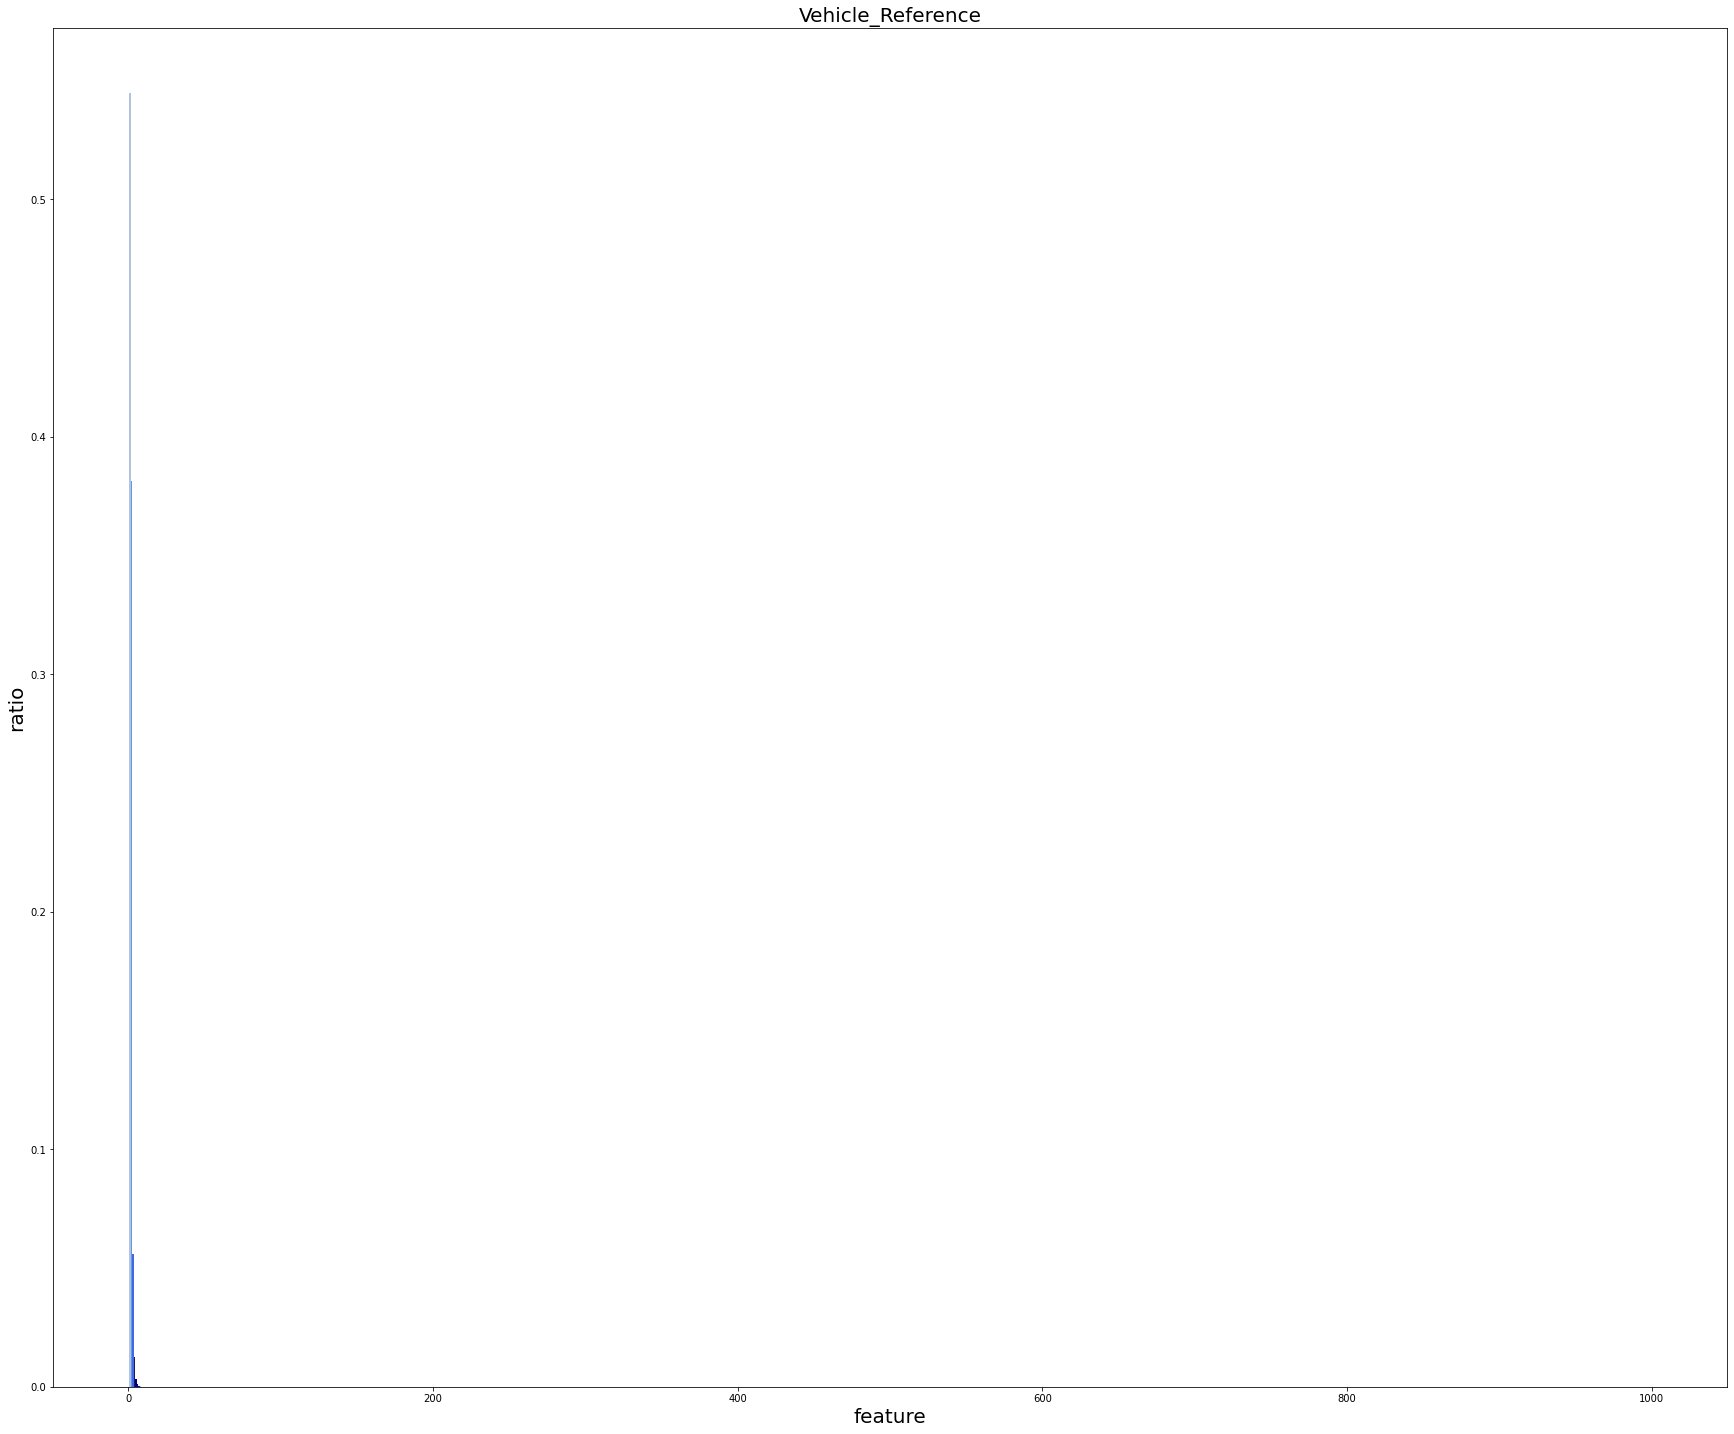

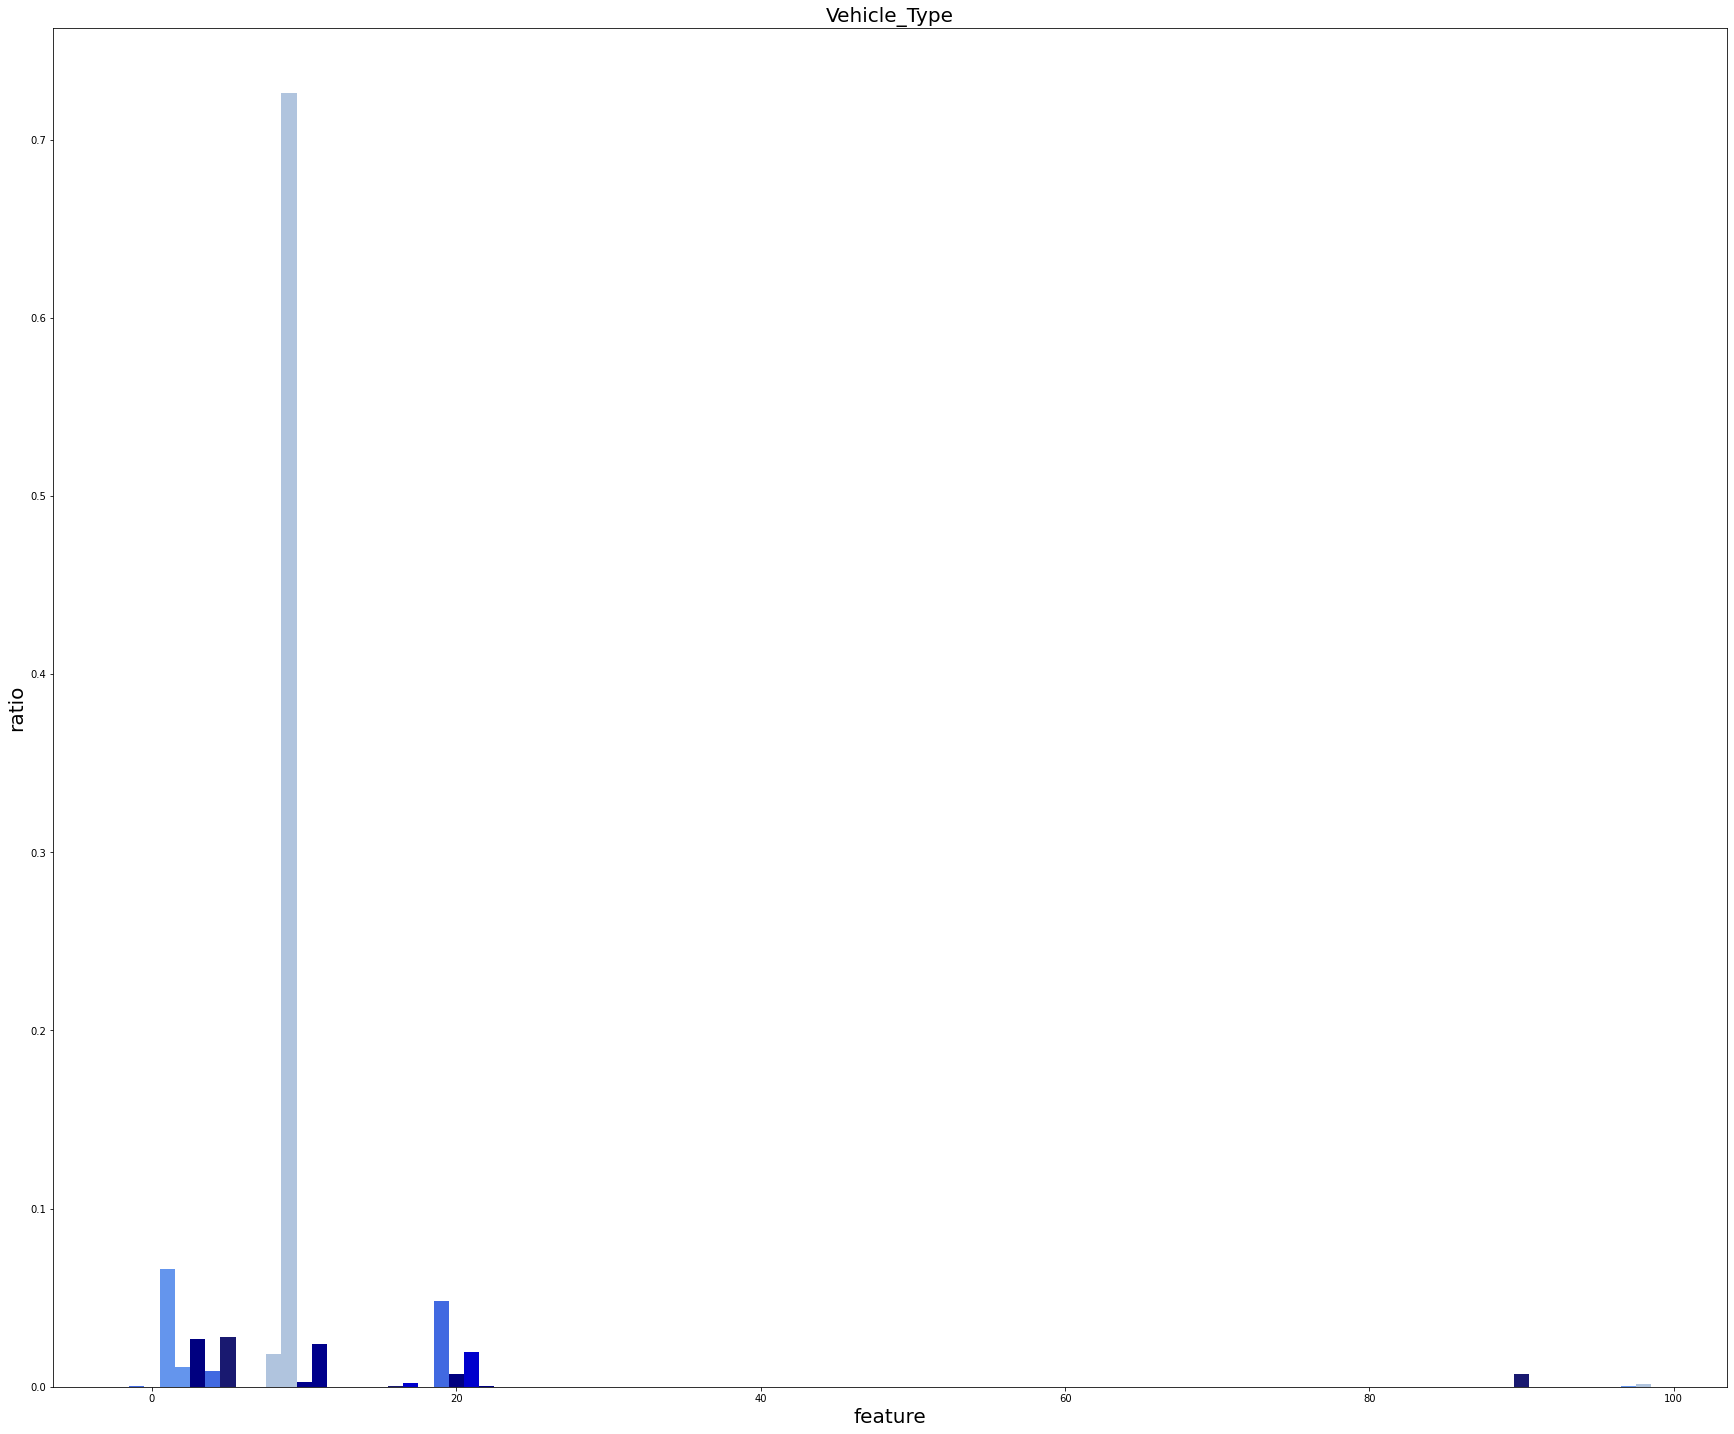

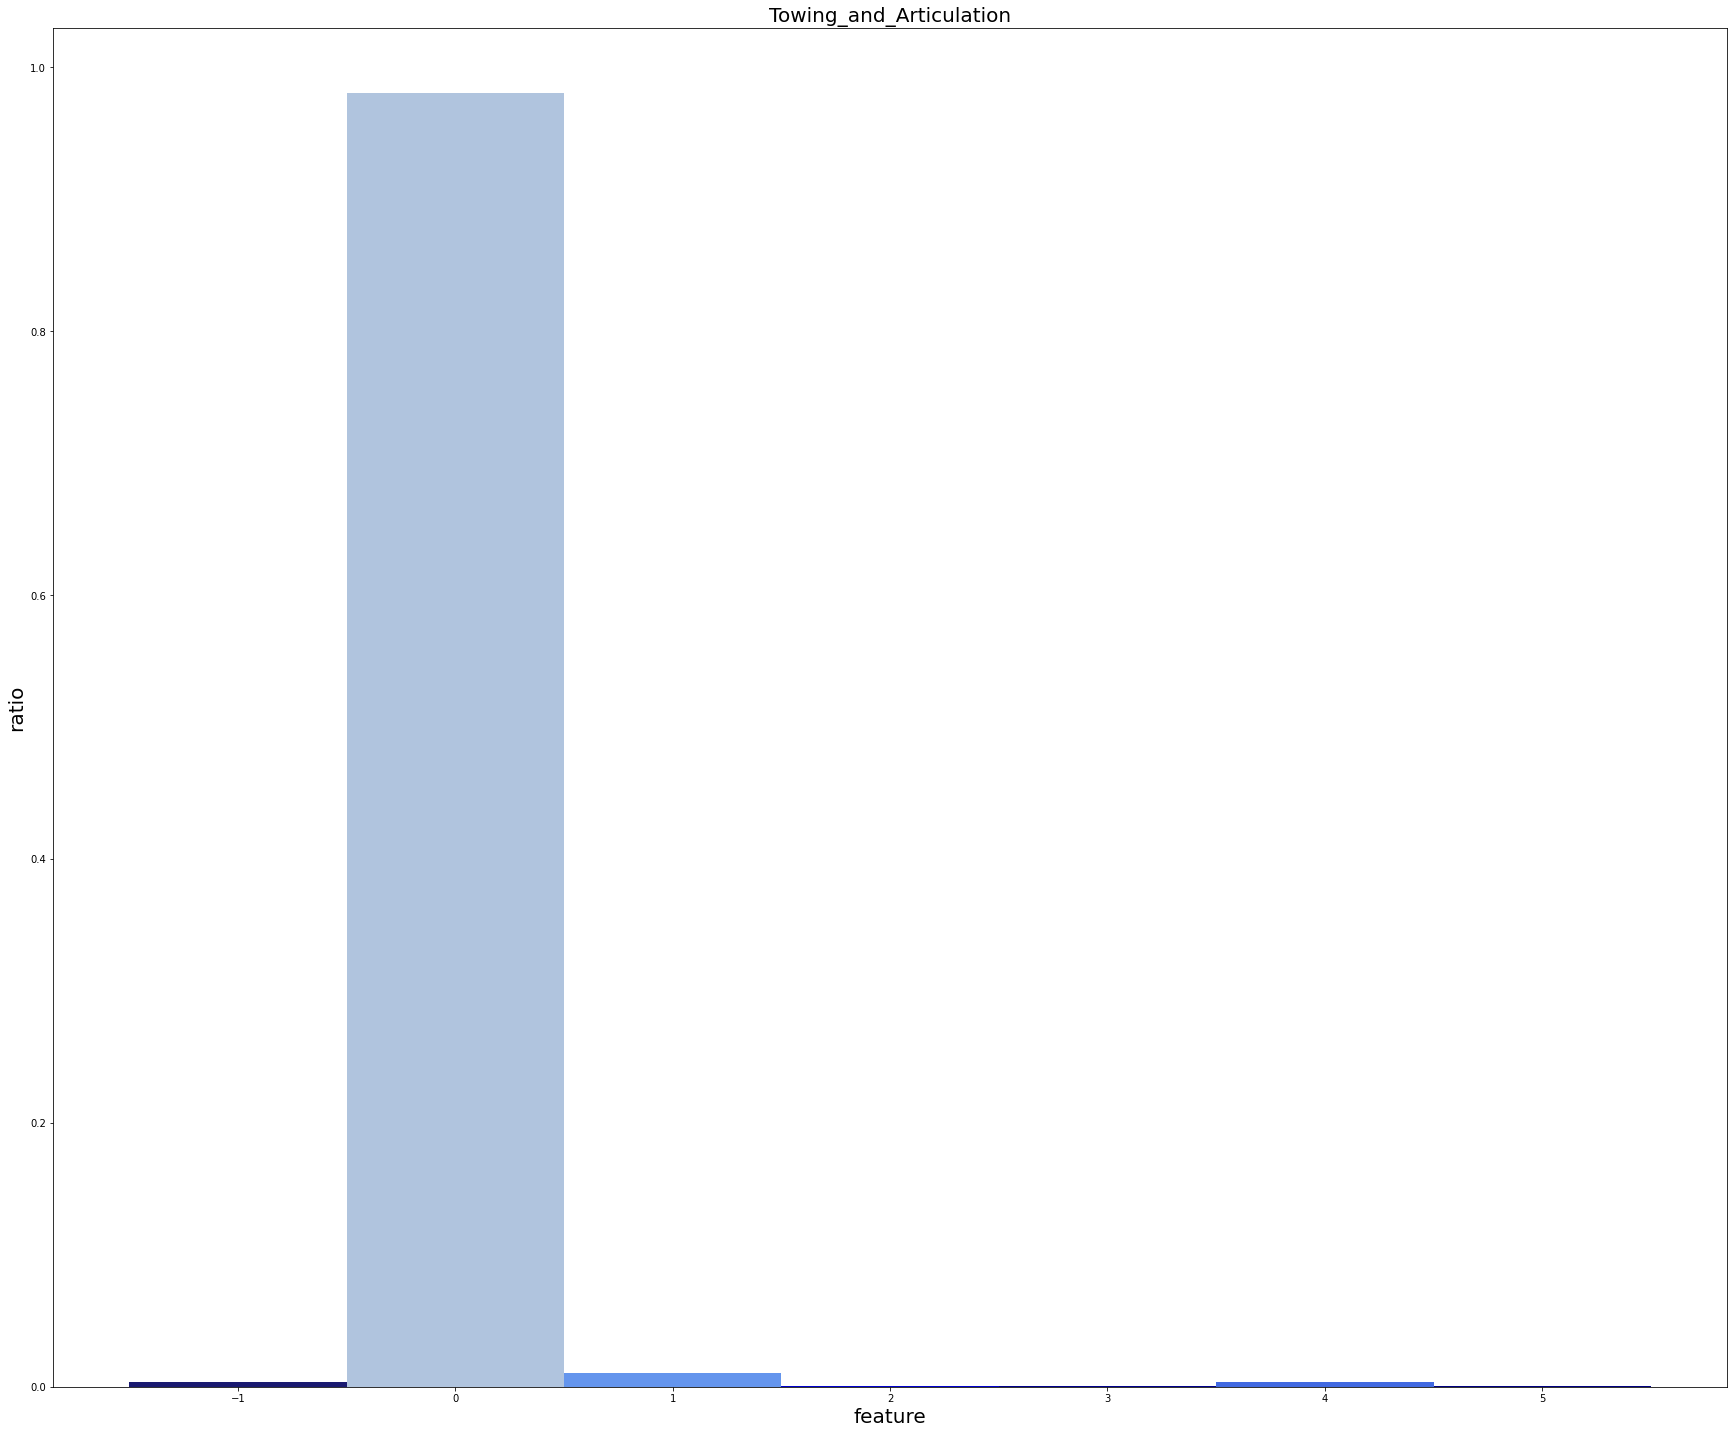

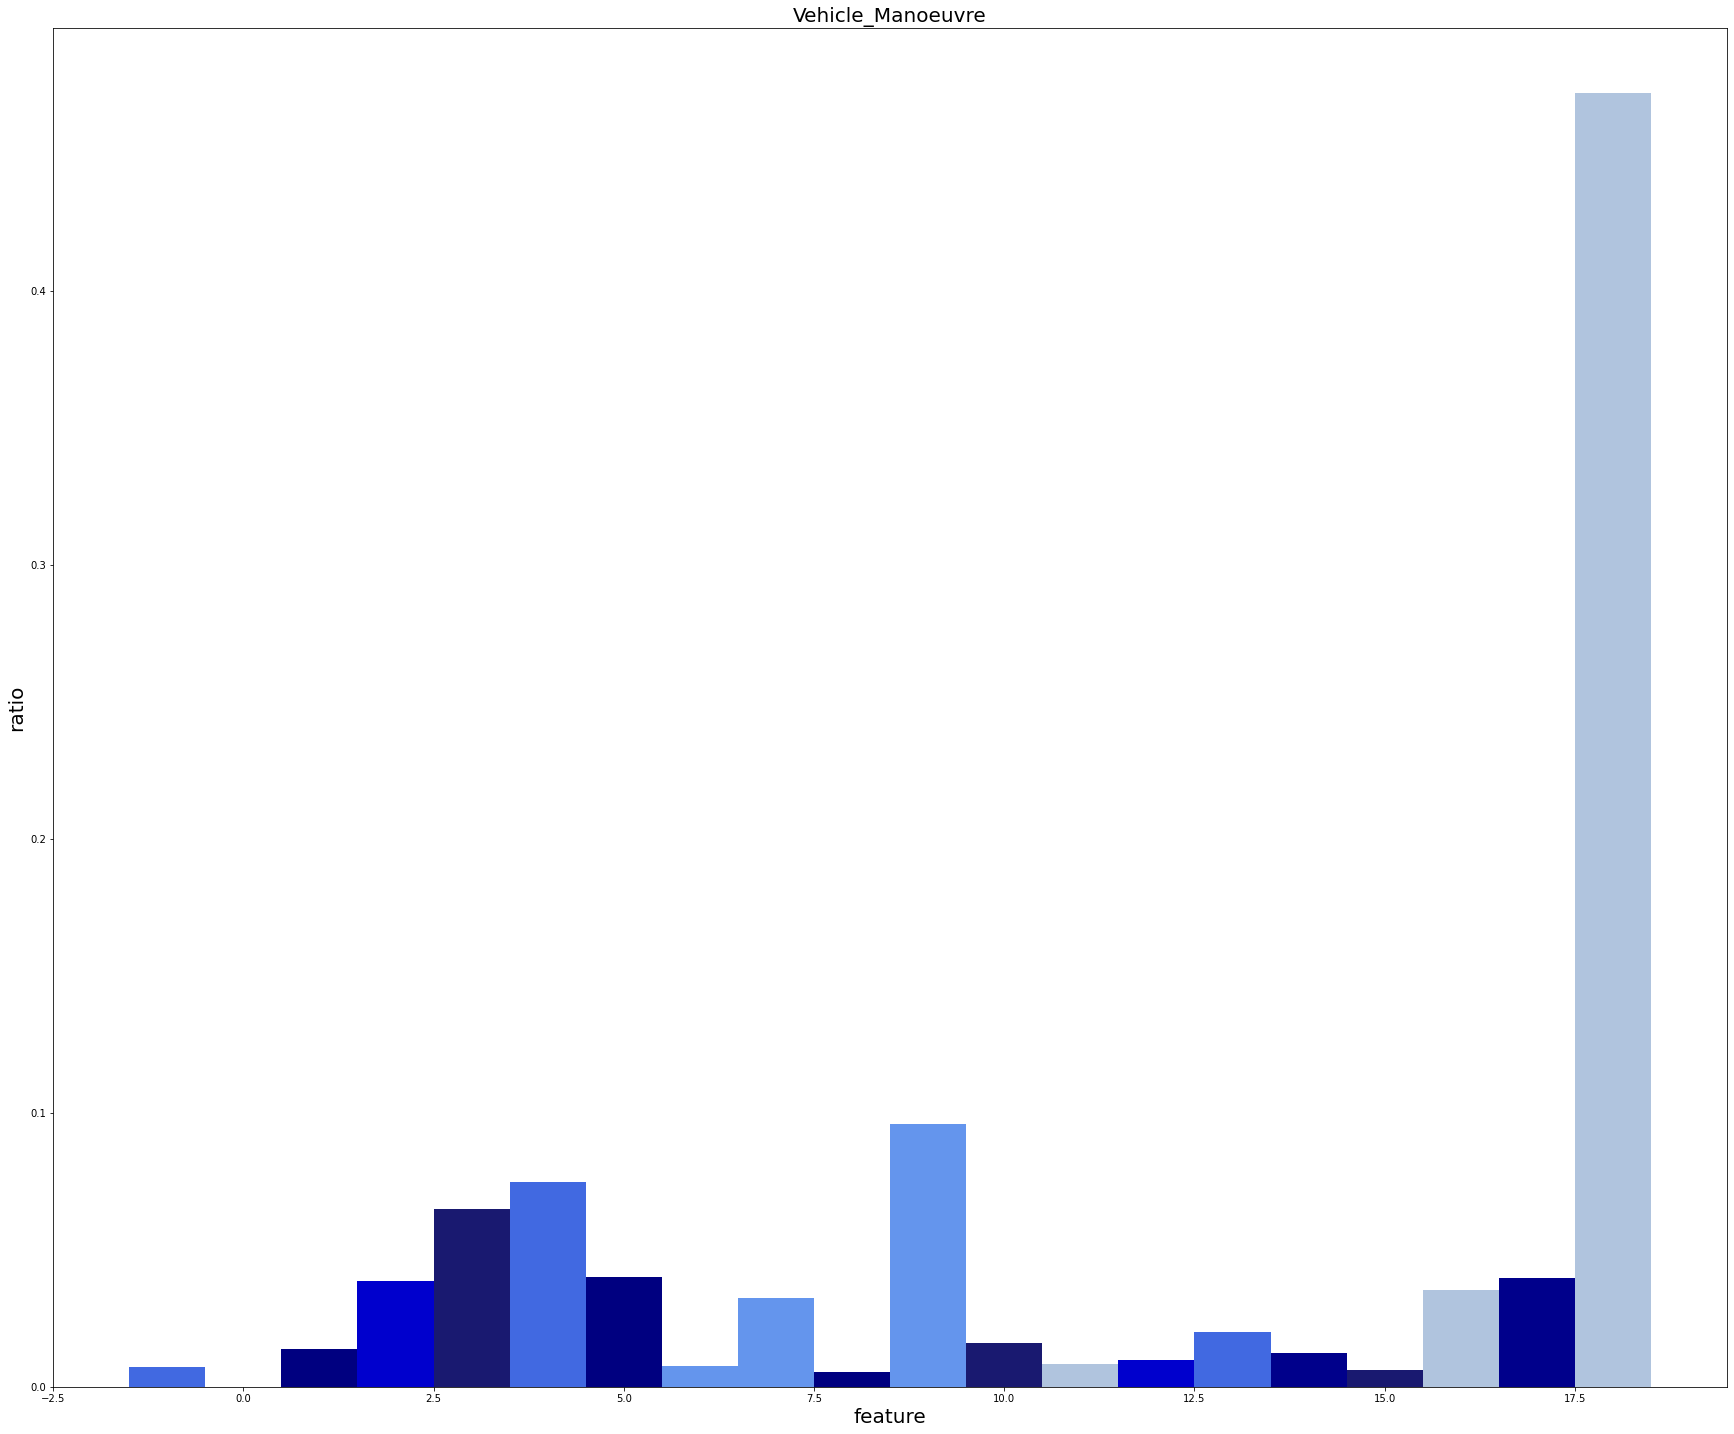

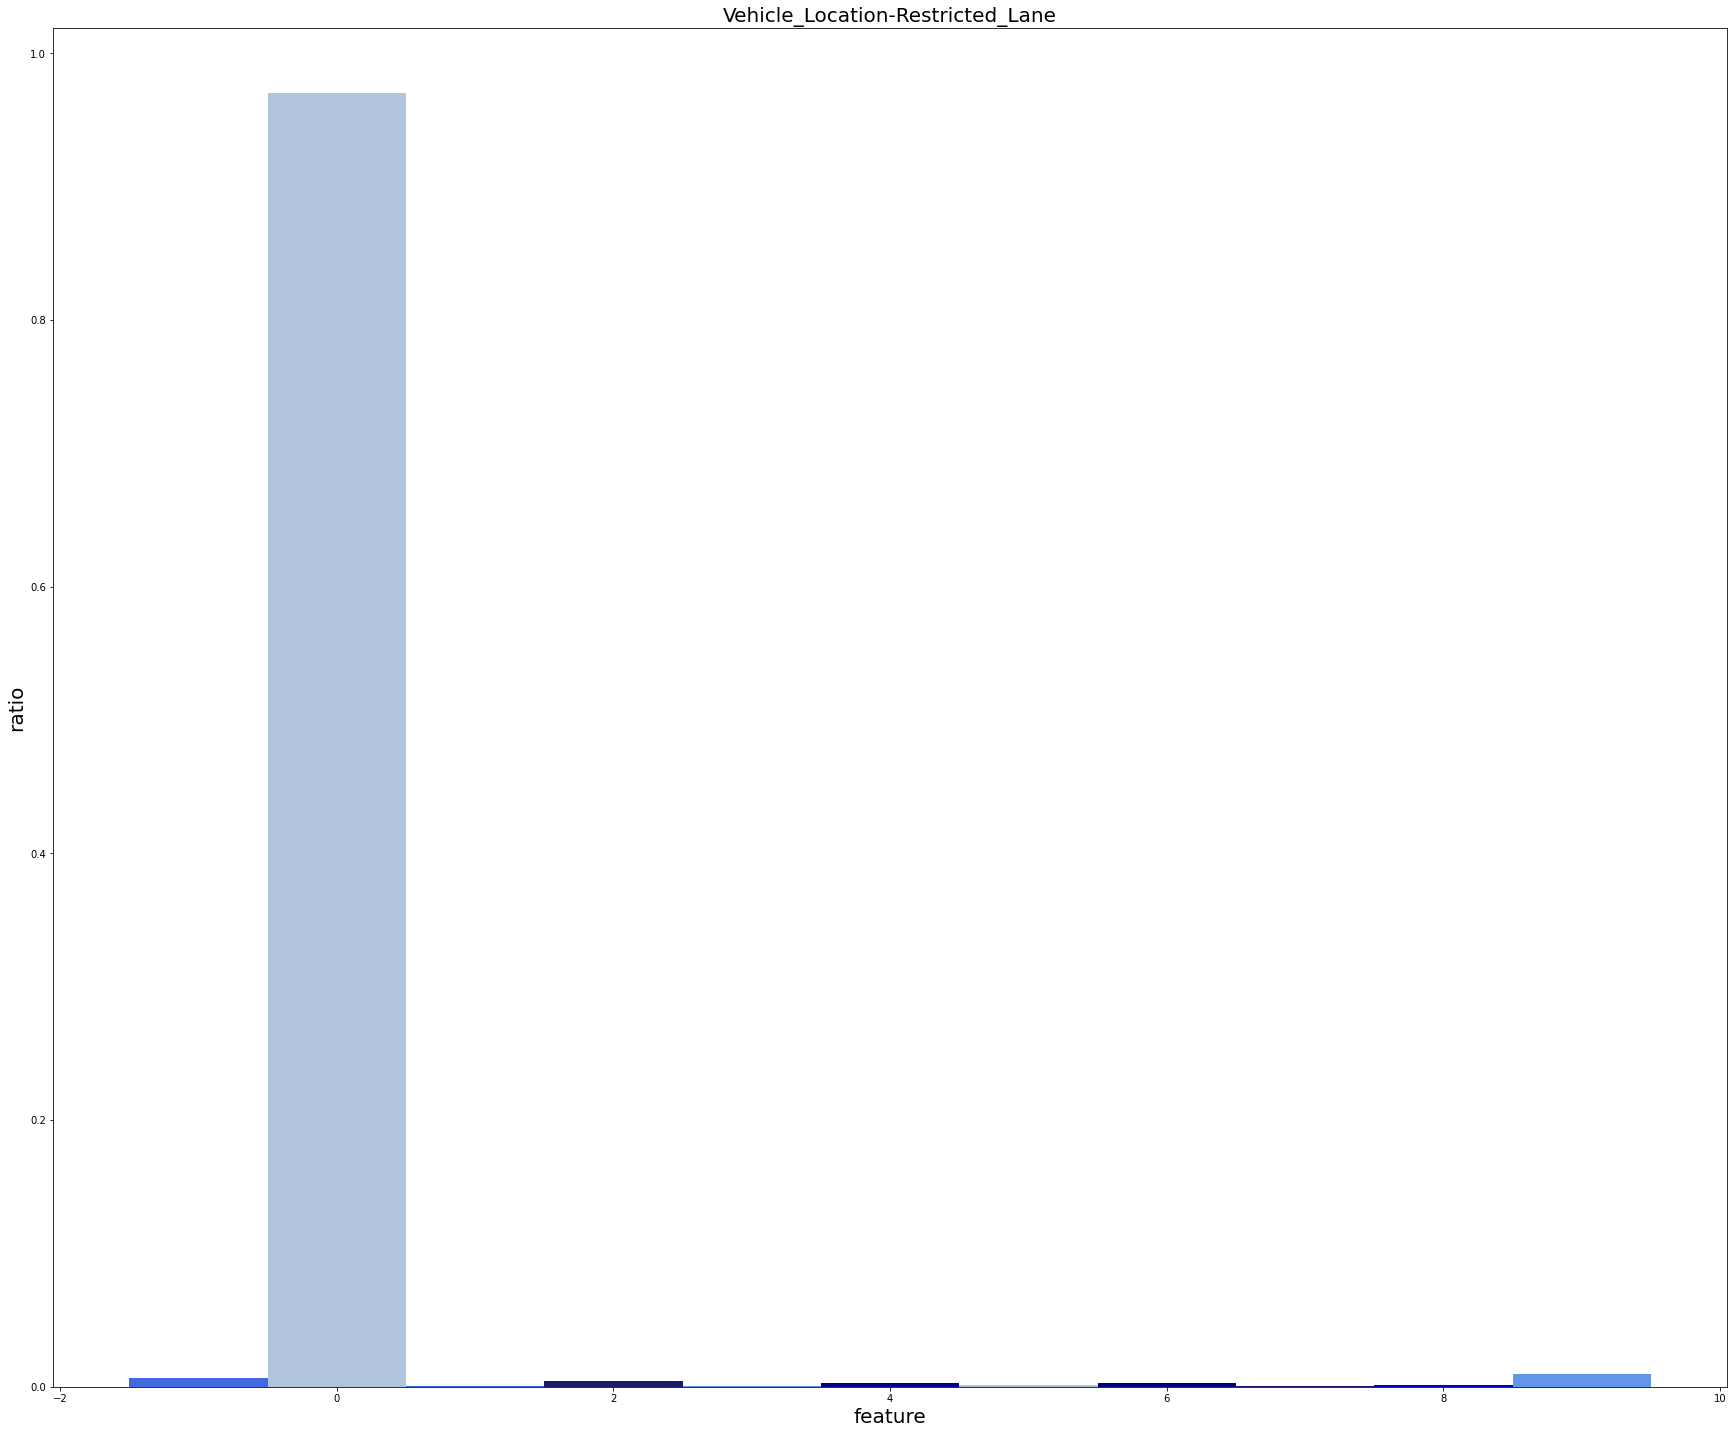

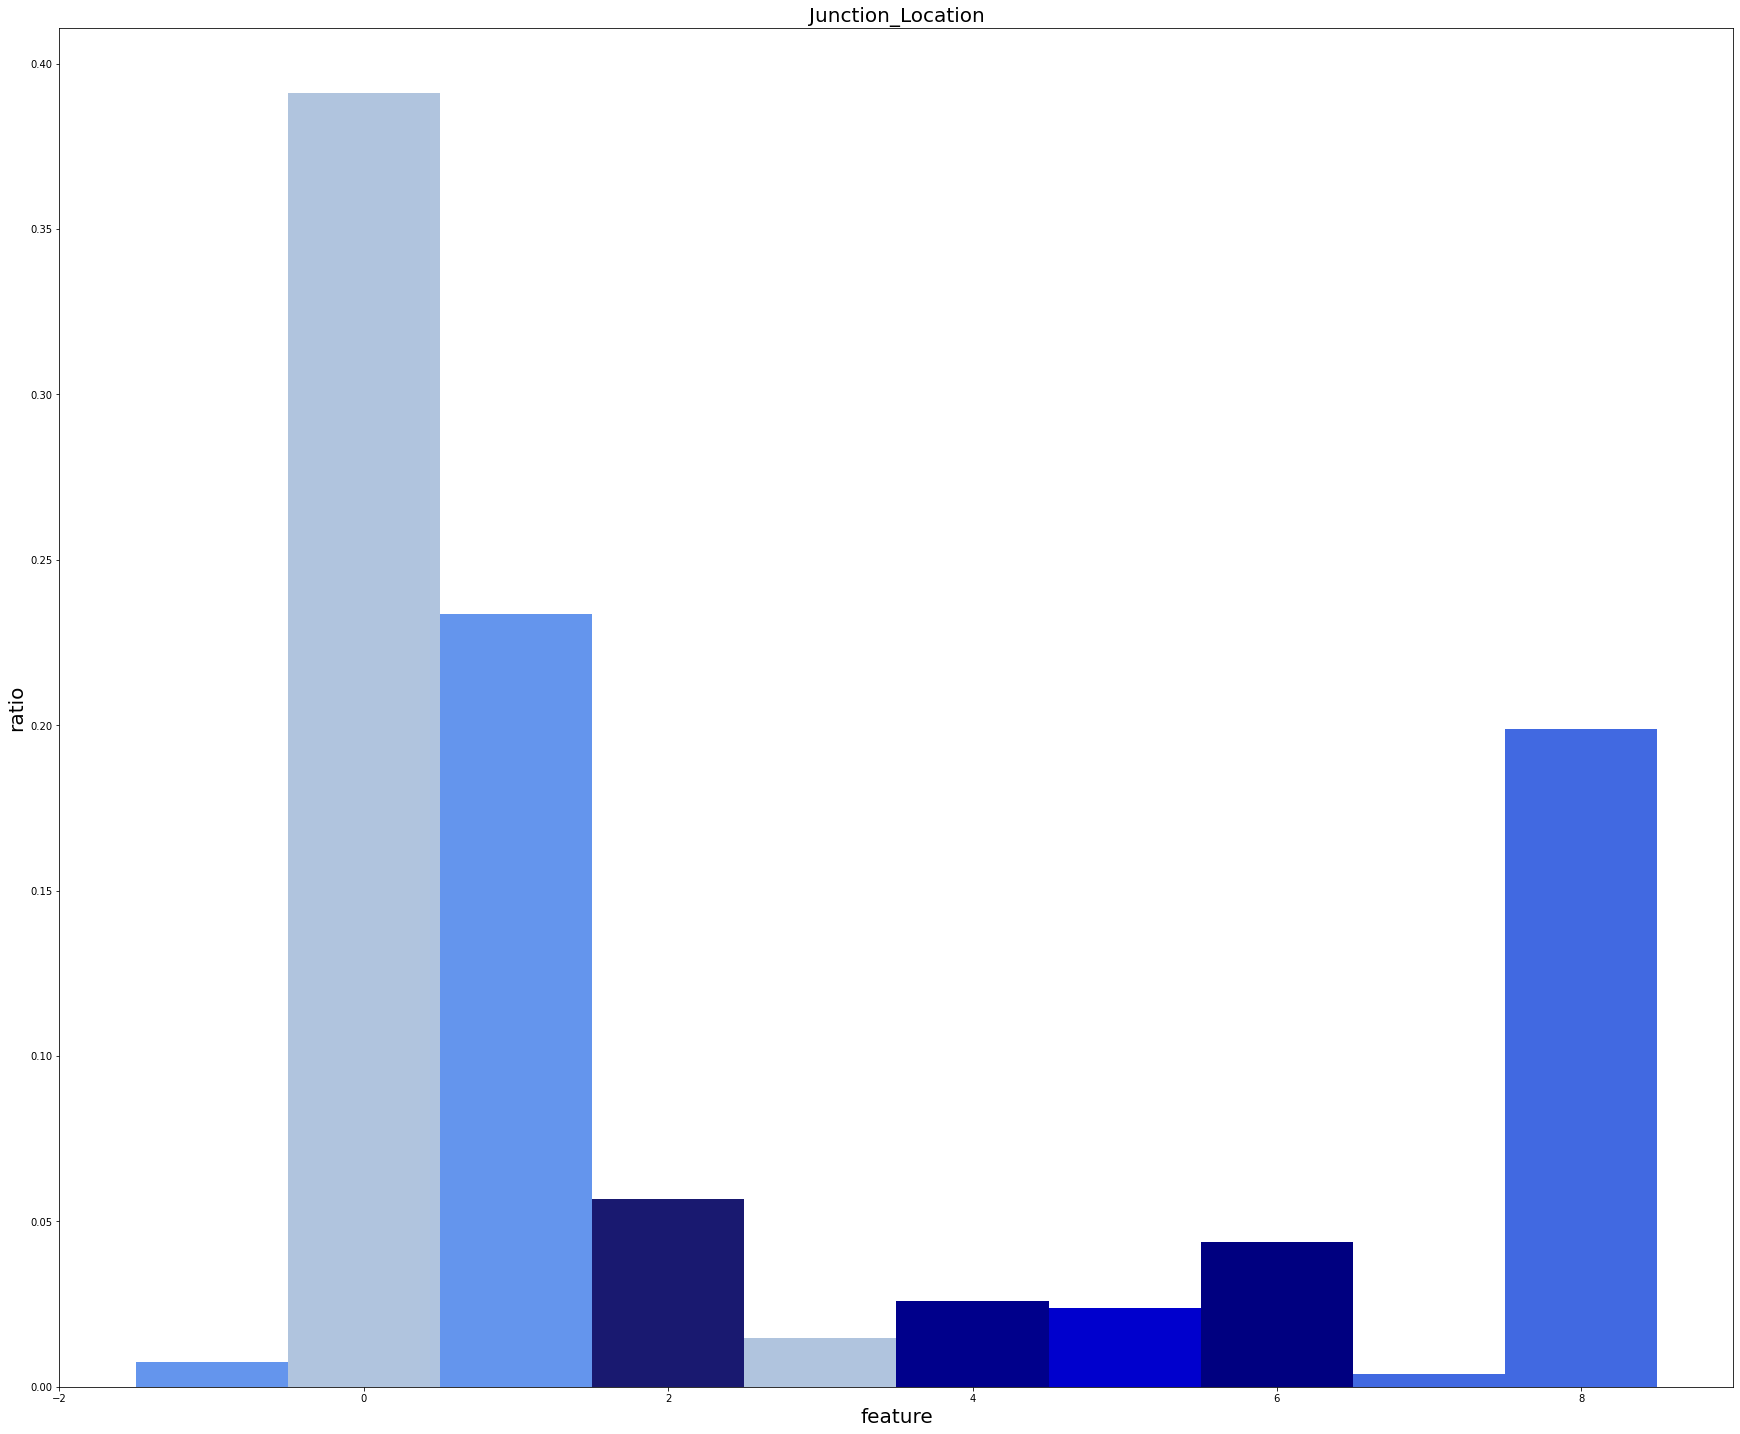

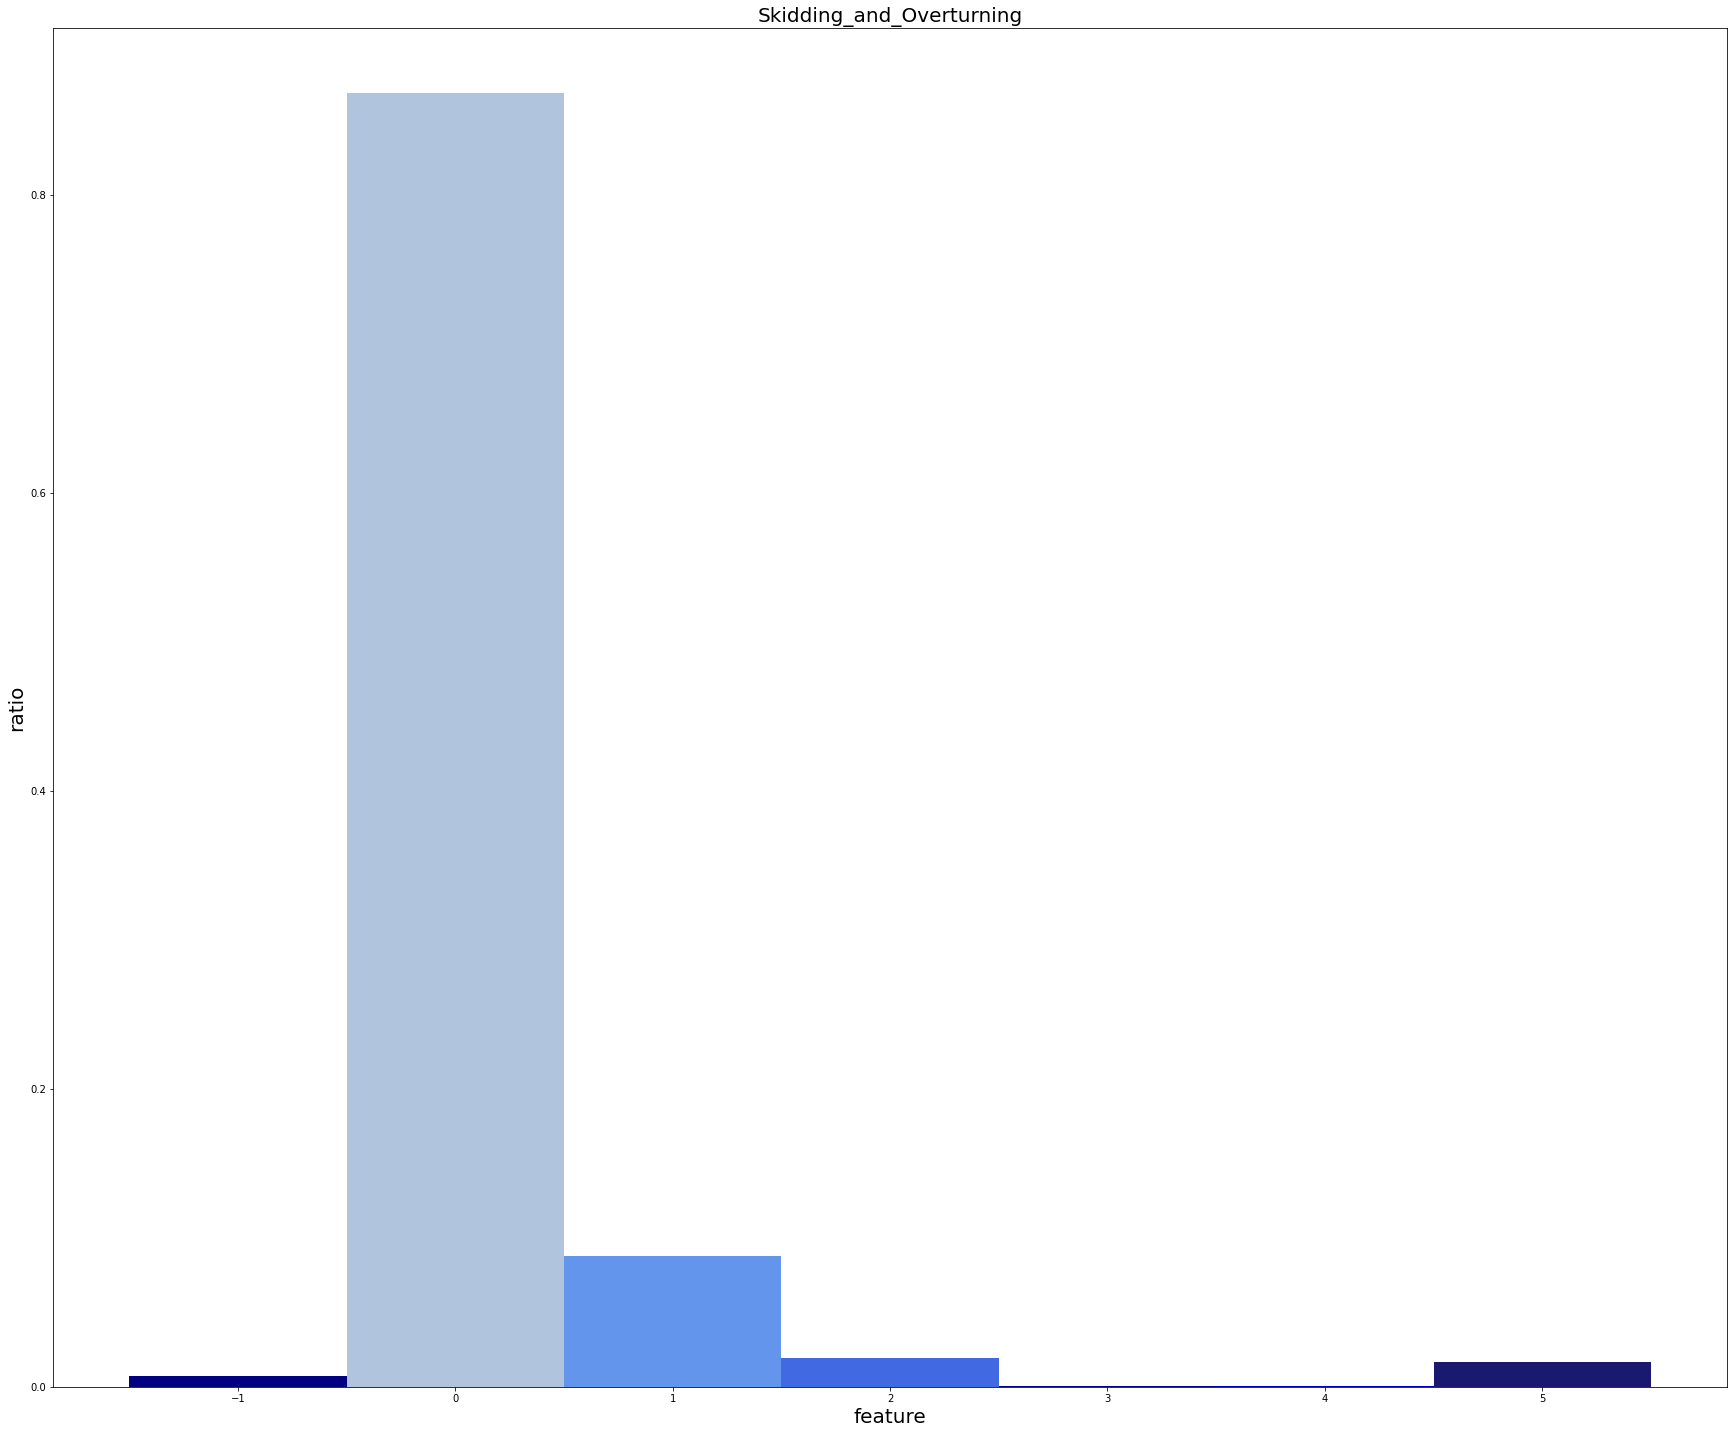

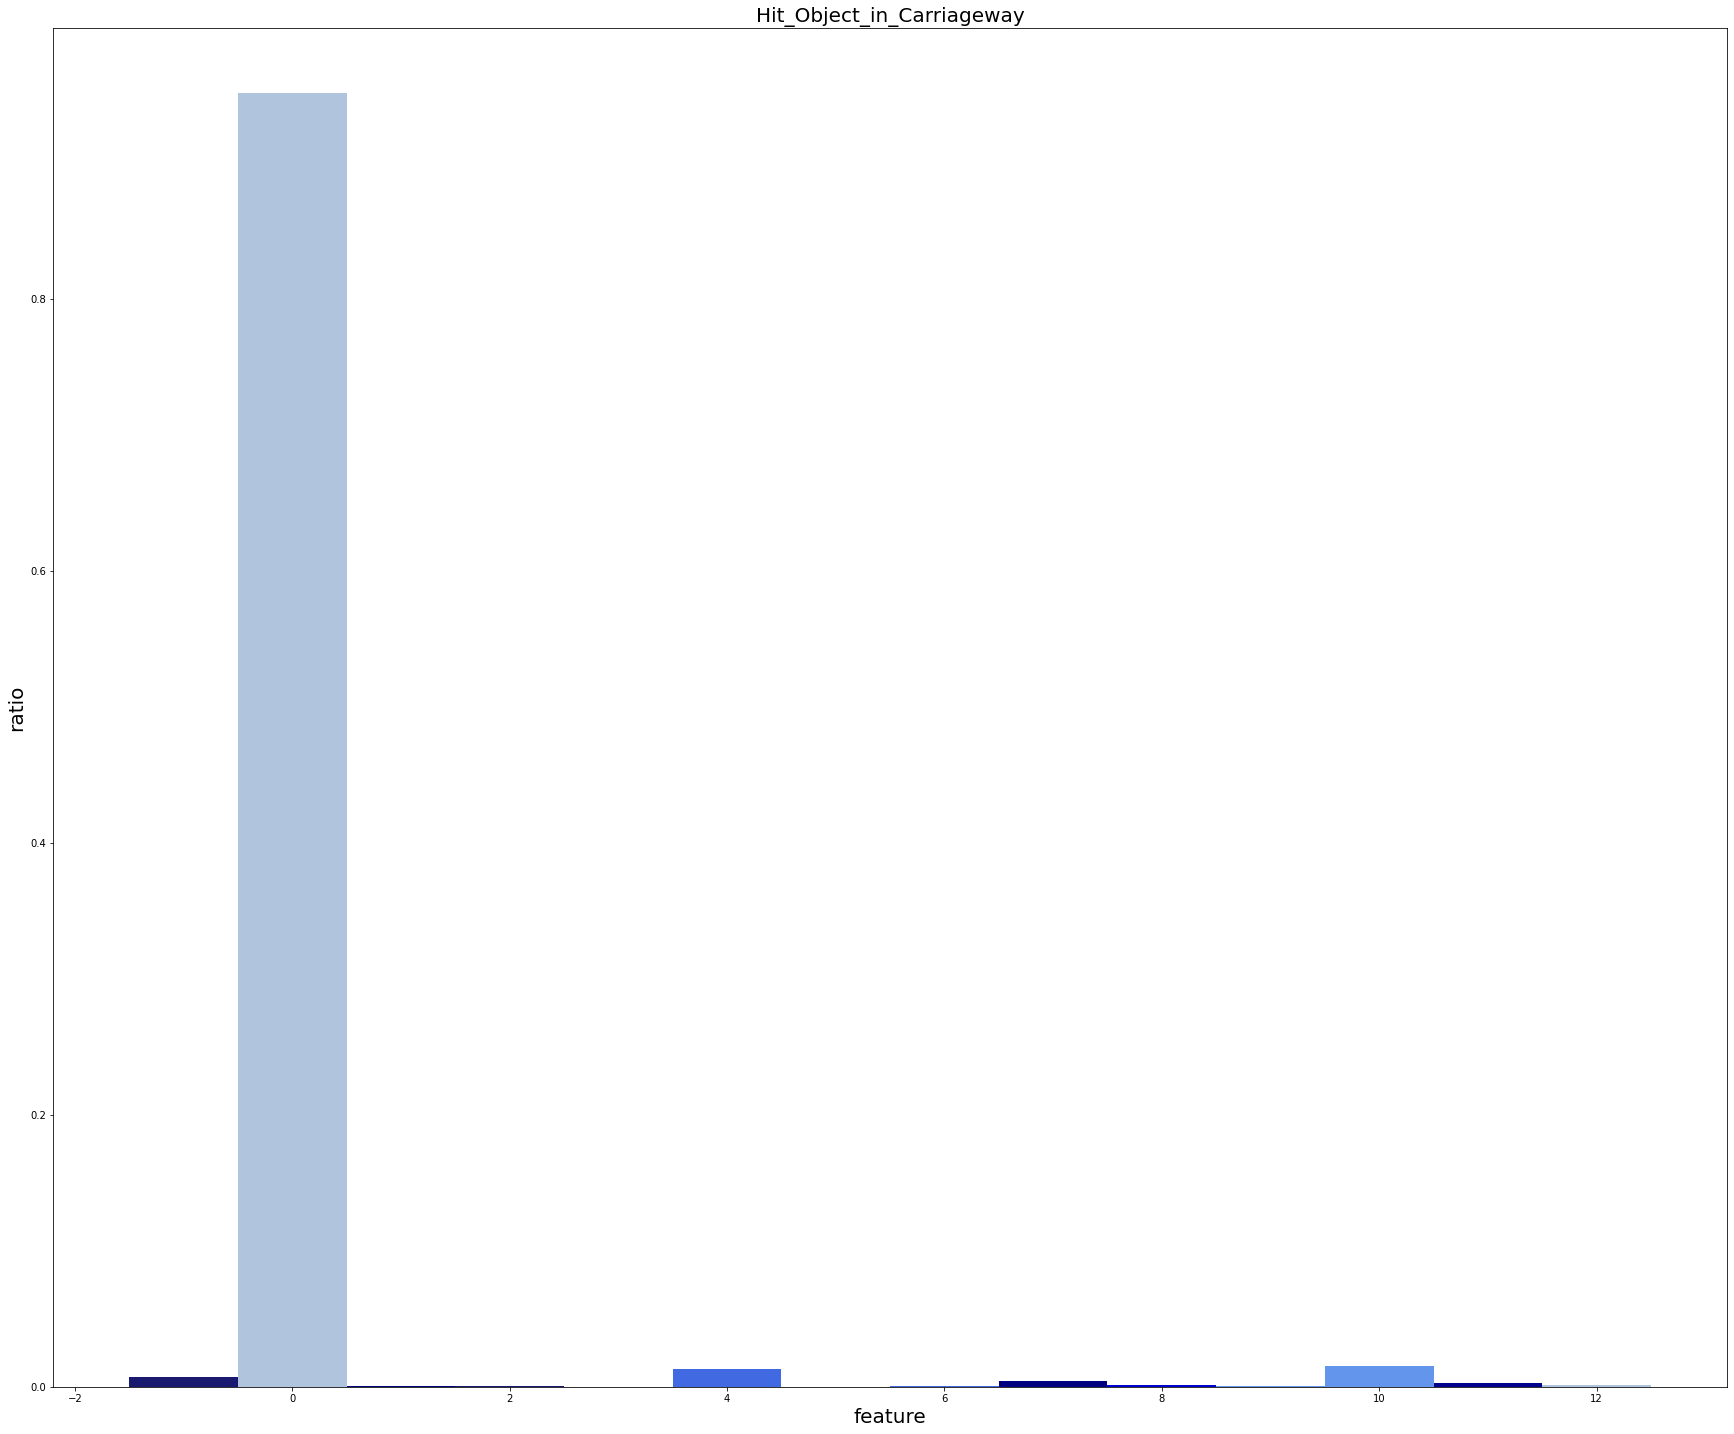

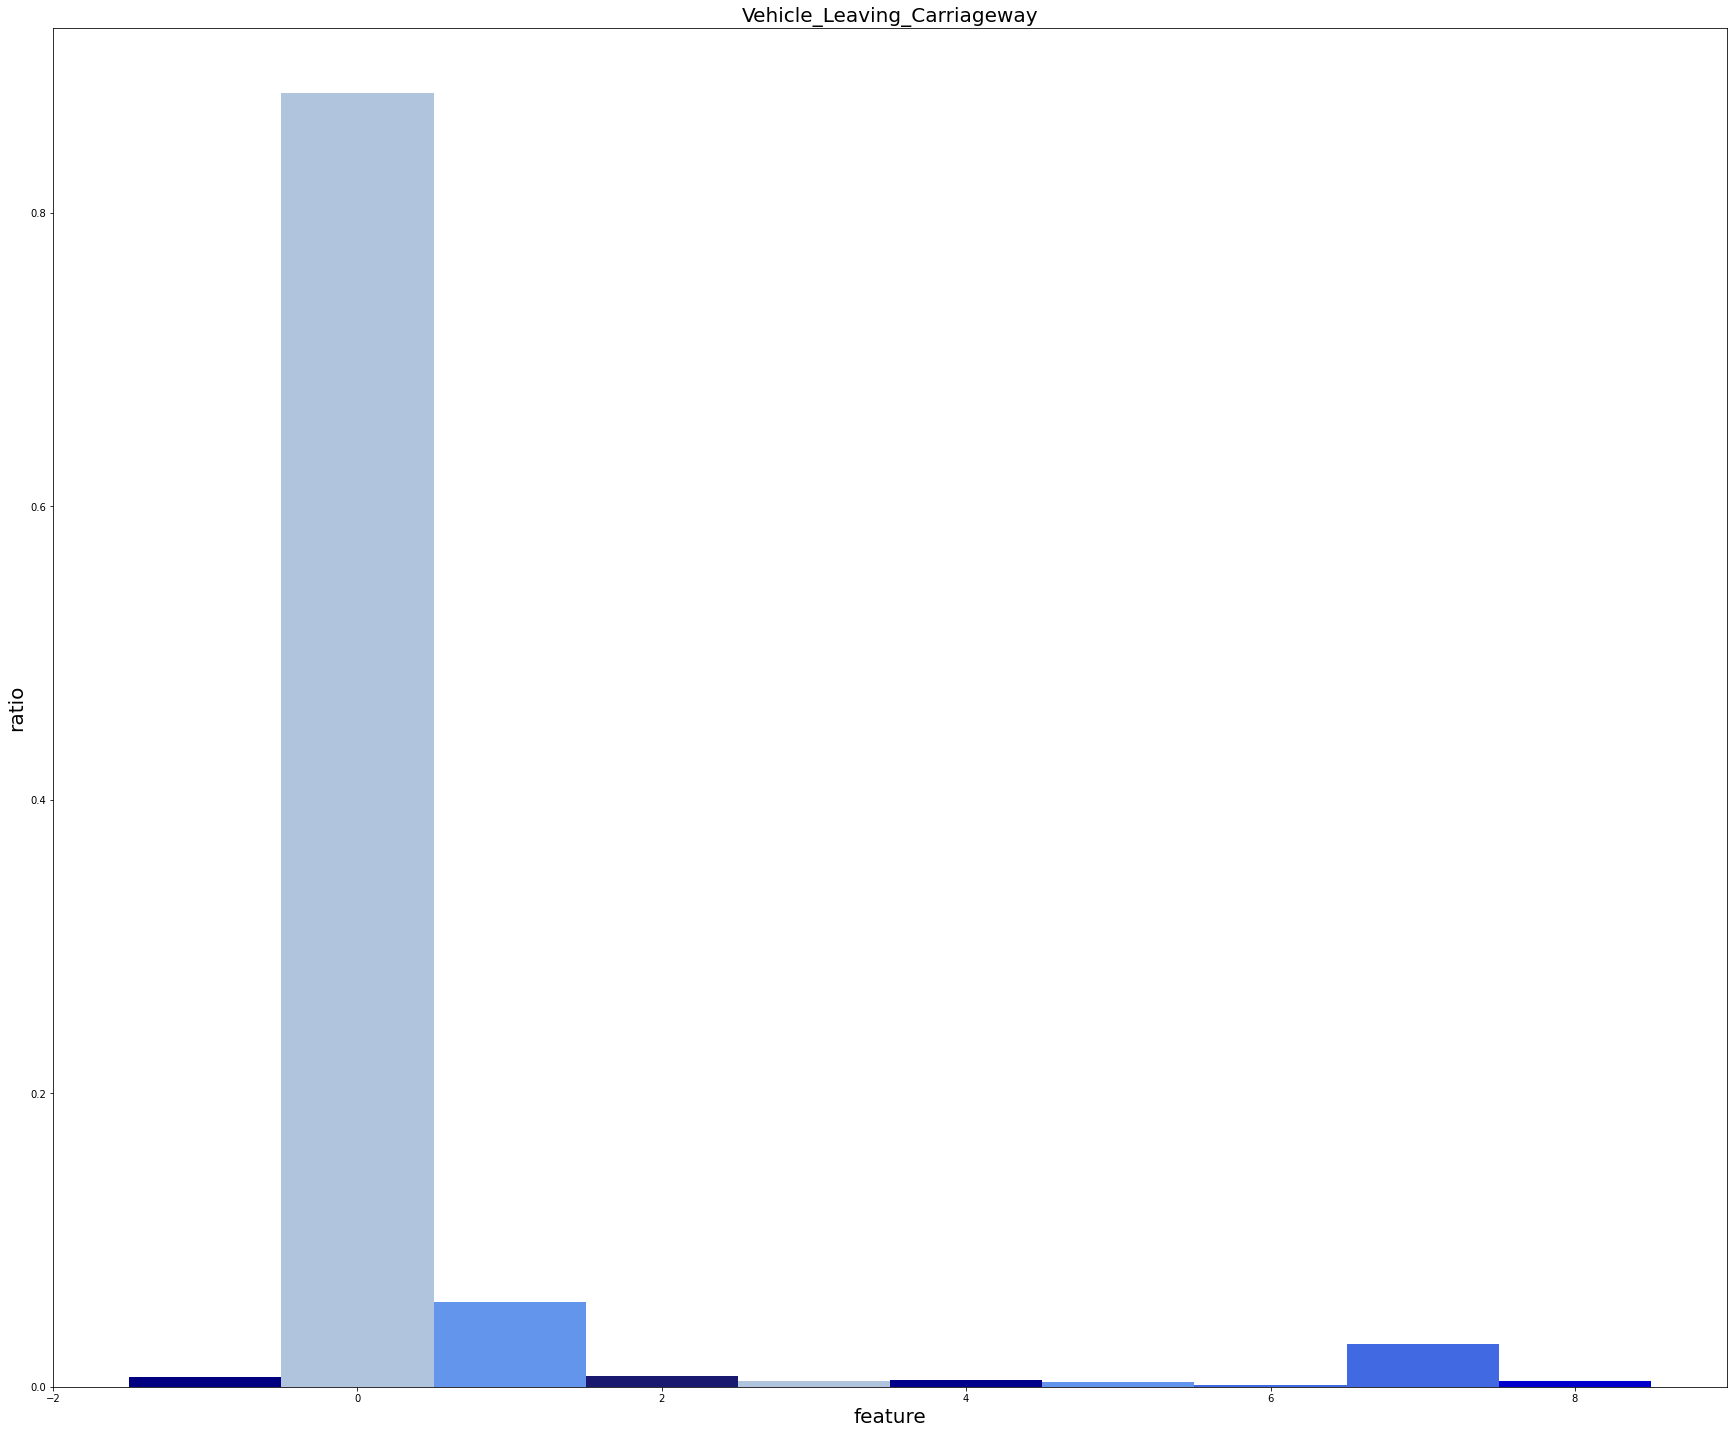

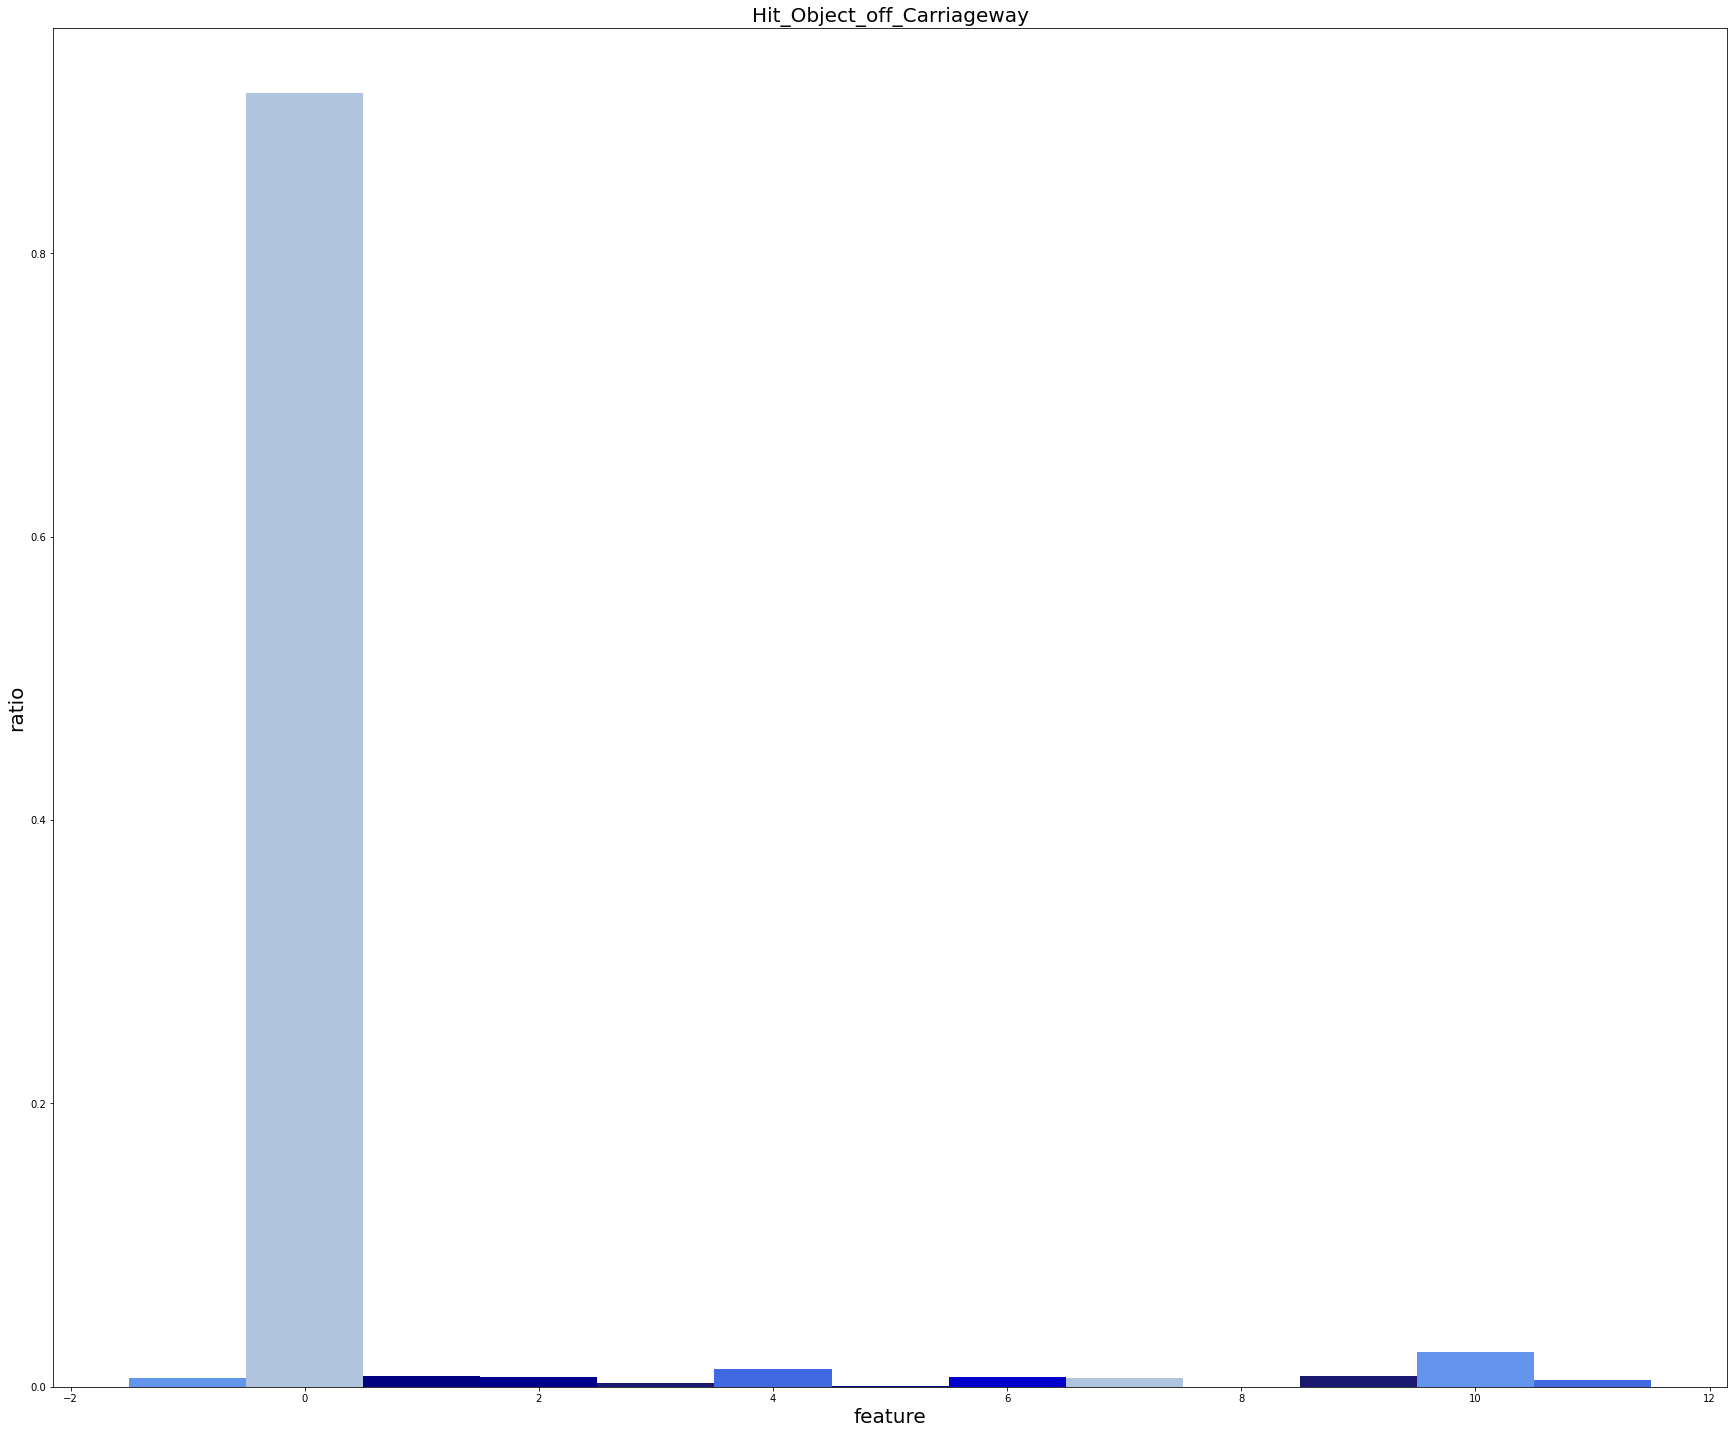

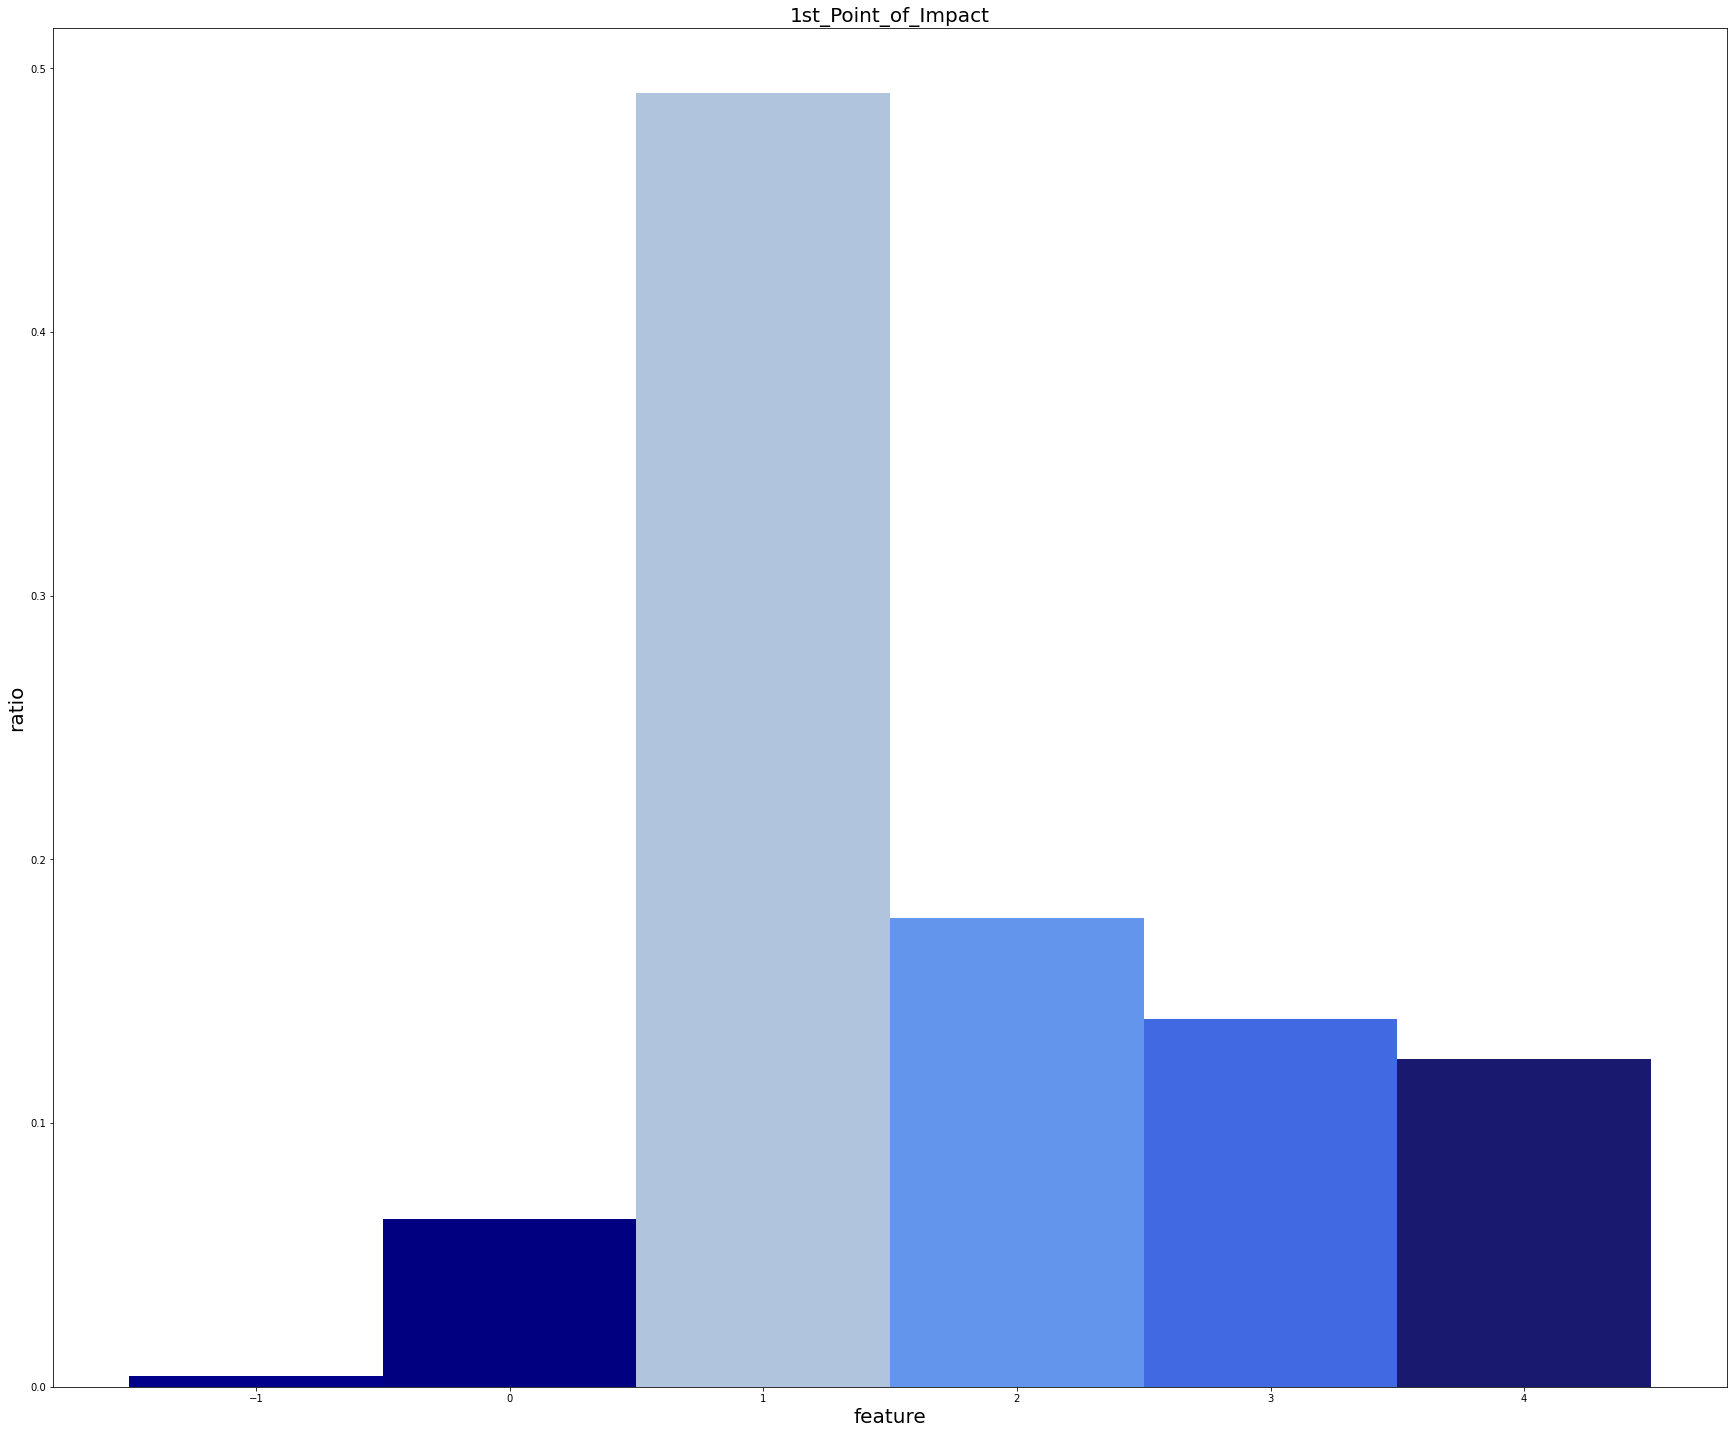

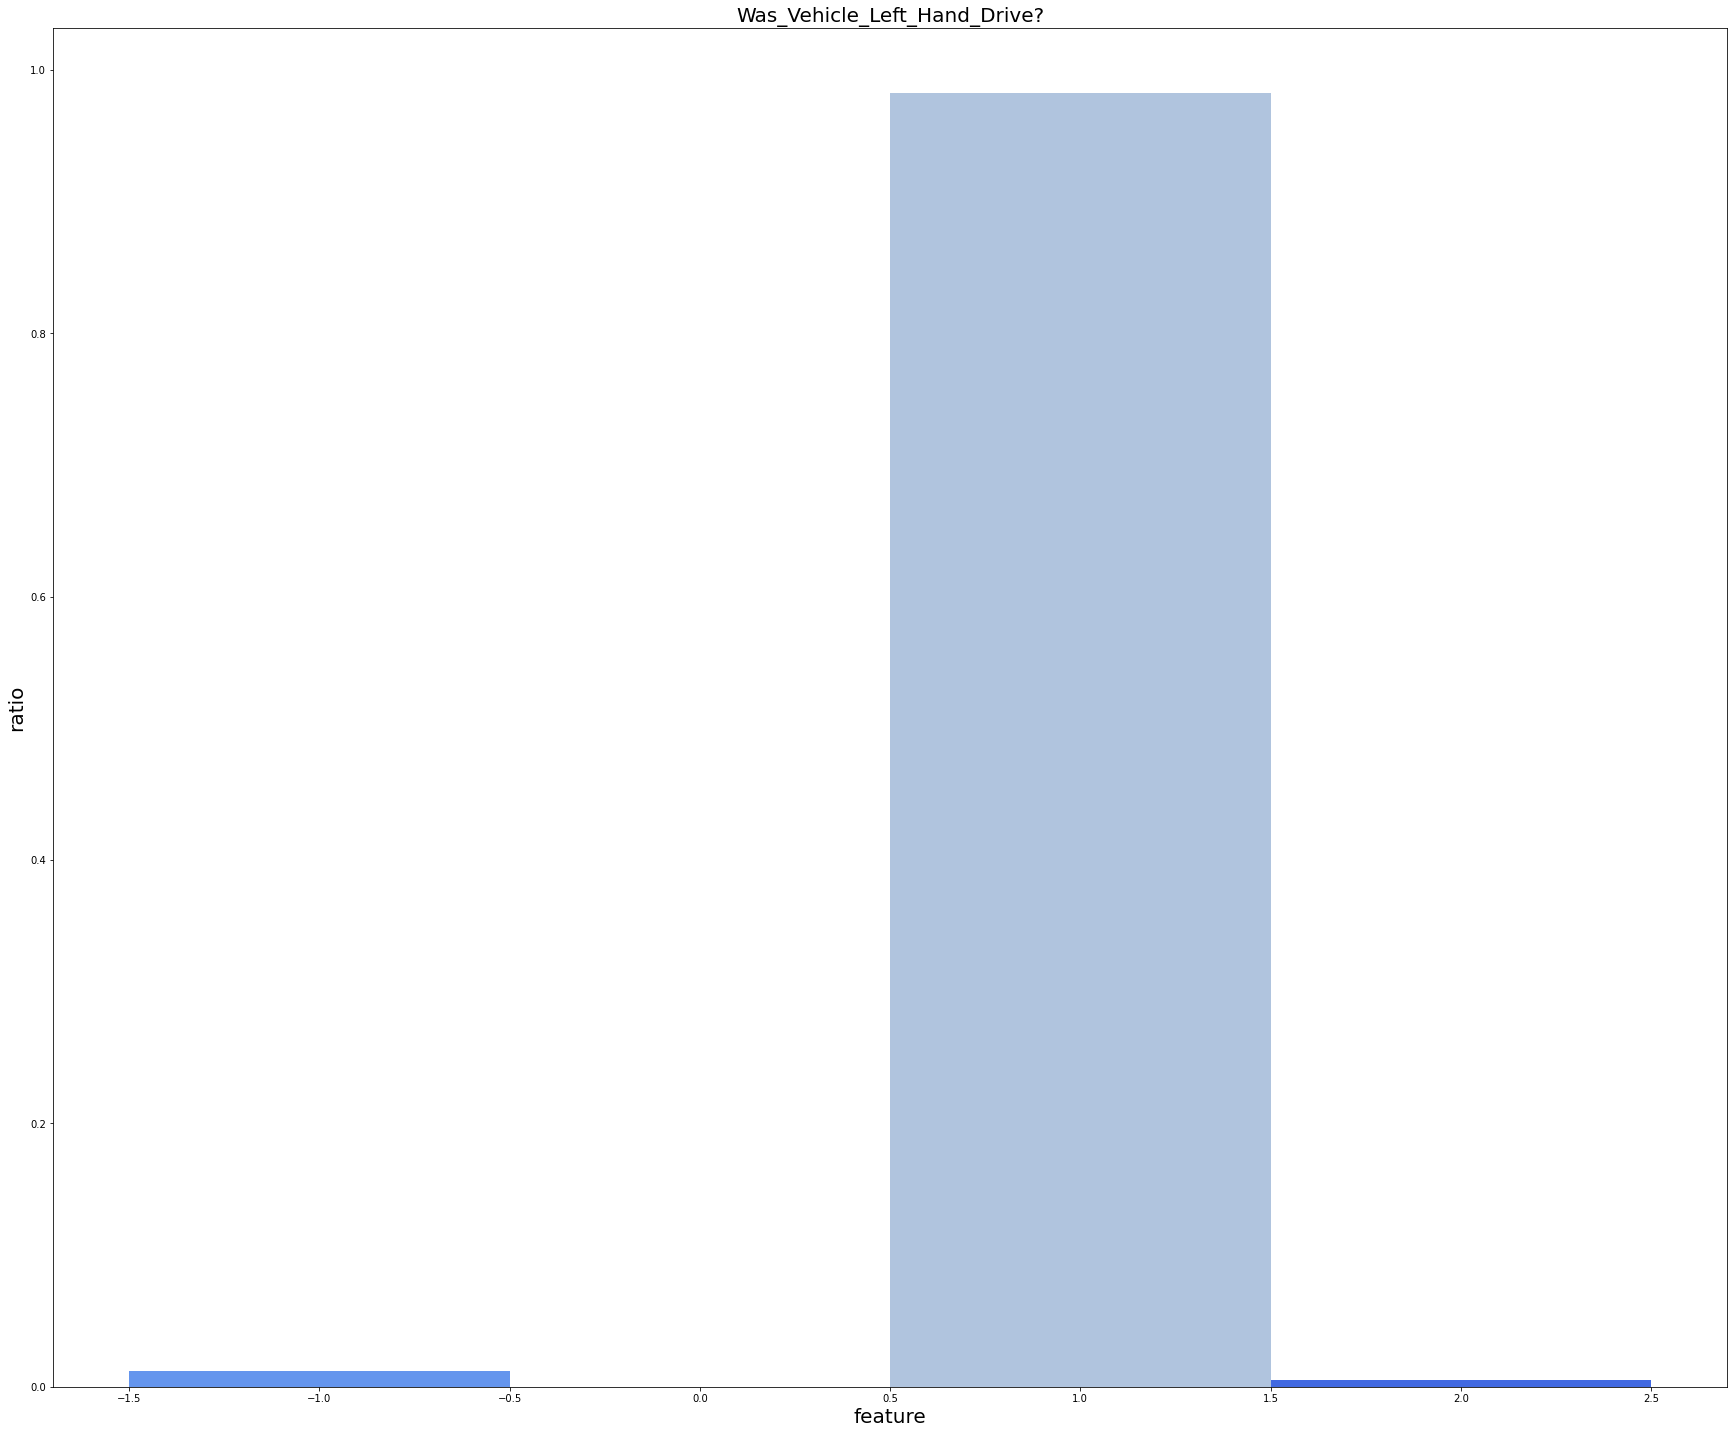

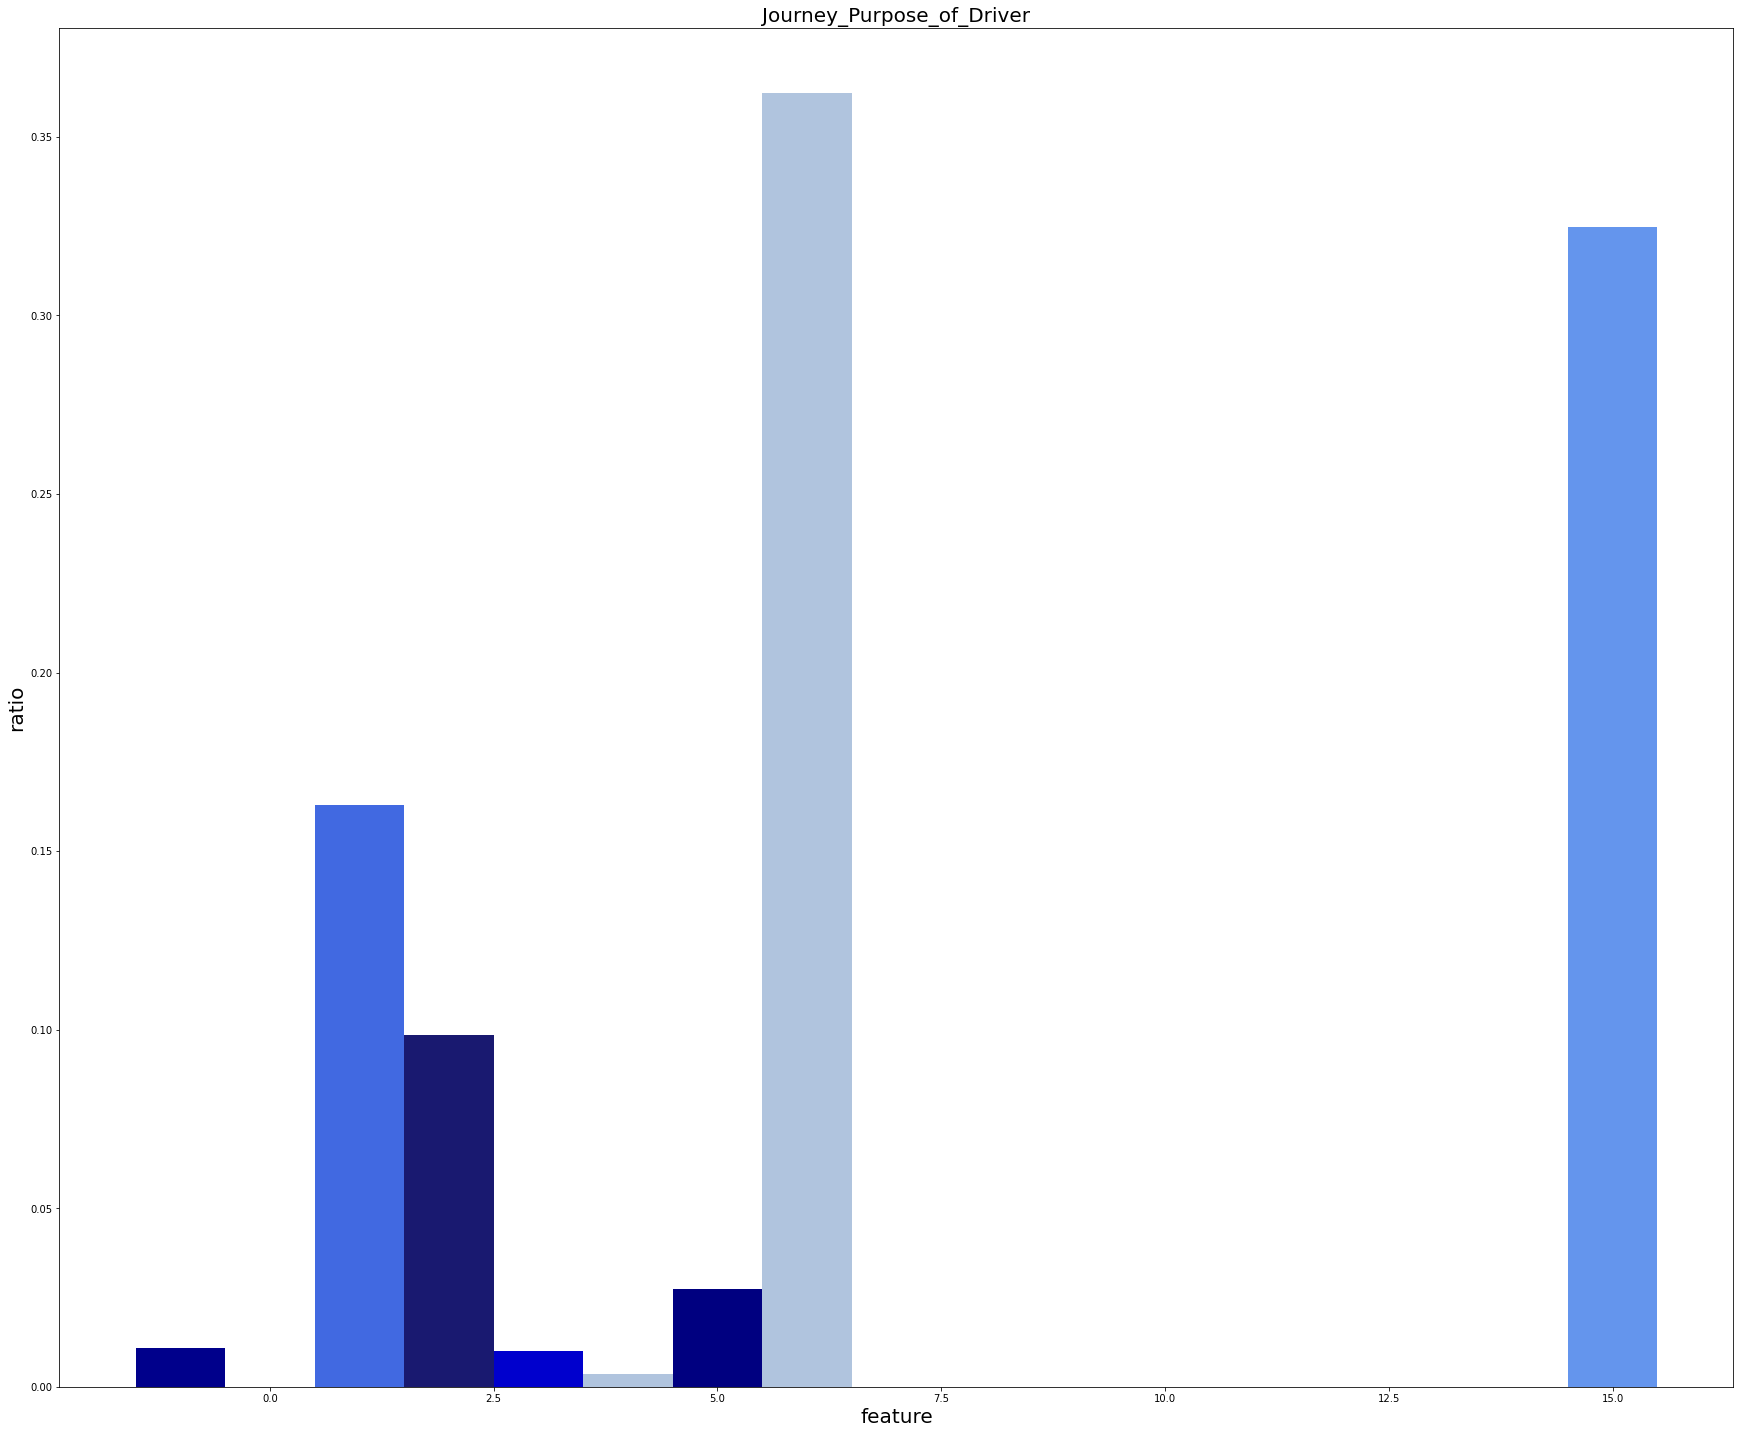

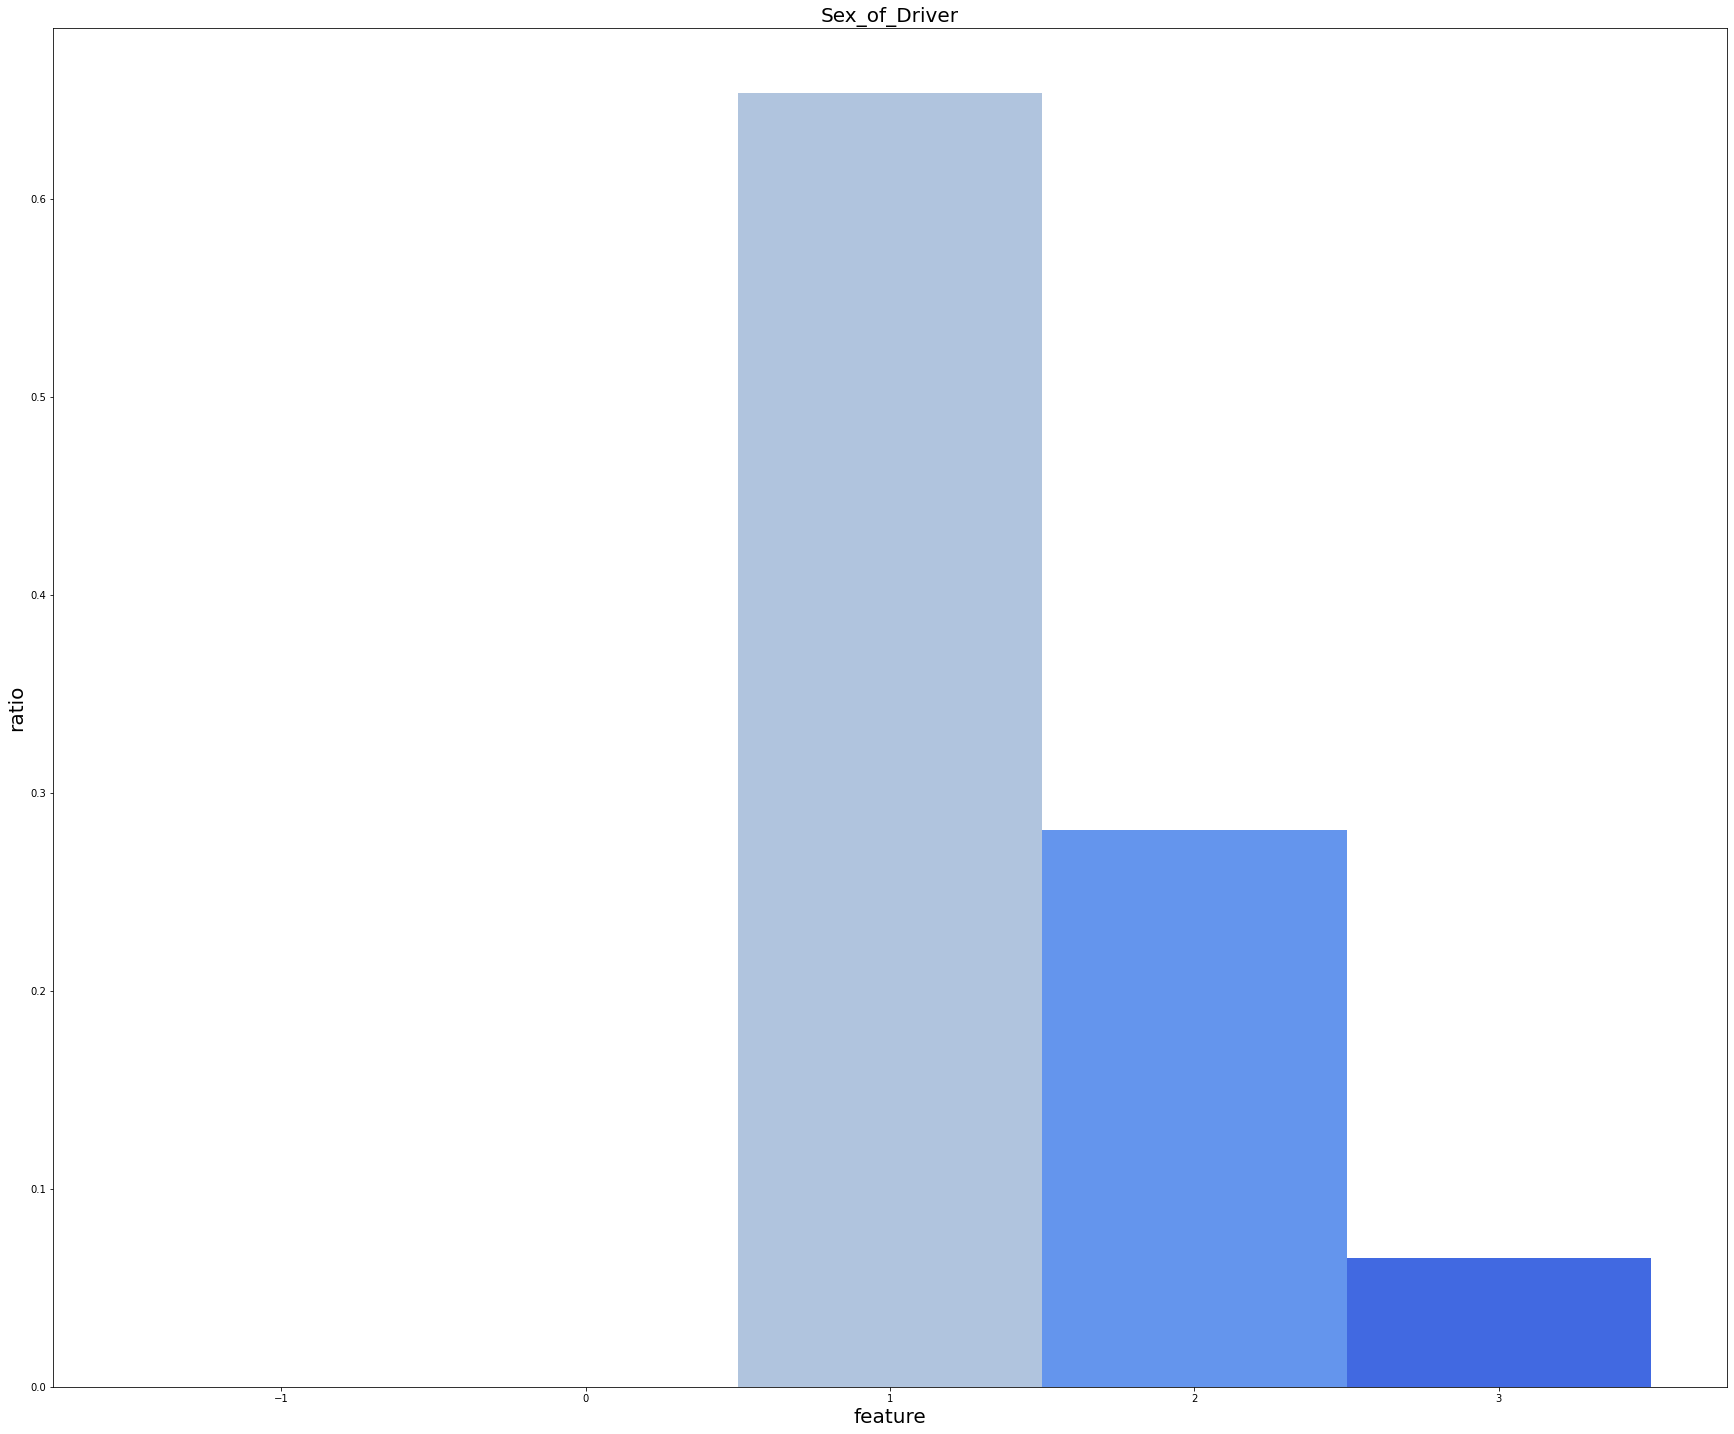

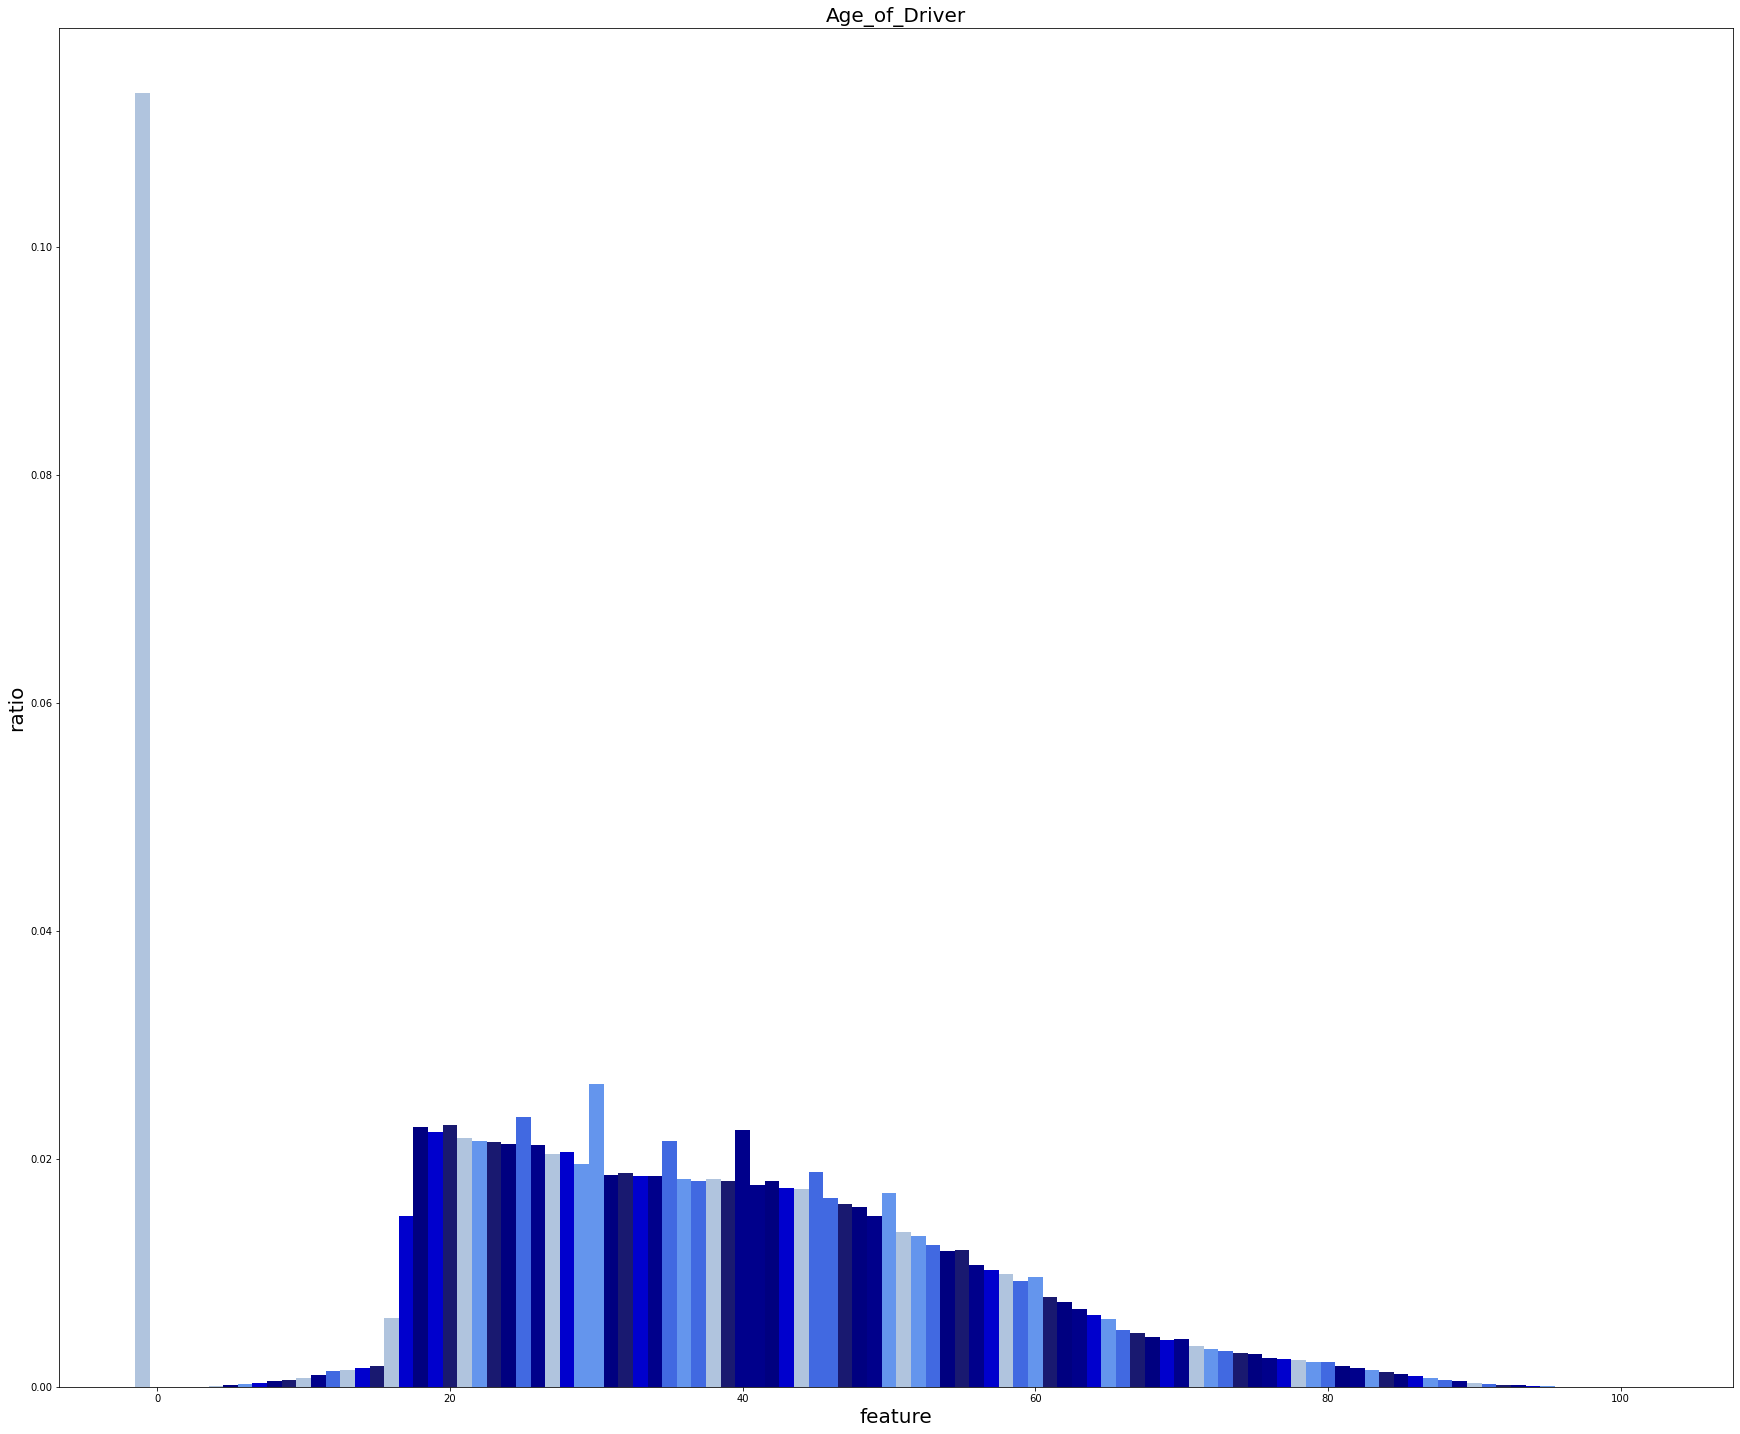

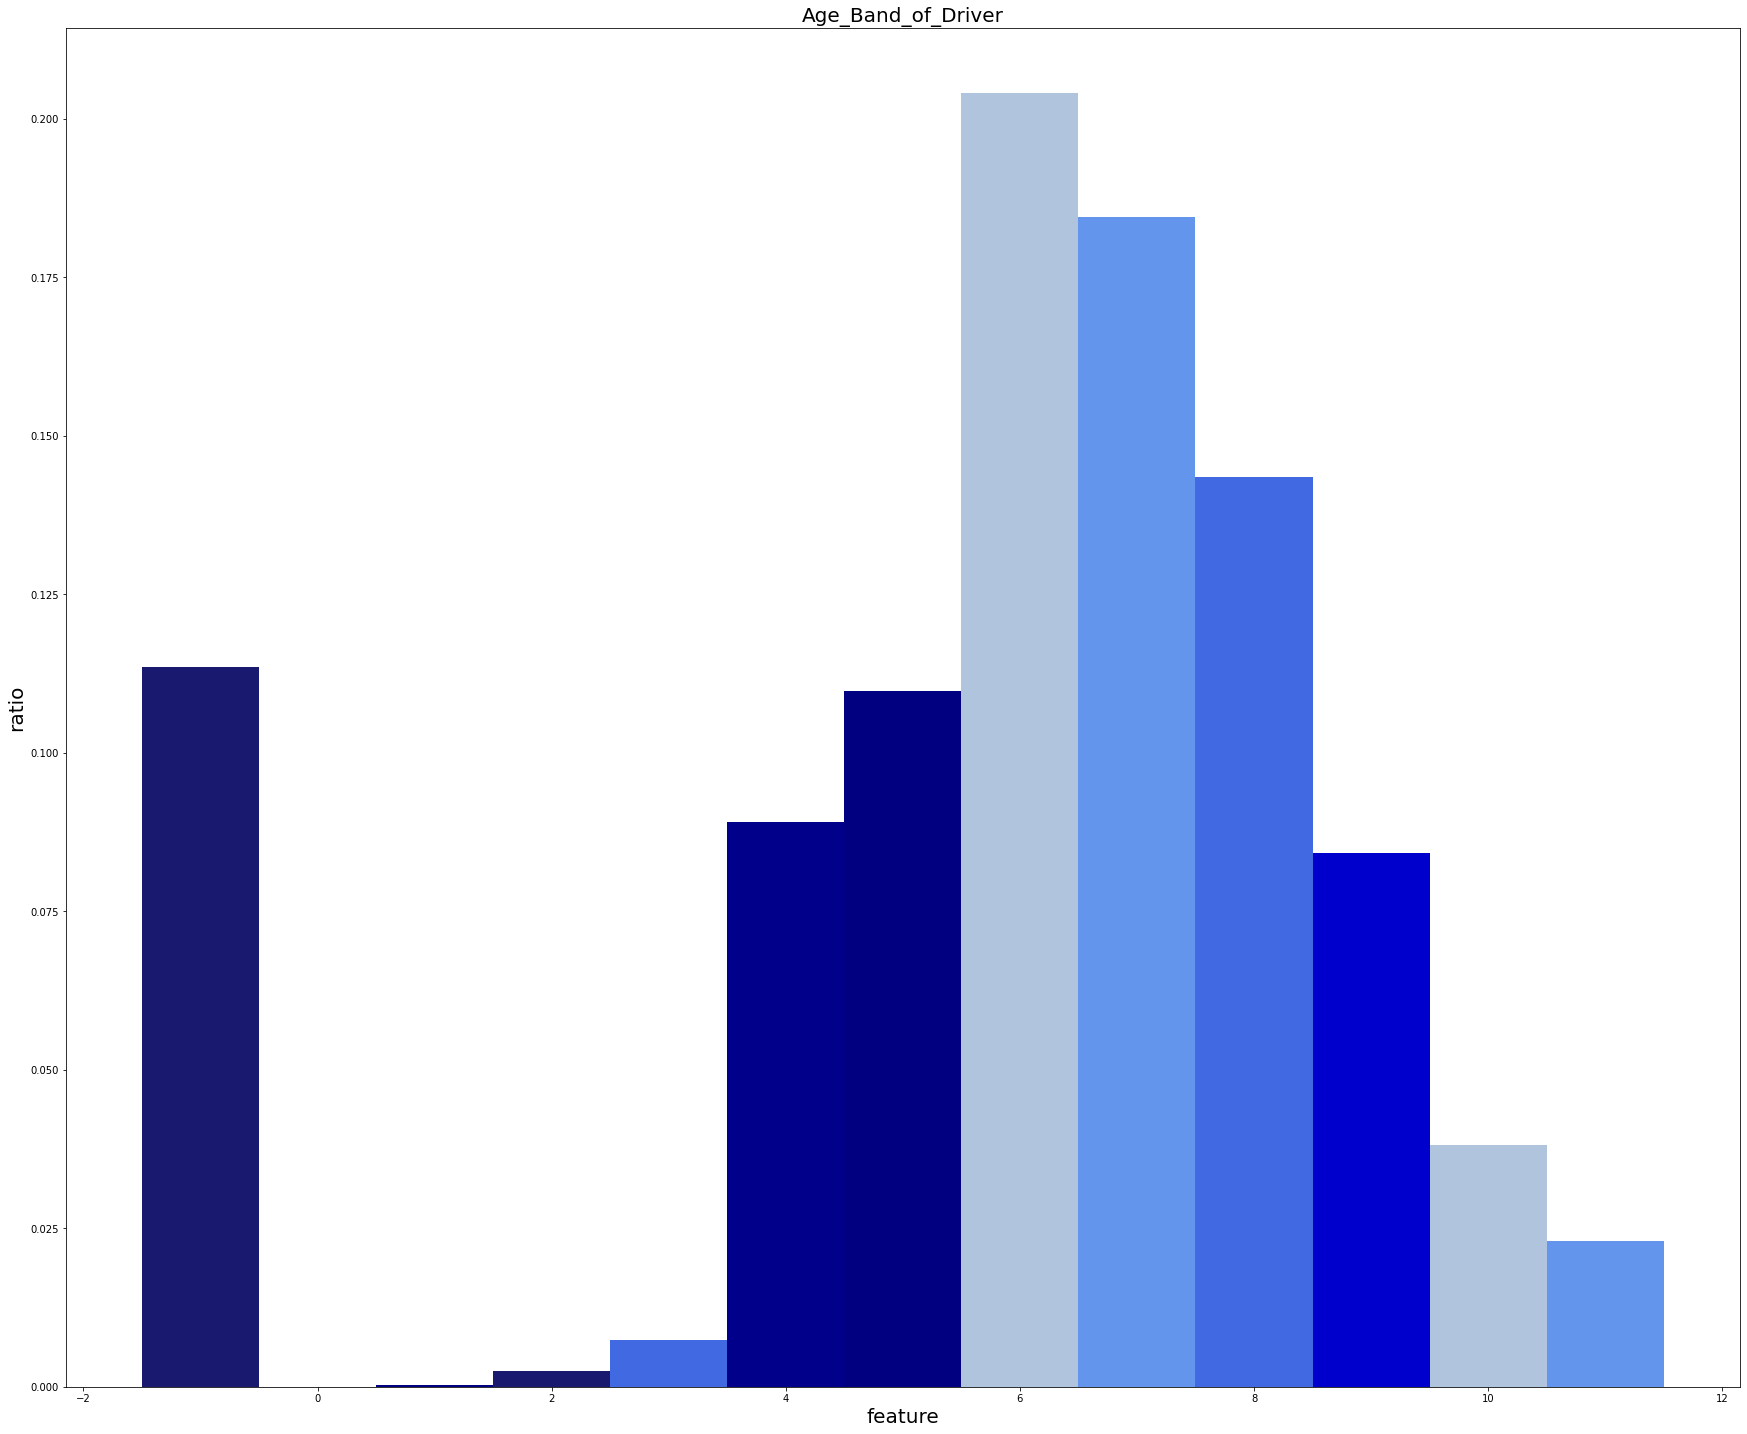

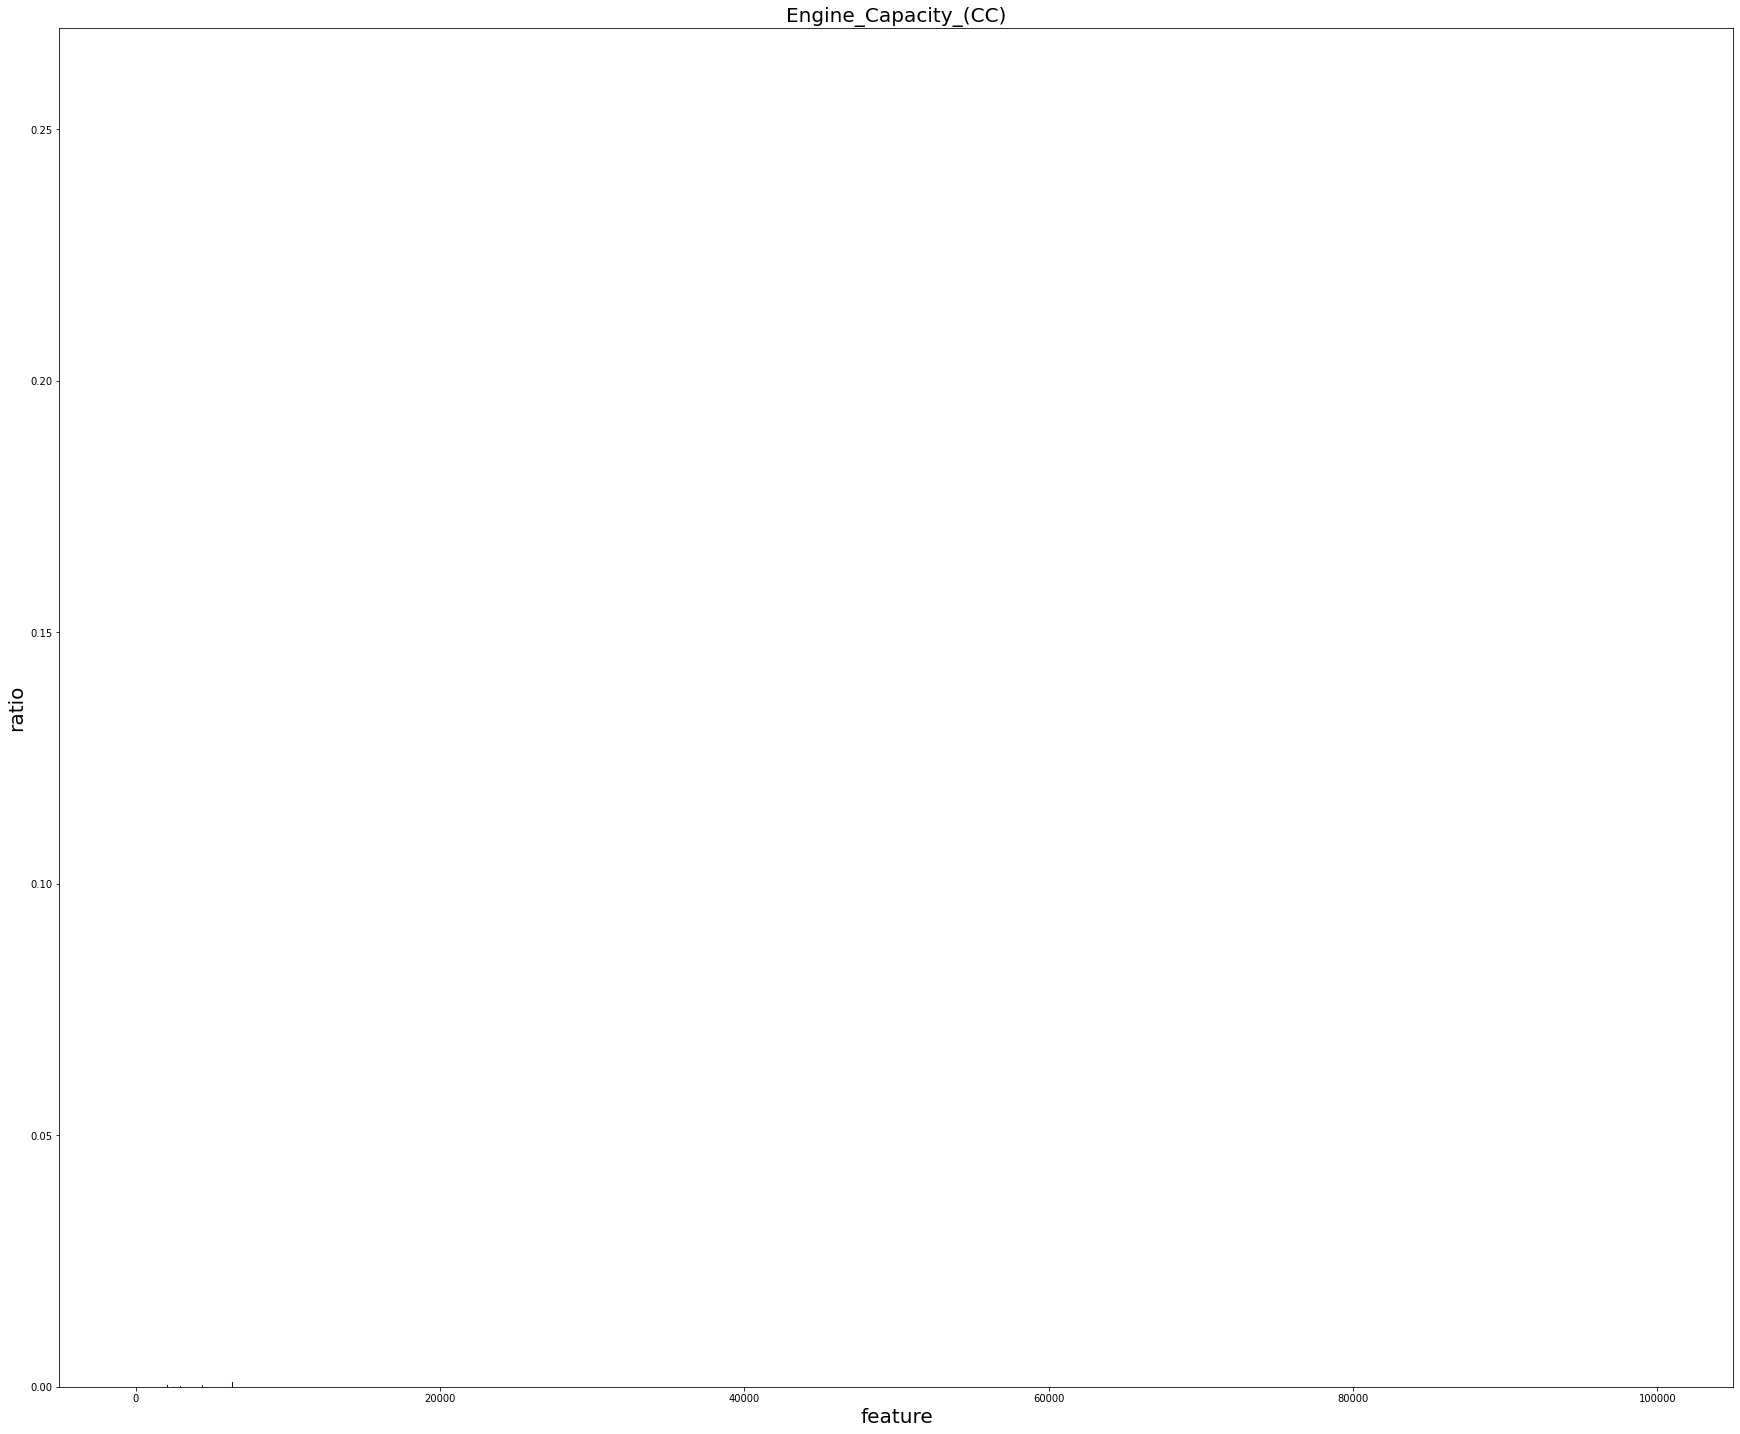

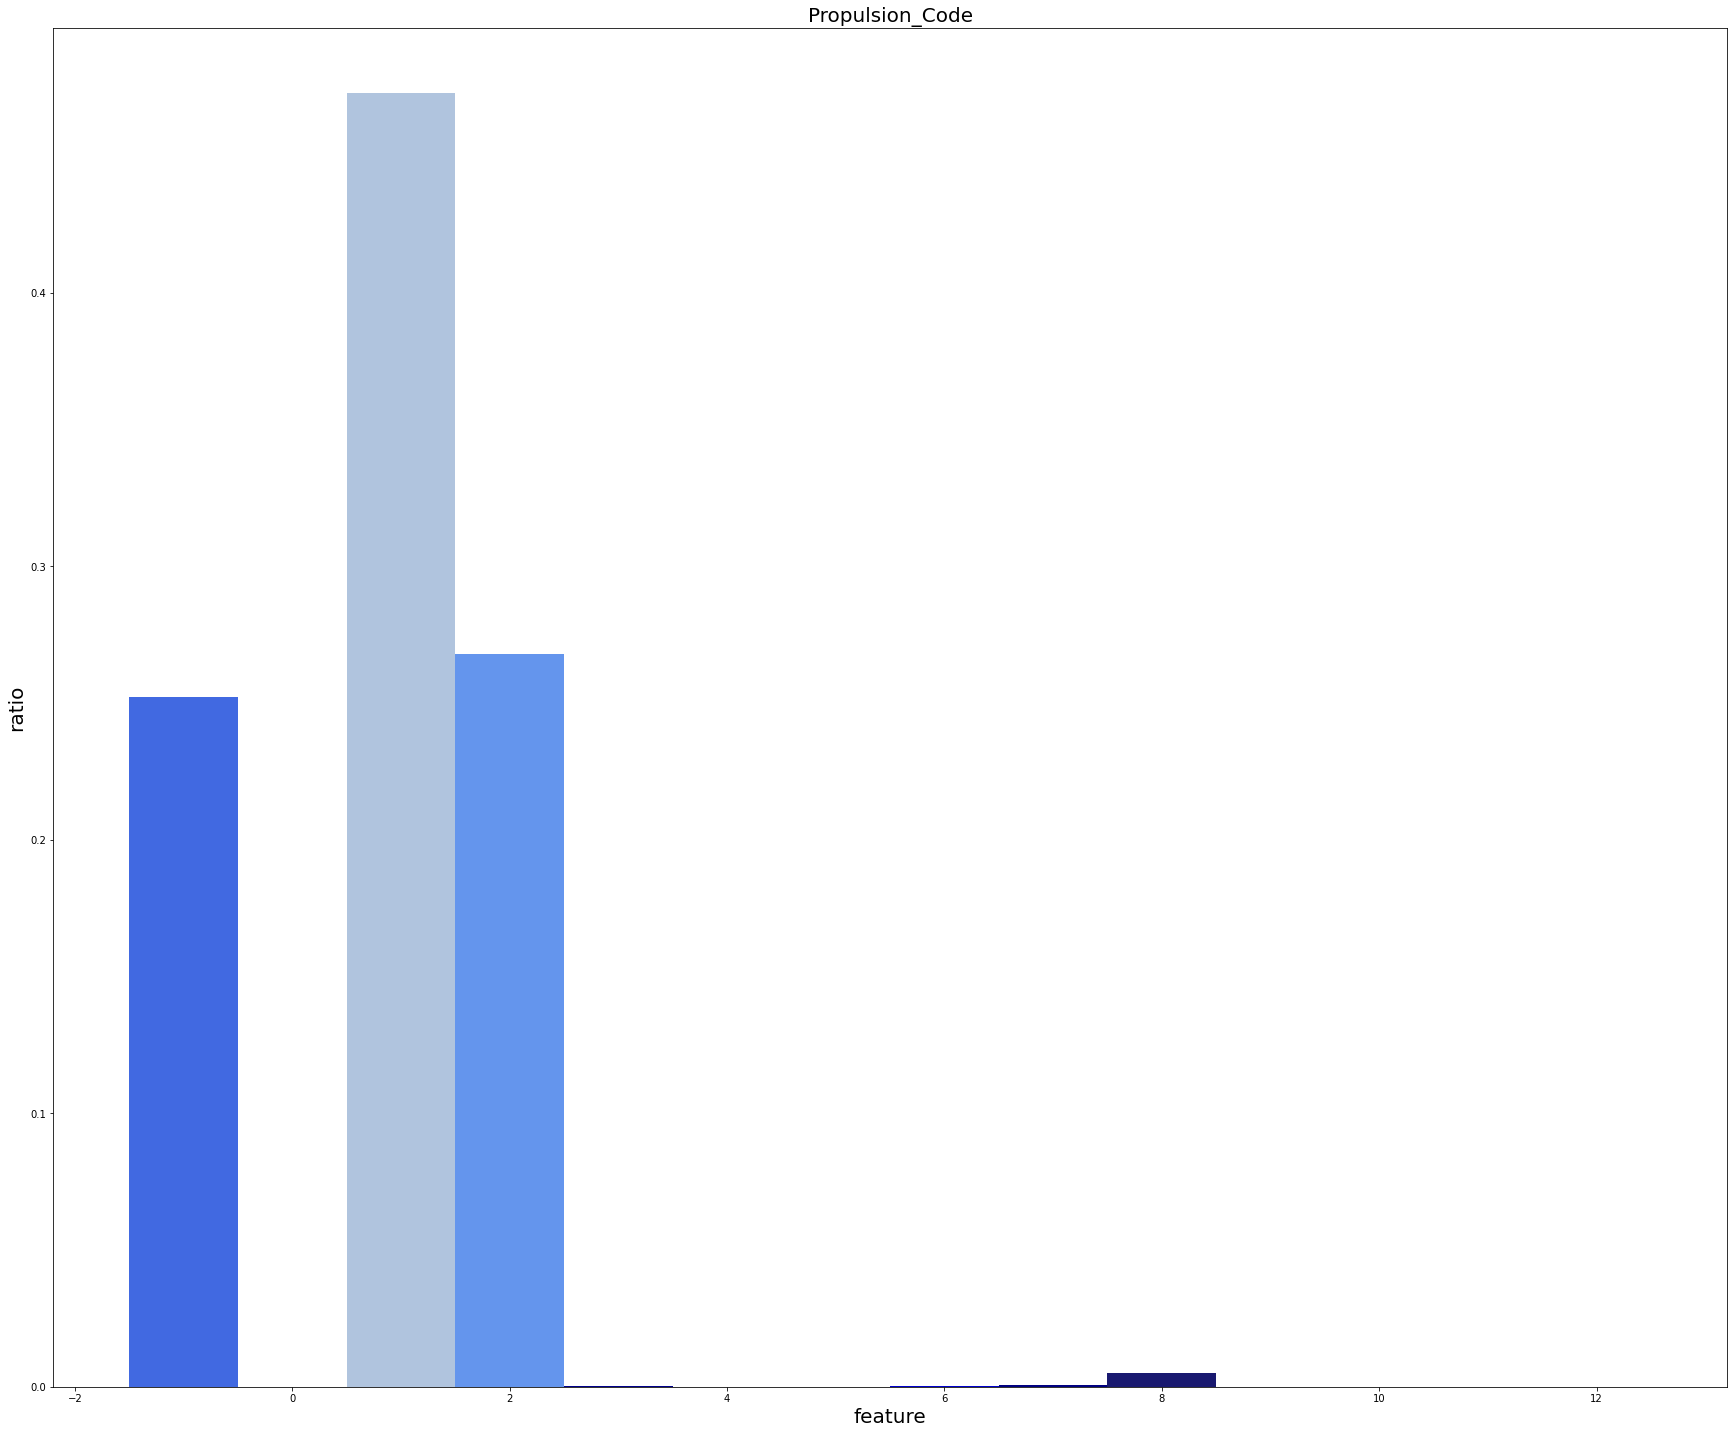

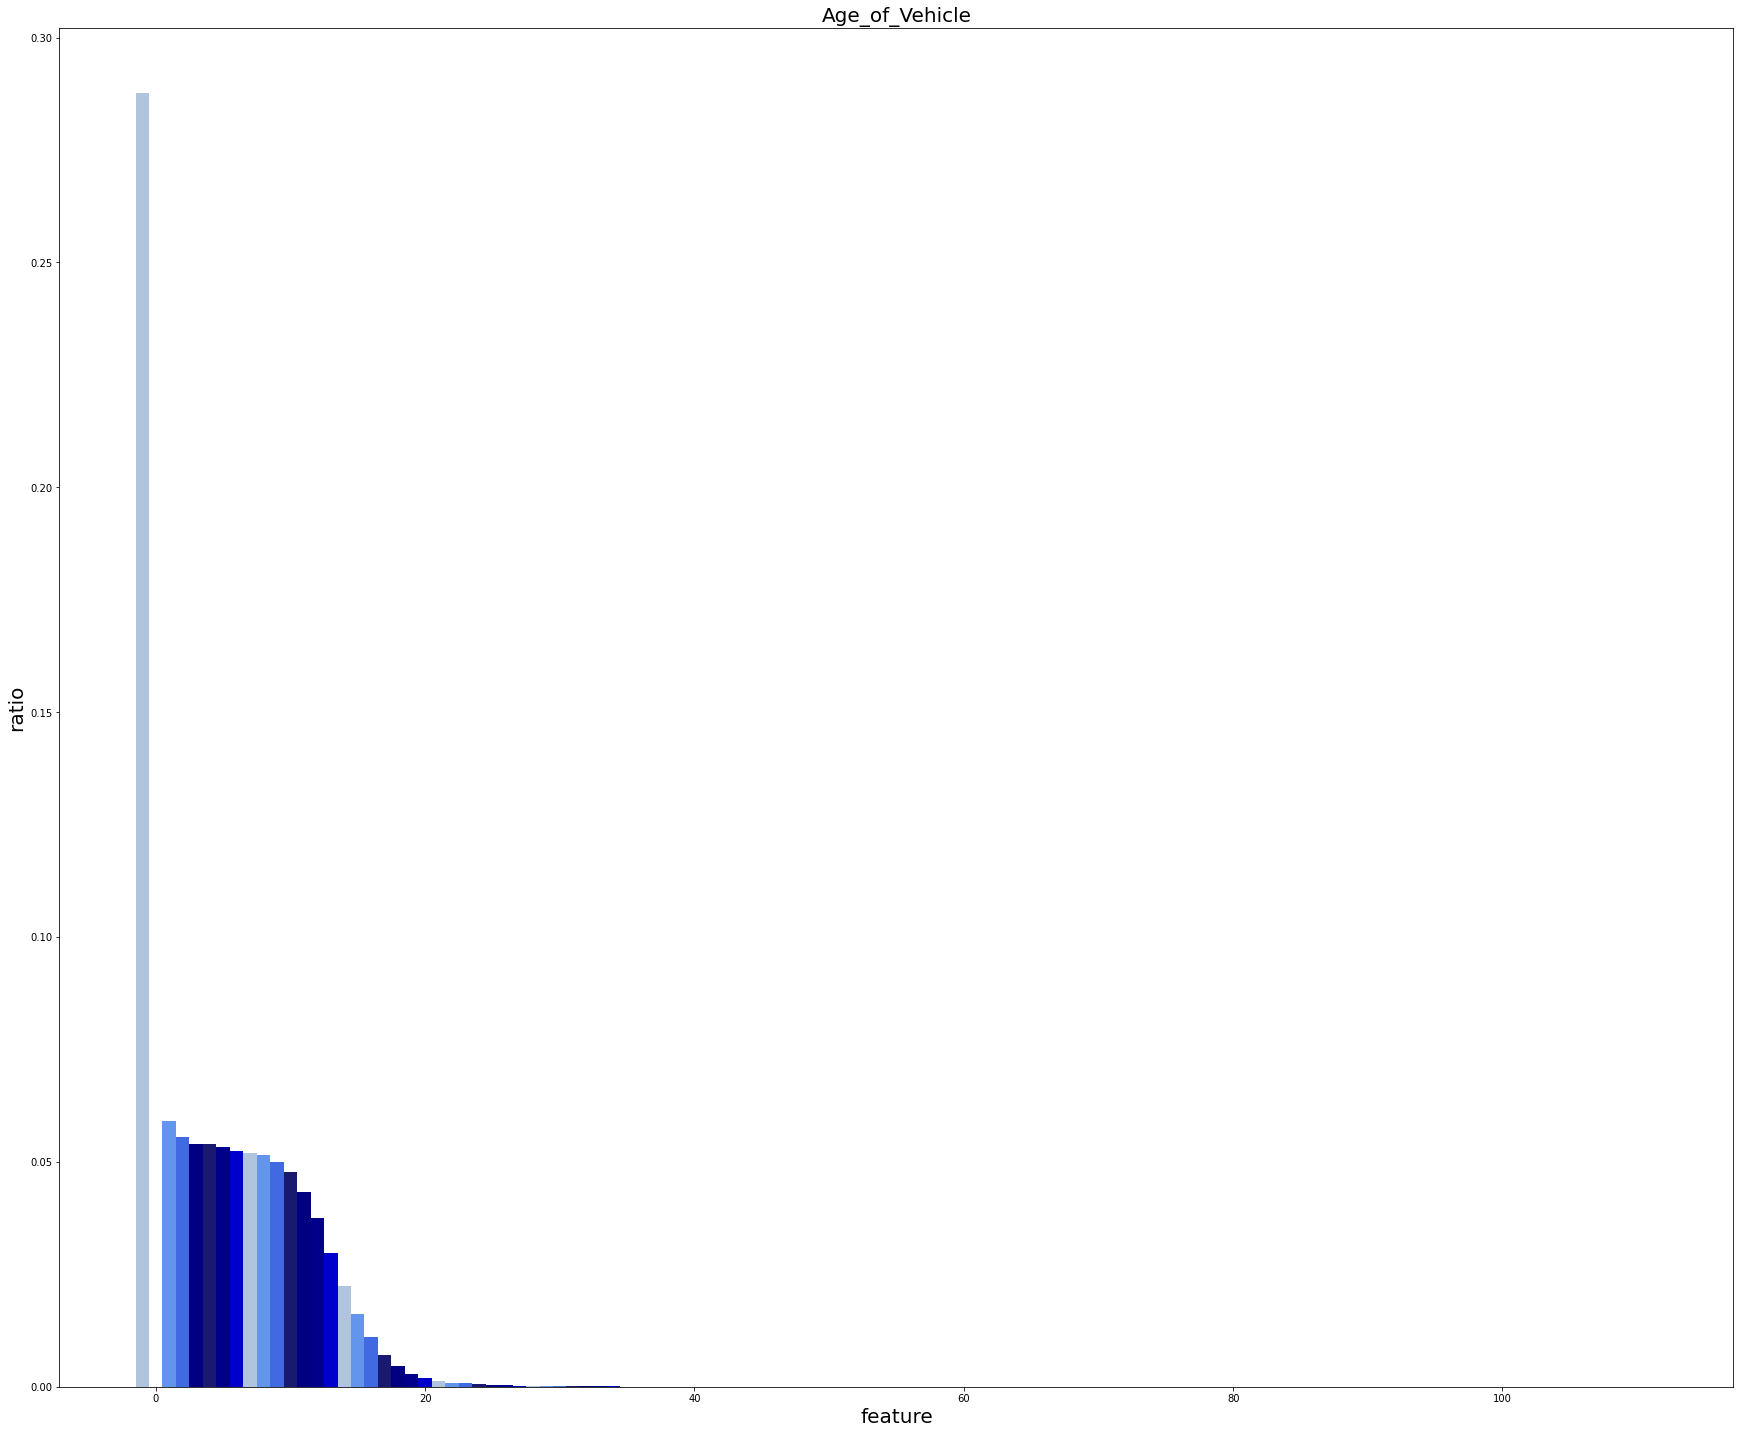

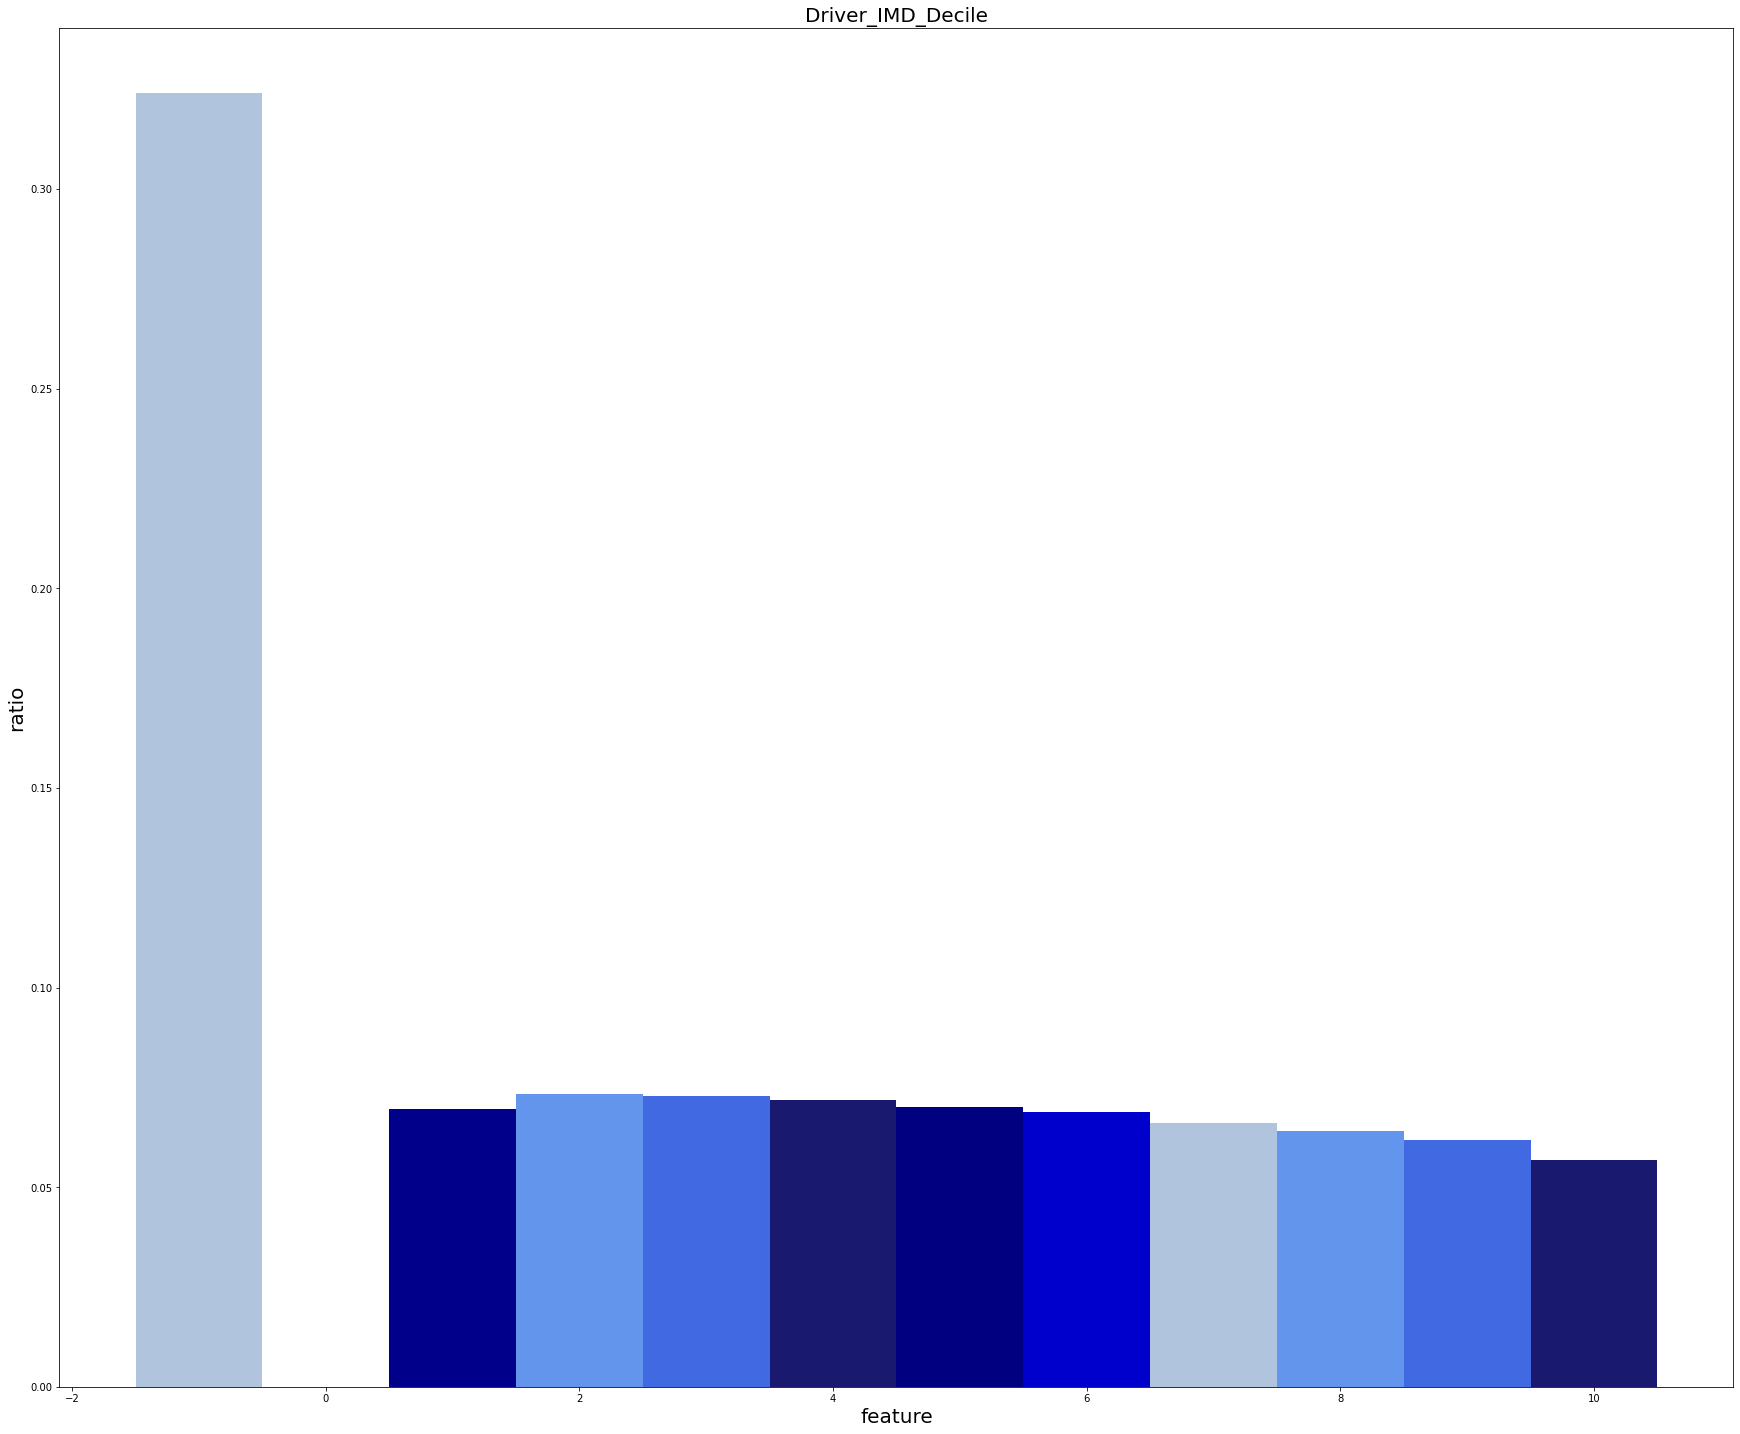

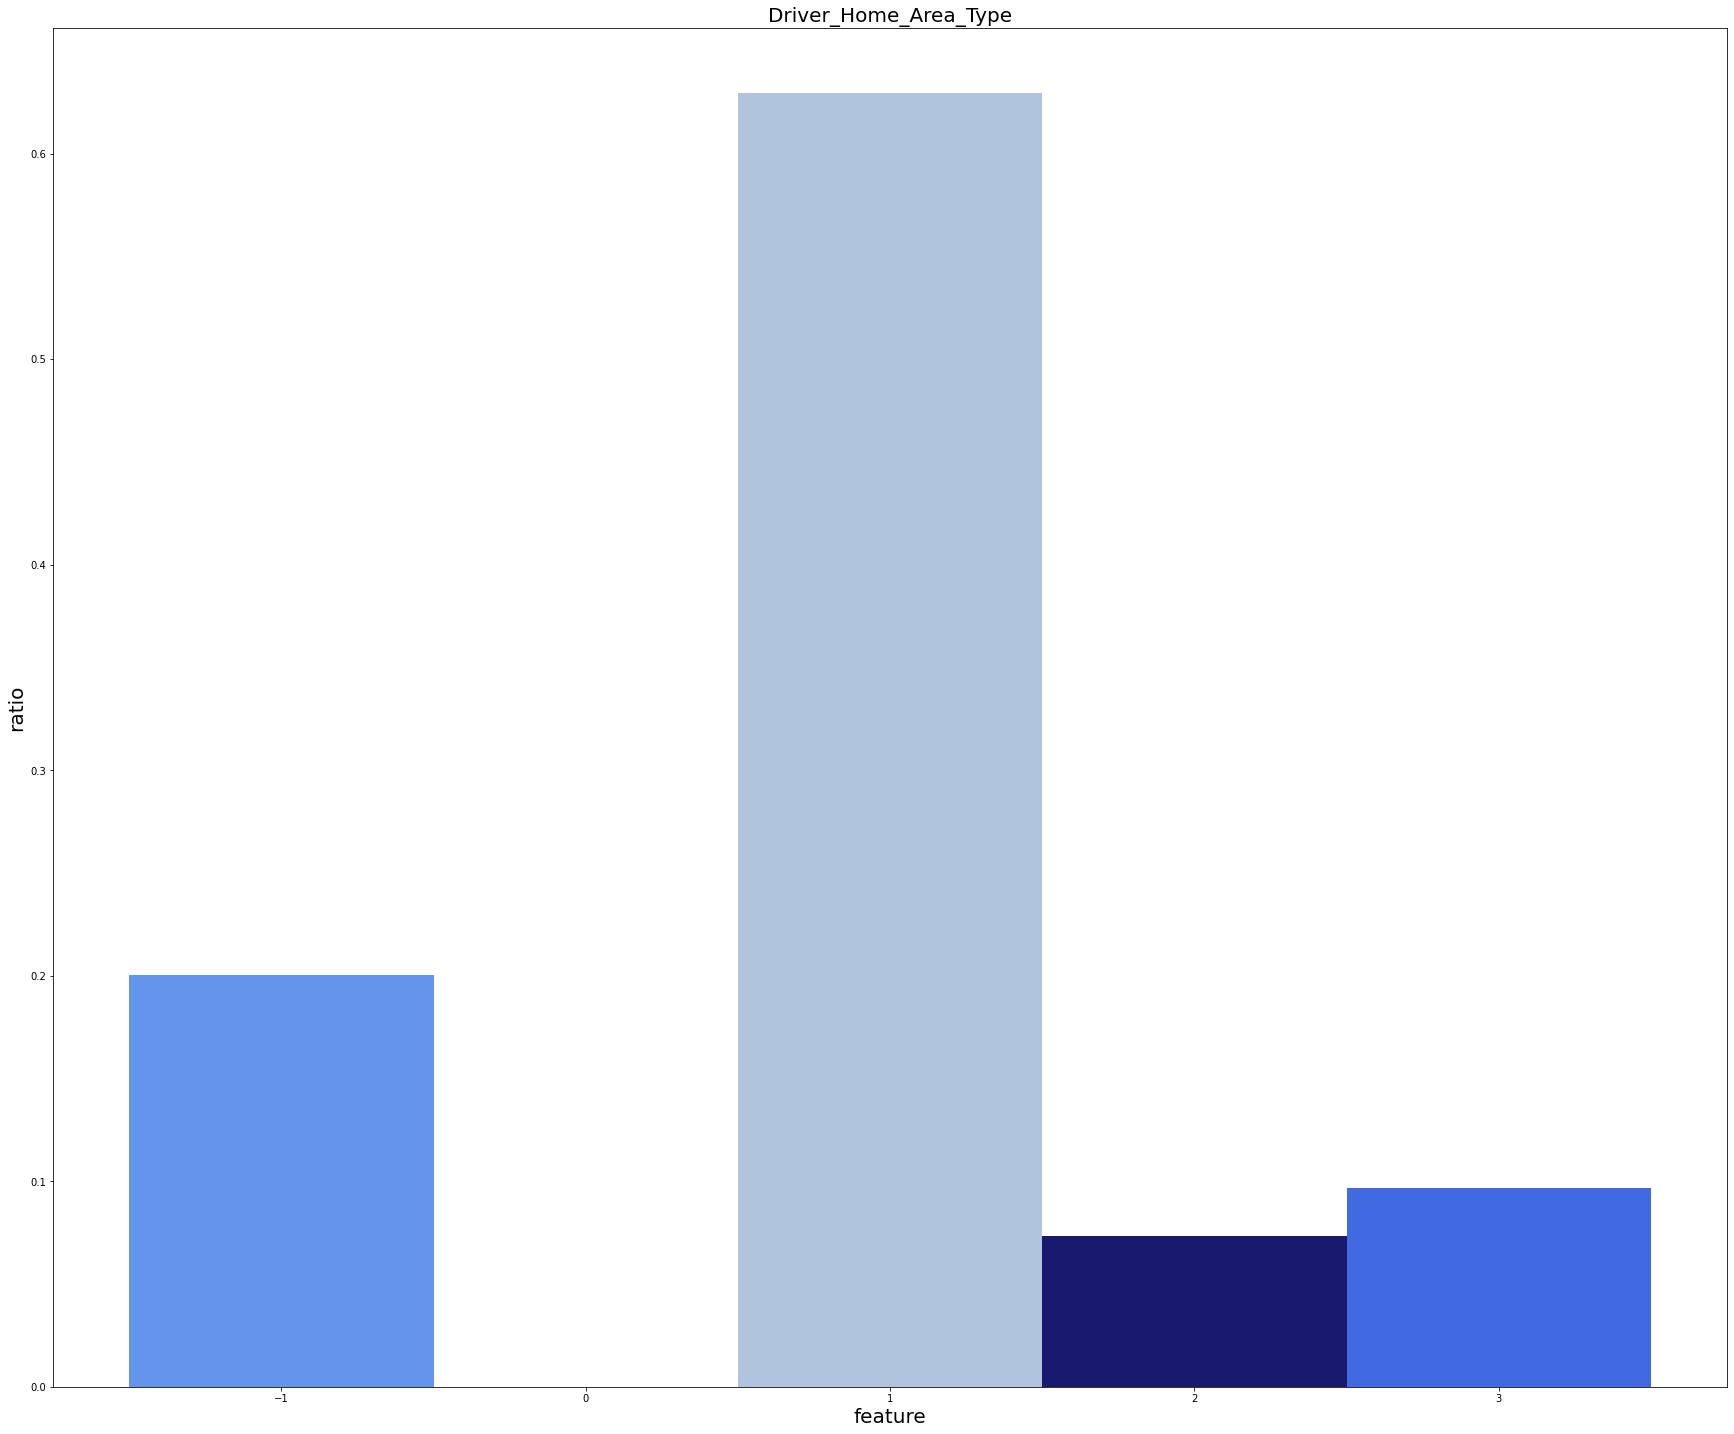

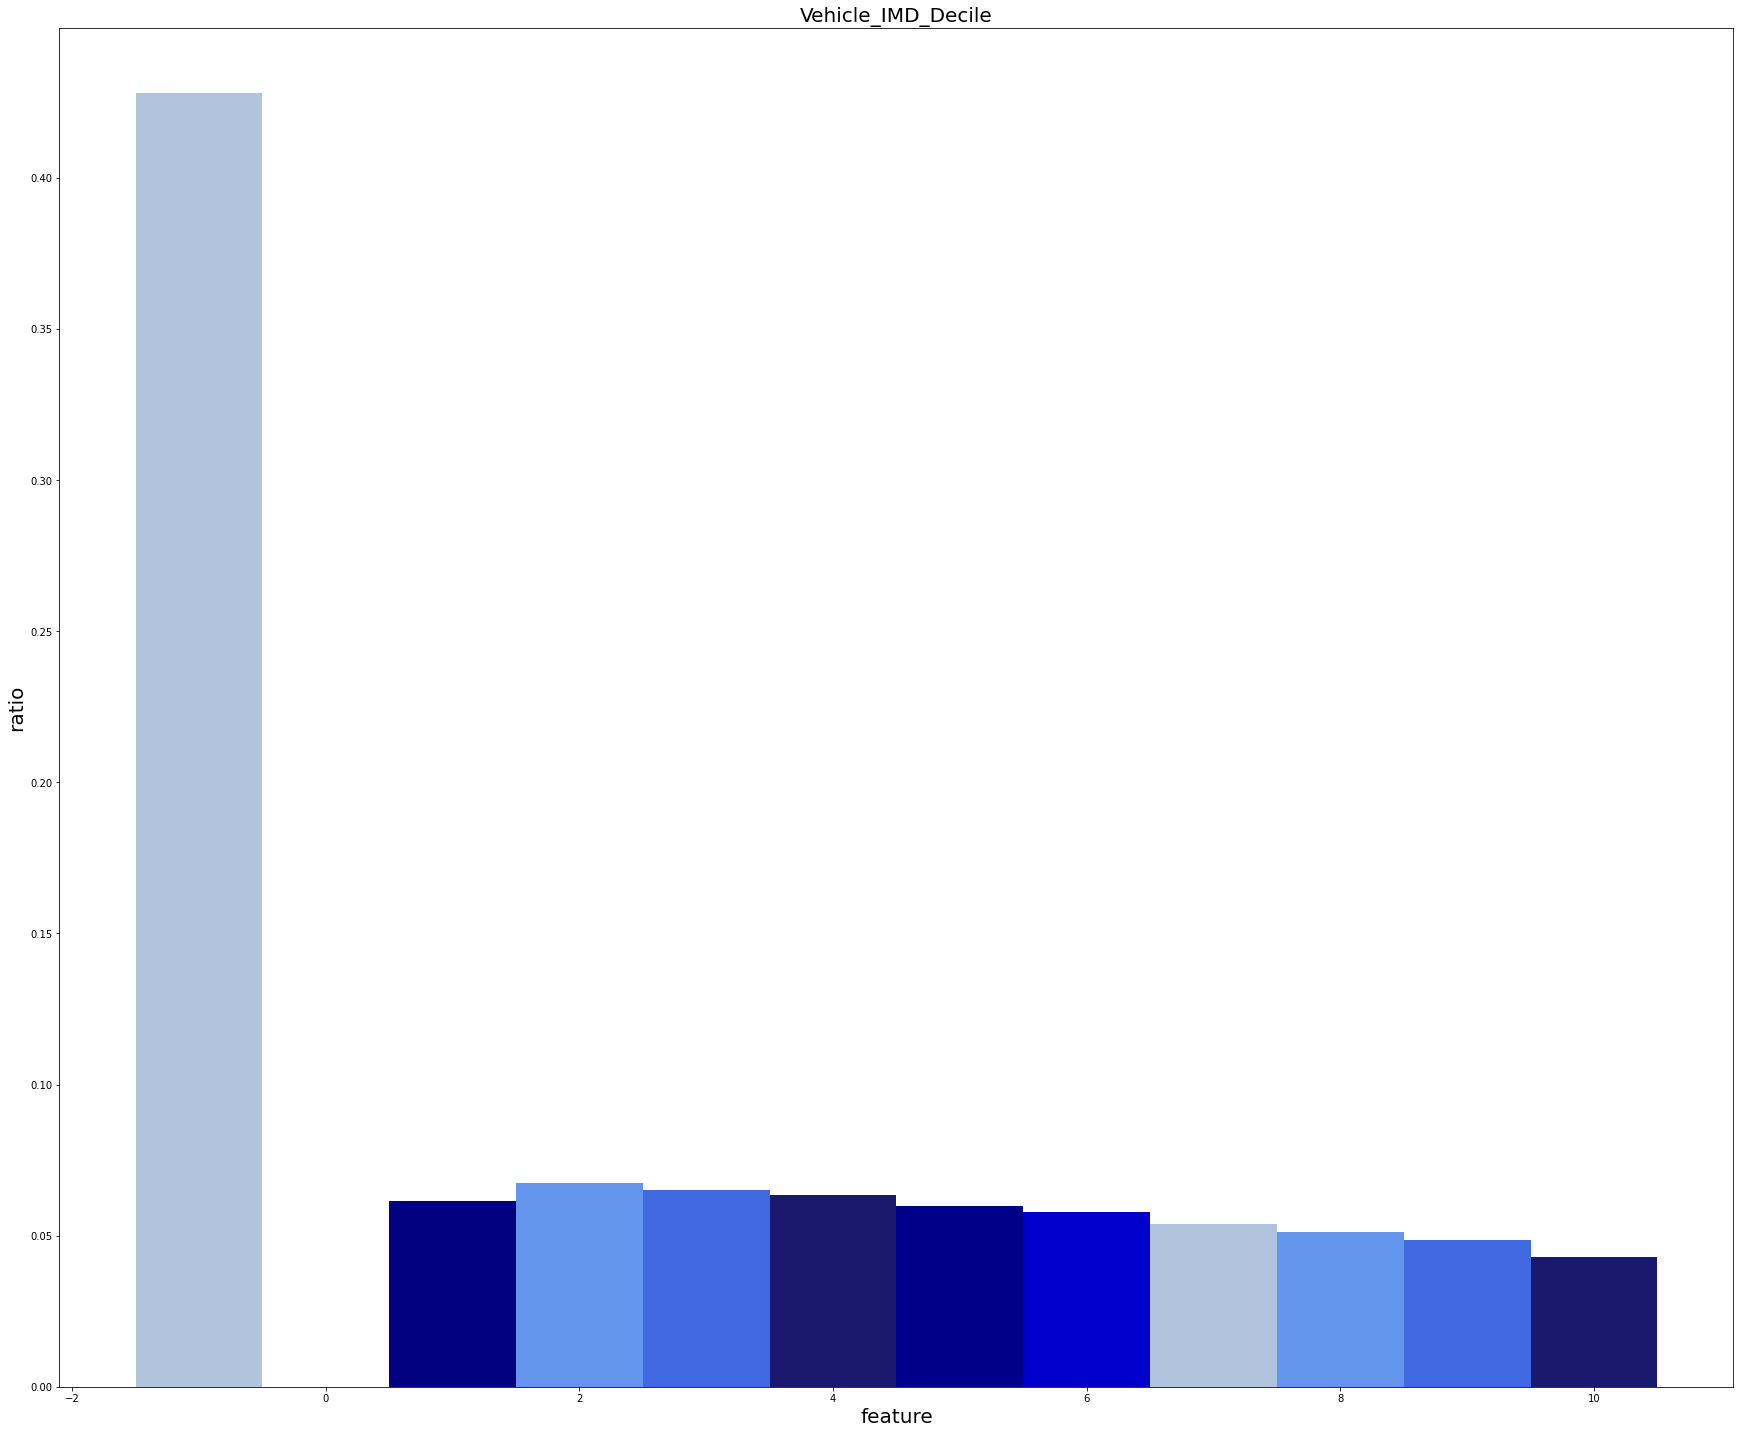

In [13]:
feature_count(vehicles_df, vehicle_columns)

In [4]:
merged_df = pd.merge(accidents_df[['Accident_Index', 'Accident_Severity']], vehicles_df,
                    on='Accident_Index')

In [5]:
len(merged_df)

4088330

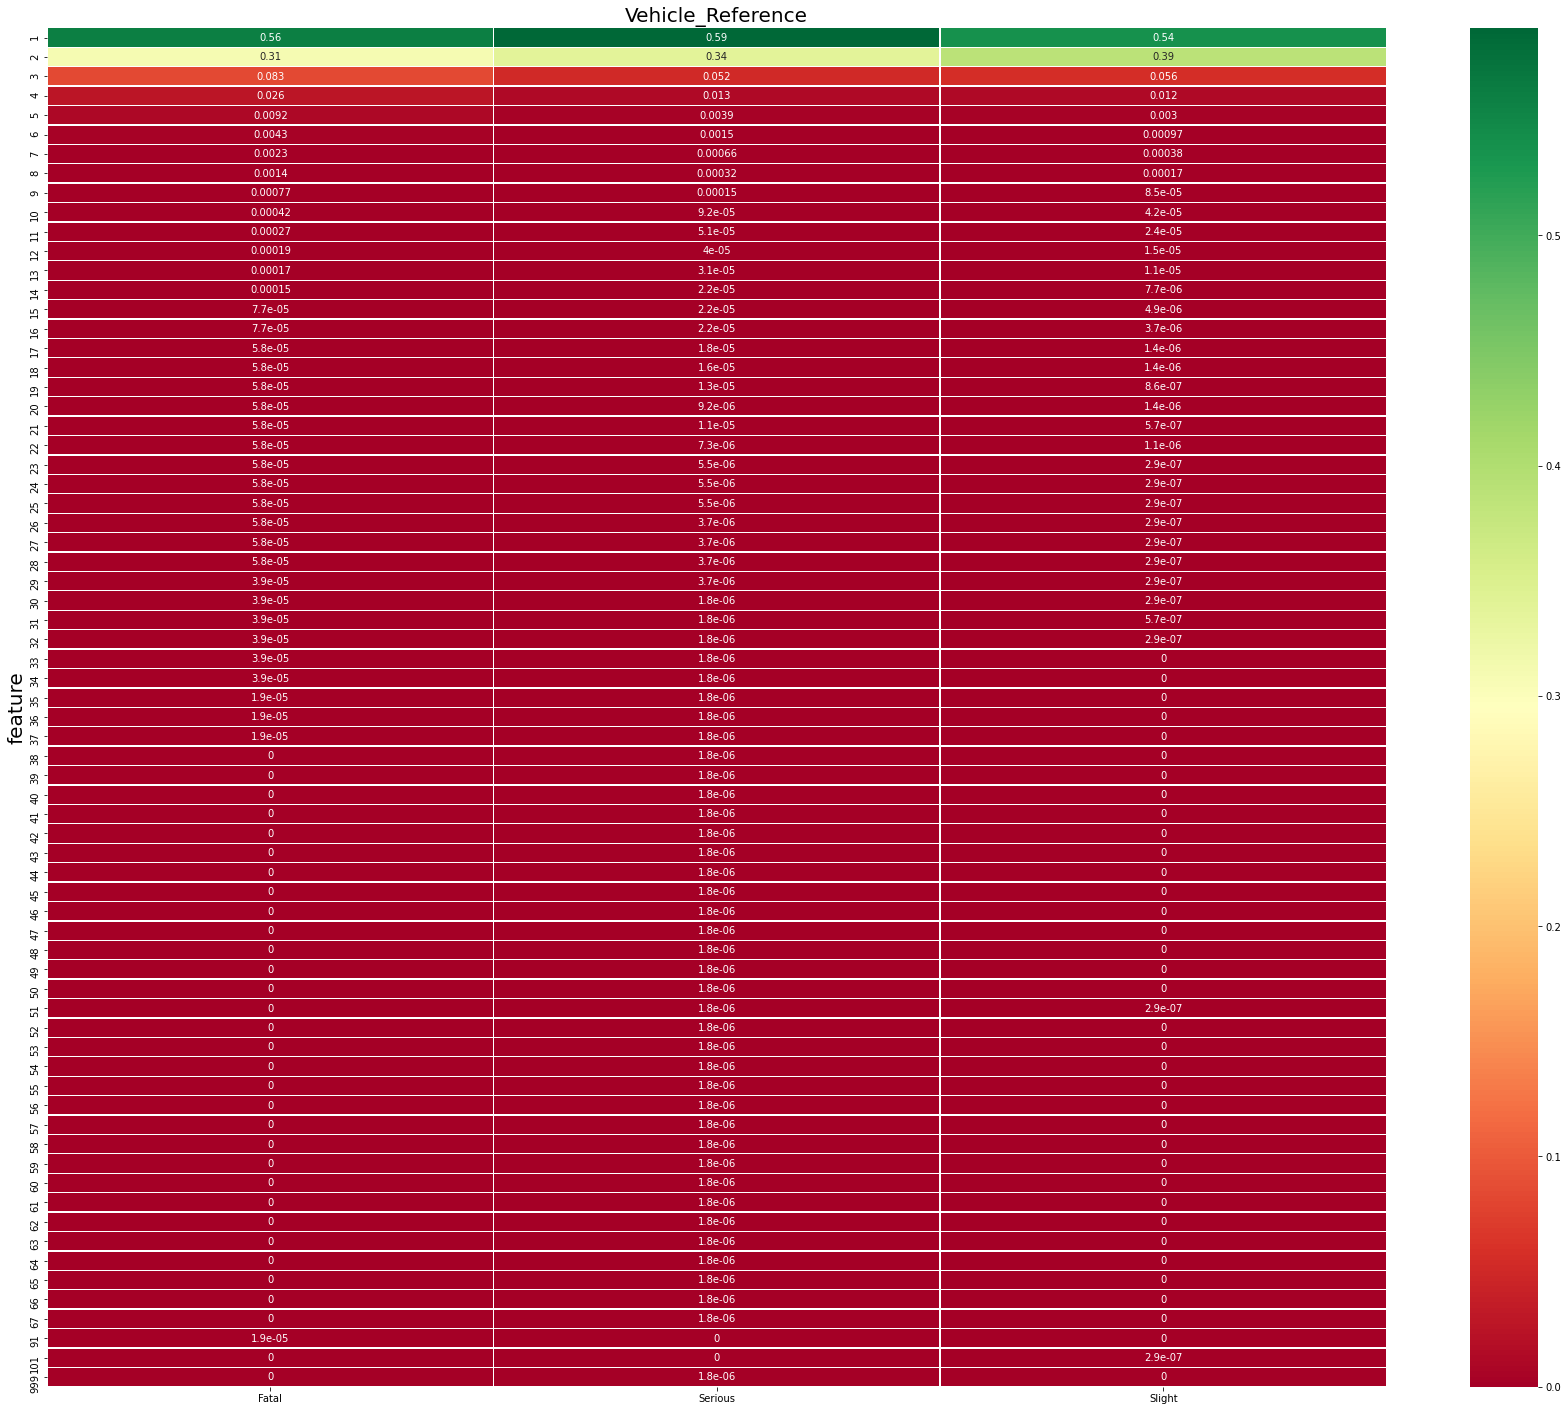

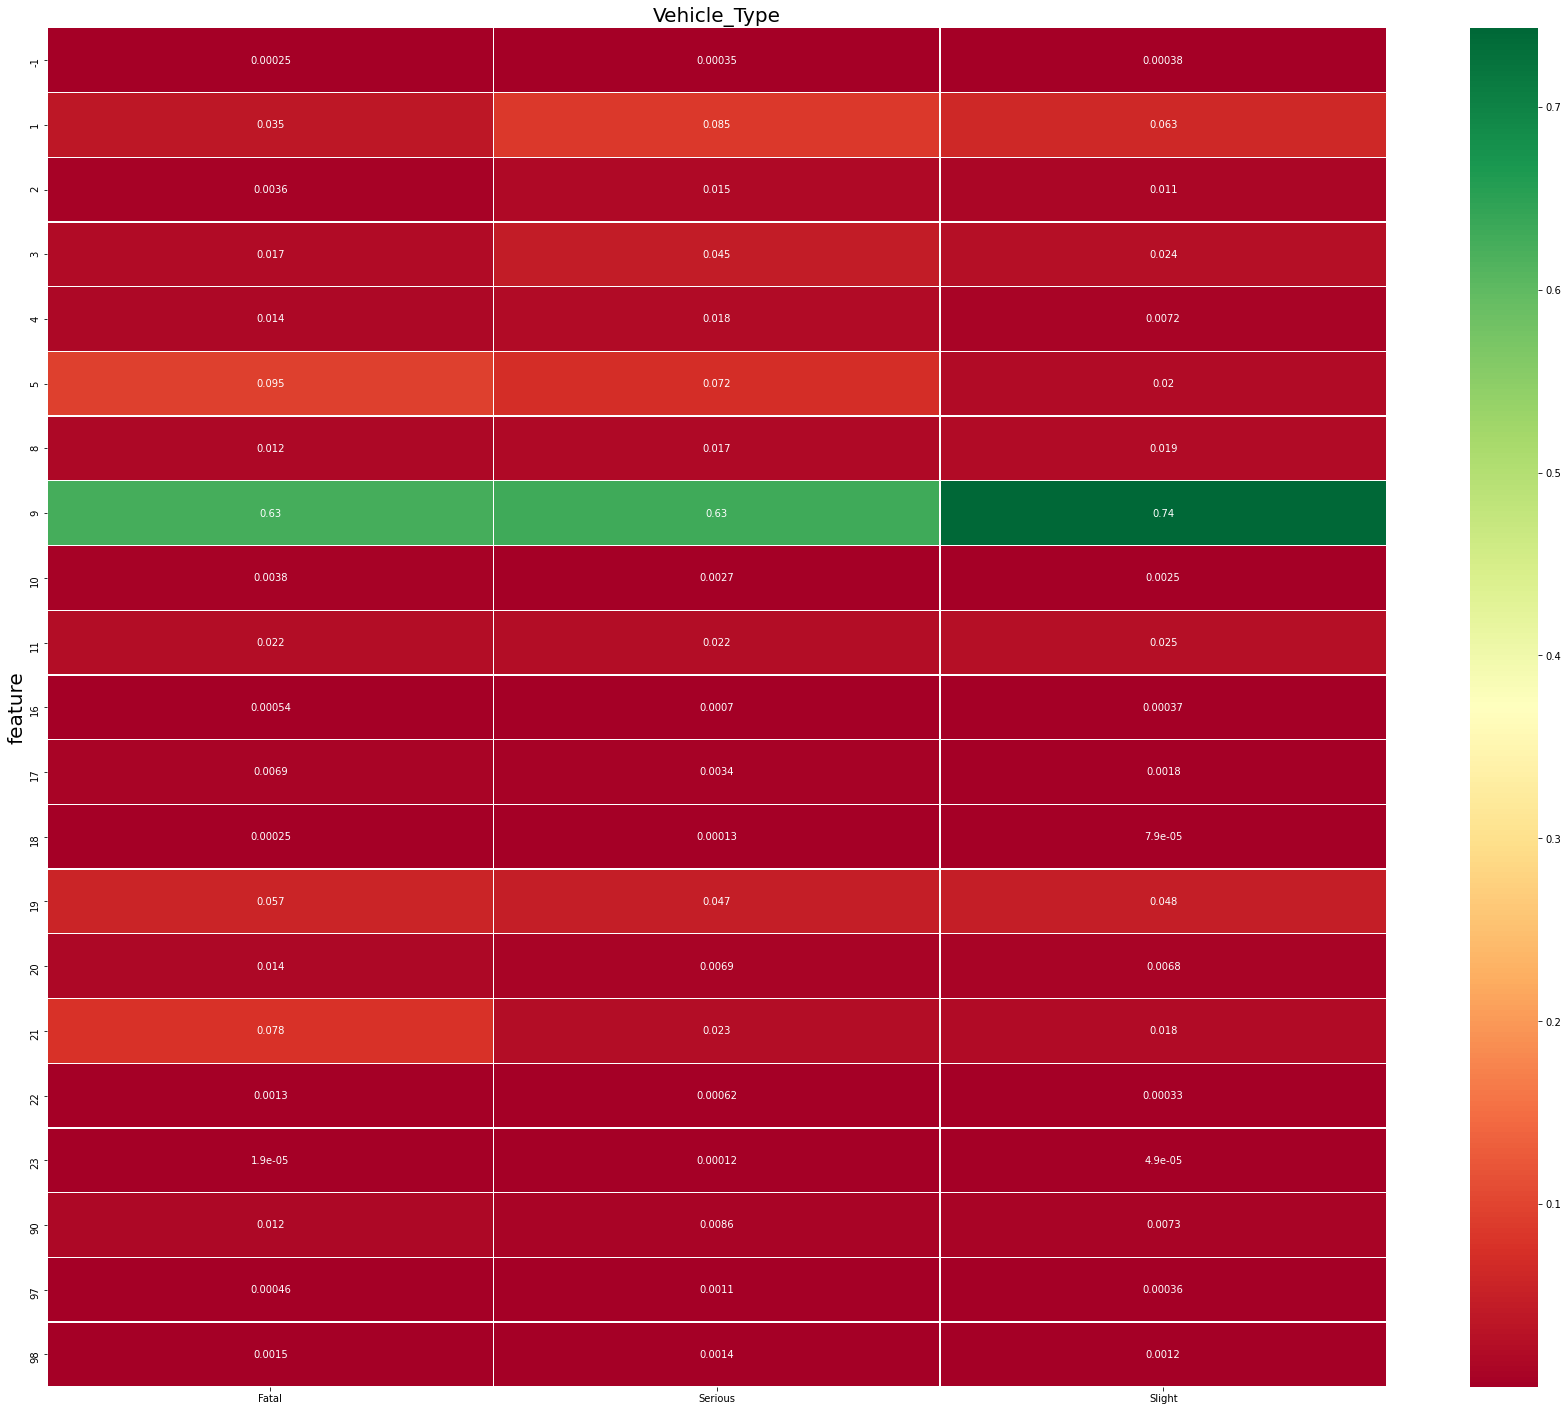

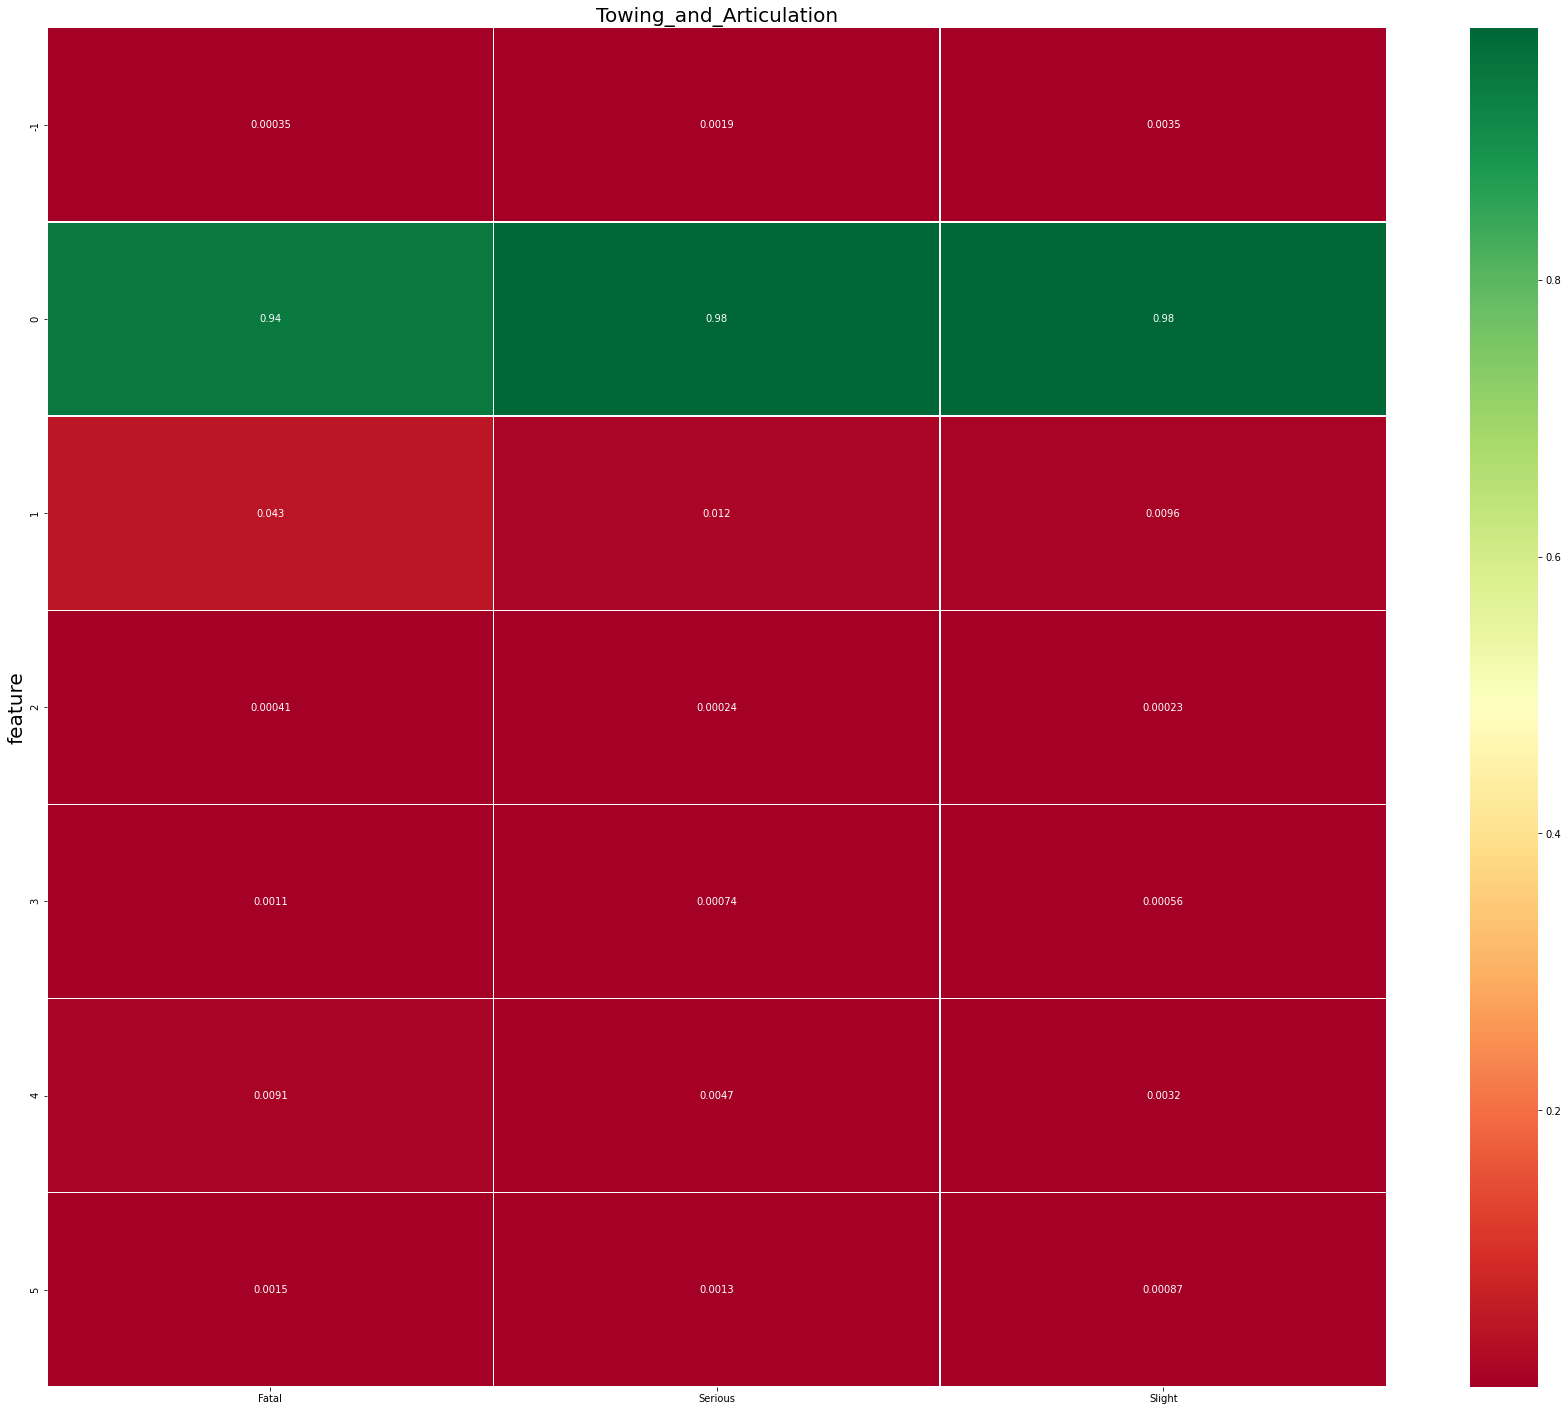

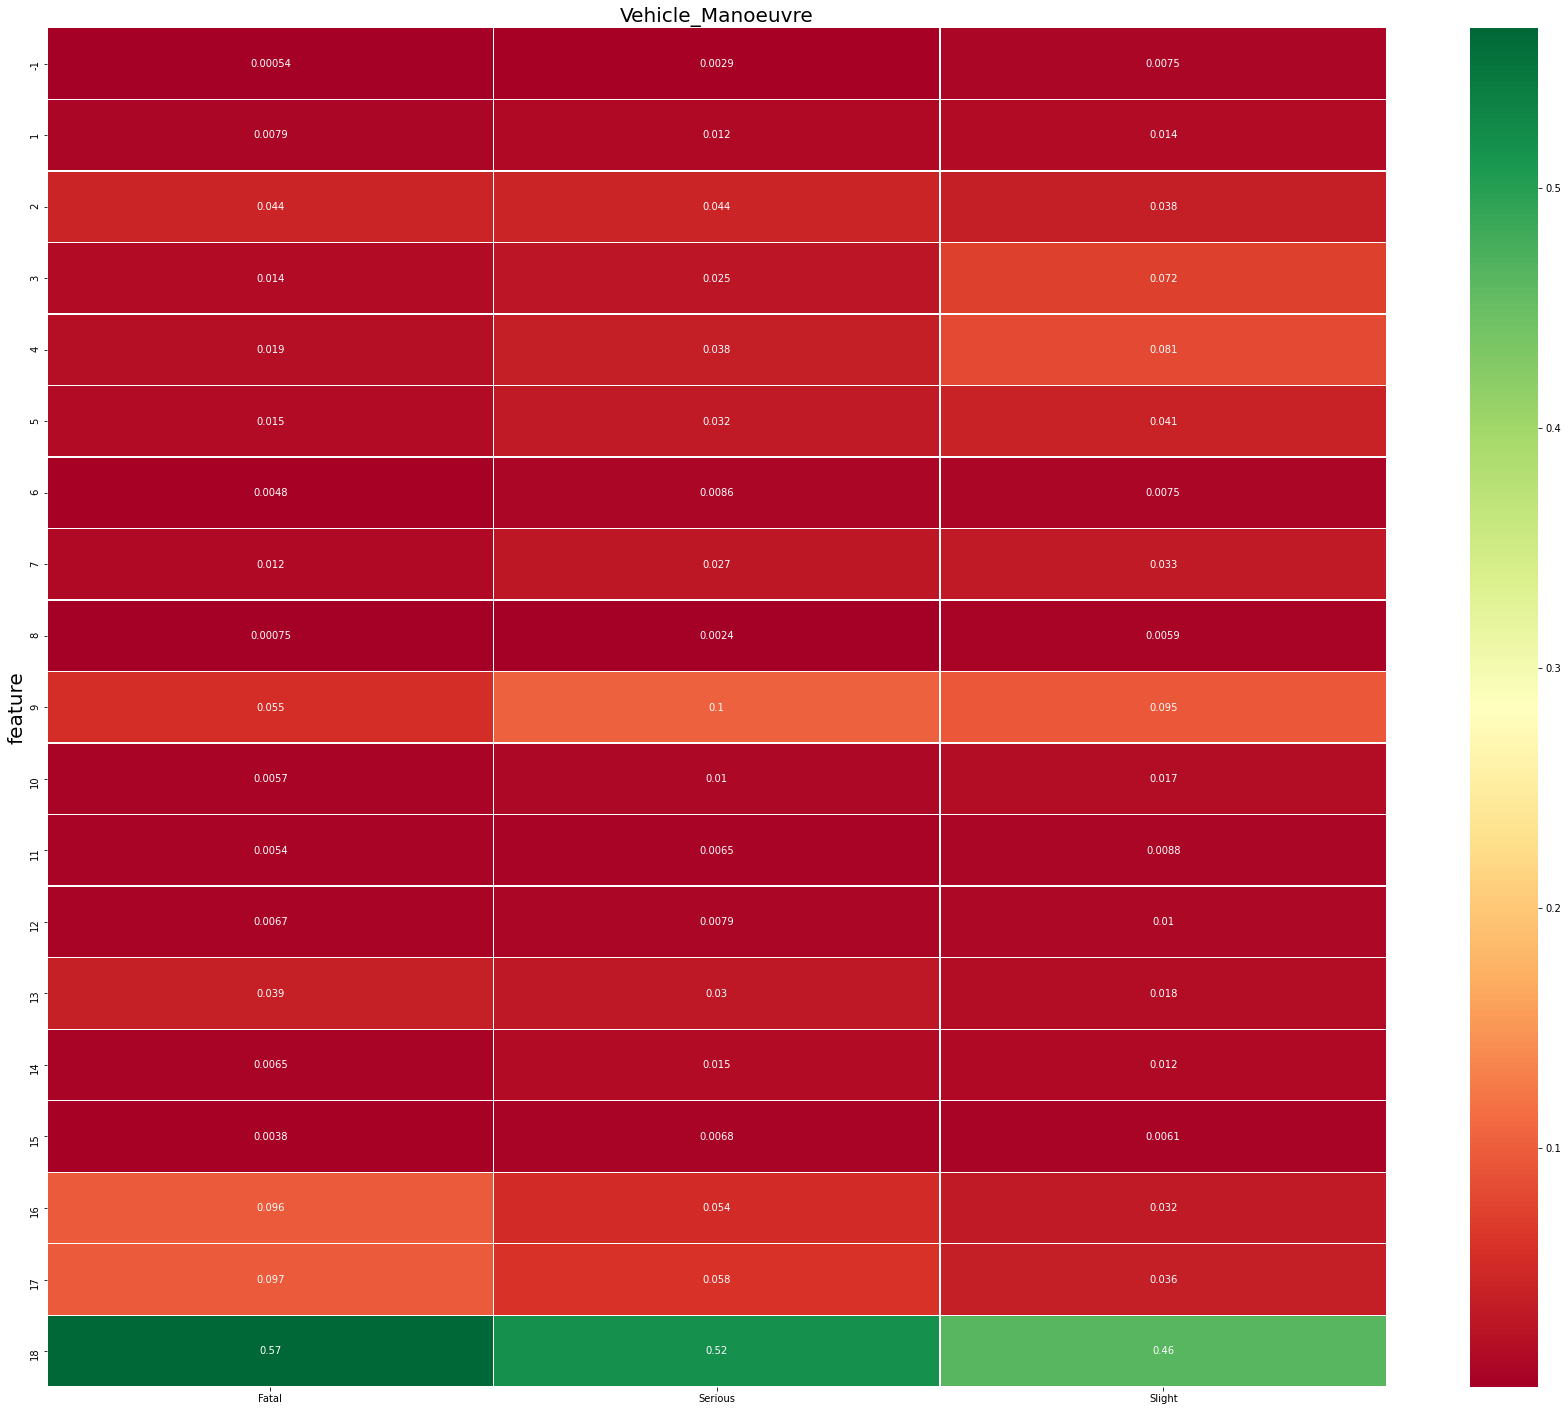

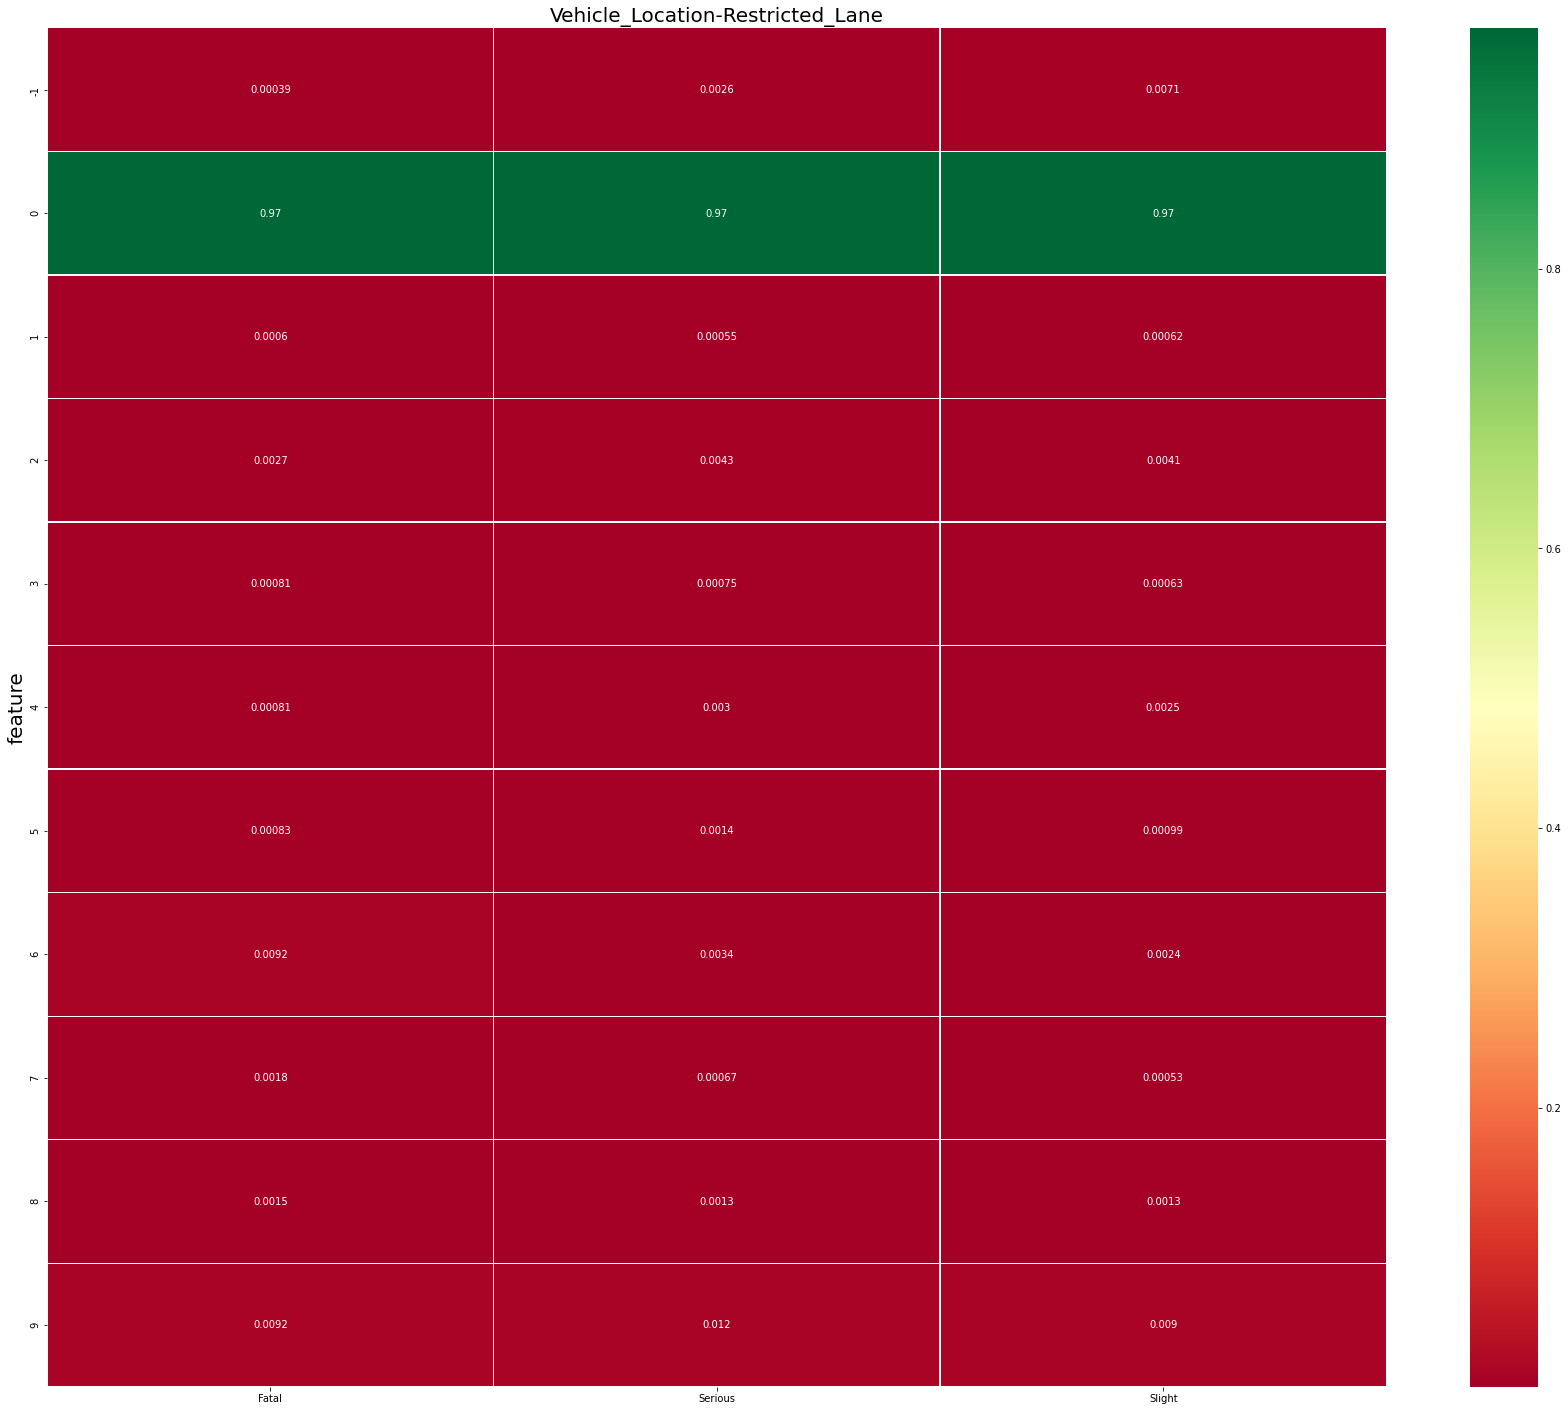

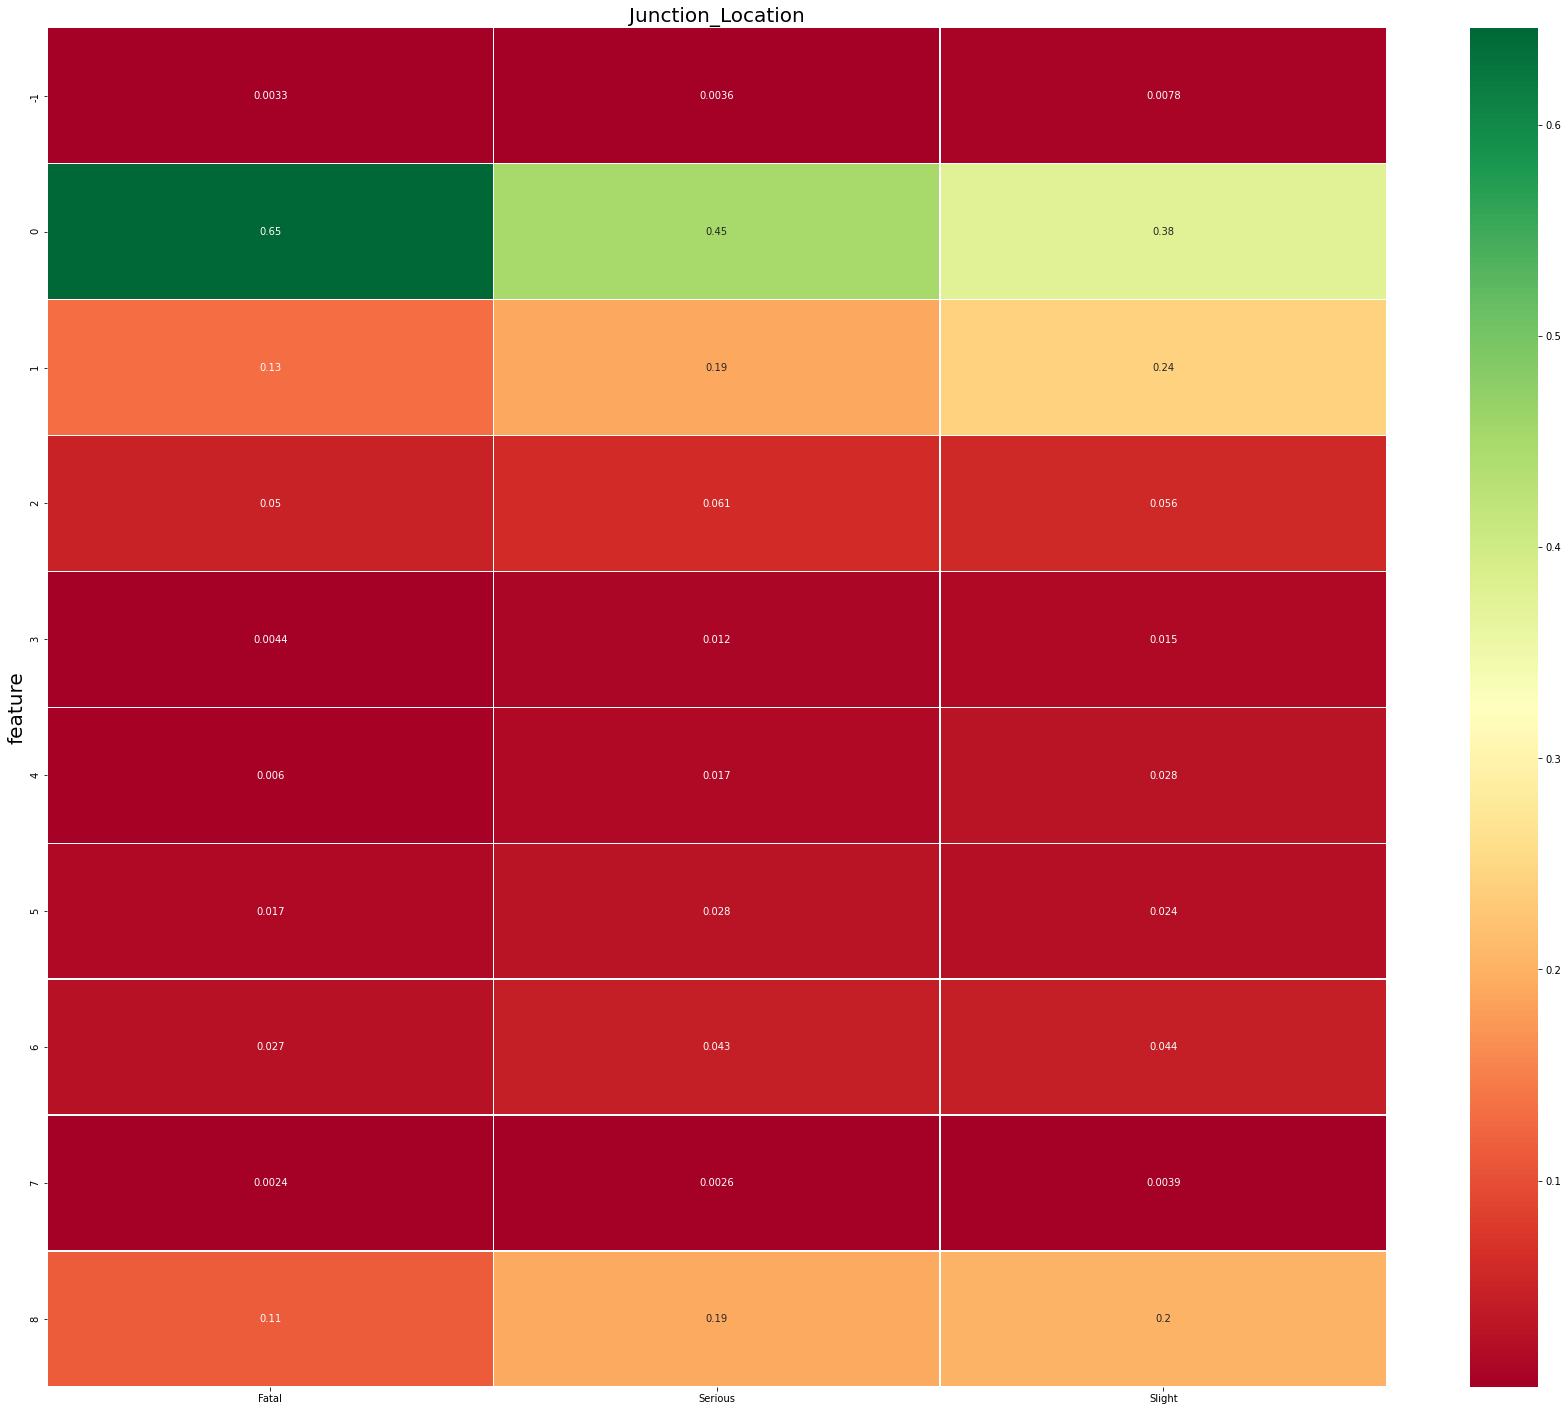

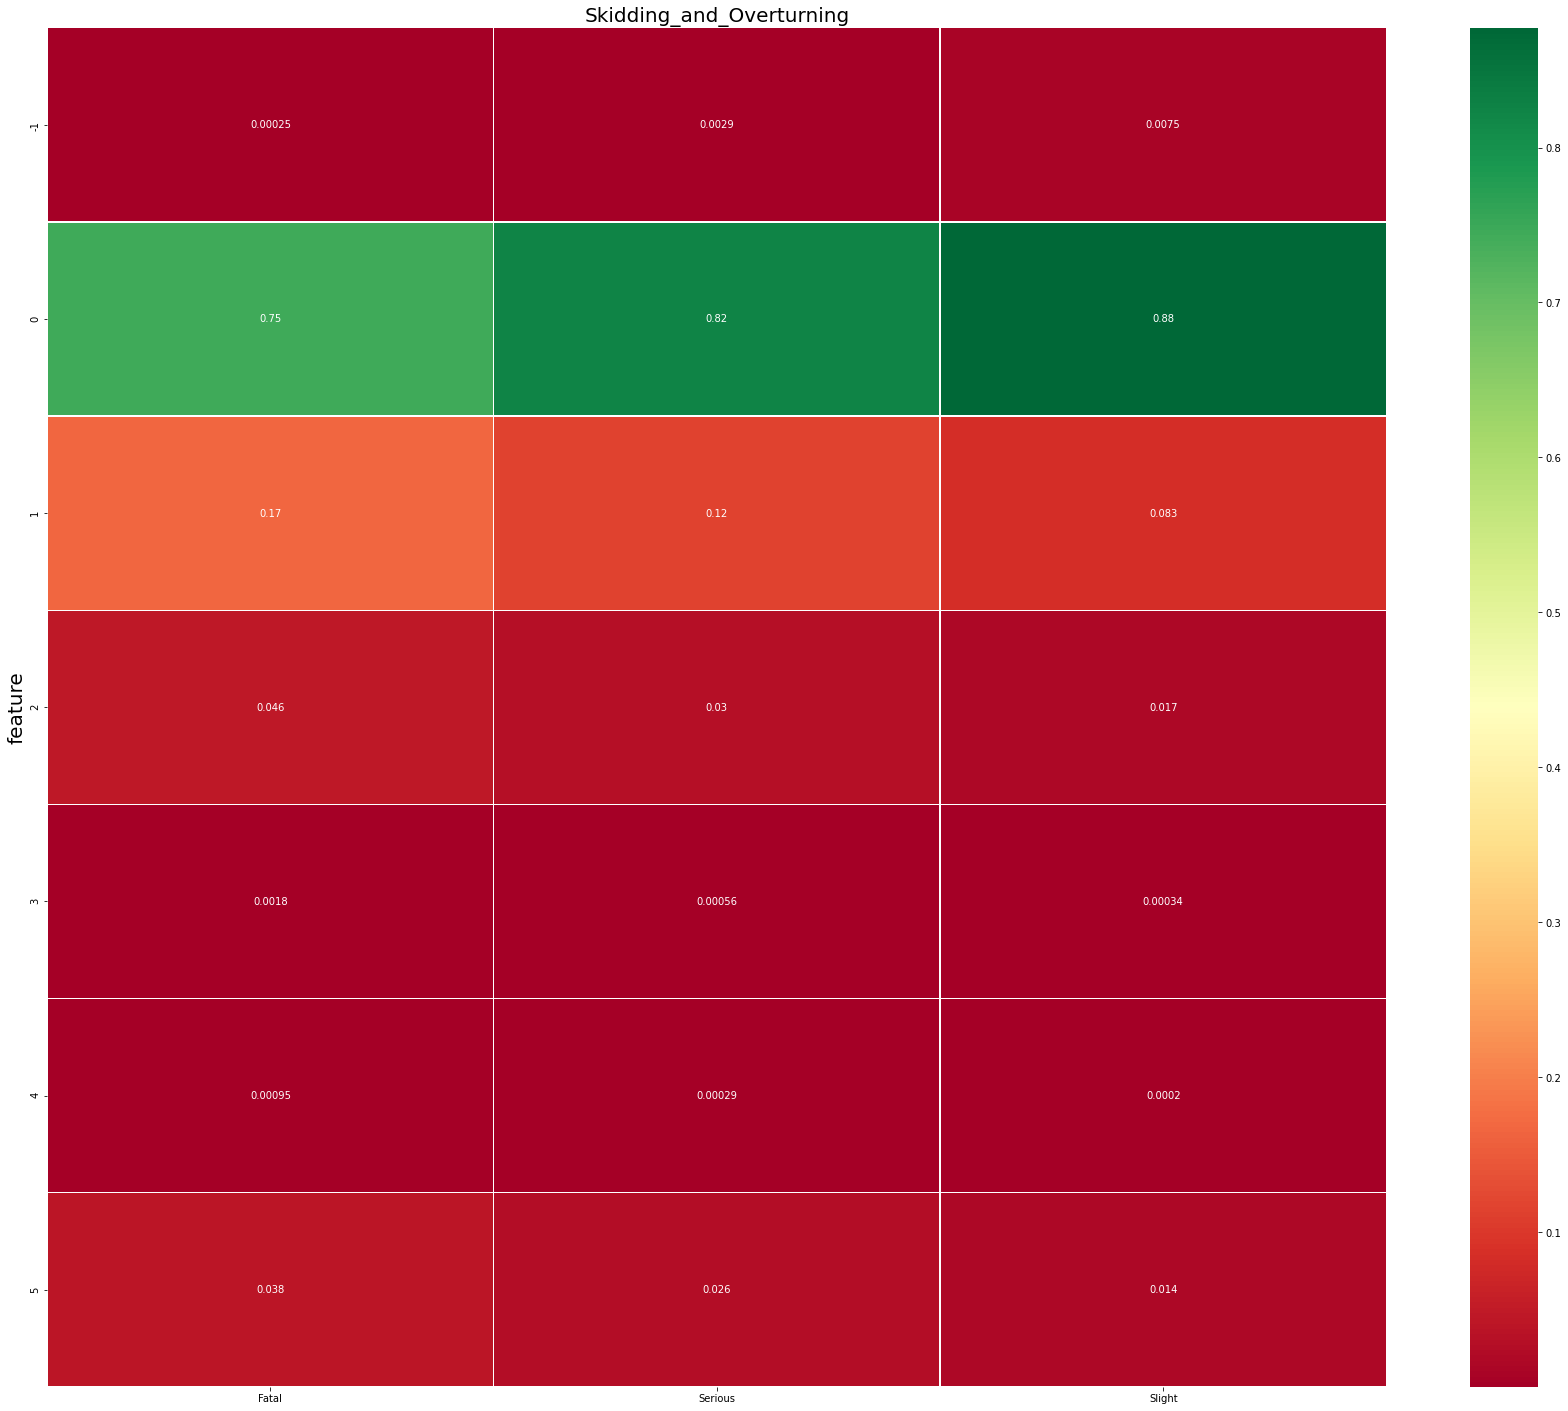

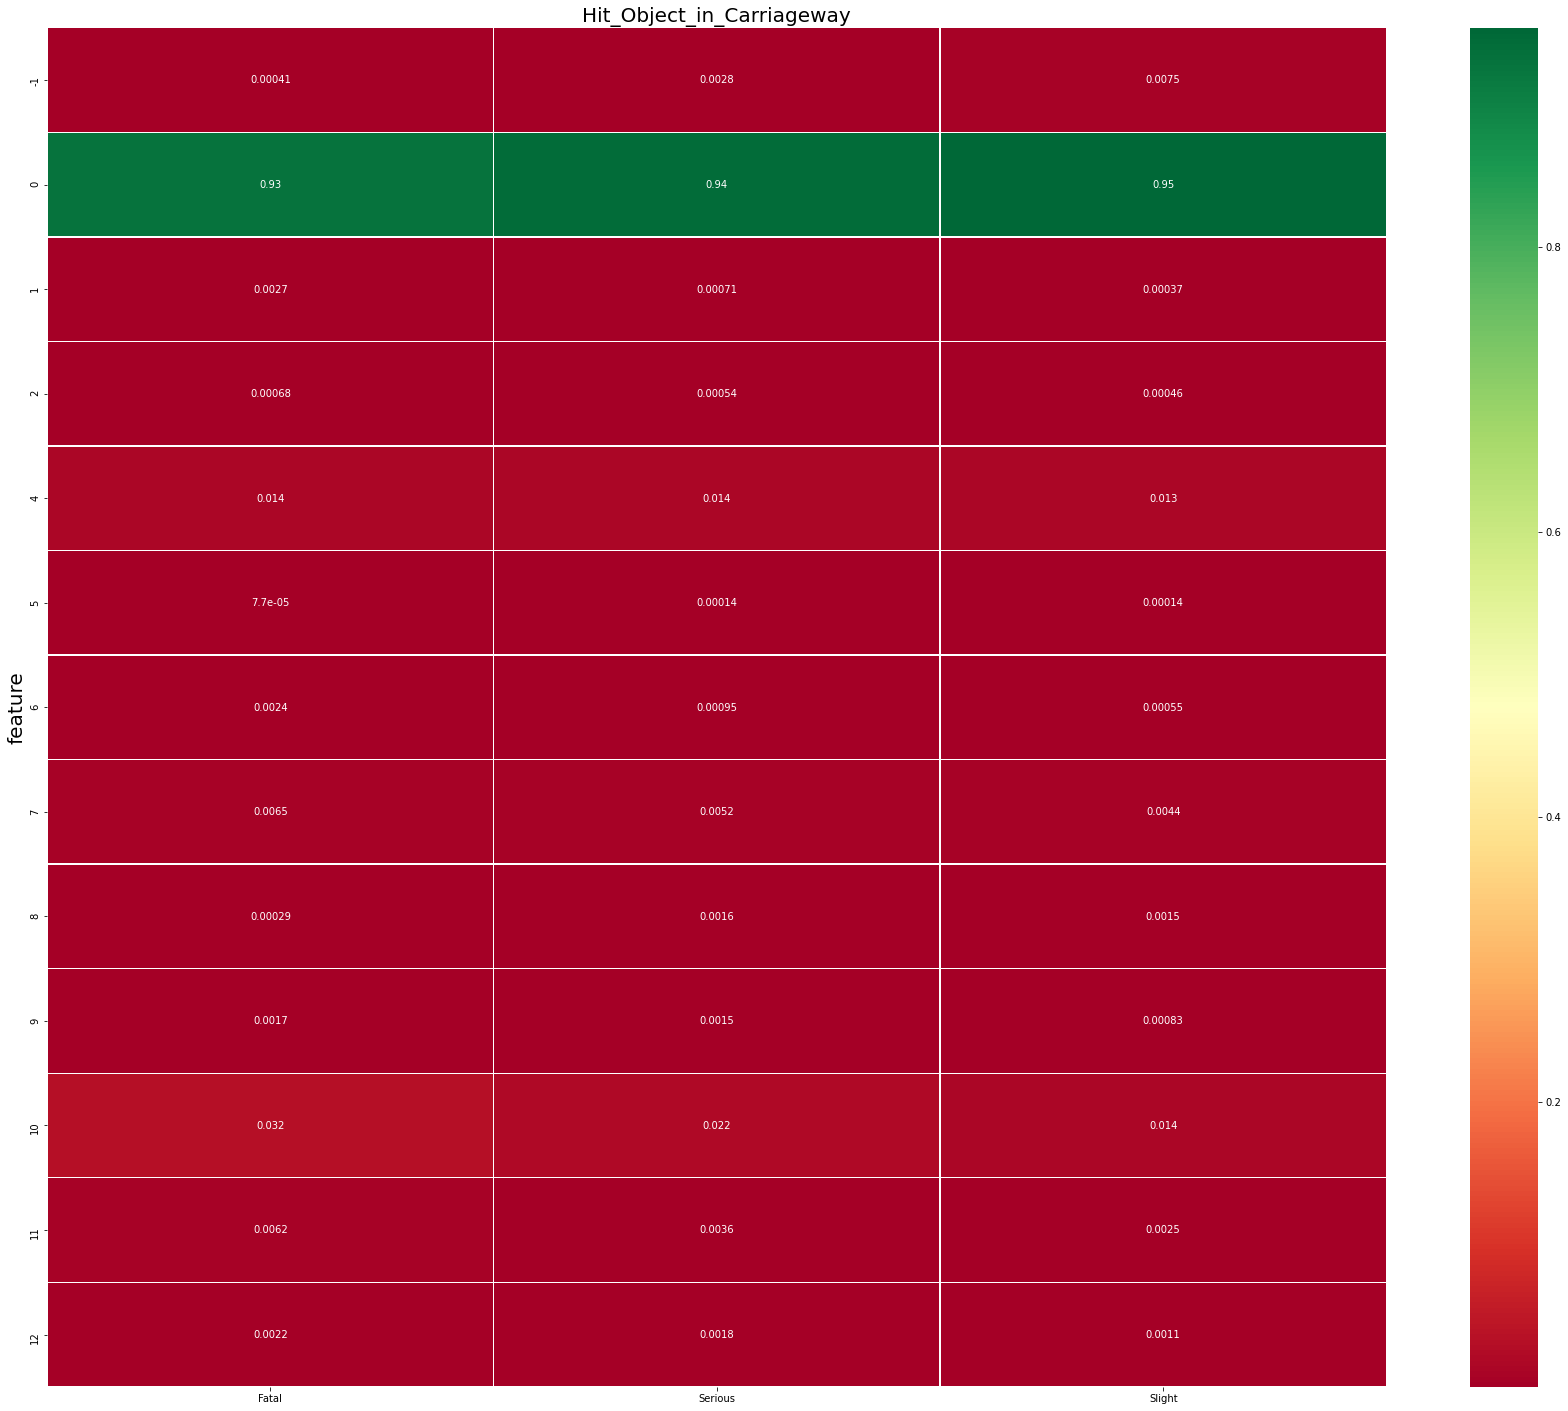

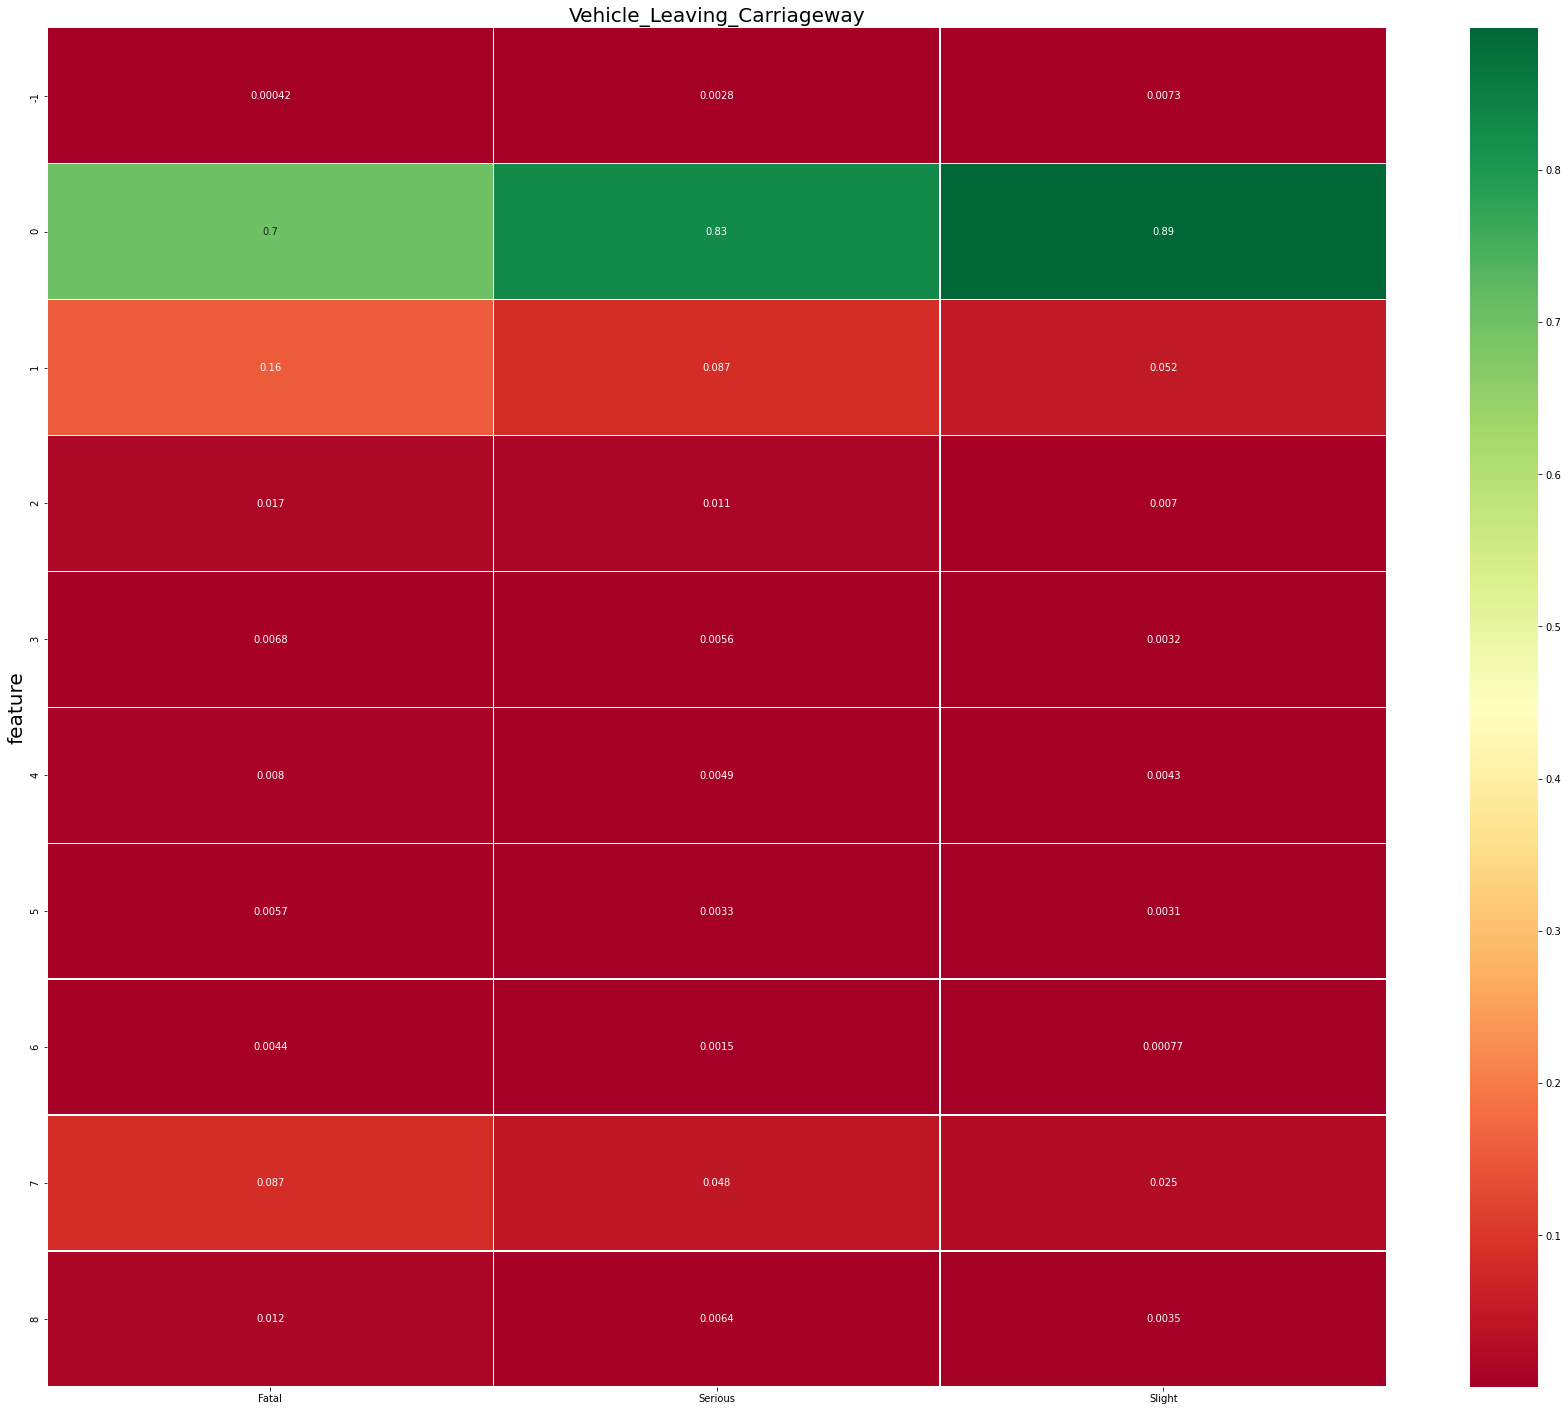

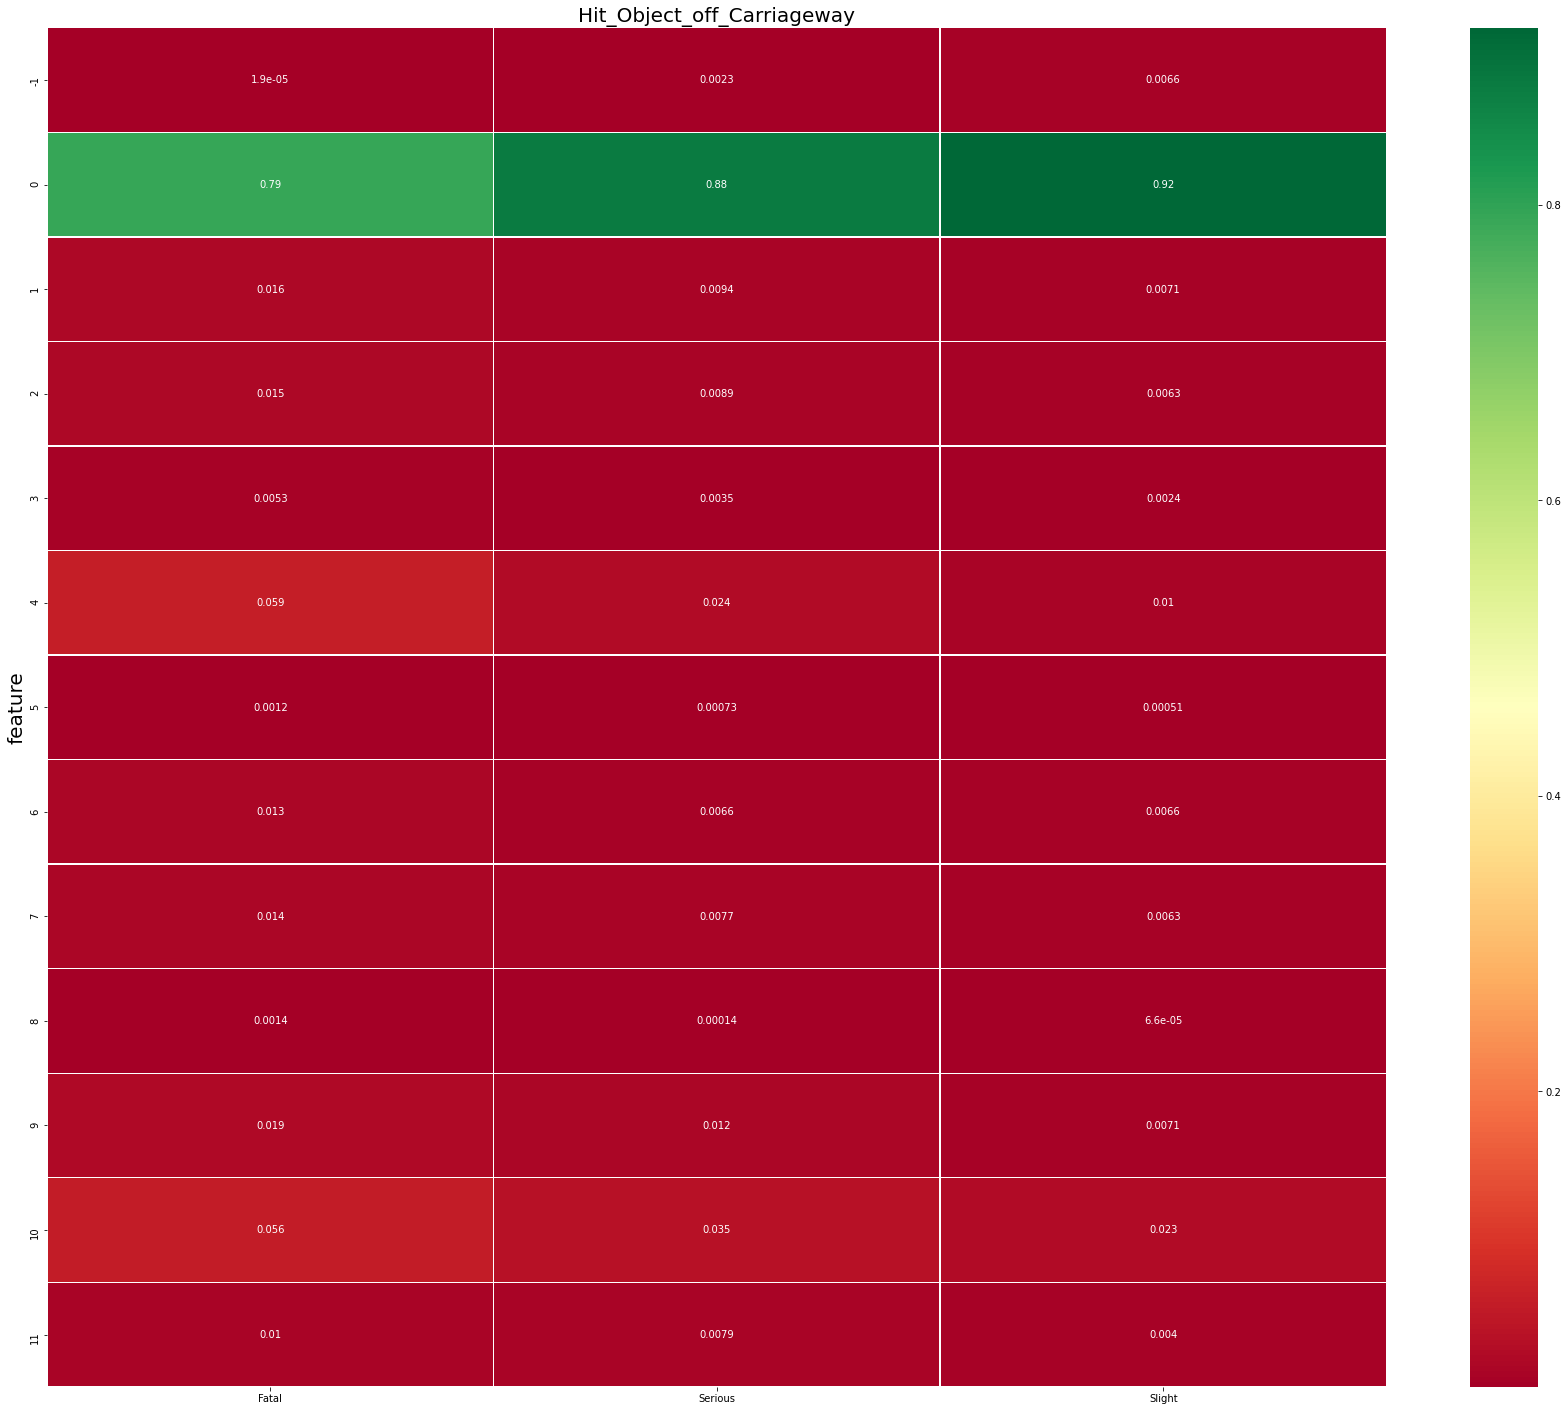

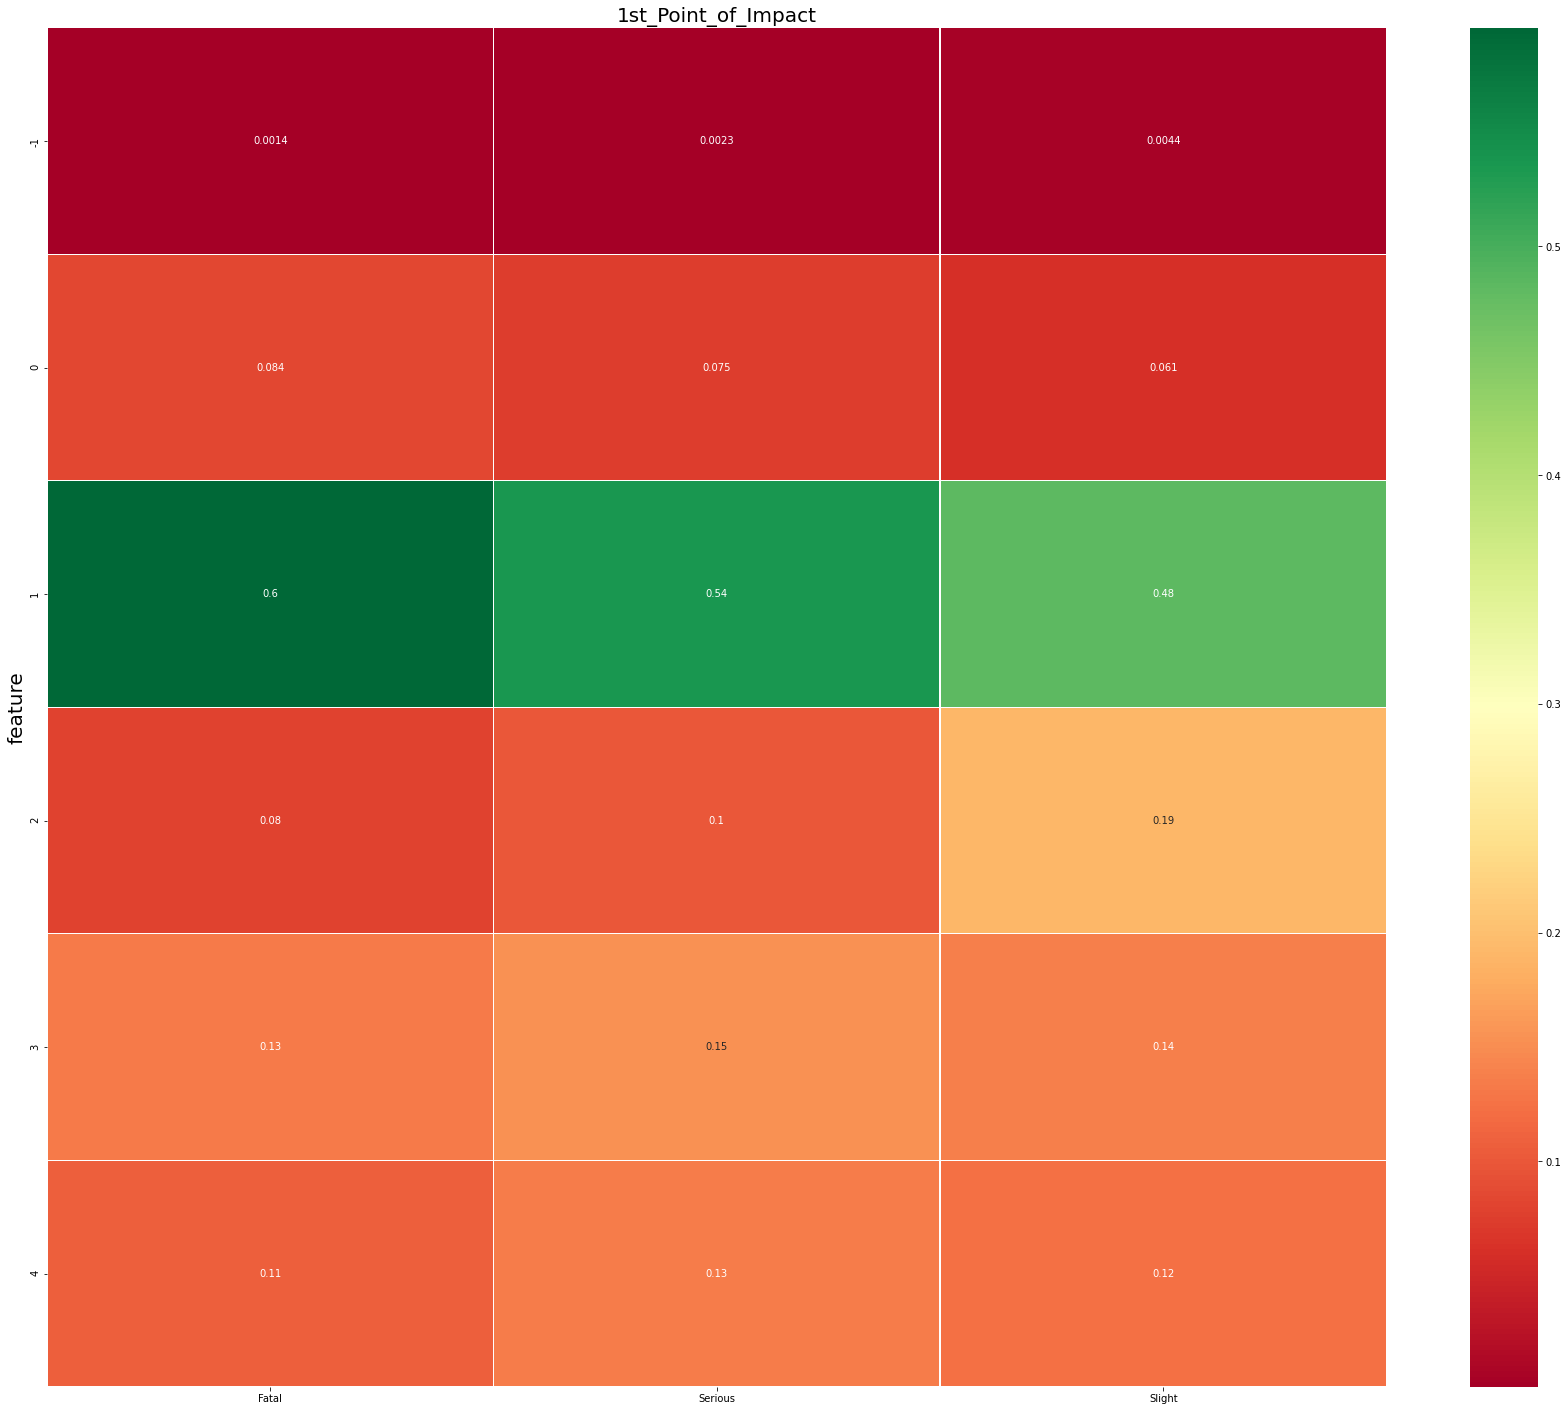

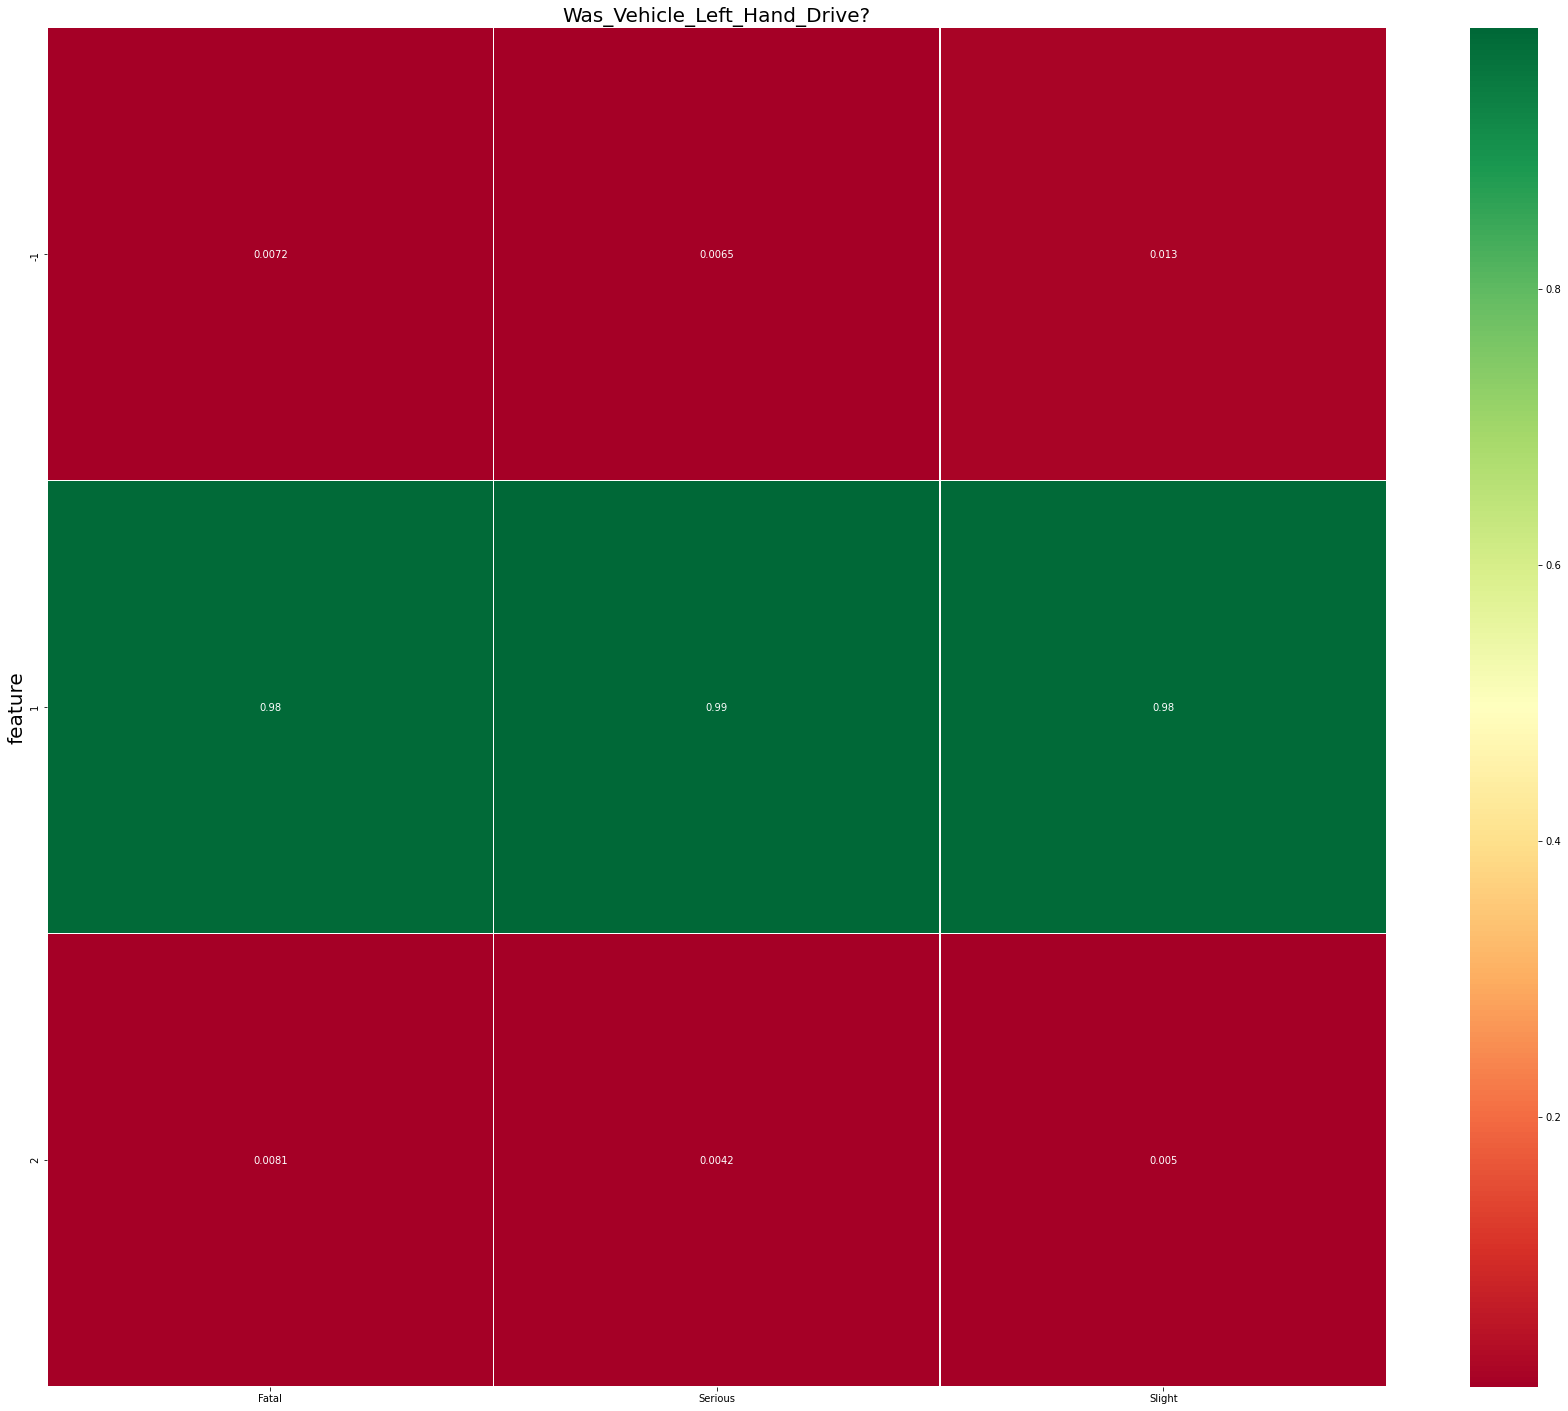

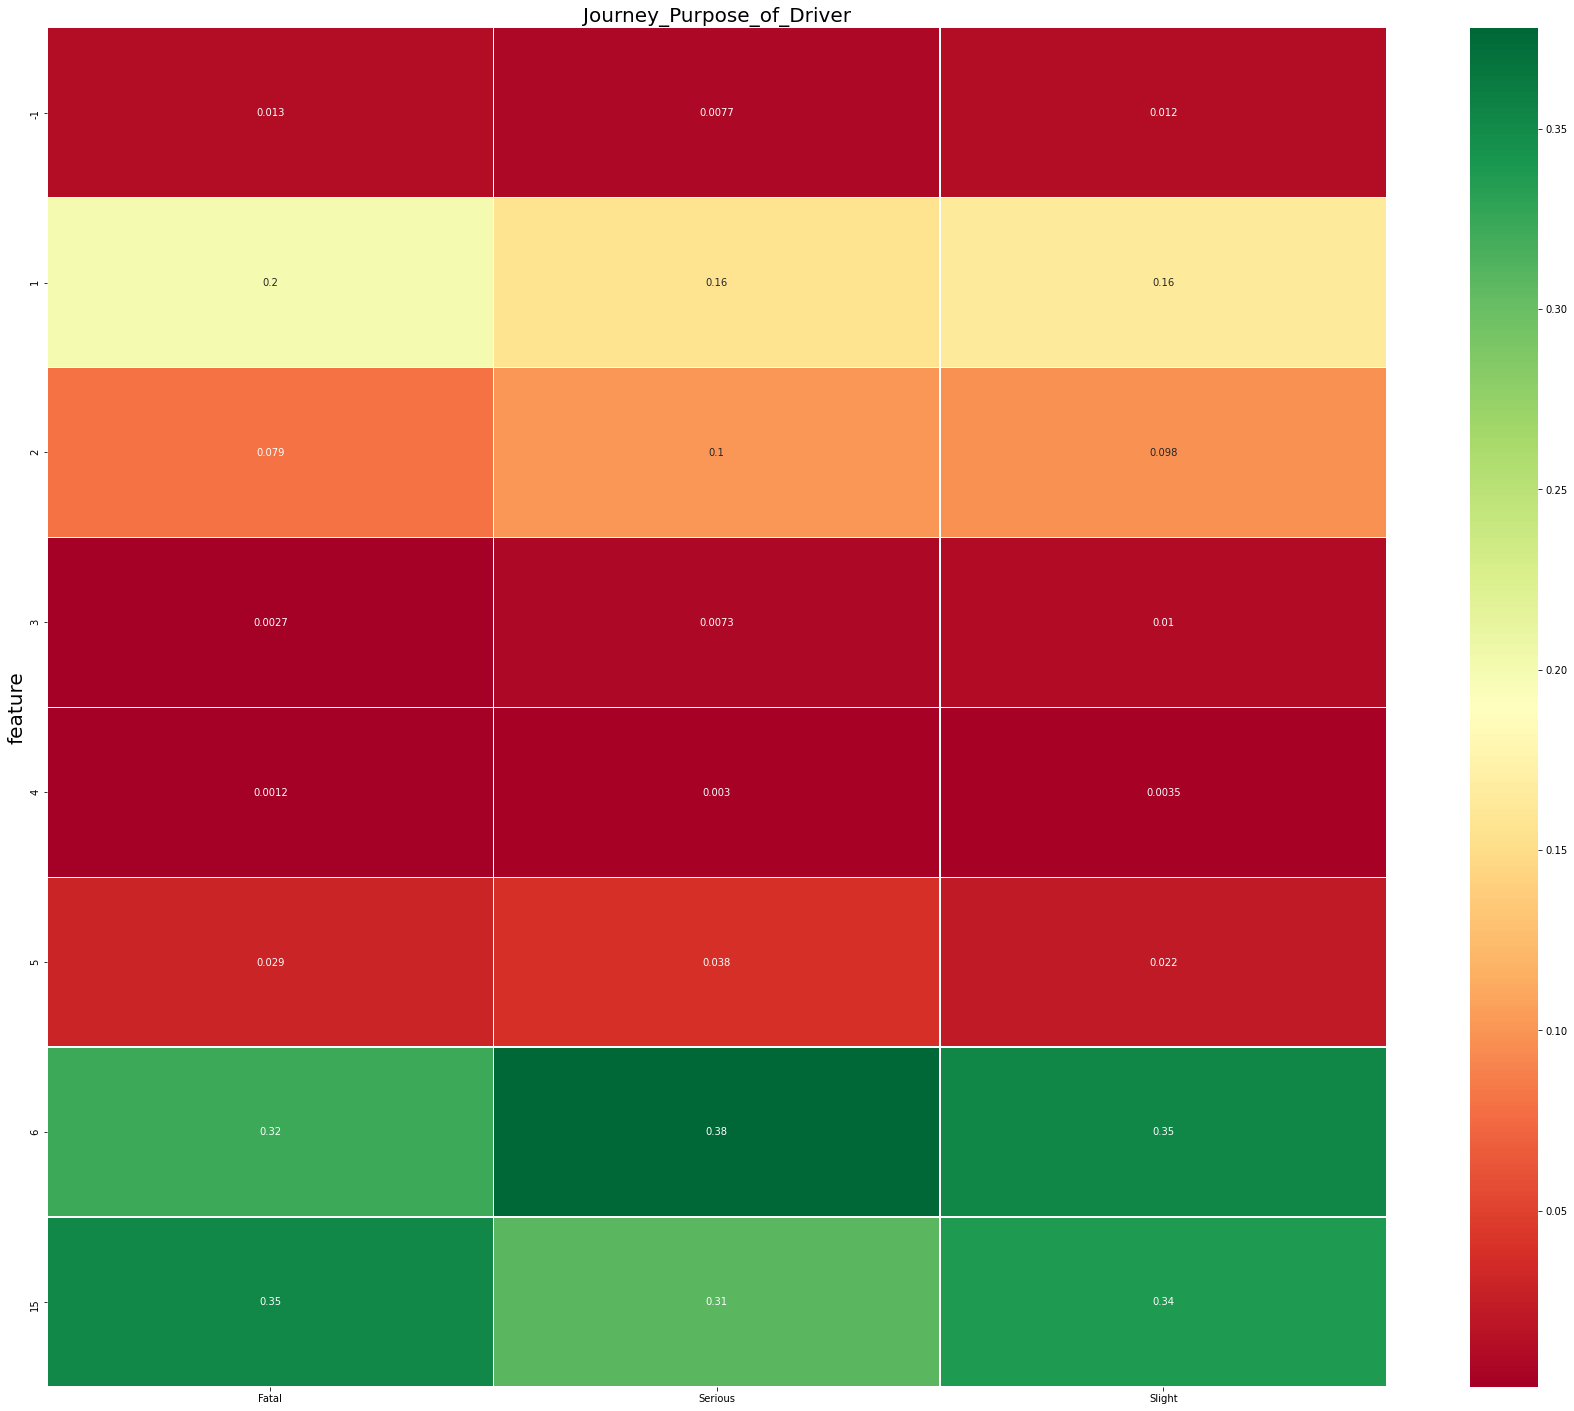

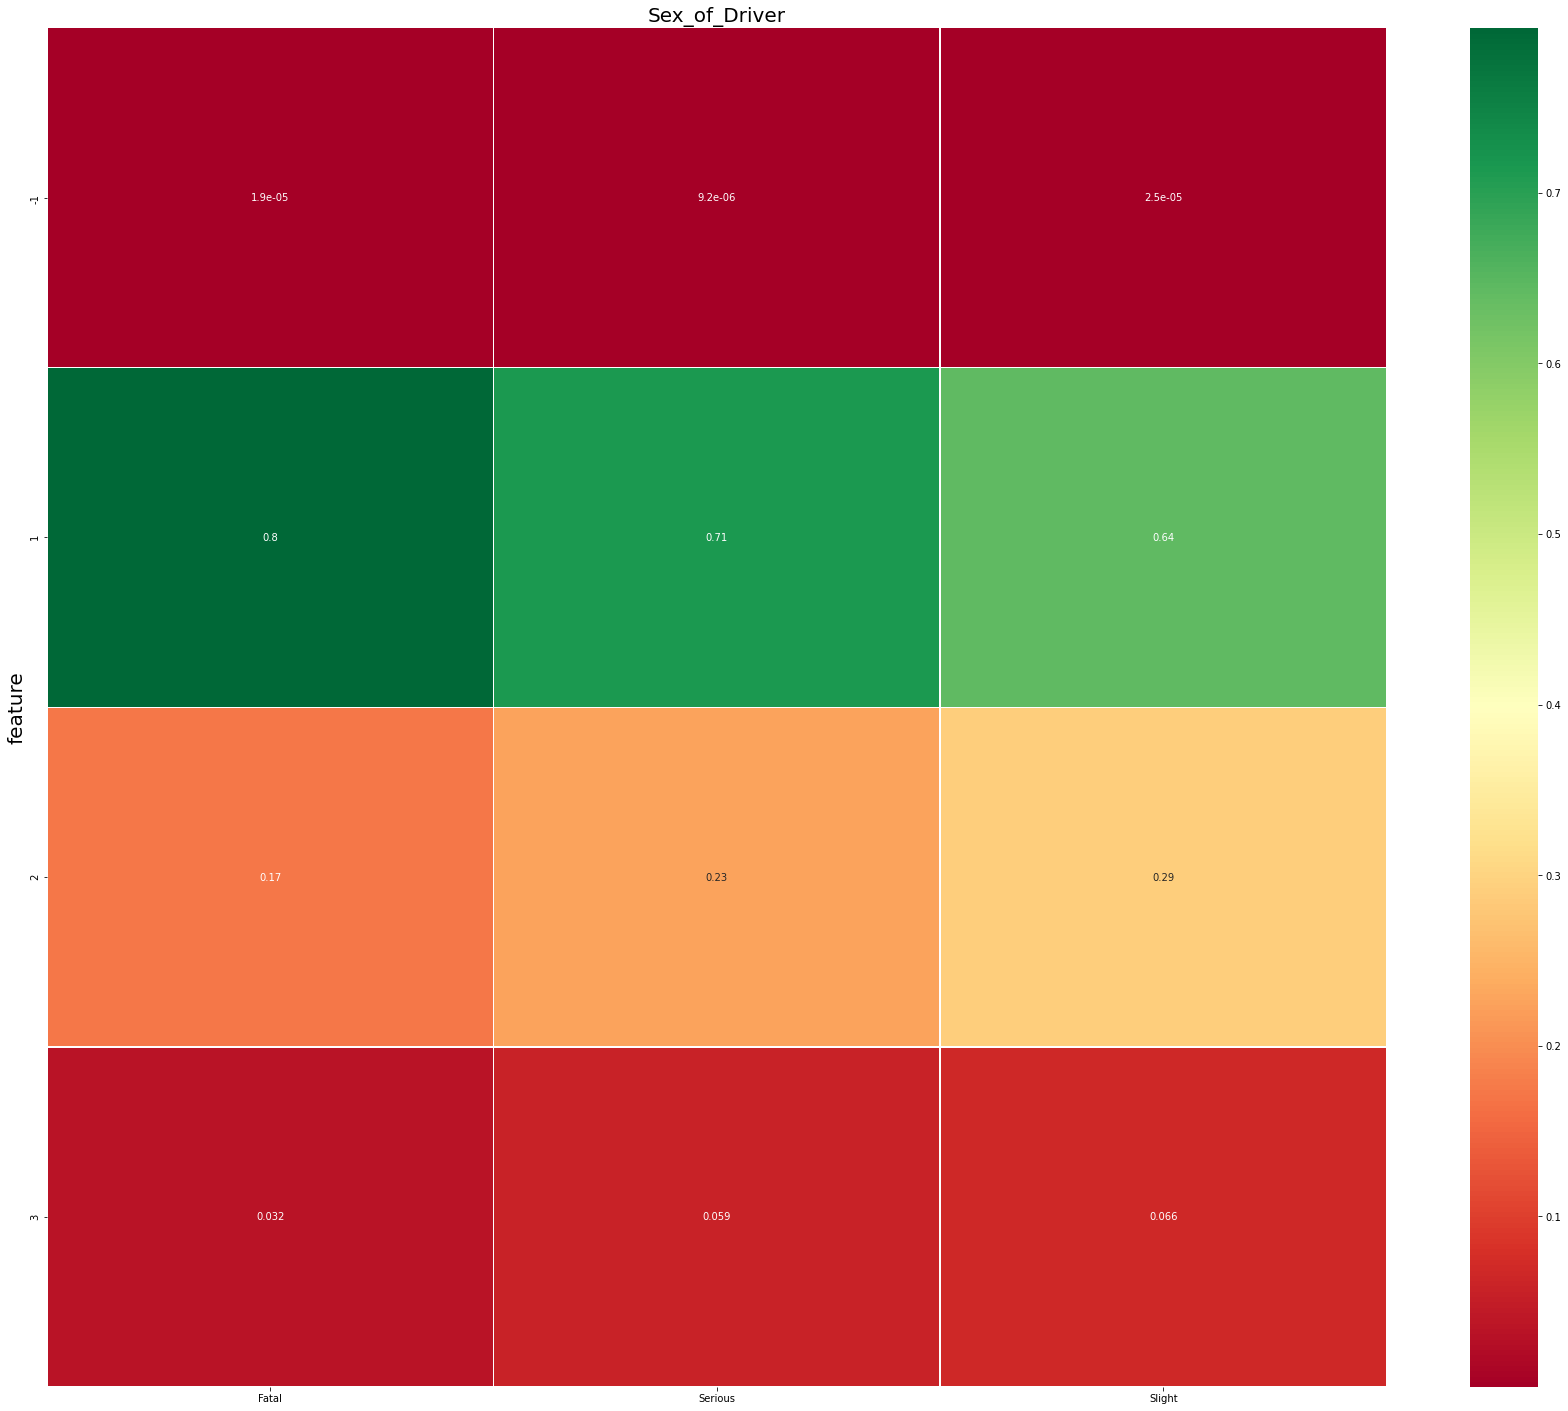

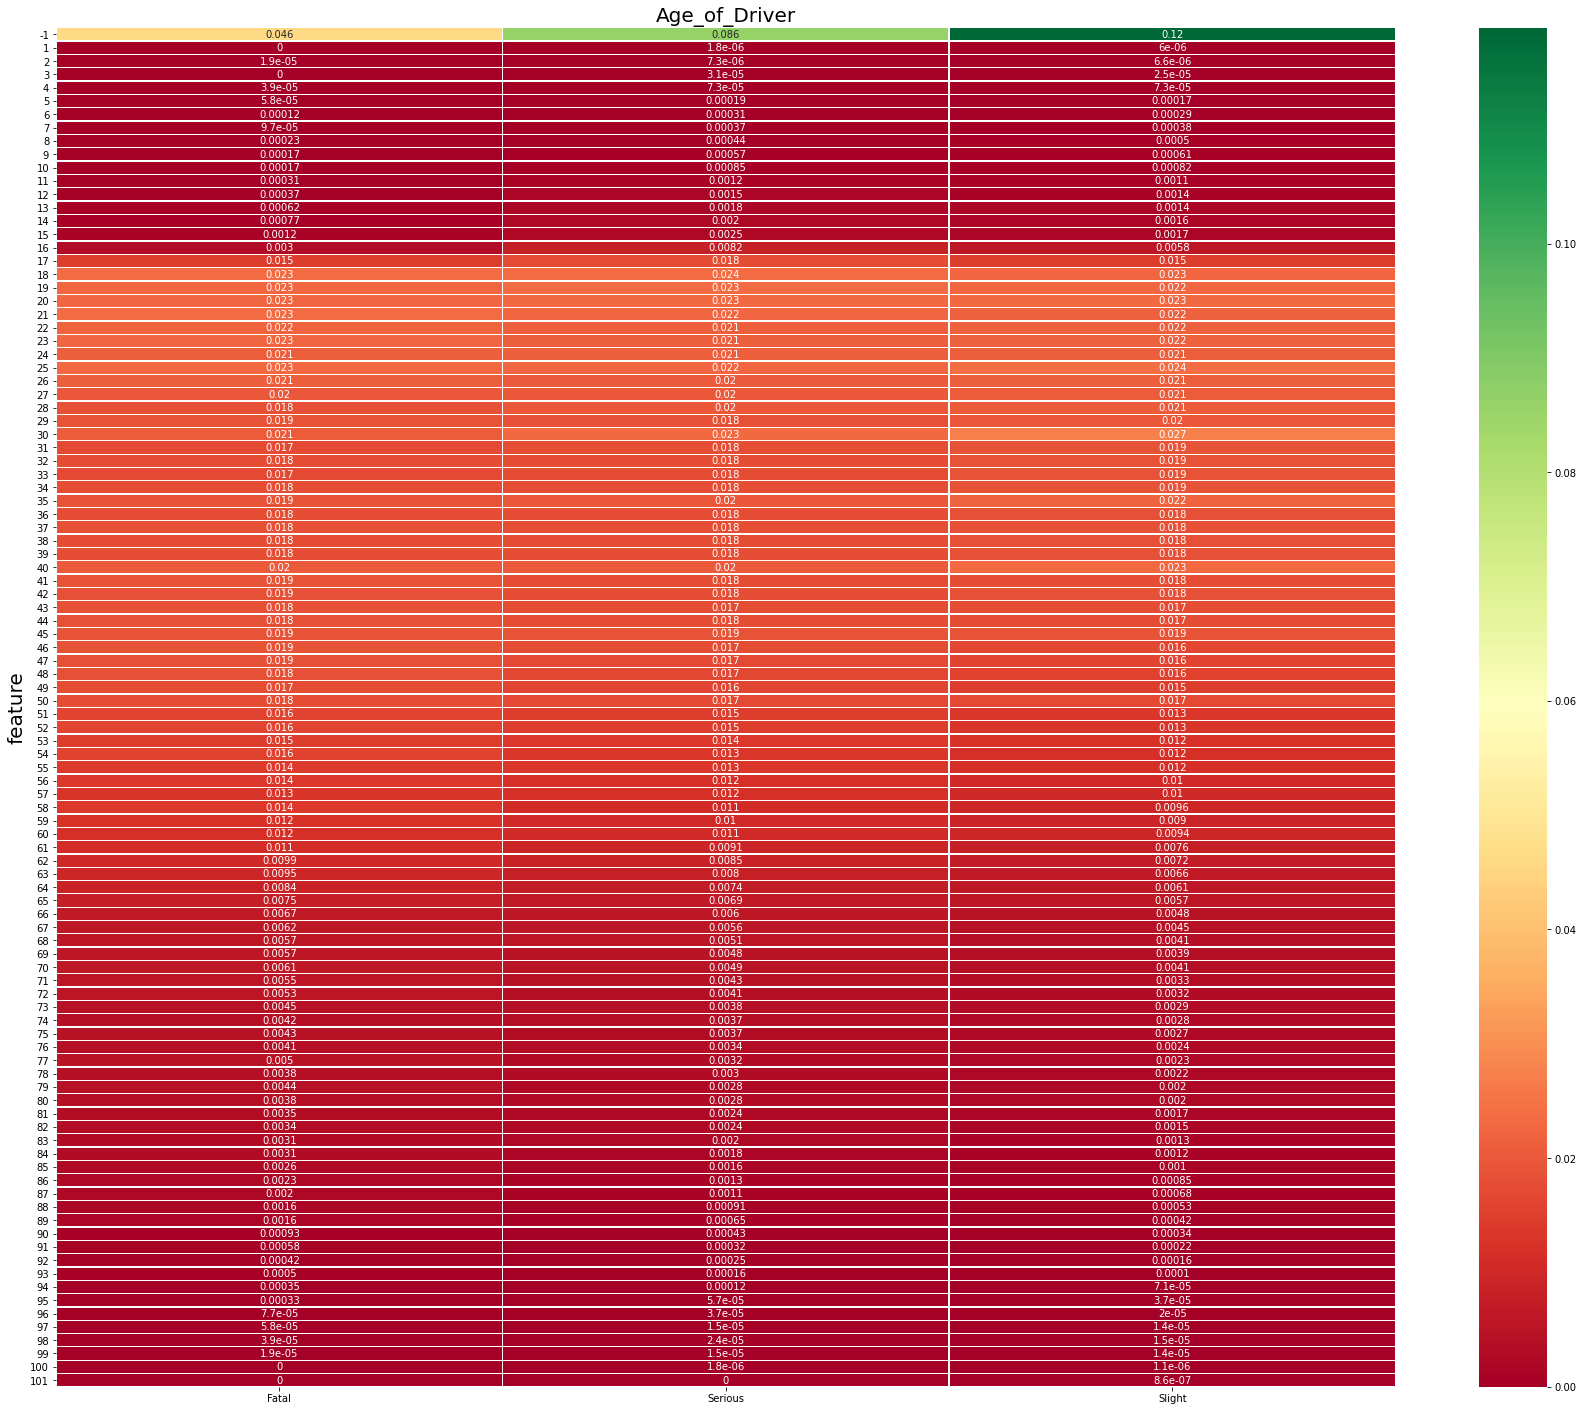

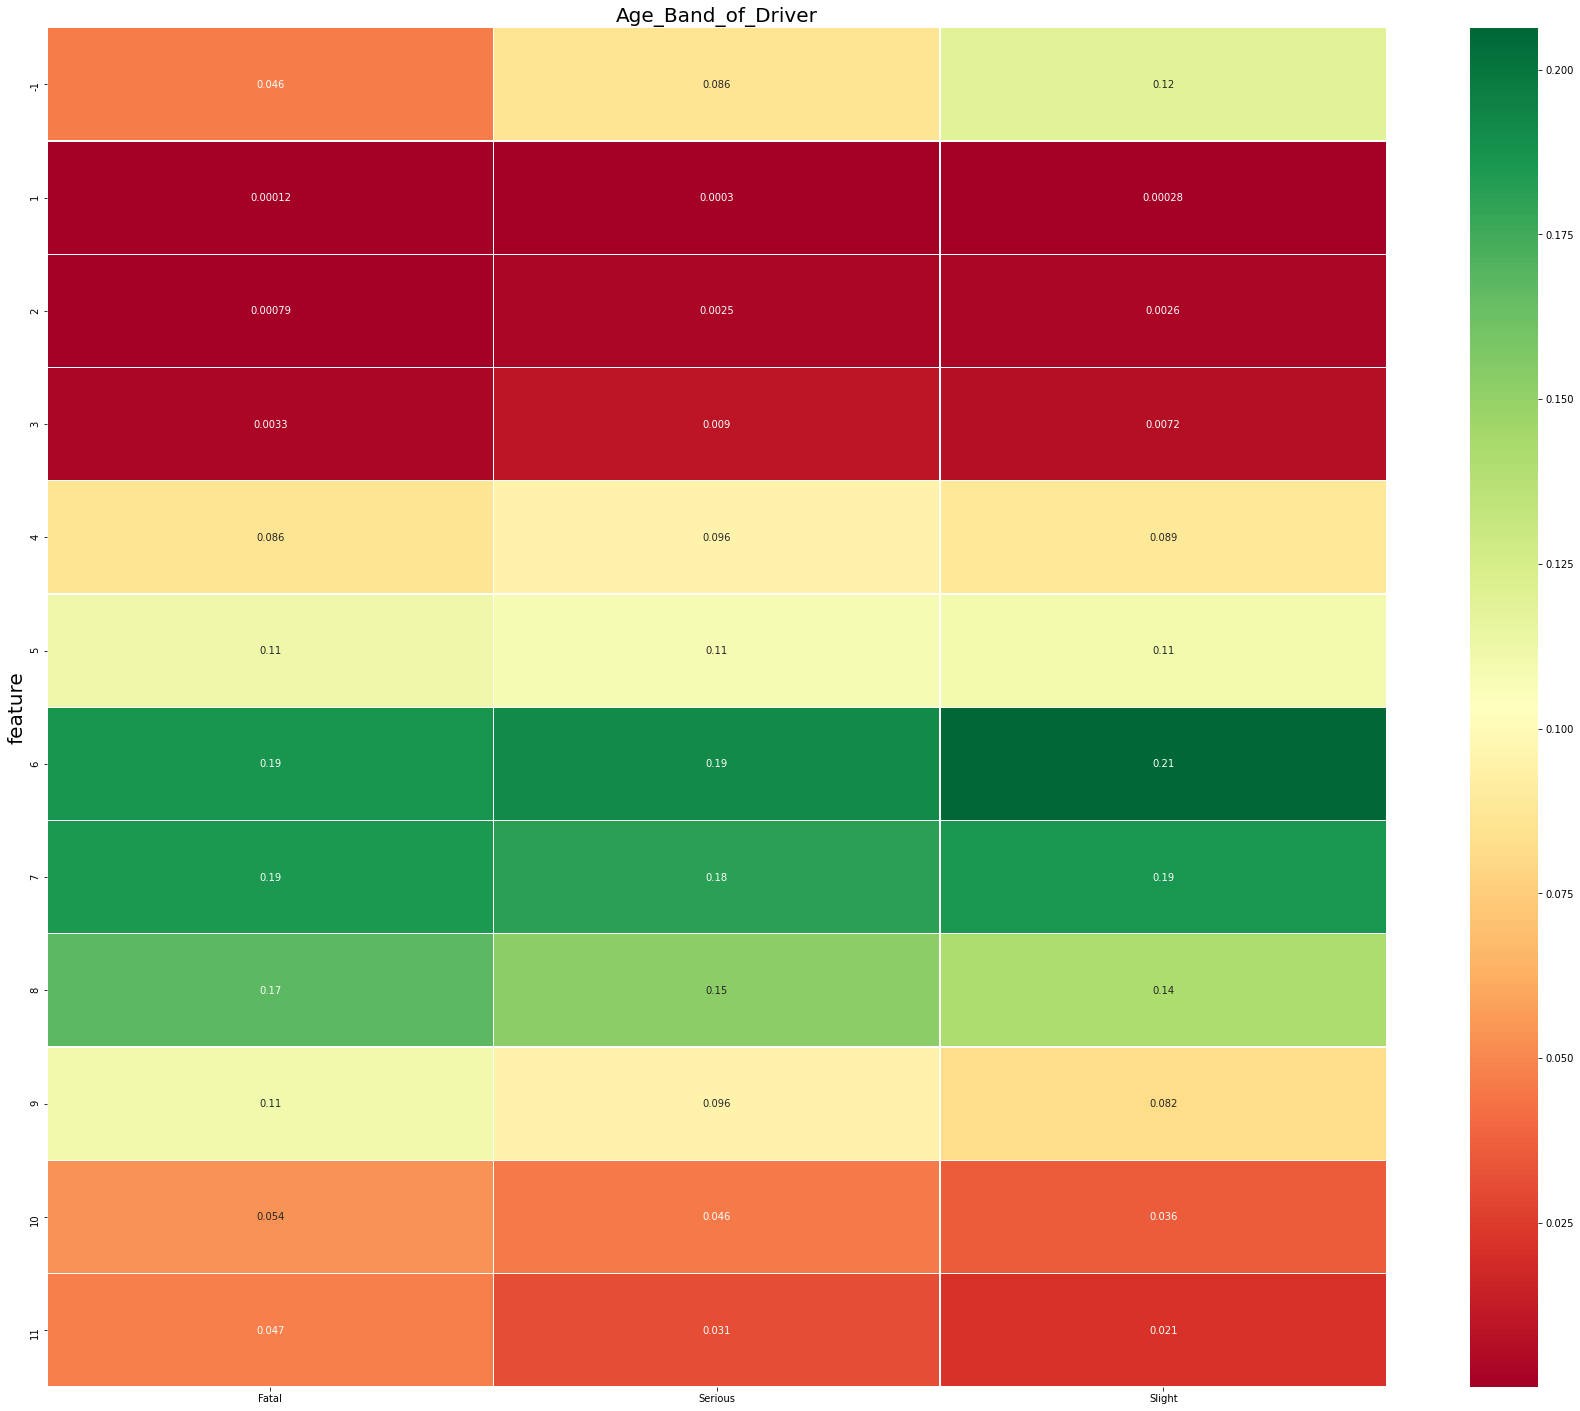

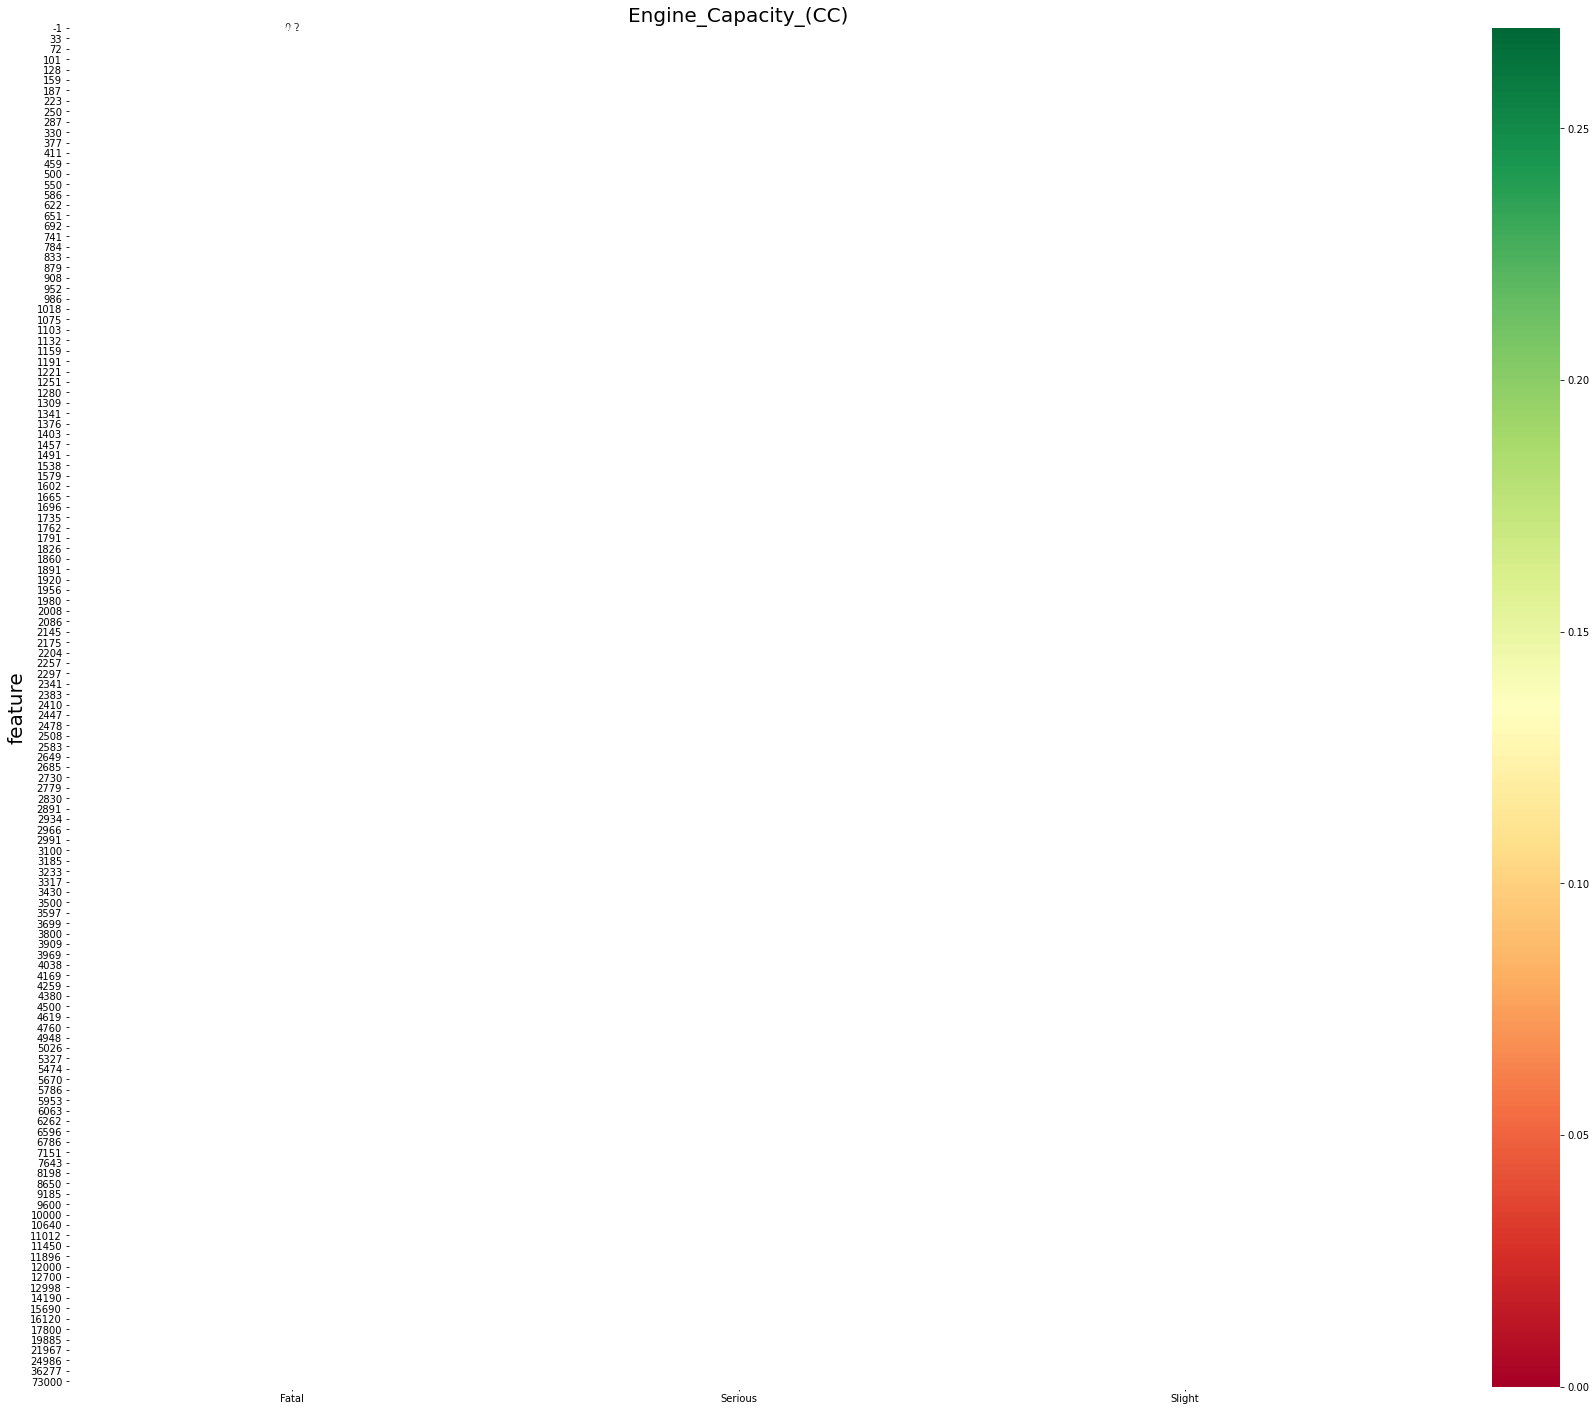

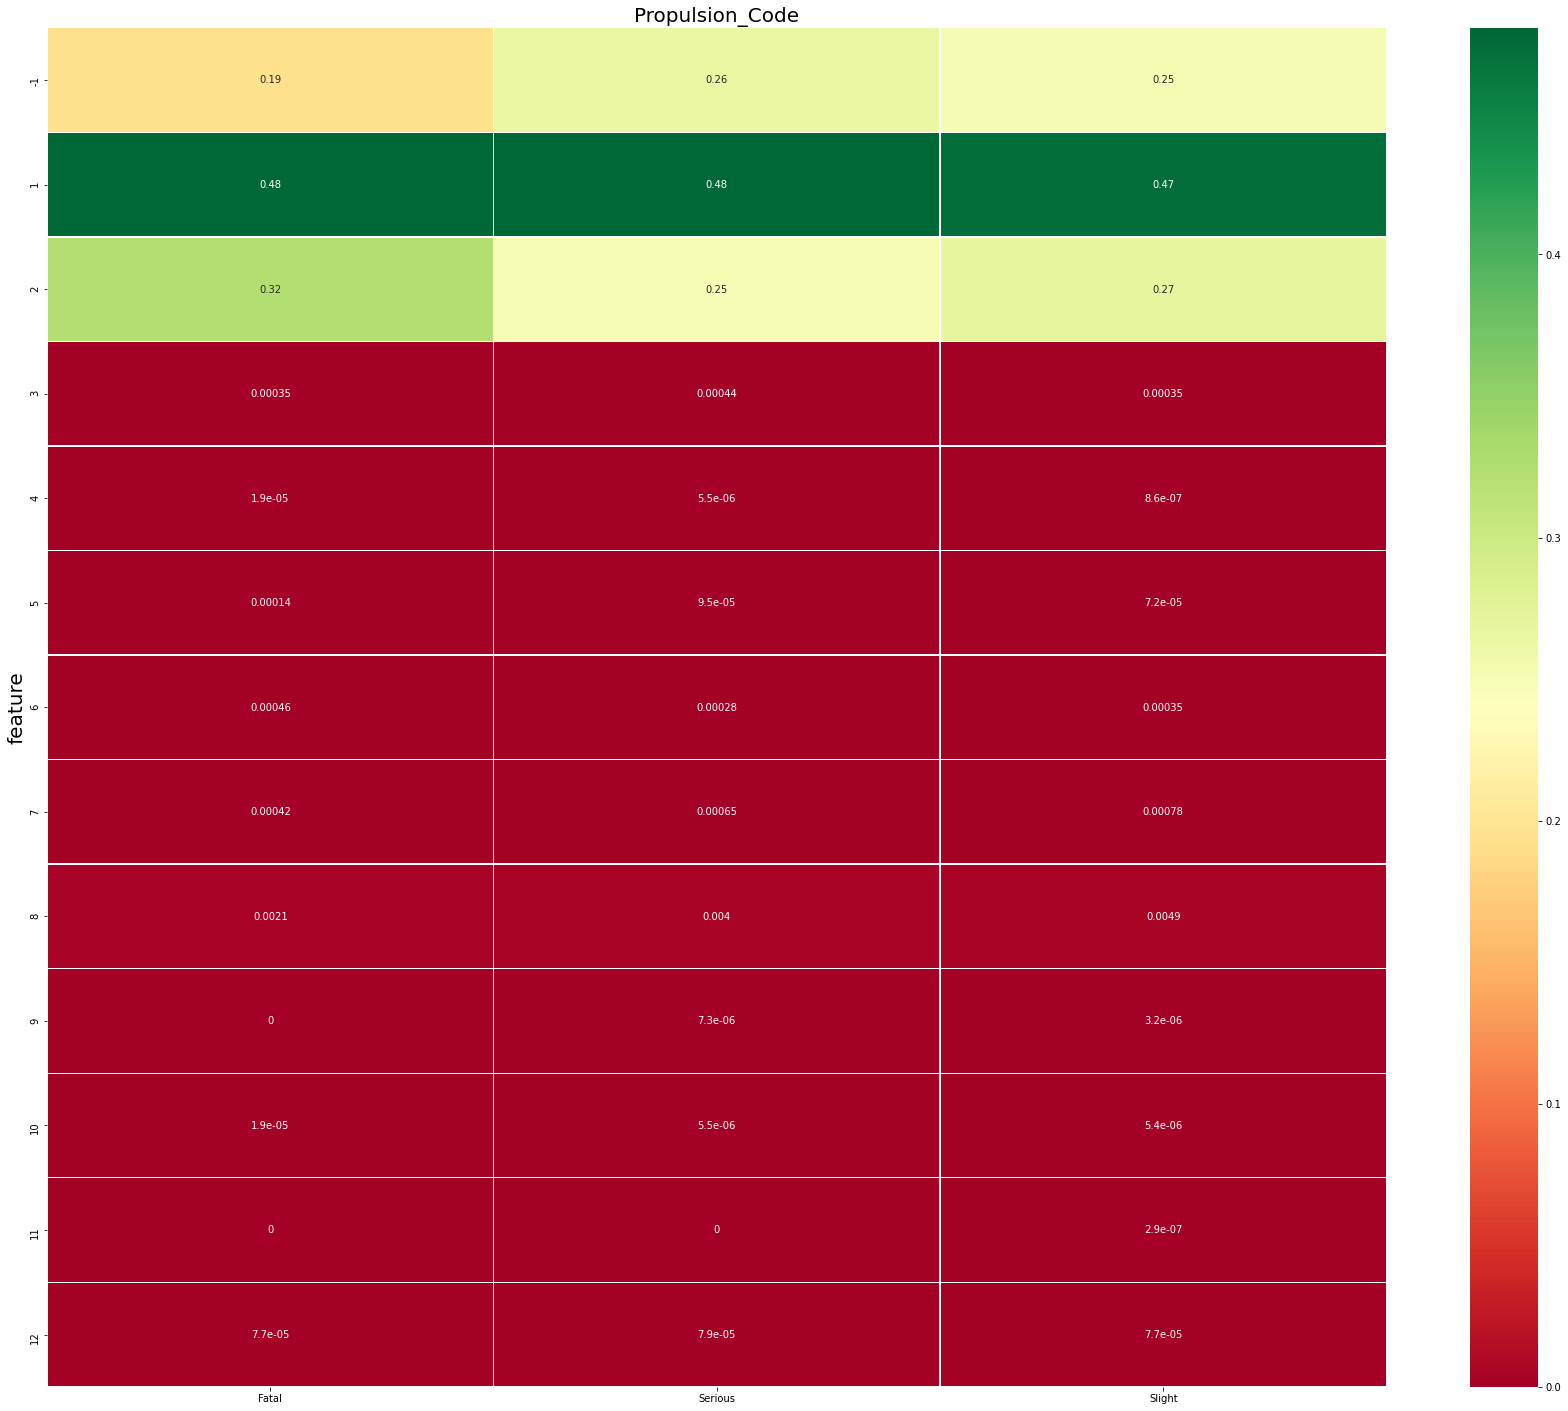

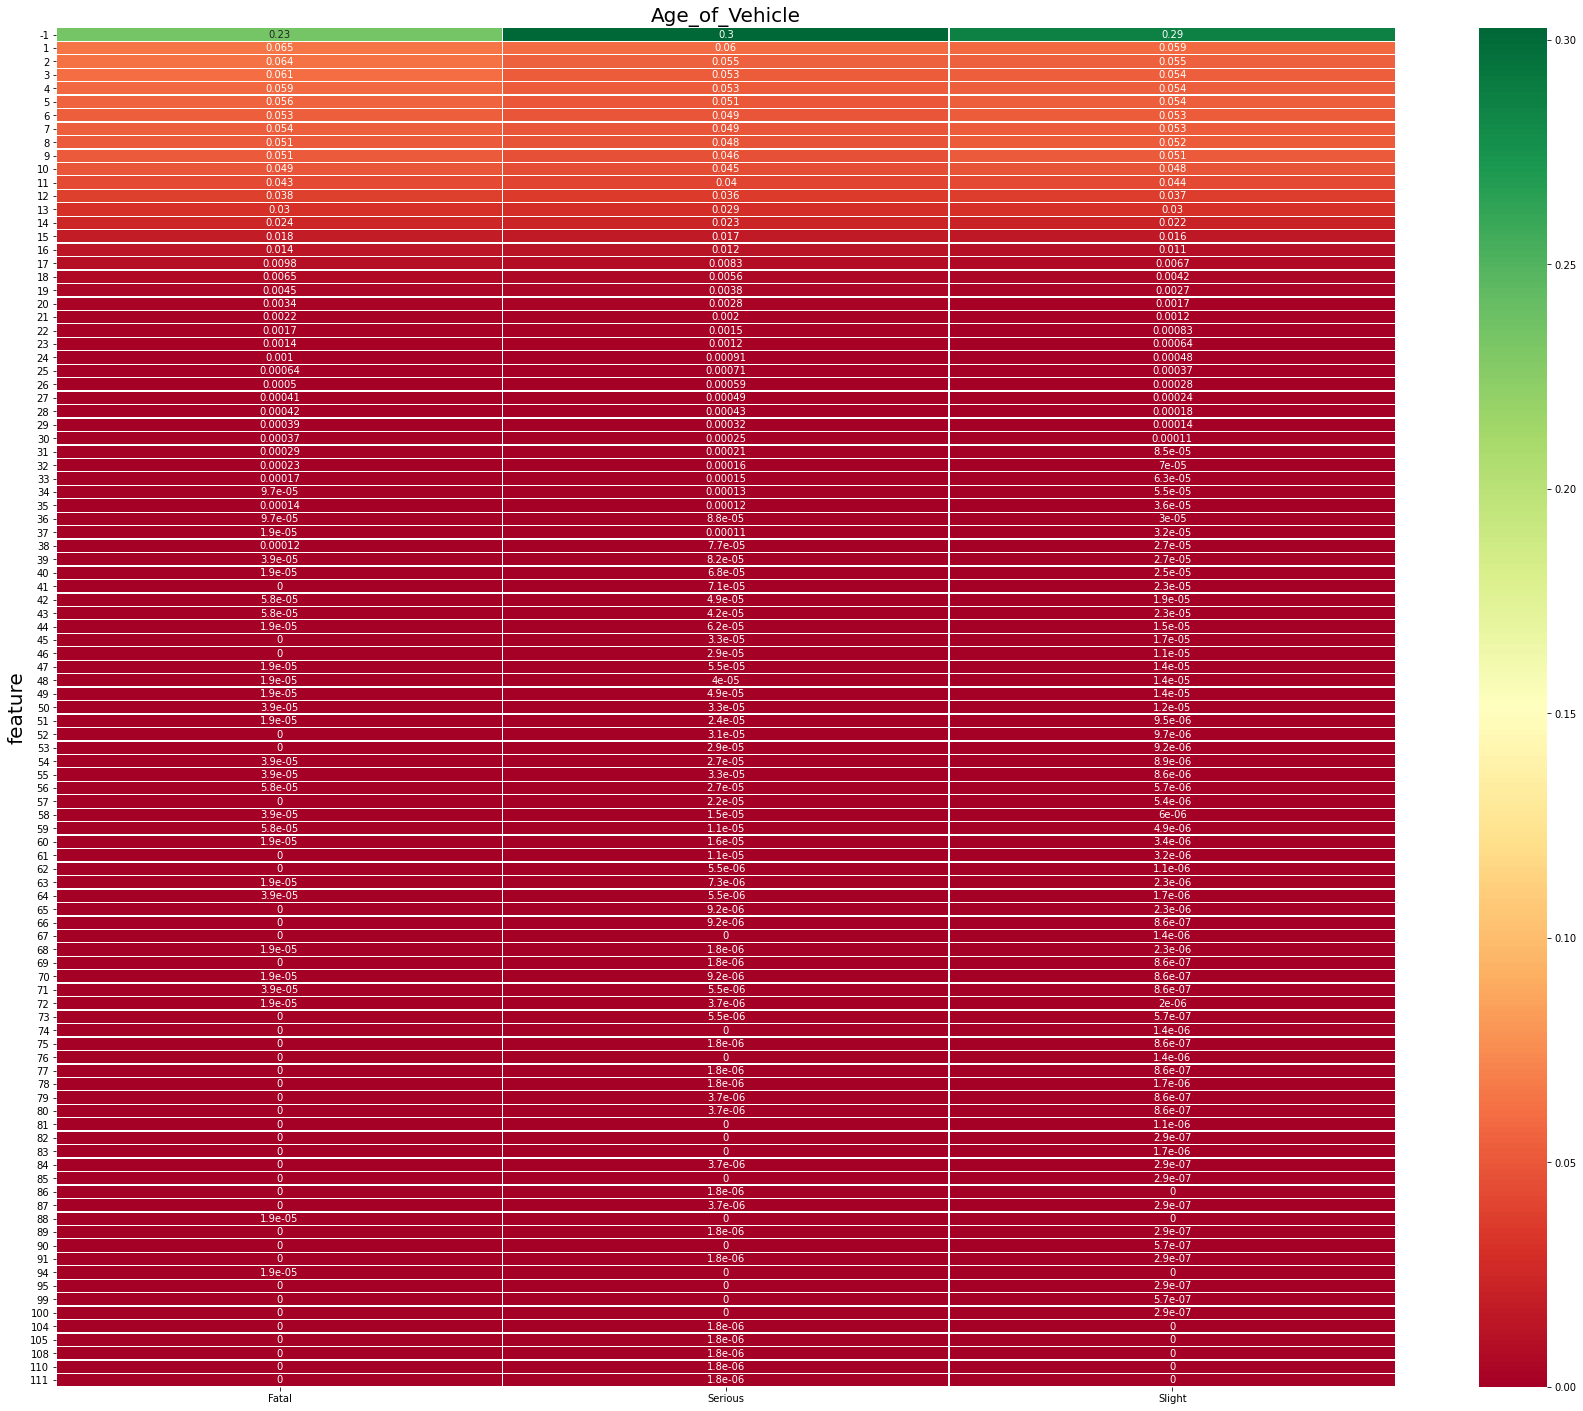

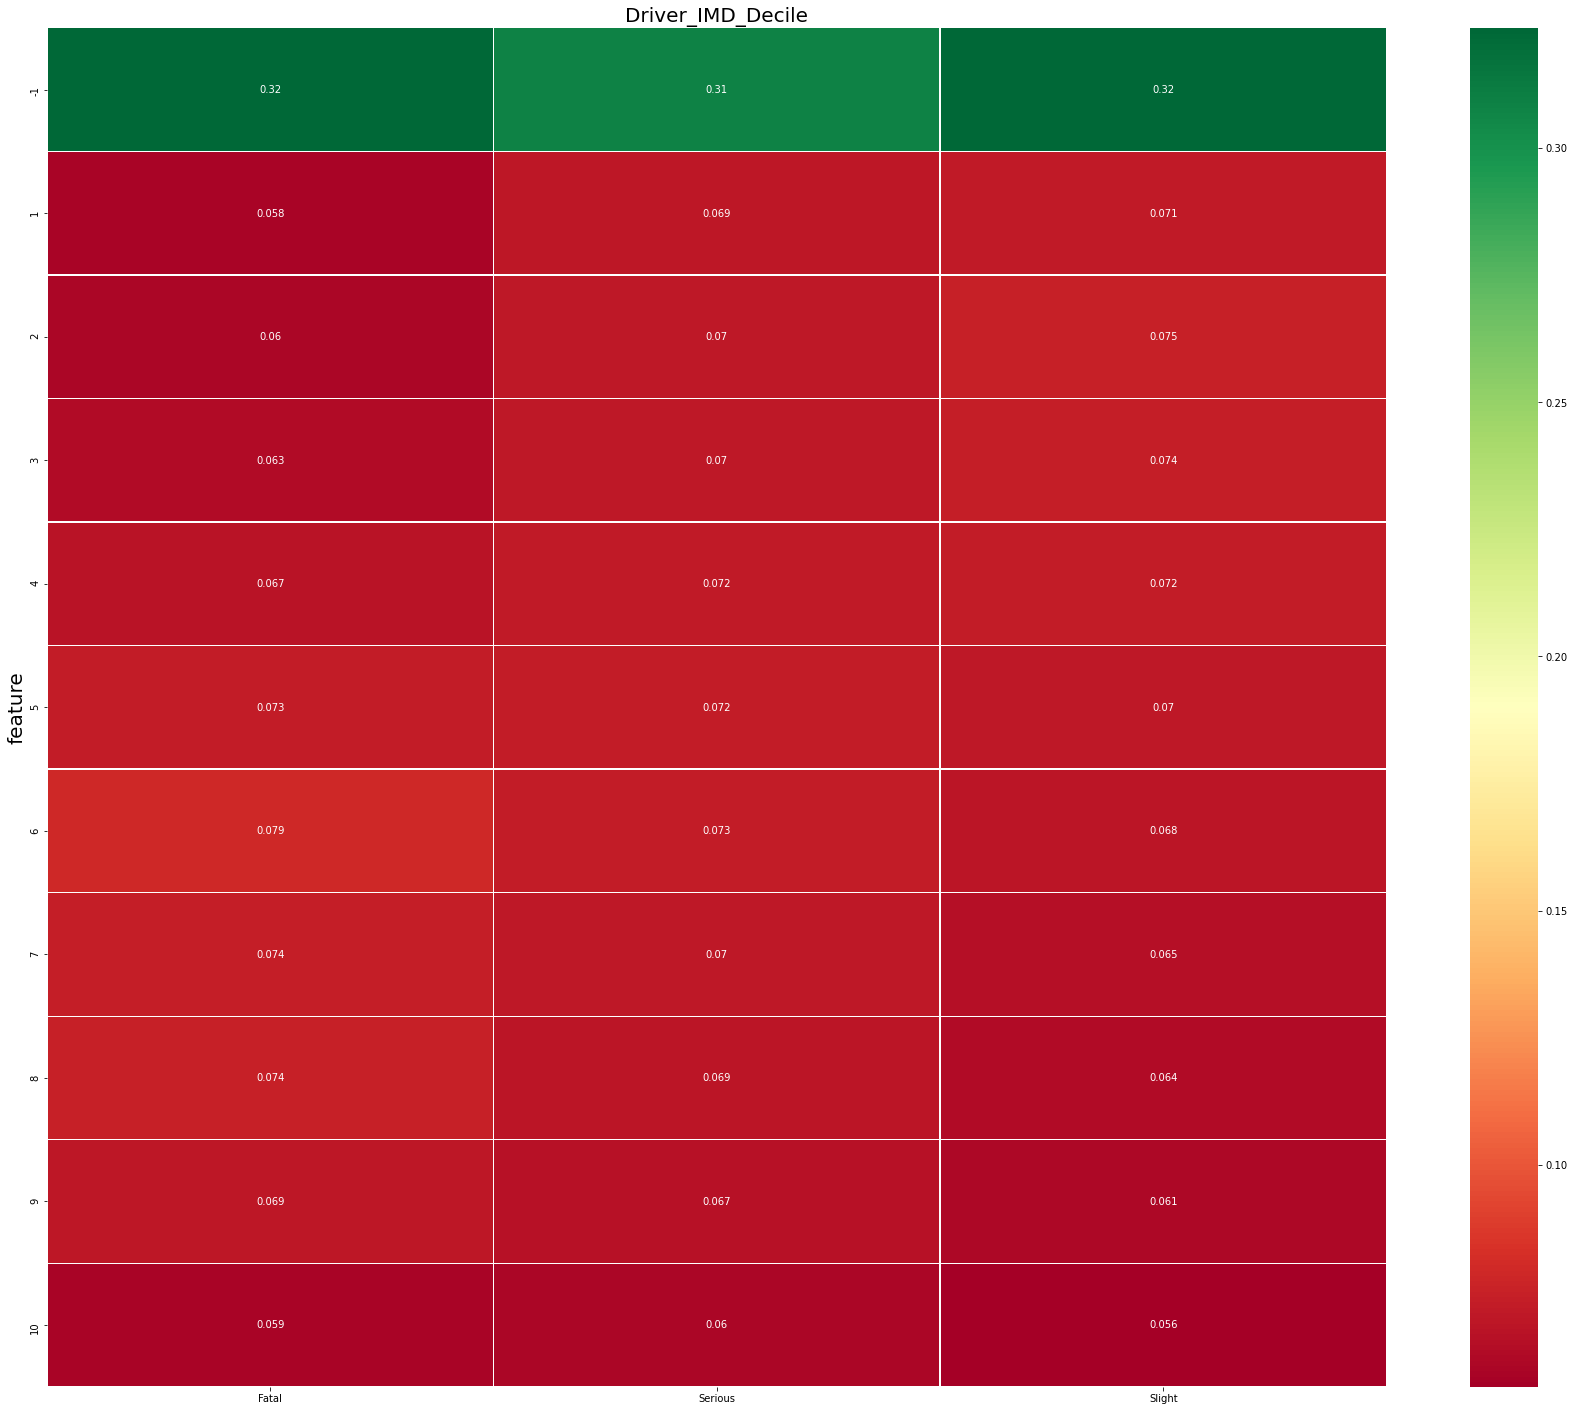

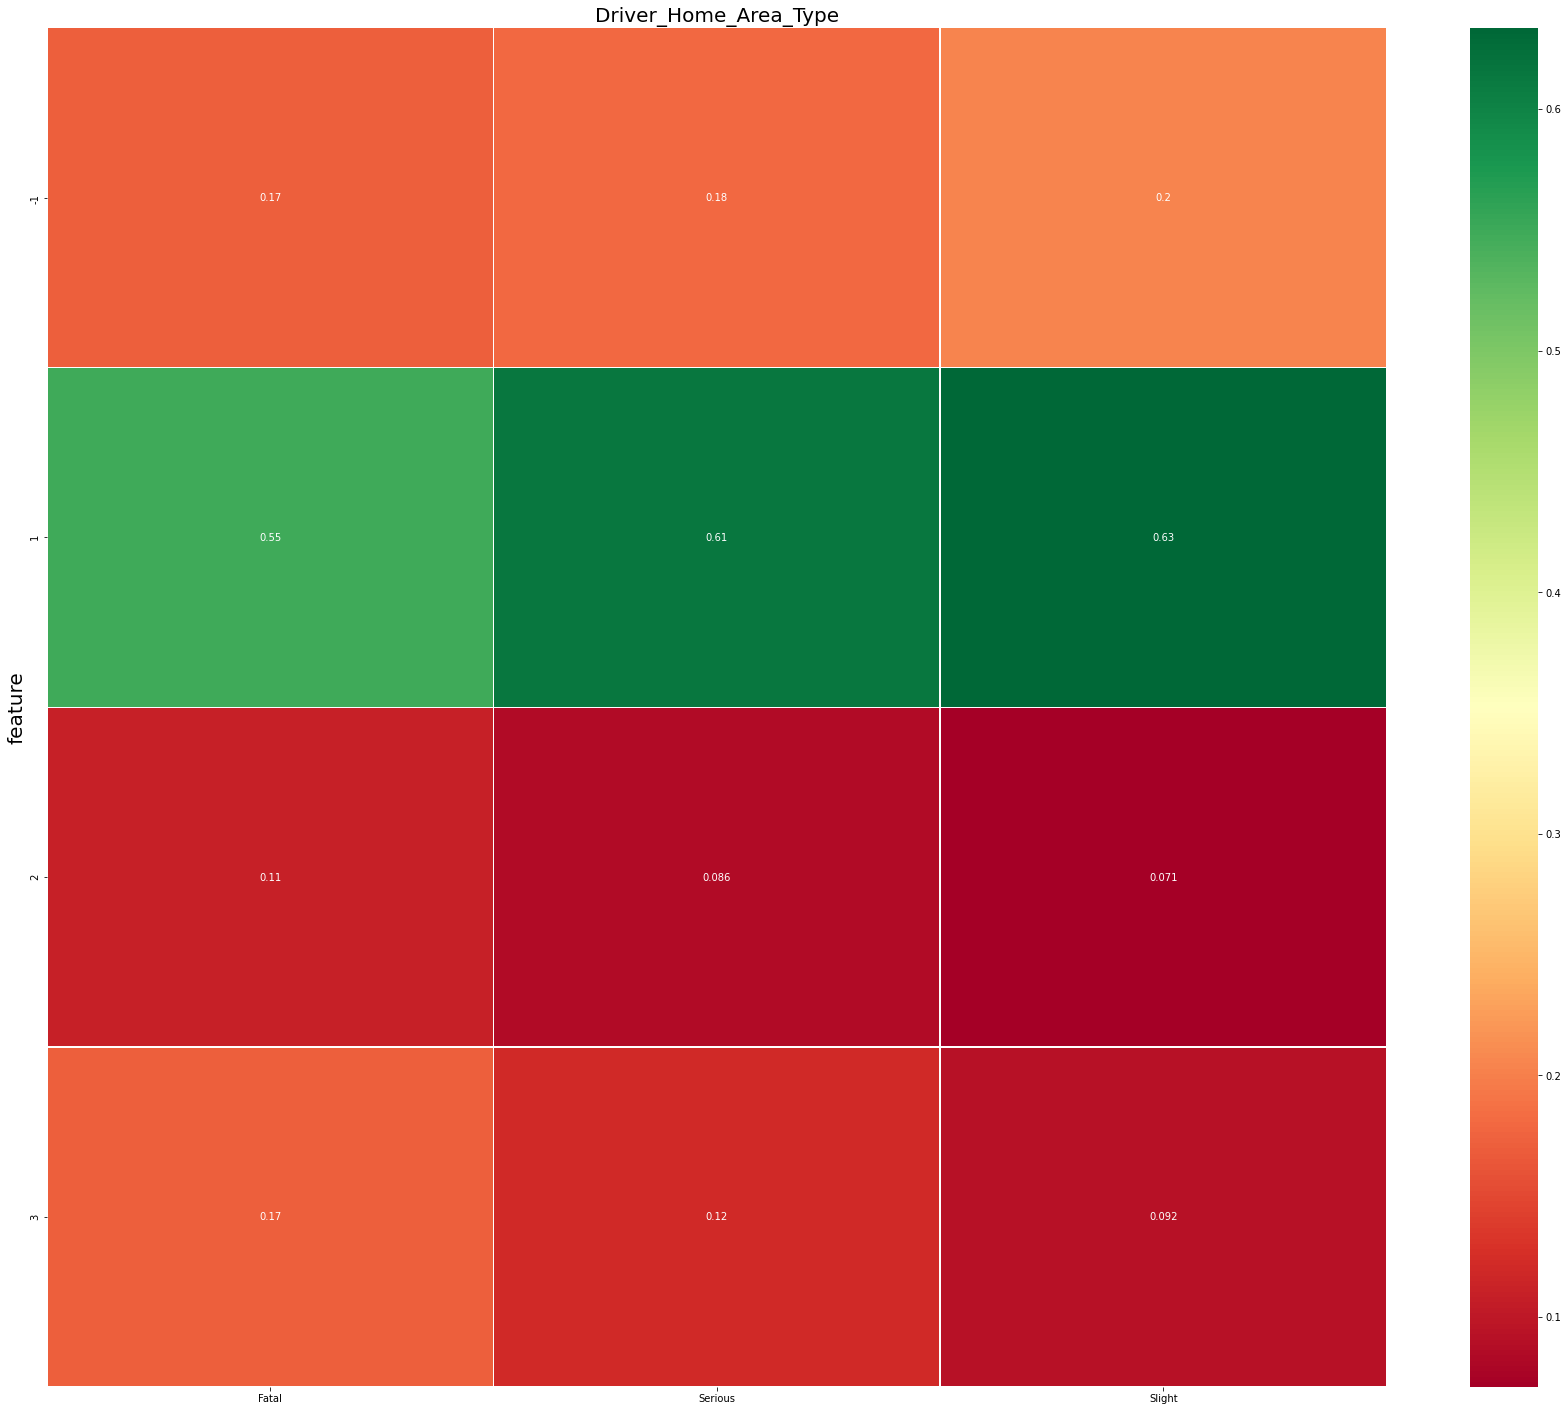

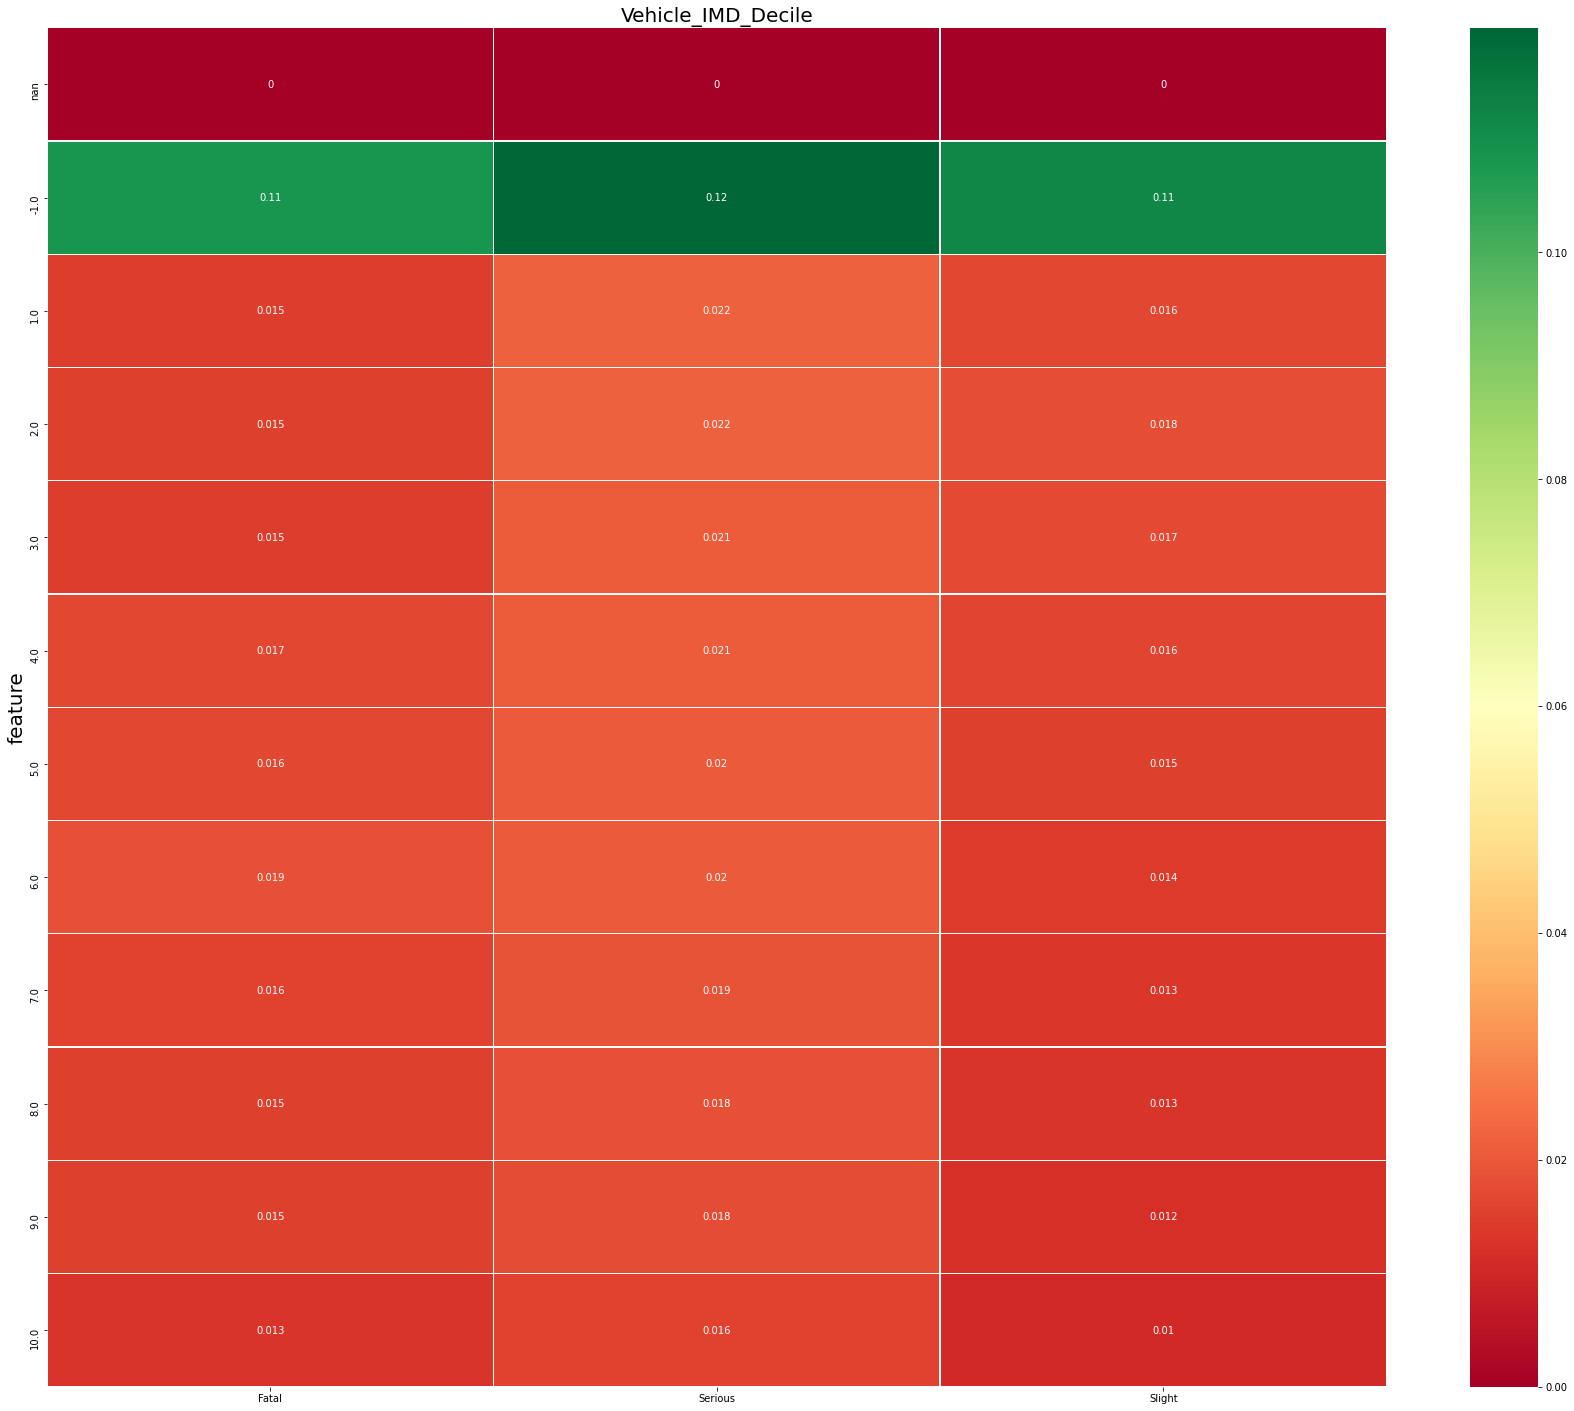

In [13]:
heatmap(merged_df, vehicle_columns, 'Accident_Severity')

## Feature Selection

Elimate features in vehicle tables.

- Vehicle_Reference
- Towing_and_Articulation
- Vehicle_Location-Restricted_Lane
- Junction_Location
- Skidding_and_Overturning
- Hit_Object_in_Carriageway
- Vehicle_Leaving_Carriageway
- Hit_Object_off_Carriageway
- Was_Vehicle_Left_Hand_Drive?
- Age_of_Driver (replaced by Age_Band)
- Propulsion_Code
- Age_of_Vehicle (replaced by Age_of_Vehicle_Band)
- Driver_IMD_Decile
- Vehicle_IMD_Decile